# <font color="#5959e1"> Bénin : Transition économique et changement climatique</font>

## Importation des librairies 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.hierarchy import dendrogram
from sklearn import decomposition
from sklearn import preprocessing

## Importation des données

In [2]:
benin_data = pd.read_csv("DATA/BEN_2000-2019_WB.csv", sep=',') # données Banque Mondiale
benin_temp = pd.read_csv("DATA/mean_annual_temp_1901-2021_BEN.csv", header=1) # données température Climate Knowledge (BM)
benin_prec = pd.read_csv("DATA/precipitation_1901-2021_BEN.csv", header=1) # données température Climate Knowledge (BM)

In [3]:
benin_temp = benin_temp.rename(columns={"Unnamed: 0" : "Year", "Benin" : "mean_annual_temp"})
benin_prec = benin_prec.rename(columns={"Unnamed: 0" : "Year", "Benin" : "mean_annual_prec"})

In [4]:
benin_temp

Year  mean_annual_temp  Alibori  Atakora  Atlantique  Borgou  Collines  \
0    1901             27.38    27.94    27.52       27.16   27.06     27.25   
1    1902             27.46    28.02    27.62       27.28   27.11     27.34   
2    1903             27.57    28.21    27.85       27.28   27.19     27.35   
3    1904             27.57    28.21    27.85       27.28   27.19     27.35   
4    1905             27.14    27.70    27.35       27.10   26.72     26.98   
..    ...               ...      ...      ...         ...     ...       ...   
116  2017             28.35    29.00    28.60       28.09   27.96     28.11   
117  2018             28.33    28.97    28.61       28.01   27.96     28.11   
118  2019             28.17    28.79    28.44       27.91   27.78     27.96   
119  2020             28.43    29.02    28.73       28.15   28.04     28.23   
120  2021             28.70    29.35    29.04       28.35   28.29     28.45   

     Couffo  Donga  Littoral   Mono  Oueme  Plateau    Zou  
0     27.24  26.82     26.96  27.11  27.13    27.26  27.44  
1     27.32  26.86     27.08  27.20  27.26    27.39  27.54  
2     27.32  26.96     27.08  27.20  27.27    27.39  27.54  
3     27.32  26.96     27.08  27.20  27.25    27.39  27.54  
4     27.07  26.51     26.96  26.99  27.12    27.16  27.26  
..      ...    ...       ...    ...    ...      ...    ...  
116   28.12  27.72     27.91  28.01  28.07    28.18  28.32  
117   28.07  27.71     27.83  27.95  28.01    28.16  28.28  
118   27.94  27.55     27.72  27.82  27.89    28.01  28.15  
119   28.19  27.81     27.97  28.07  28.15    28.28  28.42  
120   28.40  28.07     28.17  28.27  28.35    28.48  28.62  

[121 rows x 14 columns]

## Nettoyage des données

In [5]:
# toutes les années, deux régions : Nord (Alibori), Sud (Atlantique)

benin_temp_all = benin_temp[['Year', 'mean_annual_temp', 'Alibori', 'Atlantique']].loc[79:118,:]

#bein_temp_all = benin_temp_all.loc[79:118,:] # selection des années 1980 à 2019
benin_temp_all

Year  mean_annual_temp  Alibori  Atlantique
79   1980             27.44    28.19       27.09
80   1981             27.97    28.48       27.70
81   1982             27.83    28.39       27.54
82   1983             28.21    28.72       27.85
83   1984             28.07    28.66       27.80
84   1985             28.01    28.64       27.59
85   1986             27.83    28.49       27.40
86   1987             28.07    28.85       27.69
87   1988             27.54    28.26       27.18
88   1989             27.18    27.89       26.86
89   1990             27.76    28.59       27.24
90   1991             27.48    28.26       27.10
91   1992             27.34    27.98       27.05
92   1993             27.52    28.33       27.10
93   1994             27.40    28.09       27.07
94   1995             27.66    28.46       27.29
95   1996             27.74    28.57       27.28
96   1997             27.70    28.55       27.21
97   1998             28.17    28.87       27.83
98   1999             27.68    28.49       27.28
99   2000             27.84    28.44       27.61
100  2001             28.01    28.66       27.69
101  2002             28.06    28.76       27.70
102  2003             28.15    28.85       27.81
103  2004             28.00    28.77       27.61
104  2005             28.32    29.08       27.90
105  2006             28.19    28.86       27.87
106  2007             28.17    28.87       27.80
107  2008             27.85    28.43       27.60
108  2009             28.31    29.16       27.82
109  2010             28.46    29.13       28.22
110  2011             28.19    28.95       27.80
111  2012             28.01    28.75       27.61
112  2013             28.16    28.87       27.78
113  2014             28.33    29.03       27.97
114  2015             28.27    28.85       28.03
115  2016             28.53    29.19       28.24
116  2017             28.35    29.00       28.09
117  2018             28.33    28.97       28.01
118  2019             28.17    28.79       27.91

In [6]:
benin_temp = benin_temp[['Year', 'mean_annual_temp']]
benin_temp = benin_temp.loc[99:118,:] # selection des années 2010 à 2019
benin_temp

Year  mean_annual_temp
99   2000             27.84
100  2001             28.01
101  2002             28.06
102  2003             28.15
103  2004             28.00
104  2005             28.32
105  2006             28.19
106  2007             28.17
107  2008             27.85
108  2009             28.31
109  2010             28.46
110  2011             28.19
111  2012             28.01
112  2013             28.16
113  2014             28.33
114  2015             28.27
115  2016             28.53
116  2017             28.35
117  2018             28.33
118  2019             28.17

In [7]:
benin_prec_all = benin_prec[['Year', 'mean_annual_prec', 'Alibori', 'Atlantique']].loc[79:118,:]
benin_prec_all

Year  mean_annual_prec  Alibori  Atlantique
79   1980           1011.27   893.11     1111.89
80   1981            965.63   942.62      899.55
81   1982            898.38   817.22     1174.63
82   1983            753.38   715.67      766.77
83   1984            925.31   735.05      913.20
84   1985            984.91   875.03      967.16
85   1986            943.80   922.65      832.21
86   1987            949.67   757.40     1335.55
87   1988           1161.14   991.26     1285.21
88   1989           1080.61   918.99     1145.30
89   1990            924.90   827.54      945.45
90   1991           1207.55  1048.11     1255.40
91   1992            942.84   902.37      901.39
92   1993            930.19   792.50     1181.53
93   1994           1105.74  1091.99      961.08
94   1995           1116.41   870.68     1115.75
95   1996           1056.29   988.78     1067.74
96   1997            997.04   822.57     1262.32
97   1998           1096.38  1095.89      932.69
98   1999           1162.08  1007.36     1206.96
99   2000            961.84   846.72      934.39
100  2001            846.08   811.19      831.24
101  2002           1021.21   904.17     1140.59
102  2003           1199.85  1094.76     1213.09
103  2004           1041.47   872.69     1182.50
104  2005            988.65   954.62     1013.32
105  2006            983.28   875.84     1063.29
106  2007           1128.83   962.41     1285.47
107  2008           1186.52  1029.06     1298.97
108  2009           1096.71   970.42     1180.66
109  2010           1128.68   936.59     1344.49
110  2011            977.35   816.53     1126.21
111  2012            999.65   848.05     1112.68
112  2013            939.67   854.10     1067.41
113  2014           1007.58   844.93     1208.93
114  2015            922.35   855.58     1003.95
115  2016            954.21   872.66     1007.60
116  2017           1031.61  1025.89     1062.39
117  2018           1106.88   958.95     1173.74
118  2019           1179.57   951.79     1462.43

In [8]:
benin_prec = benin_prec[['Year', 'mean_annual_prec']]
benin_prec = benin_prec.loc[99:118,:]
benin_prec

Year  mean_annual_prec
99   2000            961.84
100  2001            846.08
101  2002           1021.21
102  2003           1199.85
103  2004           1041.47
104  2005            988.65
105  2006            983.28
106  2007           1128.83
107  2008           1186.52
108  2009           1096.71
109  2010           1128.68
110  2011            977.35
111  2012            999.65
112  2013            939.67
113  2014           1007.58
114  2015            922.35
115  2016            954.21
116  2017           1031.61
117  2018           1106.88
118  2019           1179.57

In [9]:
benin_data = benin_data.loc[0:10,:] # selection des 10 premières lignes
benin_data

# name_var = benin_data.loc[0:10,:]["Series Name"] # nom des 10 premières lignes

Series Name           Series Code  \
0                                   Population, total           SP.POP.TOTL   
1            GDP, PPP (constant 2017 international $)     NY.GDP.MKTP.PP.KD   
2   GDP per capita, PPP (constant 2017 internation...     NY.GDP.PCAP.PP.KD   
3                                  CO2 emissions (kt)        EN.ATM.CO2E.KT   
4              CO2 emissions (metric tons per capita)        EN.ATM.CO2E.PC   
5   Total greenhouse gas emissions (kt of CO2 equi...     EN.ATM.GHGT.KT.CE   
6   PM2.5 pollution, population exposed to levels ...  EN.ATM.PM25.MC.T1.ZS   
7   PM2.5 air pollution, mean annual exposure (mic...     EN.ATM.PM25.MC.M3   
8                        Forest area (% of land area)        AG.LND.FRST.ZS   
9                                Forest area (sq. km)        AG.LND.FRST.K2   
10           Urban population (% of total population)     SP.URB.TOTL.IN.ZS   

   Country Name Country Code  2000 [YR2000]      2001 [YR2001]  \
0         Benin          BEN   6.865946e+06            7076728   
1         Benin          BEN   1.701531e+10   17922762308.1962   
2         Benin          BEN   2.478218e+03   2532.63405180985   
3         Benin          BEN   1.420000e+03               1740   
4         Benin          BEN   2.068178e-01  0.245876342852233   
5         Benin          BEN   7.030000e+03               6500   
6         Benin          BEN   4.310186e+01                 ..   
7         Benin          BEN   3.977629e+01                 ..   
8         Benin          BEN   3.667214e+01   36.2287158566868   
9         Benin          BEN   4.135150e+04            40851.5   
10        Benin          BEN   3.833300e+01              38.65   

        2002 [YR2002]      2003 [YR2003]      2004 [YR2004]  2005 [YR2005]  \
0             7295400            7520556            7750003   7.982223e+06   
1     18754921695.056   19400761822.8883   20260154372.6862   2.060724e+10   
2    2570.78730365107   2579.69780730152   2614.21245549017   2.581642e+03   
3     2180.0000667572   2440.00005722046   2650.00009536743   2.900000e+03   
4   0.298818442684047  0.324444104560947  0.341935363814366   3.633073e-01   
5    7530.00020980835               7500   7590.00015258789   8.620000e+03   
6                  ..                 ..                 ..   3.563157e+01   
7                  ..                 ..                 ..   3.432881e+01   
8    35.7852962043278   35.3418765519688   34.8984568996098   3.445504e+01   
9             40351.5            39851.5            39351.5   3.885150e+04   
10             39.036             39.536             40.039   4.054300e+01   

    ... 2010 [YR2010] 2011 [YR2011] 2012 [YR2012] 2013 [YR2013]  \
0   ...  9.199254e+06  9.460829e+06  9.729254e+06  1.000459e+07   
1   ...  2.488127e+10  2.561869e+10  2.685126e+10  2.878226e+10   
2   ...  2.704705e+03  2.707870e+03  2.759848e+03  2.876904e+03   
3   ...  4.830000e+03  4.650000e+03  4.440000e+03  4.680000e+03   
4   ...  5.250426e-01  4.915003e-01  4.563557e-01  4.677851e-01   
5   ...  1.048000e+04  1.055000e+04  1.053000e+04  1.116000e+04   
6   ...  3.443690e+01  3.519831e+01  3.707500e+01  3.374696e+01   
7   ...  3.239297e+01  3.258085e+01  3.199200e+01  3.144330e+01   
8   ...  3.223794e+01  3.179452e+01  3.135110e+01  3.090768e+01   
9   ...  3.635150e+04  3.585150e+04  3.535150e+04  3.485150e+04   
10  ...  4.309300e+01  4.360800e+01  4.412500e+01  4.464200e+01   

    2014 [YR2014]  2015 [YR2015]  2016 [YR2016]  2017 [YR2017]  \
0    1.028684e+07   1.057596e+07   1.087207e+07   1.117519e+07   
1    3.061214e+10   3.115647e+10   3.219699e+10   3.402306e+10   
2    2.975855e+03   2.945970e+03   2.961440e+03   3.044517e+03   
3    5.190000e+03   5.510000e+03   6.740000e+03   6.870000e+03   
4    5.045282e-01   5.209928e-01   6.199370e-01   6.147545e-01   
5    1.170000e+04   1.212000e+04   1.382000e+04   1.397000e+04   
6    3.344174e+01   4.840688e+01   4.511915e+01   4.522000e+01   
7    2.966046e+01   4.047068e+

In [10]:
nom_var = benin_data.set_index("Series Name").index
nom_var

Index(['Population, total', 'GDP, PPP (constant 2017 international $)',
       'GDP per capita, PPP (constant 2017 international $)',
       'CO2 emissions (kt)', 'CO2 emissions (metric tons per capita)',
       'Total greenhouse gas emissions (kt of CO2 equivalent)',
       'PM2.5 pollution, population exposed to levels exceeding WHO Interim Target-1 value (% of total)',
       'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)',
       'Forest area (% of land area)', 'Forest area (sq. km)',
       'Urban population (% of total population)'],
      dtype='object', name='Series Name')

In [11]:
benin_data = np.transpose(benin_data) # variables en colonne
benin_data = benin_data.reset_index()
benin_data = benin_data.loc[4:23,:]
benin_data.columns = ['Year','Population, total', 'GDP, PPP (constant 2017 international $)',
       'GDP per capita, PPP (constant 2017 international $)',
       'CO2 emissions (kt)', 'CO2 emissions (metric tons per capita)',
       'Total greenhouse gas emissions (kt of CO2 equivalent)',
       'PM2.5 pollution, population exposed to levels exceeding WHO Interim Target-1 value (% of total)',
       'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)',
       'Forest area (% of land area)', 'Forest area (sq. km)',
       'Urban population (% of total population)'] # ajout du nom des variables
benin_data = benin_data.reset_index() # index à 0
benin_data = benin_data.drop(columns = "index") # suppression du double index
benin_data['year'] = np.arange(2000,2020,1)
benin_data

Year Population, total GDP, PPP (constant 2017 international $)  \
0   2000 [YR2000]         6865946.0                       17015312596.612101   
1   2001 [YR2001]           7076728                         17922762308.1962   
2   2002 [YR2002]           7295400                          18754921695.056   
3   2003 [YR2003]           7520556                         19400761822.8883   
4   2004 [YR2004]           7750003                         20260154372.6862   
5   2005 [YR2005]         7982223.0                       20607244157.932098   
6   2006 [YR2006]           8216893                         21419940047.2018   
7   2007 [YR2007]           8454790                         22702212482.9423   
8   2008 [YR2008]           8696915                         23813843817.0103   
9   2009 [YR2009]           8944713                         24366156424.6825   
10  2010 [YR2010]         9199254.0                       24881272742.856602   
11  2011 [YR2011]         9460829.0                       25618692190.067902   
12  2012 [YR2012]         9729254.0                       26851264681.890701   
13  2013 [YR2013]        10004594.0                       28782255584.859901   
14  2014 [YR2014]        10286839.0                         30612139032.0882   
15  2015 [YR2015]        10575962.0                       31156469106.868698   
16  2016 [YR2016]        10872072.0                       32196993426.203201   
17  2017 [YR2017]        11175192.0                         34023063767.8647   
18  2018 [YR2018]          11485035                         36301676624.9392   
19  2019 [YR2019]          11801151                         38794036239.5523   

   GDP per capita, PPP (constant 2017 international $) CO2 emissions (kt)  \
0                                         2478.218238              1420.0   
1                                    2532.63405180985                1740   
2                                    2570.78730365107     2180.0000667572   
3                                    2579.69780730152    2440.00005722046   
4                                    2614.21245549017    2650.00009536743   
5                                         2581.642252         2900.000095   
6                                     2606.8174487853    3470.00002861023   
7                                    2685.13026141894                4000   
8                                    2738.19438467667    4019.99998092651   
9                                    2724.08476657468    4420.00007629395   
10                                        2704.705484         4829.999924   
11                                          2707.8697         4650.000095   
12                                        2759.848256         4440.000057   
13                                        2876.903909         4679.999828   
14                                        2975.854782         5190.000057   
15                                        2945.970221         5510.000229   
16                                        2961.440416         6739.999771   
17                                        3044.517156         6869.999886   
18                                    3160.7806702321    7420.00007629395   
19                                   3287.30953781986    7300.00019073486   

   CO2 emissions (metric tons per capita)  \
0                                0.206818   
1                       0.245876342852233   
2                       0.298818442684047   
3                       0.324444104560947   
4                       0.341935363814366   
5                                0.363307   
6                       0.422300744163302   
7                       0.473104595146657   
8                       0.462232870037997   
9                       0.494146662536176   
10                               0.525043   
11                                 0.4915   
12                               0.456356   
13                               0.467785   
14                               0.5045

In [12]:
# ajouter description de chaque variable 

In [13]:
benin_data = benin_data.rename(columns = {'Year' : 'year_old_format', 'year' : 'Year',
                                          'Population, total' : 'Population',
                                          'GDP, PPP (constant 2017 international $)' : 'GDP_PPP',
                                          'GDP per capita, PPP (constant 2017 international $)' : 'GDP_PPP_per_capita',
                                          'CO2 emissions (kt)' : 'CO2_em_kt', 
                                          'CO2 emissions (metric tons per capita)' : 'CO2_metric_tons_per_capita',
                                          'Total greenhouse gas emissions (kt of CO2 equivalent)' : 'Total_greenhouse_gas_em_kt',
                                          'PM2.5 pollution, population exposed to levels exceeding WHO Interim Target-1 value (% of total)' : 'PM25_%_pop_exposed_exceeding_T1',
                                          'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)' : 'PM25_mean_annual_exposure',
                                          'Forest area (% of land area)' : 'Forest_area_%_land', 'Forest area (sq. km)' : 'Forest_area_sq_km',
                                          'Urban population (% of total population)' : 'Urban_pop_%_total'})
benin_data

year_old_format  Population             GDP_PPP GDP_PPP_per_capita  \
0    2000 [YR2000]   6865946.0  17015312596.612101        2478.218238   
1    2001 [YR2001]     7076728    17922762308.1962   2532.63405180985   
2    2002 [YR2002]     7295400     18754921695.056   2570.78730365107   
3    2003 [YR2003]     7520556    19400761822.8883   2579.69780730152   
4    2004 [YR2004]     7750003    20260154372.6862   2614.21245549017   
5    2005 [YR2005]   7982223.0  20607244157.932098        2581.642252   
6    2006 [YR2006]     8216893    21419940047.2018    2606.8174487853   
7    2007 [YR2007]     8454790    22702212482.9423   2685.13026141894   
8    2008 [YR2008]     8696915    23813843817.0103   2738.19438467667   
9    2009 [YR2009]     8944713    24366156424.6825   2724.08476657468   
10   2010 [YR2010]   9199254.0  24881272742.856602        2704.705484   
11   2011 [YR2011]   9460829.0  25618692190.067902          2707.8697   
12   2012 [YR2012]   9729254.0  26851264681.890701        2759.848256   
13   2013 [YR2013]  10004594.0  28782255584.859901        2876.903909   
14   2014 [YR2014]  10286839.0    30612139032.0882        2975.854782   
15   2015 [YR2015]  10575962.0  31156469106.868698        2945.970221   
16   2016 [YR2016]  10872072.0  32196993426.203201        2961.440416   
17   2017 [YR2017]  11175192.0    34023063767.8647        3044.517156   
18   2018 [YR2018]    11485035    36301676624.9392    3160.7806702321   
19   2019 [YR2019]    11801151    38794036239.5523   3287.30953781986   

           CO2_em_kt CO2_metric_tons_per_capita Total_greenhouse_gas_em_kt  \
0             1420.0                   0.206818                 7030.00021   
1               1740          0.245876342852233                       6500   
2    2180.0000667572          0.298818442684047           7530.00020980835   
3   2440.00005722046          0.324444104560947                       7500   
4   2650.00009536743          0.341935363814366           7590.00015258789   
5        2900.000095                   0.363307                8619.999886   
6   3470.00002861023          0.422300744163302           8909.99984741211   
7               4000          0.473104595146657           9649.99961853027   
8   4019.99998092651          0.462232870037997           9399.99961853027   
9   4420.00007629395          0.494146662536176           10029.9997329712   
10       4829.999924                   0.525043               10479.999542   
11       4650.000095                     0.4915               10550.000191   
12       4440.000057                   0.456356               10529.999733   
13       4679.999828                   0.467785               11159.999847   
14       5190.000057                   0.504528               11699.999809   
15       5510.000229                   0.520993               12119.999886   
16       6739.999771                   0.619937               13819.999695   
17       6869.999886                   0.614755               13970.000267   
18  7420.00007629395           0.64605811617413           15090.0001525879   
19  7300.00019073486          0.618583745834187           15020.0004577637   

   PM25_%_pop_exposed_exceeding_T1 PM25_mean_annual_exposure  \
0                         43.10186                 39.776293   
1                               ..                        ..   
2                               ..                        ..   
3                               ..                        ..   
4                               ..                        ..   
5                        35.631567                 34.328809   
6                               ..                        ..   
7                               ..                        ..   
8                               ..                        ..   
9                               ..                        ..   
10                       34.436903                 32.392969   
11                       35.198308                 32.580846  

In [14]:
# selection colonnes

col = ['Year', 'Population', 'GDP_PPP', 'GDP_PPP_per_capita',
       'Total_greenhouse_gas_em_kt','PM25_%_pop_exposed_exceeding_T1', 
       'PM25_mean_annual_exposure','Forest_area_%_land', 'Urban_pop_%_total']
benin_data = benin_data[col]
benin_data

Year  Population             GDP_PPP GDP_PPP_per_capita  \
0   2000   6865946.0  17015312596.612101        2478.218238   
1   2001     7076728    17922762308.1962   2532.63405180985   
2   2002     7295400     18754921695.056   2570.78730365107   
3   2003     7520556    19400761822.8883   2579.69780730152   
4   2004     7750003    20260154372.6862   2614.21245549017   
5   2005   7982223.0  20607244157.932098        2581.642252   
6   2006     8216893    21419940047.2018    2606.8174487853   
7   2007     8454790    22702212482.9423   2685.13026141894   
8   2008     8696915    23813843817.0103   2738.19438467667   
9   2009     8944713    24366156424.6825   2724.08476657468   
10  2010   9199254.0  24881272742.856602        2704.705484   
11  2011   9460829.0  25618692190.067902          2707.8697   
12  2012   9729254.0  26851264681.890701        2759.848256   
13  2013  10004594.0  28782255584.859901        2876.903909   
14  2014  10286839.0    30612139032.0882        2975.854782   
15  2015  10575962.0  31156469106.868698        2945.970221   
16  2016  10872072.0  32196993426.203201        2961.440416   
17  2017  11175192.0    34023063767.8647        3044.517156   
18  2018    11485035    36301676624.9392    3160.7806702321   
19  2019    11801151    38794036239.5523   3287.30953781986   

   Total_greenhouse_gas_em_kt PM25_%_pop_exposed_exceeding_T1  \
0                  7030.00021                        43.10186   
1                        6500                              ..   
2            7530.00020980835                              ..   
3                        7500                              ..   
4            7590.00015258789                              ..   
5                 8619.999886                       35.631567   
6            8909.99984741211                              ..   
7            9649.99961853027                              ..   
8            9399.99961853027                              ..   
9            10029.9997329712                              ..   
10               10479.999542                       34.436903   
11               10550.000191                       35.198308   
12               10529.999733                       37.075004   
13               11159.999847                        33.74696   
14               11699.999809                       33.441739   
15               12119.999886                        48.40688   
16               13819.999695                       45.119154   
17               13970.000267                       45.219999   
18           15090.0001525879                              ..   
19           15020.0004577637                              ..   

   PM25_mean_annual_exposure Forest_area_%_land Urban_pop_%_total  
0                  39.776293          36.672136            38.333  
1                         ..   36.2287158566868             38.65  
2                         ..   35.7852962043278            39.036  
3                         ..   35.3418765519688            39.536  
4                         ..   34.8984568996098            40.039  
5                  34.328809          34.455037            40.543  
6                         ..   34.0116175948918            41.049  
7                         ..   33.5681979425328            41.558  
8                         ..   33.1247782901738            42.069  
9                         ..   32.6813586378148             42.58  
10                 32.392969          32.237939            43.093  
11                 32.580846          31.794519            43.608  
12                    31.992            31.3511            44.125  
13                 31.443299           30.90768            44.642  
14                 29.660456           30.46426            45.166  
15                 40.470683          30.020841            45.695  
16                 38.447704          29.577421            46.229  
17                 38.999959          29.134001            46.768  
18                    

In [15]:
df1 = pd.merge(benin_data, benin_temp, how='left', left_on=['Year'], right_on=['Year'])
df1

Year  Population             GDP_PPP GDP_PPP_per_capita  \
0   2000   6865946.0  17015312596.612101        2478.218238   
1   2001     7076728    17922762308.1962   2532.63405180985   
2   2002     7295400     18754921695.056   2570.78730365107   
3   2003     7520556    19400761822.8883   2579.69780730152   
4   2004     7750003    20260154372.6862   2614.21245549017   
5   2005   7982223.0  20607244157.932098        2581.642252   
6   2006     8216893    21419940047.2018    2606.8174487853   
7   2007     8454790    22702212482.9423   2685.13026141894   
8   2008     8696915    23813843817.0103   2738.19438467667   
9   2009     8944713    24366156424.6825   2724.08476657468   
10  2010   9199254.0  24881272742.856602        2704.705484   
11  2011   9460829.0  25618692190.067902          2707.8697   
12  2012   9729254.0  26851264681.890701        2759.848256   
13  2013  10004594.0  28782255584.859901        2876.903909   
14  2014  10286839.0    30612139032.0882        2975.854782   
15  2015  10575962.0  31156469106.868698        2945.970221   
16  2016  10872072.0  32196993426.203201        2961.440416   
17  2017  11175192.0    34023063767.8647        3044.517156   
18  2018    11485035    36301676624.9392    3160.7806702321   
19  2019    11801151    38794036239.5523   3287.30953781986   

   Total_greenhouse_gas_em_kt PM25_%_pop_exposed_exceeding_T1  \
0                  7030.00021                        43.10186   
1                        6500                              ..   
2            7530.00020980835                              ..   
3                        7500                              ..   
4            7590.00015258789                              ..   
5                 8619.999886                       35.631567   
6            8909.99984741211                              ..   
7            9649.99961853027                              ..   
8            9399.99961853027                              ..   
9            10029.9997329712                              ..   
10               10479.999542                       34.436903   
11               10550.000191                       35.198308   
12               10529.999733                       37.075004   
13               11159.999847                        33.74696   
14               11699.999809                       33.441739   
15               12119.999886                        48.40688   
16               13819.999695                       45.119154   
17               13970.000267                       45.219999   
18           15090.0001525879                              ..   
19           15020.0004577637                              ..   

   PM25_mean_annual_exposure Forest_area_%_land Urban_pop_%_total  \
0                  39.776293          36.672136            38.333   
1                         ..   36.2287158566868             38.65   
2                         ..   35.7852962043278            39.036   
3                         ..   35.3418765519688            39.536   
4                         ..   34.8984568996098            40.039   
5                  34.328809          34.455037            40.543   
6                         ..   34.0116175948918            41.049   
7                         ..   33.5681979425328            41.558   
8                         ..   33.1247782901738            42.069   
9                         ..   32.6813586378148             42.58   
10                 32.392969          32.237939            43.093   
11                 32.580846          31.794519            43.608   
12                    31.992            31.3511            44.125   
13                 31.443299           30.90768            44.642   
14                 29.660456           30.46426            45.166   
15                 40.470683          30.020841            45.695   
16                 38.447704          29.577421            46.229   
17                 38.999959          29.134001            46.768   
18 

In [16]:
df = pd.merge(df1, benin_prec, how='left', left_on='Year', right_on='Year')
df = df.set_index('Year')
df

Population             GDP_PPP GDP_PPP_per_capita  \
Year                                                      
2000   6865946.0  17015312596.612101        2478.218238   
2001     7076728    17922762308.1962   2532.63405180985   
2002     7295400     18754921695.056   2570.78730365107   
2003     7520556    19400761822.8883   2579.69780730152   
2004     7750003    20260154372.6862   2614.21245549017   
2005   7982223.0  20607244157.932098        2581.642252   
2006     8216893    21419940047.2018    2606.8174487853   
2007     8454790    22702212482.9423   2685.13026141894   
2008     8696915    23813843817.0103   2738.19438467667   
2009     8944713    24366156424.6825   2724.08476657468   
2010   9199254.0  24881272742.856602        2704.705484   
2011   9460829.0  25618692190.067902          2707.8697   
2012   9729254.0  26851264681.890701        2759.848256   
2013  10004594.0  28782255584.859901        2876.903909   
2014  10286839.0    30612139032.0882        2975.854782   
2015  10575962.0  31156469106.868698        2945.970221   
2016  10872072.0  32196993426.203201        2961.440416   
2017  11175192.0    34023063767.8647        3044.517156   
2018    11485035    36301676624.9392    3160.7806702321   
2019    11801151    38794036239.5523   3287.30953781986   

     Total_greenhouse_gas_em_kt PM25_%_pop_exposed_exceeding_T1  \
Year                                                              
2000                 7030.00021                        43.10186   
2001                       6500                              ..   
2002           7530.00020980835                              ..   
2003                       7500                              ..   
2004           7590.00015258789                              ..   
2005                8619.999886                       35.631567   
2006           8909.99984741211                              ..   
2007           9649.99961853027                              ..   
2008           9399.99961853027                              ..   
2009           10029.9997329712                              ..   
2010               10479.999542                       34.436903   
2011               10550.000191                       35.198308   
2012               10529.999733                       37.075004   
2013               11159.999847                        33.74696   
2014               11699.999809                       33.441739   
2015               12119.999886                        48.40688   
2016               13819.999695                       45.119154   
2017               13970.000267                       45.219999   
2018           15090.0001525879                              ..   
2019           15020.0004577637                              ..   

     PM25_mean_annual_exposure Forest_area_%_land Urban_pop_%_total  \
Year                                                                  
2000                 39.776293          36.672136            38.333   
2001                        ..   36.2287158566868             38.65   
2002                        ..   35.7852962043278            39.036   
2003                        ..   35.3418765519688            39.536   
2004                        ..   34.8984568996098            40.039   
2005                 34.328809          34.455037            40.543   
2006                        ..   34.0116175948918            41.049   
2007                        ..   33.5681979425328            41.558   
2008                        ..   33.1247782901738            42.069   
2009                        ..   32.6813586378148             42.58   
2010                 32.392969          32.237939            43.093   
2011                 32.580846          31.794519            43.608   
2012                    31.992            31.3511            44.125   
2013                 31.443299           30.90768            44.642   
2014                 29.660456           30.46426            45.166   
2015                 40.4

## Statistiques descriptives

In [17]:
df.info()

# catégories de plusieurs variables : objet

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 2000 to 2019
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Population                       20 non-null     object 
 1   GDP_PPP                          20 non-null     object 
 2   GDP_PPP_per_capita               20 non-null     object 
 3   Total_greenhouse_gas_em_kt       20 non-null     object 
 4   PM25_%_pop_exposed_exceeding_T1  20 non-null     object 
 5   PM25_mean_annual_exposure        20 non-null     object 
 6   Forest_area_%_land               20 non-null     object 
 7   Urban_pop_%_total                20 non-null     object 
 8   mean_annual_temp                 20 non-null     float64
 9   mean_annual_prec                 20 non-null     float64
dtypes: float64(2), object(8)
memory usage: 1.7+ KB


In [18]:
df.columns

Index(['Population', 'GDP_PPP', 'GDP_PPP_per_capita',
       'Total_greenhouse_gas_em_kt', 'PM25_%_pop_exposed_exceeding_T1',
       'PM25_mean_annual_exposure', 'Forest_area_%_land', 'Urban_pop_%_total',
       'mean_annual_temp', 'mean_annual_prec'],
      dtype='object')

In [19]:
df['Population'] = df['Population'].astype(float)
df['GDP_PPP'] = df['GDP_PPP'].astype(float)
df['GDP_PPP_per_capita'] = df['GDP_PPP_per_capita'].astype(float)
df['Total_greenhouse_gas_em_kt'] = df['Total_greenhouse_gas_em_kt'].astype(float)

In [20]:
df['Forest_area_%_land'] = df['Forest_area_%_land'].astype(float)
df['Urban_pop_%_total'] = df['Urban_pop_%_total'].astype(float)

In [21]:
df['PM25_%_pop_exposed_exceeding_T1'] = pd.to_numeric(df['PM25_%_pop_exposed_exceeding_T1'], errors='coerce')
df['PM25_mean_annual_exposure'] = pd.to_numeric(df['PM25_mean_annual_exposure'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 2000 to 2019
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Population                       20 non-null     float64
 1   GDP_PPP                          20 non-null     float64
 2   GDP_PPP_per_capita               20 non-null     float64
 3   Total_greenhouse_gas_em_kt       20 non-null     float64
 4   PM25_%_pop_exposed_exceeding_T1  10 non-null     float64
 5   PM25_mean_annual_exposure        10 non-null     float64
 6   Forest_area_%_land               20 non-null     float64
 7   Urban_pop_%_total                20 non-null     float64
 8   mean_annual_temp                 20 non-null     float64
 9   mean_annual_prec                 20 non-null     float64
dtypes: float64(10)
memory usage: 1.7 KB


In [22]:
df.describe()

Population       GDP_PPP  GDP_PPP_per_capita  \
count  2.000000e+01  2.000000e+01           20.000000   
mean   9.169717e+06  2.577406e+10         2776.830955   
std    1.531527e+06  6.376862e+09          222.245804   
min    6.865946e+06  1.701531e+10         2478.218238   
25%    7.924168e+06  2.052047e+10         2600.523649   
50%    9.071984e+06  2.462371e+10         2715.977234   
75%    1.035912e+07  3.074822e+10         2949.837769   
max    1.180115e+07  3.879404e+10         3287.309538   

       Total_greenhouse_gas_em_kt  PM25_%_pop_exposed_exceeding_T1  \
count                   20.000000                        10.000000   
mean                 10359.999943                        39.137837   
std                   2627.981045                         5.677171   
min                   6500.000000                        33.441739   
25%                   8362.499952                        34.627254   
50%                  10254.999638                        36.353285   
75%                  11804.999828                        44.614830   
max                  15090.000153                        48.406880   

       PM25_mean_annual_exposure  Forest_area_%_land  Urban_pop_%_total  \
count                  10.000000           20.000000          20.000000   
mean                   35.009302           32.459649          42.894600   
std                     3.999099            2.623306           3.018092   
min                    29.660456           28.247162          38.333000   
25%                    32.092243           30.353405          40.417000   
50%                    33.454828           32.459649          42.836500   
75%                    38.861895           34.565892          45.298250   
max                    40.470683           36.672136          47.861000   

       mean_annual_temp  mean_annual_prec  
count         20.000000         20.000000  
mean          28.185000       1035.099500  
std            0.184918         96.607942  
min           27.840000        846.080000  
25%           28.047500        973.472500  
50%           28.180000       1014.395000  
75%           28.322500       1112.330000  
max           28.530000       1199.850000

## Nettoyage des données

### Valeurs manquantes

In [23]:
df.isnull().sum()

Population                          0
GDP_PPP                             0
GDP_PPP_per_capita                  0
Total_greenhouse_gas_em_kt          0
PM25_%_pop_exposed_exceeding_T1    10
PM25_mean_annual_exposure          10
Forest_area_%_land                  0
Urban_pop_%_total                   0
mean_annual_temp                    0
mean_annual_prec                    0
dtype: int64

Valeurs manquantes pour les données sur les particules fines.

### Valeurs aberrantes

Text(0.5, 1.0, 'Distribution de la population entre 2000 et 2019')

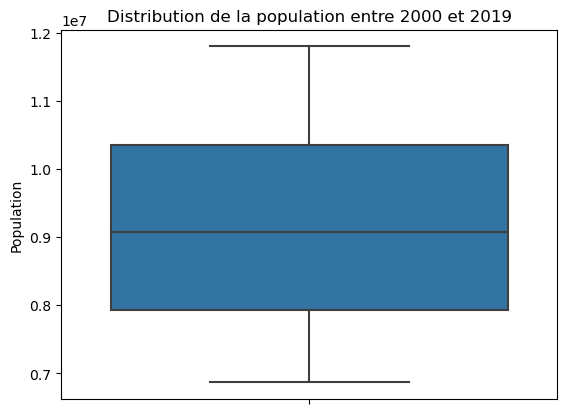

In [24]:
sns.boxplot(y= df.Population)
plt.title('Distribution de la population entre 2000 et 2019')

<AxesSubplot:ylabel='GDP_PPP'>

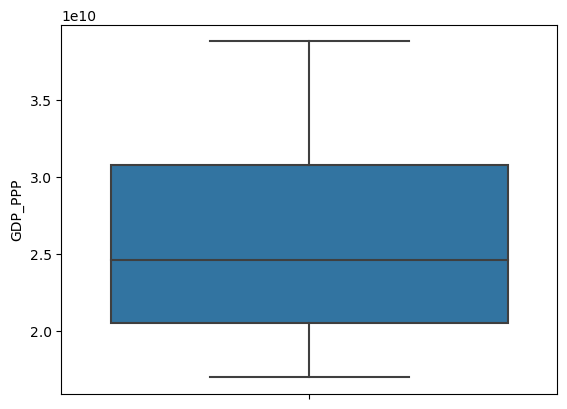

In [25]:
sns.boxplot(y= df.GDP_PPP)

### Analyse de l'évolution du PIB d'année en année :

<AxesSubplot:xlabel='Year'>

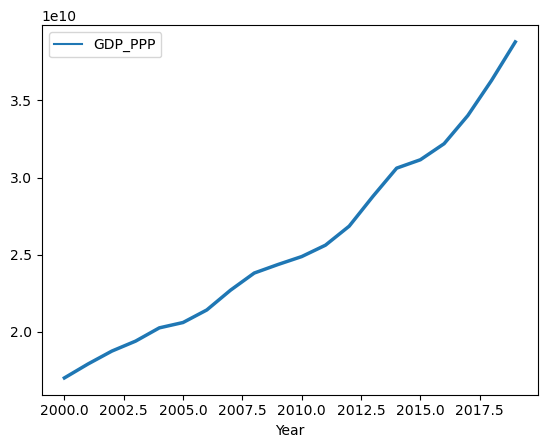

In [26]:
sns.lineplot(data=df[['GDP_PPP']], linewidth=2.5)

In [27]:
df.index

Int64Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
            2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
           dtype='int64', name='Year')

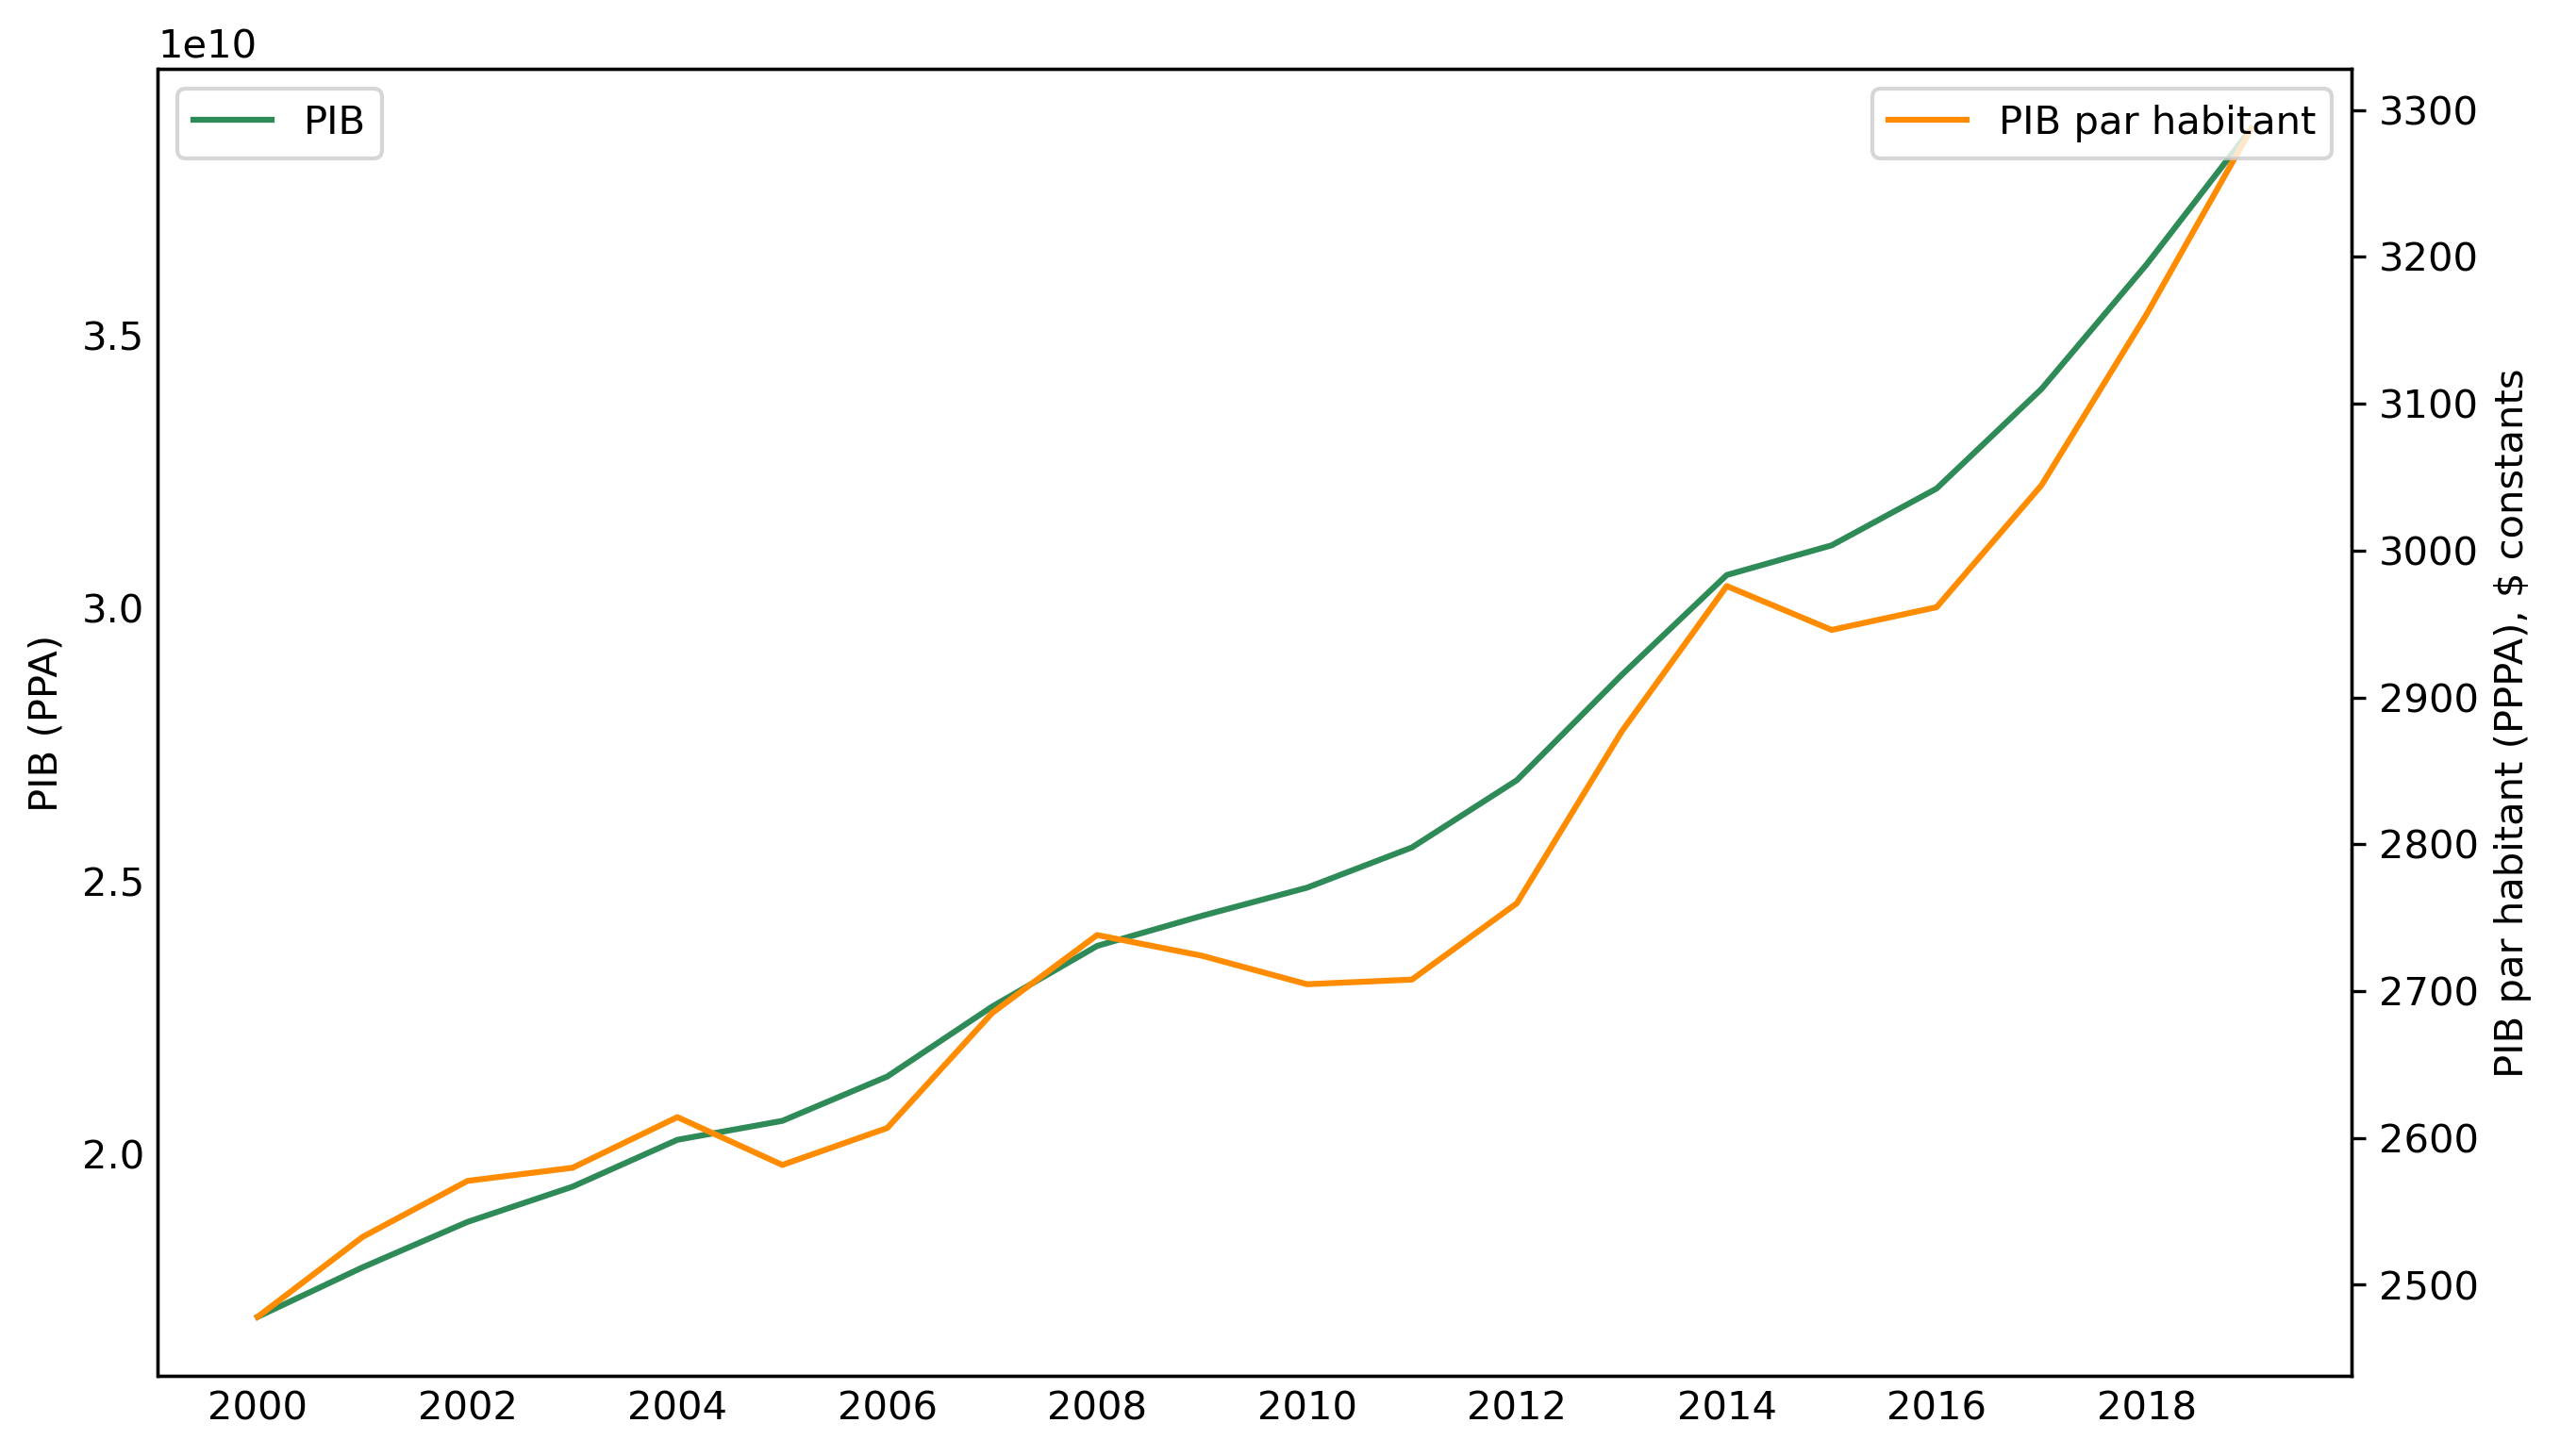

<Figure size 3000x1800 with 0 Axes>

In [28]:
fig, ax1 = plt.subplots(figsize=(10,6), dpi=300)
plt.figure(figsize=(10,6), dpi=300)
ax1.plot(df.index, df.GDP_PPP, label = 'PIB', color='seagreen')
ax1.set_ylabel("PIB (PPA)")
ax1.legend()

xtick = [2000, 2002, 2004, 2006, 2008, 2010,
            2012, 2014, 2016, 2018,]
ax1.set_xticks(xtick)
ax1.tick_params(axis ='both', which ='both', length = 0)

ax2 = ax1.twinx() 

ax2.plot(df.index, df.GDP_PPP_per_capita, label ='PIB par habitant', color='darkorange')
ax2.set_ylabel("PIB par habitant (PPPA), $ constants");
ax2.legend(loc=1)
# ax2.set_title("Bénin, évolution du PIB et du PIB par habitant")

plt.savefig("Benin_macrodata")

plt.show()

Données sur les émissions de CO2 :

In [29]:
url = 'https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv'
owd = pd.read_csv(url)

In [30]:
owd

country  year iso_code  population           gdp  cement_co2  \
0      Afghanistan  1850      AFG   3752993.0           NaN         NaN   
1      Afghanistan  1851      AFG   3767956.0           NaN         NaN   
2      Afghanistan  1852      AFG   3783940.0           NaN         NaN   
3      Afghanistan  1853      AFG   3800954.0           NaN         NaN   
4      Afghanistan  1854      AFG   3818038.0           NaN         NaN   
...            ...   ...      ...         ...           ...         ...   
50593     Zimbabwe  2017      ZWE  14751101.0  2.194784e+10       0.469   
50594     Zimbabwe  2018      ZWE  15052191.0  2.271535e+10       0.558   
50595     Zimbabwe  2019      ZWE  15354606.0           NaN       0.570   
50596     Zimbabwe  2020      ZWE  15669663.0           NaN       0.570   
50597     Zimbabwe  2021      ZWE  15993525.0           NaN       0.570   

       cement_co2_per_capita     co2  co2_growth_abs  co2_growth_prct  ...  \
0                        NaN     NaN             NaN              NaN  ...   
1                        NaN     NaN             NaN              NaN  ...   
2                        NaN     NaN             NaN              NaN  ...   
3                        NaN     NaN             NaN              NaN  ...   
4                        NaN     NaN             NaN              NaN  ...   
...                      ...     ...             ...              ...  ...   
50593                  0.032   9.596          -0.937           -8.899  ...   
50594                  0.037  11.795           2.199           22.920  ...   
50595                  0.037  11.115          -0.681           -5.772  ...   
50596                  0.036  10.608          -0.507           -4.559  ...   
50597                  0.036  11.296           0.688            6.488  ...   

       share_global_other_co2  share_of_temperature_change_from_ghg  \
0                         NaN                                   NaN   
1                         NaN                                 0.165   
2                         NaN                                 0.164   
3                         NaN                                 0.164   
4                         NaN                                 0.163   
...                       ...                                   ...   
50593                     NaN                                 0.114   
50594                     NaN                                 0.114   
50595                     NaN                                 0.113   
50596                     NaN                                 0.112   
50597                     NaN                                 0.111   

       temperature_change_from_ch4  temperature_change_from_co2  \
0                              NaN                          NaN   
1                            0.000                        0.000   
2                            0.000                        0.000   
3                            0.000                        0.000   
4                            0.000                        0.000   
...                            ...                          ...   
50593                        0.001                        0.001   
50594                        0.001                        0.001   
50595                        0.001                        0.001   
50596                        0.001                        0.001   
50597                        0.001                        0.001   

       temperature_change_from_ghg  temperature_change_from_n2o  total_ghg  \
0                              NaN                          NaN        NaN   
1                            0.000                          0.0        NaN   
2                            0.000                          0.0        NaN   
3                            0.000                          0.0        NaN   
4                            0.000                          0.0        NaN   
...                            ...             

In [31]:
owd_ben = owd[owd['iso_code']=='BEN']
owd_ben

country  year iso_code  population           gdp  cement_co2  \
5379   Benin  1850      BEN    789547.0           NaN         NaN   
5380   Benin  1851      BEN    795201.0           NaN         NaN   
5381   Benin  1852      BEN    800346.0           NaN         NaN   
5382   Benin  1853      BEN    804973.0           NaN         NaN   
5383   Benin  1854      BEN    809625.0           NaN         NaN   
...      ...   ...      ...         ...           ...         ...   
5546   Benin  2017      BEN  11596786.0  2.487005e+10       0.213   
5547   Benin  2018      BEN  11940688.0  2.668203e+10       0.392   
5548   Benin  2019      BEN  12290443.0           NaN       0.388   
5549   Benin  2020      BEN  12643121.0           NaN       0.388   
5550   Benin  2021      BEN  12996901.0           NaN       0.388   

      cement_co2_per_capita    co2  co2_growth_abs  co2_growth_prct  ...  \
5379                    NaN    NaN             NaN              NaN  ...   
5380                    NaN    NaN             NaN              NaN  ...   
5381                    NaN    NaN             NaN              NaN  ...   
5382                    NaN    NaN             NaN              NaN  ...   
5383                    NaN    NaN             NaN              NaN  ...   
...                     ...    ...             ...              ...  ...   
5546                  0.018  6.804           0.310            4.776  ...   
5547                  0.033  7.434           0.630            9.264  ...   
5548                  0.032  7.144          -0.290           -3.907  ...   
5549                  0.031  7.264           0.120            1.676  ...   
5550                  0.030  7.756           0.492            6.773  ...   

      share_global_other_co2  share_of_temperature_change_from_ghg  \
5379                     NaN                                   NaN   
5380                     NaN                                -0.043   
5381                     NaN                                -0.043   
5382                     NaN                                -0.043   
5383                     NaN                                -0.042   
...                      ...                                   ...   
5546                     NaN                                 0.053   
5547                     NaN                                 0.054   
5548                     NaN                                 0.054   
5549                     NaN                                 0.054   
5550                     NaN                                 0.054   

      temperature_change_from_ch4  temperature_change_from_co2  \
5379                          NaN                          NaN   
5380                         -0.0                       -0.000   
5381                         -0.0                       -0.000   
5382                         -0.0                       -0.000   
5383                         -0.0                       -0.000   
...                           ...                          ...   
5546                          0.0                        0.001   
5547                          0.0                        0.001   
5548                          0.0                        0.001   
5549                          0.0                        0.001   
5550                          0.0                        0.001   

      temperature_change_from_ghg  temperature_change_from_n2o  total_ghg  \
5379                          NaN                          NaN        NaN   
5380                       -0.000                          0.0        NaN   
5381                       -0.000                          0.0        NaN   
5382                       -0.000                          0.0        NaN   
5383                       -0.000                          0.0        NaN   
...                           ...                          ...        ...   
5546                        0.001                          0.0      24.72   
5547         

In [32]:
owd_ben.isnull().sum()

country                          0
year                             0
iso_code                         0
population                       0
gdp                            103
                              ... 
temperature_change_from_n2o      1
total_ghg                      142
total_ghg_excluding_lucf       142
trade_co2                      141
trade_co2_share                141
Length: 79, dtype: int64

In [33]:
owd_ben.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

In [34]:
owd_ben.loc[2860:2871,:] 

Empty DataFrame
Columns: [country, year, iso_code, population, gdp, cement_co2, cement_co2_per_capita, co2, co2_growth_abs, co2_growth_prct, co2_including_luc, co2_including_luc_growth_abs, co2_including_luc_growth_prct, co2_including_luc_per_capita, co2_including_luc_per_gdp, co2_including_luc_per_unit_energy, co2_per_capita, co2_per_gdp, co2_per_unit_energy, coal_co2, coal_co2_per_capita, consumption_co2, consumption_co2_per_capita, consumption_co2_per_gdp, cumulative_cement_co2, cumulative_co2, cumulative_co2_including_luc, cumulative_coal_co2, cumulative_flaring_co2, cumulative_gas_co2, cumulative_luc_co2, cumulative_oil_co2, cumulative_other_co2, energy_per_capita, energy_per_gdp, flaring_co2, flaring_co2_per_capita, gas_co2, gas_co2_per_capita, ghg_excluding_lucf_per_capita, ghg_per_capita, land_use_change_co2, land_use_change_co2_per_capita, methane, methane_per_capita, nitrous_oxide, nitrous_oxide_per_capita, oil_co2, oil_co2_per_capita, other_co2_per_capita, other_industry_co2, primary_energy_consumption, share_global_cement_co2, share_global_co2, share_global_co2_including_luc, share_global_coal_co2, share_global_cumulative_cement_co2, share_global_cumulative_co2, share_global_cumulative_co2_including_luc, share_global_cumulative_coal_co2, share_global_cumulative_flaring_co2, share_global_cumulative_gas_co2, share_global_cumulative_luc_co2, share_global_cumulative_oil_co2, share_global_cumulative_other_co2, share_global_flaring_co2, share_global_gas_co2, share_global_luc_co2, share_global_oil_co2, share_global_other_co2, share_of_temperature_change_from_ghg, temperature_change_from_ch4, temperature_change_from_co2, temperature_change_from_ghg, temperature_change_from_n2o, total_ghg, total_ghg_excluding_lucf, trade_co2, trade_co2_share]
Index: []

[0 rows x 79 columns]

## Moyenne des températures dans les deux zones : Nord (Alibori) et Sud (Atlantique)

In [35]:
# Moyenne des températures au Nord et au Sud
benin_temp_all[['Alibori', 'Atlantique']].describe()

Alibori  Atlantique
count  40.000000   40.000000
mean   28.654250   27.605500
std     0.322283    0.353459
min    27.890000   26.860000
25%    28.455000   27.280000
50%    28.690000   27.690000
75%    28.870000   27.835000
max    29.190000   28.240000

In [36]:
alib_atl_df = benin_temp_all[['Alibori', 'Atlantique']]
alib_atl_df

Alibori  Atlantique
79     28.19       27.09
80     28.48       27.70
81     28.39       27.54
82     28.72       27.85
83     28.66       27.80
84     28.64       27.59
85     28.49       27.40
86     28.85       27.69
87     28.26       27.18
88     27.89       26.86
89     28.59       27.24
90     28.26       27.10
91     27.98       27.05
92     28.33       27.10
93     28.09       27.07
94     28.46       27.29
95     28.57       27.28
96     28.55       27.21
97     28.87       27.83
98     28.49       27.28
99     28.44       27.61
100    28.66       27.69
101    28.76       27.70
102    28.85       27.81
103    28.77       27.61
104    29.08       27.90
105    28.86       27.87
106    28.87       27.80
107    28.43       27.60
108    29.16       27.82
109    29.13       28.22
110    28.95       27.80
111    28.75       27.61
112    28.87       27.78
113    29.03       27.97
114    28.85       28.03
115    29.19       28.24
116    29.00       28.09
117    28.97       28.01
118    28.79       27.91

<AxesSubplot:ylabel='Alibori'>

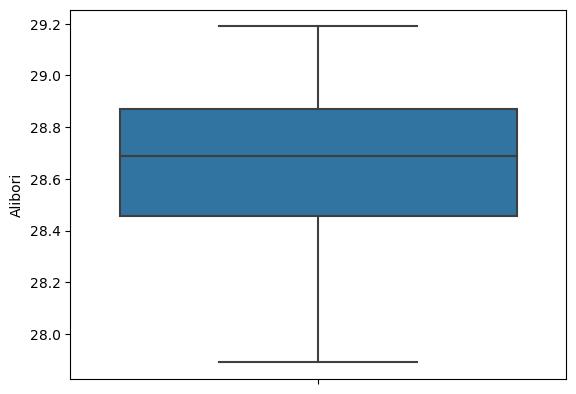

In [37]:
sns.boxplot(y=alib_atl_df.Alibori)

In [38]:
alib_atl = benin_temp_all[["Year","Alibori", "Atlantique"]]
year_name = alib_atl['Year'].unique()
year_name

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [39]:
alib_atl = alib_atl.transpose()
alib_atl.columns = year_name

In [40]:
alib_atl = alib_atl.reset_index()
alib_atl

index     1980     1981     1982     1983     1984     1985     1986  \
0        Year  1980.00  1981.00  1982.00  1983.00  1984.00  1985.00  1986.00   
1     Alibori    28.19    28.48    28.39    28.72    28.66    28.64    28.49   
2  Atlantique    27.09    27.70    27.54    27.85    27.80    27.59    27.40   

      1987     1988  ...     2010     2011     2012     2013     2014  \
0  1987.00  1988.00  ...  2010.00  2011.00  2012.00  2013.00  2014.00   
1    28.85    28.26  ...    29.13    28.95    28.75    28.87    29.03   
2    27.69    27.18  ...    28.22    27.80    27.61    27.78    27.97   

      2015     2016     2017     2018     2019  
0  2015.00  2016.00  2017.00  2018.00  2019.00  
1    28.85    29.19    29.00    28.97    28.79  
2    28.03    28.24    28.09    28.01    27.91  

[3 rows x 41 columns]

In [41]:
for_boxplot = alib_atl.loc[[1, 2],:]
for_boxplot

index   1980   1981   1982   1983   1984   1985   1986   1987   1988  \
1     Alibori  28.19  28.48  28.39  28.72  28.66  28.64  28.49  28.85  28.26   
2  Atlantique  27.09  27.70  27.54  27.85  27.80  27.59  27.40  27.69  27.18   

   ...   2010   2011   2012   2013   2014   2015   2016   2017   2018   2019  
1  ...  29.13  28.95  28.75  28.87  29.03  28.85  29.19  29.00  28.97  28.79  
2  ...  28.22  27.80  27.61  27.78  27.97  28.03  28.24  28.09  28.01  27.91  

[2 rows x 41 columns]

La moyenne des températures au Nord, de 1980 à 2019 est de 28.33 degrés celsisus contre 27.68 degrés (toutes zones confondues).

In [42]:
benin_temp_all.describe()

Year  mean_annual_temp    Alibori  Atlantique
count    40.000000         40.000000  40.000000   40.000000
mean   1999.500000         27.957500  28.654250   27.605500
std      11.690452          0.333234   0.322283    0.353459
min    1980.000000         27.180000  27.890000   26.860000
25%    1989.750000         27.730000  28.455000   27.280000
50%    1999.500000         28.010000  28.690000   27.690000
75%    2009.250000         28.190000  28.870000   27.835000
max    2019.000000         28.530000  29.190000   28.240000

In [43]:
for_boxplot

index   1980   1981   1982   1983   1984   1985   1986   1987   1988  \
1     Alibori  28.19  28.48  28.39  28.72  28.66  28.64  28.49  28.85  28.26   
2  Atlantique  27.09  27.70  27.54  27.85  27.80  27.59  27.40  27.69  27.18   

   ...   2010   2011   2012   2013   2014   2015   2016   2017   2018   2019  
1  ...  29.13  28.95  28.75  28.87  29.03  28.85  29.19  29.00  28.97  28.79  
2  ...  28.22  27.80  27.61  27.78  27.97  28.03  28.24  28.09  28.01  27.91  

[2 rows x 41 columns]

In [44]:
alib_atl_df[["Alibori"]]

Alibori
79     28.19
80     28.48
81     28.39
82     28.72
83     28.66
84     28.64
85     28.49
86     28.85
87     28.26
88     27.89
89     28.59
90     28.26
91     27.98
92     28.33
93     28.09
94     28.46
95     28.57
96     28.55
97     28.87
98     28.49
99     28.44
100    28.66
101    28.76
102    28.85
103    28.77
104    29.08
105    28.86
106    28.87
107    28.43
108    29.16
109    29.13
110    28.95
111    28.75
112    28.87
113    29.03
114    28.85
115    29.19
116    29.00
117    28.97
118    28.79

In [45]:
# autre essai de format de dataframe pour en faire un boxplot

alibori = alib_atl_df[["Alibori"]].squeeze()
atlantique = alib_atl_df[["Atlantique"]].squeeze()
alibori

79     28.19
80     28.48
81     28.39
82     28.72
83     28.66
84     28.64
85     28.49
86     28.85
87     28.26
88     27.89
89     28.59
90     28.26
91     27.98
92     28.33
93     28.09
94     28.46
95     28.57
96     28.55
97     28.87
98     28.49
99     28.44
100    28.66
101    28.76
102    28.85
103    28.77
104    29.08
105    28.86
106    28.87
107    28.43
108    29.16
109    29.13
110    28.95
111    28.75
112    28.87
113    29.03
114    28.85
115    29.19
116    29.00
117    28.97
118    28.79
Name: Alibori, dtype: float64

In [46]:
temp_regions = pd.DataFrame(pd.concat([alibori, atlantique]))
# temp_regions.shape # chaque région = 40 en ligne
temp_regions

0
79   28.19
80   28.48
81   28.39
82   28.72
83   28.66
..     ...
114  28.03
115  28.24
116  28.09
117  28.01
118  27.91

[80 rows x 1 columns]

In [47]:
for i in range(40):
        print("'Alibori',")

'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',


In [48]:
for j in range(40):
    print("'Atlantique',")

'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',


In [49]:
nom_alibori = ['Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',
'Alibori',]

nom_alibori

['Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori']

In [50]:
nom_atlantique = ['Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',
'Atlantique',]

In [51]:
noms = nom_alibori + nom_atlantique
noms

['Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantiq

In [52]:
temp_regions['Region'] = noms
temp_regions = temp_regions.rename(columns={0 : "Temperature"})

In [53]:
year_temp = np.resize(np.arange(1980,2020,1), 40*2) # répéter 2 fois les dates
temp_regions['Year'] = year_temp
temp_regions = temp_regions[['Year', 'Temperature', 'Region']]
temp_regions

Year  Temperature      Region
79   1980        28.19     Alibori
80   1981        28.48     Alibori
81   1982        28.39     Alibori
82   1983        28.72     Alibori
83   1984        28.66     Alibori
..    ...          ...         ...
114  2015        28.03  Atlantique
115  2016        28.24  Atlantique
116  2017        28.09  Atlantique
117  2018        28.01  Atlantique
118  2019        27.91  Atlantique

[80 rows x 3 columns]

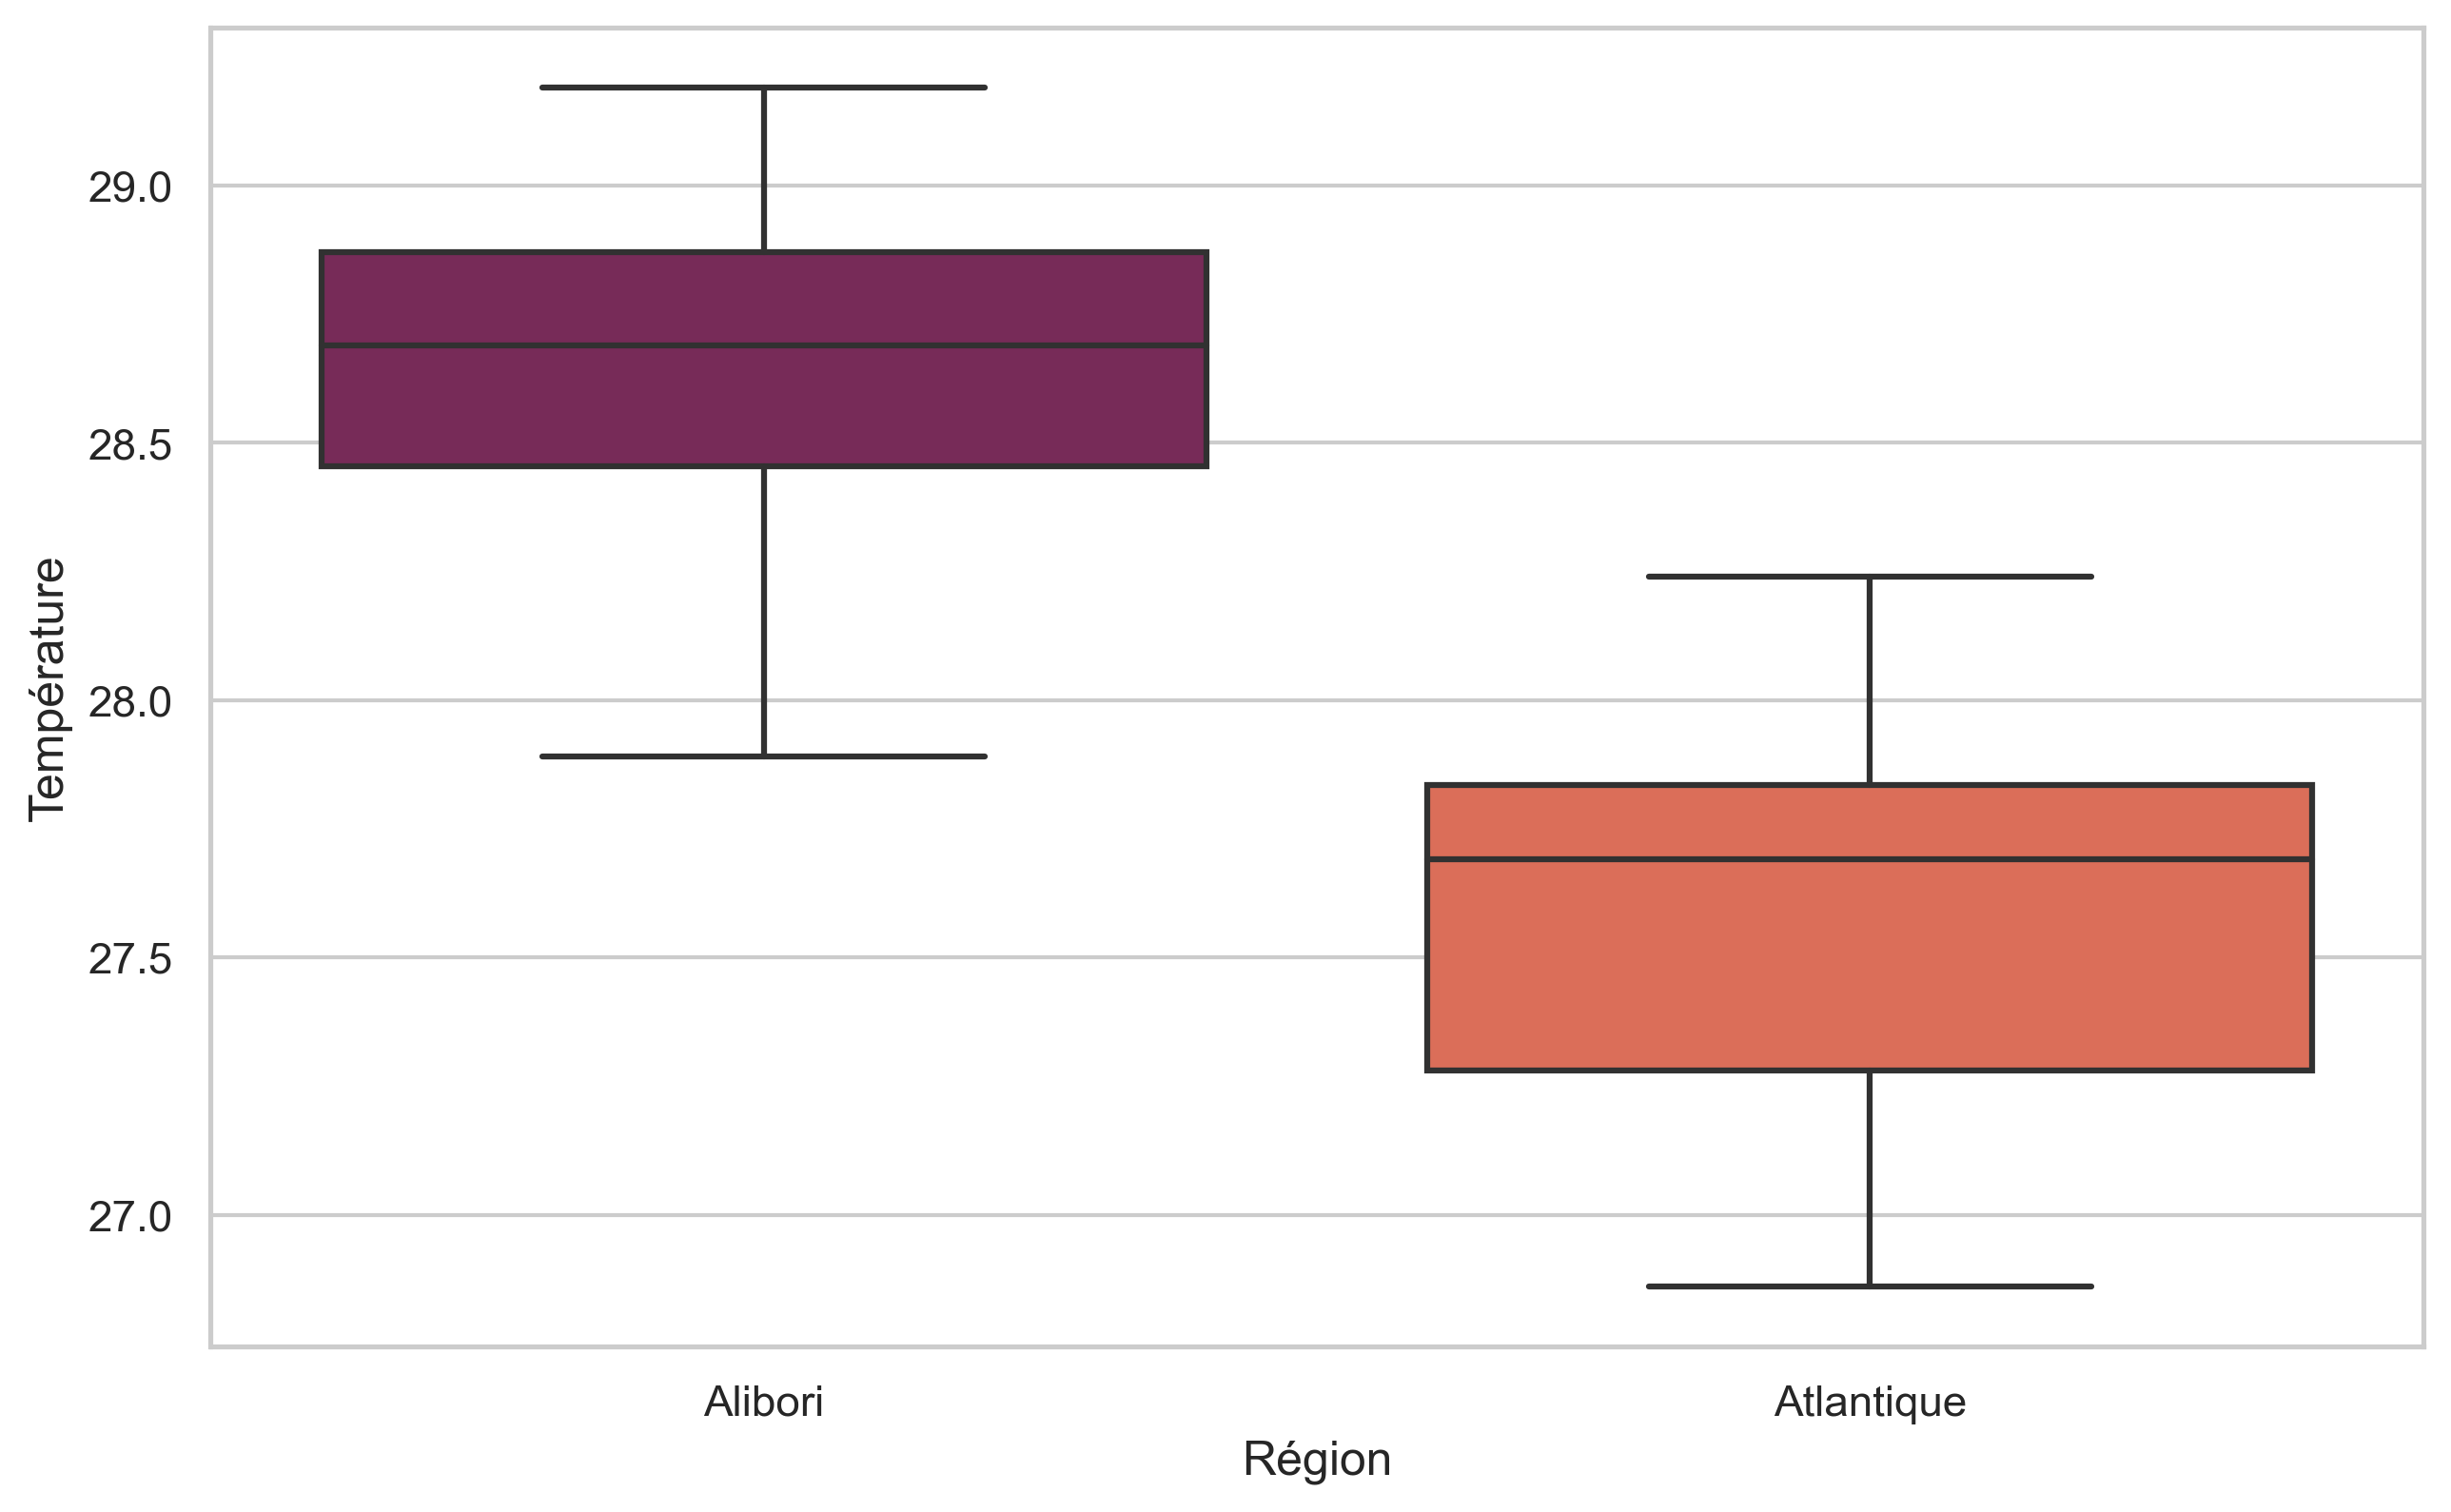

In [54]:
plt.figure(figsize=(10,6), dpi=300)
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="Region", y="Temperature", data=temp_regions, palette='rocket')
plt.xlabel("Région")
plt.ylabel("Température")

plt.savefig("Benin temperature bewteen regions")

## Précipitations annuelles:

In [55]:
benin_prec_all

Year  mean_annual_prec  Alibori  Atlantique
79   1980           1011.27   893.11     1111.89
80   1981            965.63   942.62      899.55
81   1982            898.38   817.22     1174.63
82   1983            753.38   715.67      766.77
83   1984            925.31   735.05      913.20
84   1985            984.91   875.03      967.16
85   1986            943.80   922.65      832.21
86   1987            949.67   757.40     1335.55
87   1988           1161.14   991.26     1285.21
88   1989           1080.61   918.99     1145.30
89   1990            924.90   827.54      945.45
90   1991           1207.55  1048.11     1255.40
91   1992            942.84   902.37      901.39
92   1993            930.19   792.50     1181.53
93   1994           1105.74  1091.99      961.08
94   1995           1116.41   870.68     1115.75
95   1996           1056.29   988.78     1067.74
96   1997            997.04   822.57     1262.32
97   1998           1096.38  1095.89      932.69
98   1999           1162.08  1007.36     1206.96
99   2000            961.84   846.72      934.39
100  2001            846.08   811.19      831.24
101  2002           1021.21   904.17     1140.59
102  2003           1199.85  1094.76     1213.09
103  2004           1041.47   872.69     1182.50
104  2005            988.65   954.62     1013.32
105  2006            983.28   875.84     1063.29
106  2007           1128.83   962.41     1285.47
107  2008           1186.52  1029.06     1298.97
108  2009           1096.71   970.42     1180.66
109  2010           1128.68   936.59     1344.49
110  2011            977.35   816.53     1126.21
111  2012            999.65   848.05     1112.68
112  2013            939.67   854.10     1067.41
113  2014           1007.58   844.93     1208.93
114  2015            922.35   855.58     1003.95
115  2016            954.21   872.66     1007.60
116  2017           1031.61  1025.89     1062.39
117  2018           1106.88   958.95     1173.74
118  2019           1179.57   951.79     1462.43

In [56]:
for k in range(40):
    print("'Mean_country',")

'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',


In [57]:
mean_country = ['Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',
'Mean_country',]

In [58]:
for k in range(40):
    print("'Country',")

'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',


In [59]:
country = ['Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country',
'Country']
all_names = noms + country
all_names

['Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Alibori',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantique',
 'Atlantiq

In [60]:
# années de 1980 à 2019
annees = np.resize(np.arange(1980,2020,1), 40*3) # répéter 2 fois les dates

In [61]:
prec_alibori = benin_prec_all[['Alibori']].squeeze() # df to series
prec_atlantique = benin_prec_all['Atlantique'].squeeze() # df to series
prec_country = benin_prec_all['mean_annual_prec'].squeeze() # ajout données pays
prec_regions_p1 = pd.DataFrame(pd.concat([prec_alibori, prec_atlantique])) # concaténation
prec_regions = pd.DataFrame(pd.concat([prec_regions_p1, prec_country]))
prec_regions['noms'] = all_names # prec moyenne pays incluses
prec_regions = prec_regions.rename(columns={0 : 'Yearly_Annual_Precipitation_mm', 'noms' : 'Region'})
prec_regions = prec_regions[['Region', 'Yearly_Annual_Precipitation_mm']]
prec_regions['Year'] = annees
prec_regions

Region  Yearly_Annual_Precipitation_mm  Year
79   Alibori                          893.11  1980
80   Alibori                          942.62  1981
81   Alibori                          817.22  1982
82   Alibori                          715.67  1983
83   Alibori                          735.05  1984
..       ...                             ...   ...
114  Country                          922.35  2015
115  Country                          954.21  2016
116  Country                         1031.61  2017
117  Country                         1106.88  2018
118  Country                         1179.57  2019

[120 rows x 3 columns]

In [62]:
prec_alib_atl_regions = prec_regions.head(n=80)
prec_alib_atl_regions

Region  Yearly_Annual_Precipitation_mm  Year
79      Alibori                          893.11  1980
80      Alibori                          942.62  1981
81      Alibori                          817.22  1982
82      Alibori                          715.67  1983
83      Alibori                          735.05  1984
..          ...                             ...   ...
114  Atlantique                         1003.95  2015
115  Atlantique                         1007.60  2016
116  Atlantique                         1062.39  2017
117  Atlantique                         1173.74  2018
118  Atlantique                         1462.43  2019

[80 rows x 3 columns]

In [63]:
benin_temp_all

Year  mean_annual_temp  Alibori  Atlantique
79   1980             27.44    28.19       27.09
80   1981             27.97    28.48       27.70
81   1982             27.83    28.39       27.54
82   1983             28.21    28.72       27.85
83   1984             28.07    28.66       27.80
84   1985             28.01    28.64       27.59
85   1986             27.83    28.49       27.40
86   1987             28.07    28.85       27.69
87   1988             27.54    28.26       27.18
88   1989             27.18    27.89       26.86
89   1990             27.76    28.59       27.24
90   1991             27.48    28.26       27.10
91   1992             27.34    27.98       27.05
92   1993             27.52    28.33       27.10
93   1994             27.40    28.09       27.07
94   1995             27.66    28.46       27.29
95   1996             27.74    28.57       27.28
96   1997             27.70    28.55       27.21
97   1998             28.17    28.87       27.83
98   1999             27.68    28.49       27.28
99   2000             27.84    28.44       27.61
100  2001             28.01    28.66       27.69
101  2002             28.06    28.76       27.70
102  2003             28.15    28.85       27.81
103  2004             28.00    28.77       27.61
104  2005             28.32    29.08       27.90
105  2006             28.19    28.86       27.87
106  2007             28.17    28.87       27.80
107  2008             27.85    28.43       27.60
108  2009             28.31    29.16       27.82
109  2010             28.46    29.13       28.22
110  2011             28.19    28.95       27.80
111  2012             28.01    28.75       27.61
112  2013             28.16    28.87       27.78
113  2014             28.33    29.03       27.97
114  2015             28.27    28.85       28.03
115  2016             28.53    29.19       28.24
116  2017             28.35    29.00       28.09
117  2018             28.33    28.97       28.01
118  2019             28.17    28.79       27.91

In [64]:
# Relevé des températures pour les régions aliborin atlantique + le pays 

temp_alibori = benin_temp_all[['Alibori']].squeeze() # df to series
temp_atlantique = benin_temp_all['Atlantique'].squeeze() # df to series
temp_country = benin_temp_all[['mean_annual_temp']].squeeze() # ajout données pays
dftemp1 = pd.DataFrame(pd.concat([temp_alibori, temp_atlantique])) # concaténation
temp_all = pd.DataFrame(pd.concat([dftemp1, temp_country]))
temp_all['noms'] = all_names # temp moyenne pays incluses
temp_all = temp_all.rename(columns={0 : 'Mean_annual_temp', 'noms' : 'Region'})
temp_all = temp_all[['Region', 'Mean_annual_temp']]
temp_all['Year'] = annees
temp_all

Region  Mean_annual_temp  Year
79   Alibori             28.19  1980
80   Alibori             28.48  1981
81   Alibori             28.39  1982
82   Alibori             28.72  1983
83   Alibori             28.66  1984
..       ...               ...   ...
114  Country             28.27  2015
115  Country             28.53  2016
116  Country             28.35  2017
117  Country             28.33  2018
118  Country             28.17  2019

[120 rows x 3 columns]

In [65]:
temp_all = temp_all.set_index('Year')
temp_all = temp_all.reset_index()

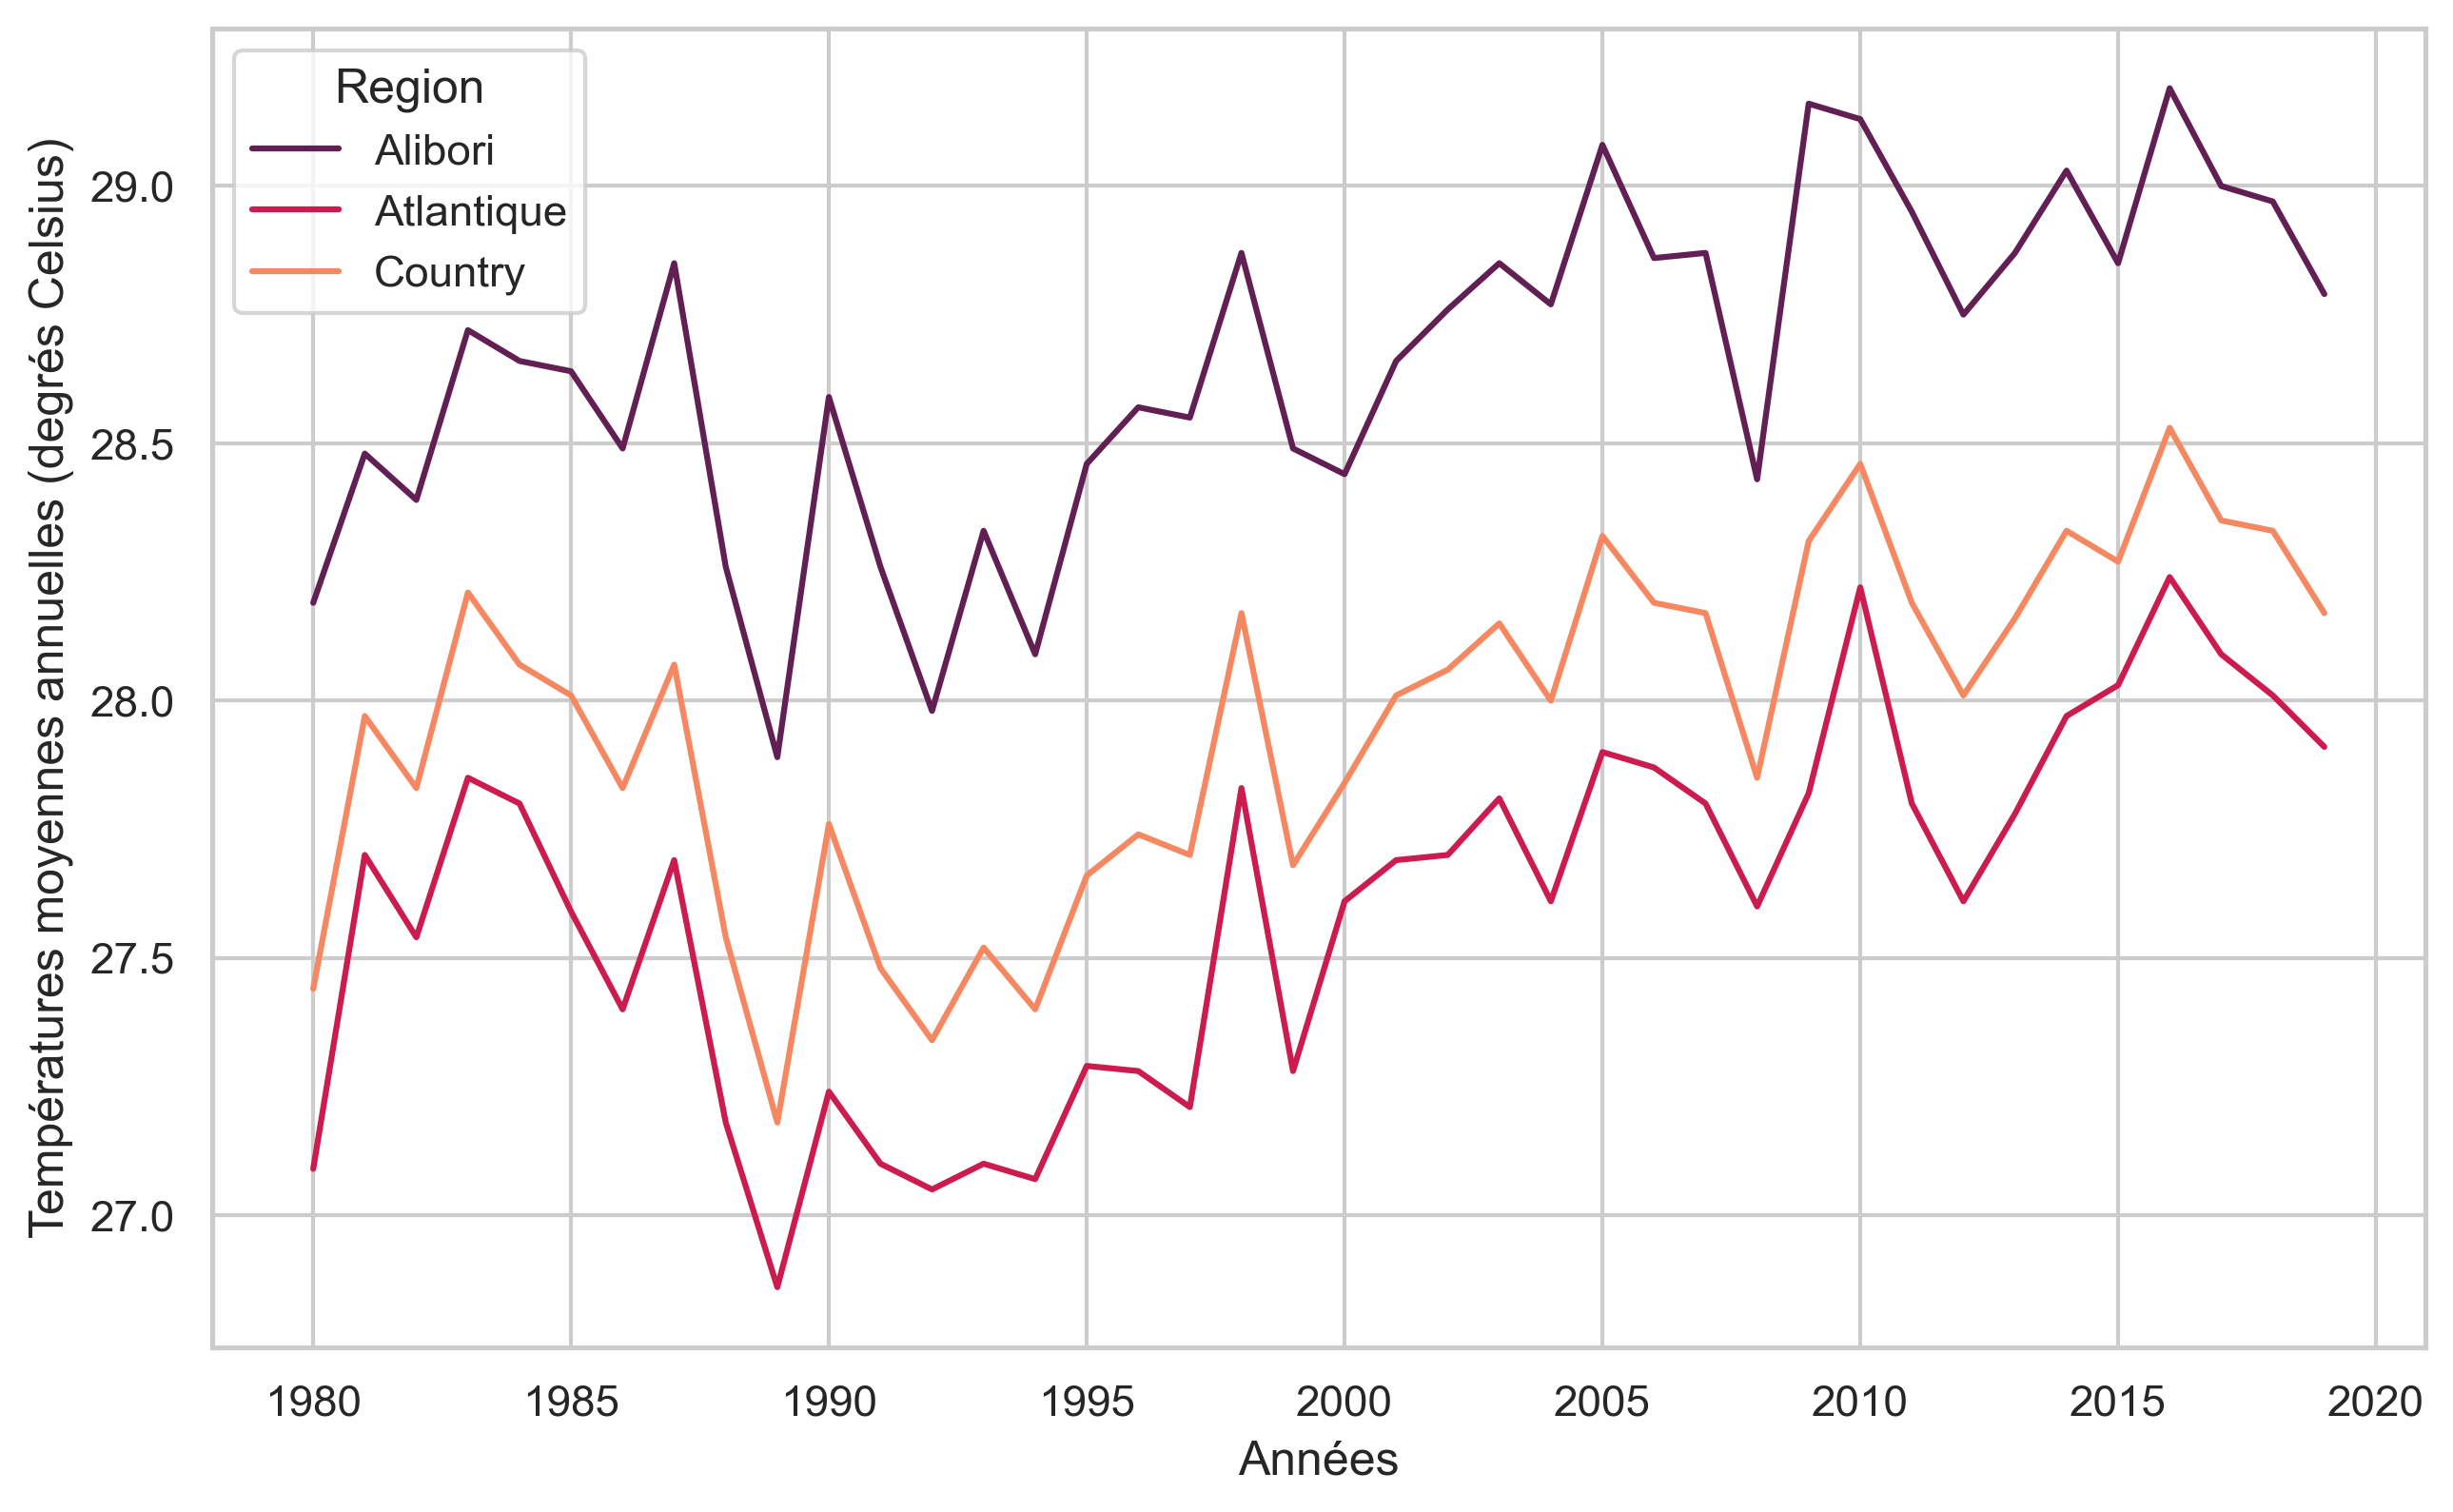

In [66]:
ax4 = plt.figure(figsize=(10,6), dpi=300)
sns.lineplot(data=temp_all, x='Year', y='Mean_annual_temp', hue='Region', palette='rocket')
plt.xlabel('Années')
plt.ylabel('Températures moyennes annuelles (degrés Celsius)')
plt.show()

### Evolution des précipitations annuelles

In [67]:
y = np.log(prec_regions['Yearly_Annual_Precipitation_mm'])
y

prec_regions_ln = prec_regions.copy()
prec_regions_ln['ln_precipitation'] = y
prec_regions_ln

Region  Yearly_Annual_Precipitation_mm  Year  ln_precipitation
79   Alibori                          893.11  1980          6.794710
80   Alibori                          942.62  1981          6.848663
81   Alibori                          817.22  1982          6.705908
82   Alibori                          715.67  1983          6.573219
83   Alibori                          735.05  1984          6.599939
..       ...                             ...   ...               ...
114  Country                          922.35  2015          6.826925
115  Country                          954.21  2016          6.860884
116  Country                         1031.61  2017          6.938876
117  Country                         1106.88  2018          7.009301
118  Country                         1179.57  2019          7.072905

[120 rows x 4 columns]

In [68]:
line_prec = prec_regions.copy()
line_prec = line_prec.set_index('Year')
line_prec = line_prec.reset_index()
line_prec

Year   Region  Yearly_Annual_Precipitation_mm
0    1980  Alibori                          893.11
1    1981  Alibori                          942.62
2    1982  Alibori                          817.22
3    1983  Alibori                          715.67
4    1984  Alibori                          735.05
..    ...      ...                             ...
115  2015  Country                          922.35
116  2016  Country                          954.21
117  2017  Country                         1031.61
118  2018  Country                         1106.88
119  2019  Country                         1179.57

[120 rows x 3 columns]

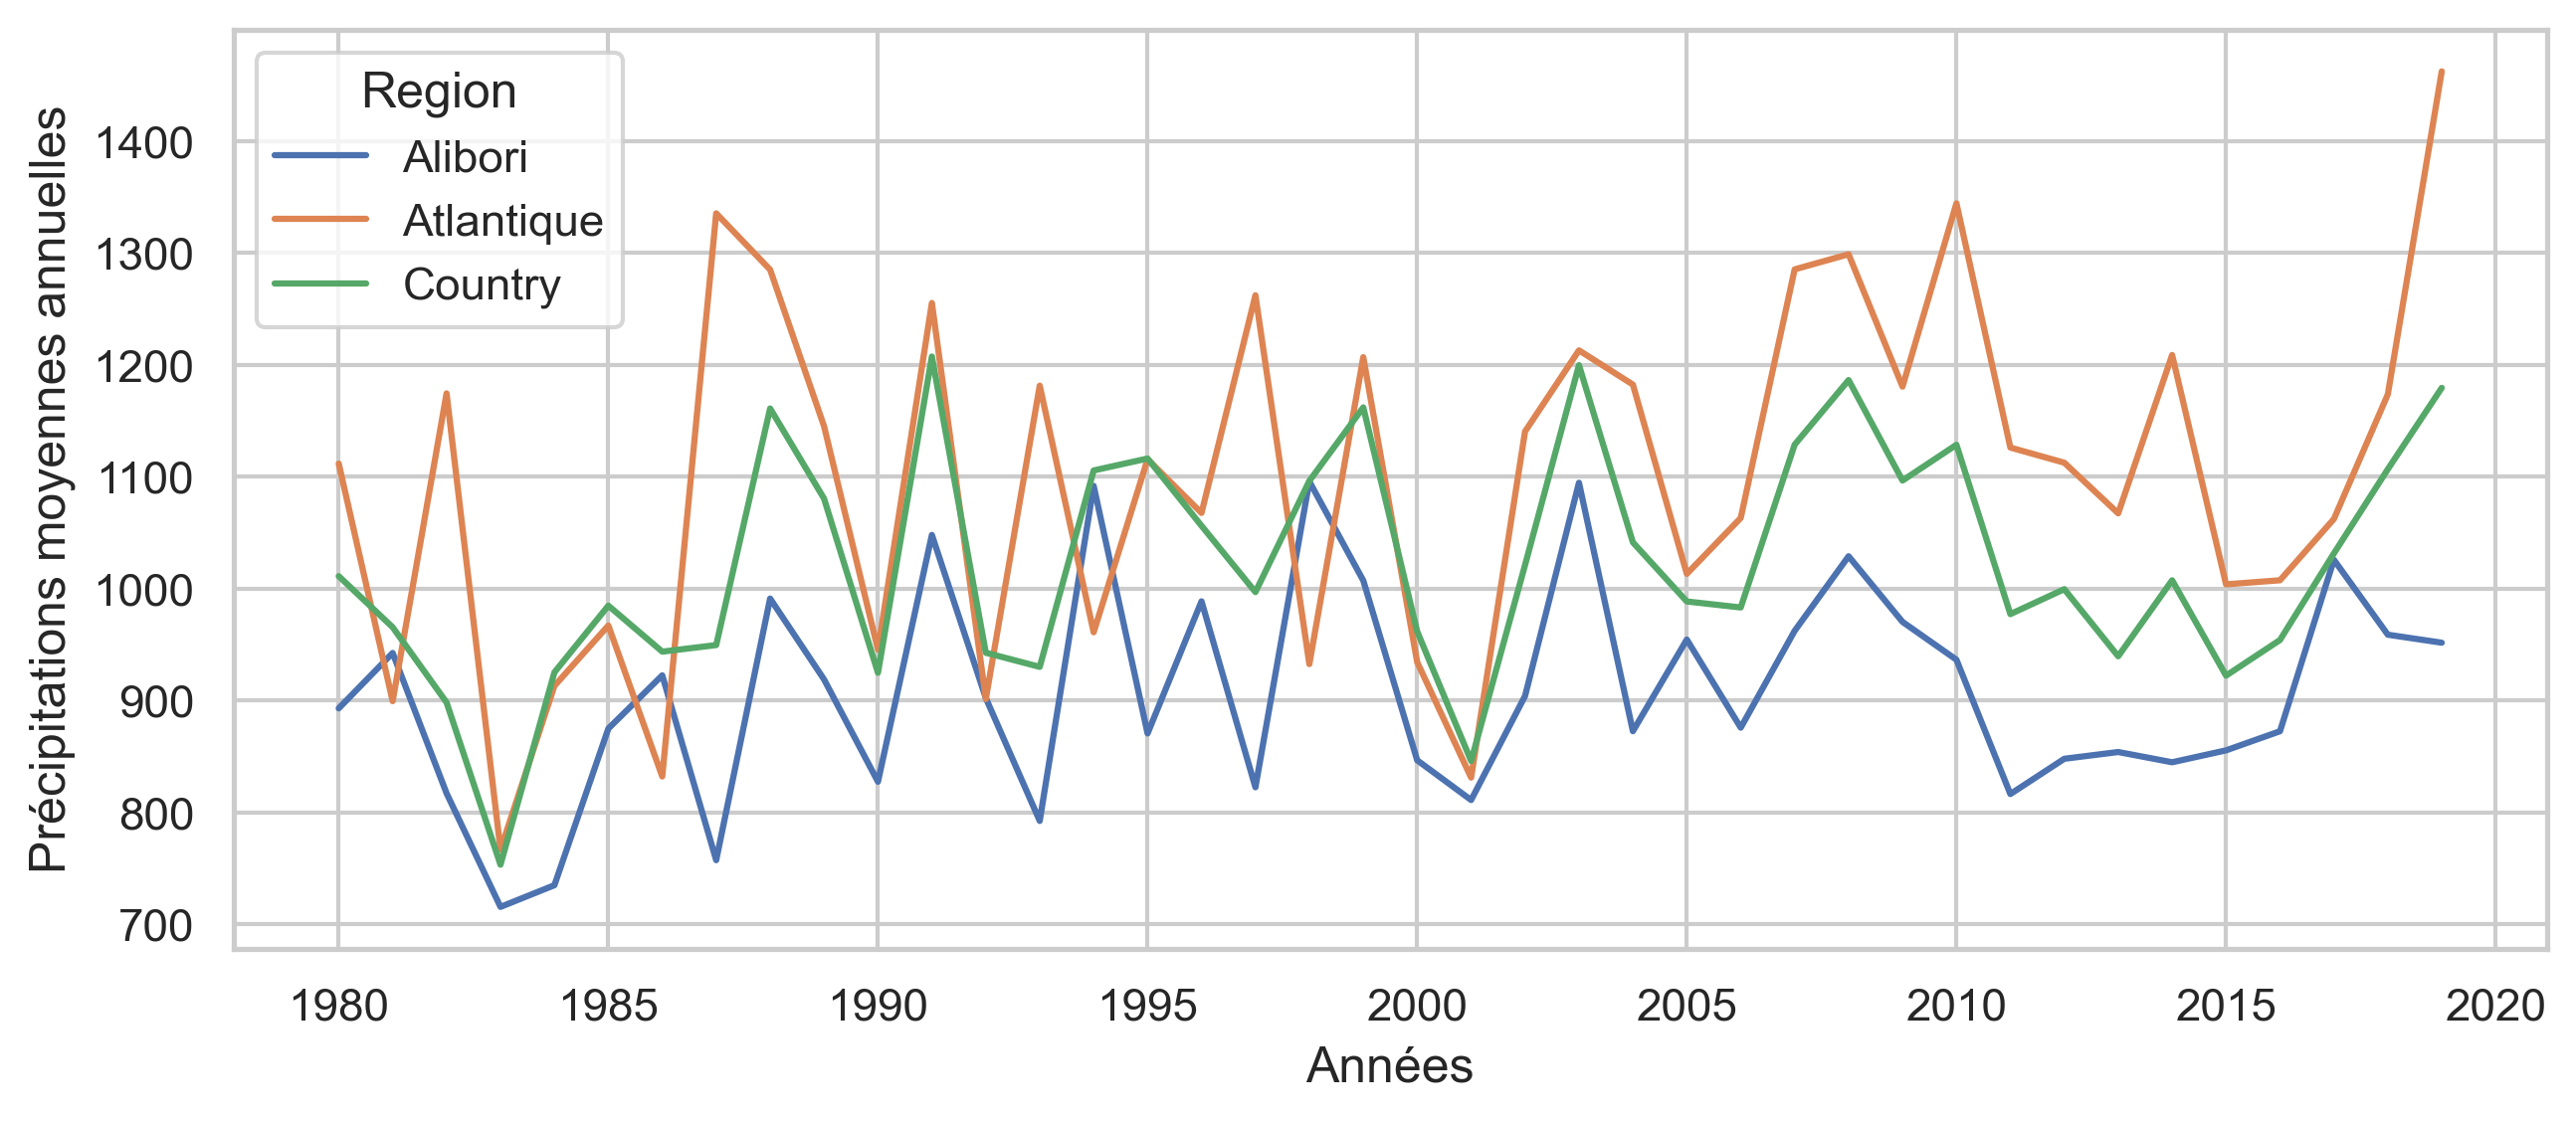

In [69]:
ax3 = plt.figure(figsize=(10,4), dpi=300)
sns.lineplot(
    data=line_prec,
    x="Year", y="Yearly_Annual_Precipitation_mm", hue="Region",
    markers=True, dashes=False)

plt.xlabel('Années')
plt.ylabel('Précipitations moyennes annuelles')

plt.savefig('précipitations.svg')

plt.show()

## Format logarithme

In [70]:
line_ln_prec = prec_regions_ln.set_index('Year').copy()
line_ln_prec = line_ln_prec.reset_index()
line_ln_prec

Year   Region  Yearly_Annual_Precipitation_mm  ln_precipitation
0    1980  Alibori                          893.11          6.794710
1    1981  Alibori                          942.62          6.848663
2    1982  Alibori                          817.22          6.705908
3    1983  Alibori                          715.67          6.573219
4    1984  Alibori                          735.05          6.599939
..    ...      ...                             ...               ...
115  2015  Country                          922.35          6.826925
116  2016  Country                          954.21          6.860884
117  2017  Country                         1031.61          6.938876
118  2018  Country                         1106.88          7.009301
119  2019  Country                         1179.57          7.072905

[120 rows x 4 columns]

<AxesSubplot:xlabel='Year', ylabel='ln_precipitation'>

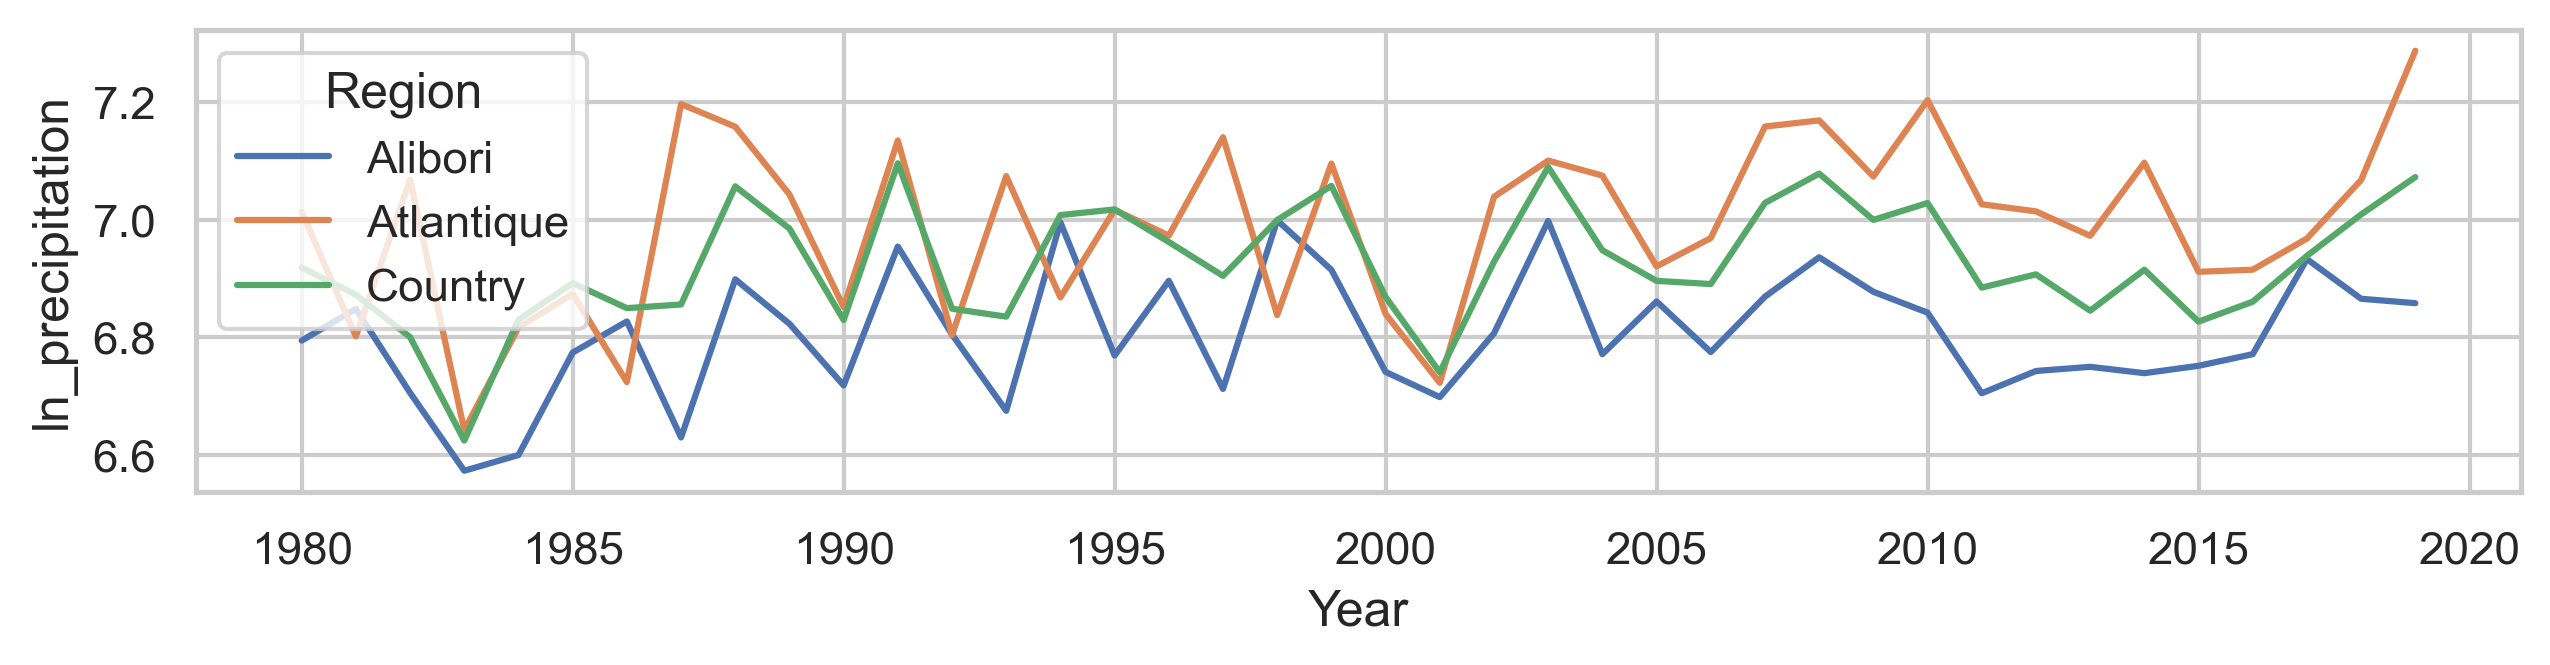

In [71]:
ax3 = plt.figure(figsize=(10,2), dpi=300)
sns.lineplot(
    data=line_ln_prec,
    x="Year", y="ln_precipitation", hue="Region",
    markers=True, dashes=False
)

In [72]:
year_prec = np.resize(np.arange(1980,2020,1), 40*2) # répéter 2 fois les dates
year_prec

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019])

In [73]:
prec_regions

Region  Yearly_Annual_Precipitation_mm  Year
79   Alibori                          893.11  1980
80   Alibori                          942.62  1981
81   Alibori                          817.22  1982
82   Alibori                          715.67  1983
83   Alibori                          735.05  1984
..       ...                             ...   ...
114  Country                          922.35  2015
115  Country                          954.21  2016
116  Country                         1031.61  2017
117  Country                         1106.88  2018
118  Country                         1179.57  2019

[120 rows x 3 columns]

## Distribution des précipitations entre différentes régions

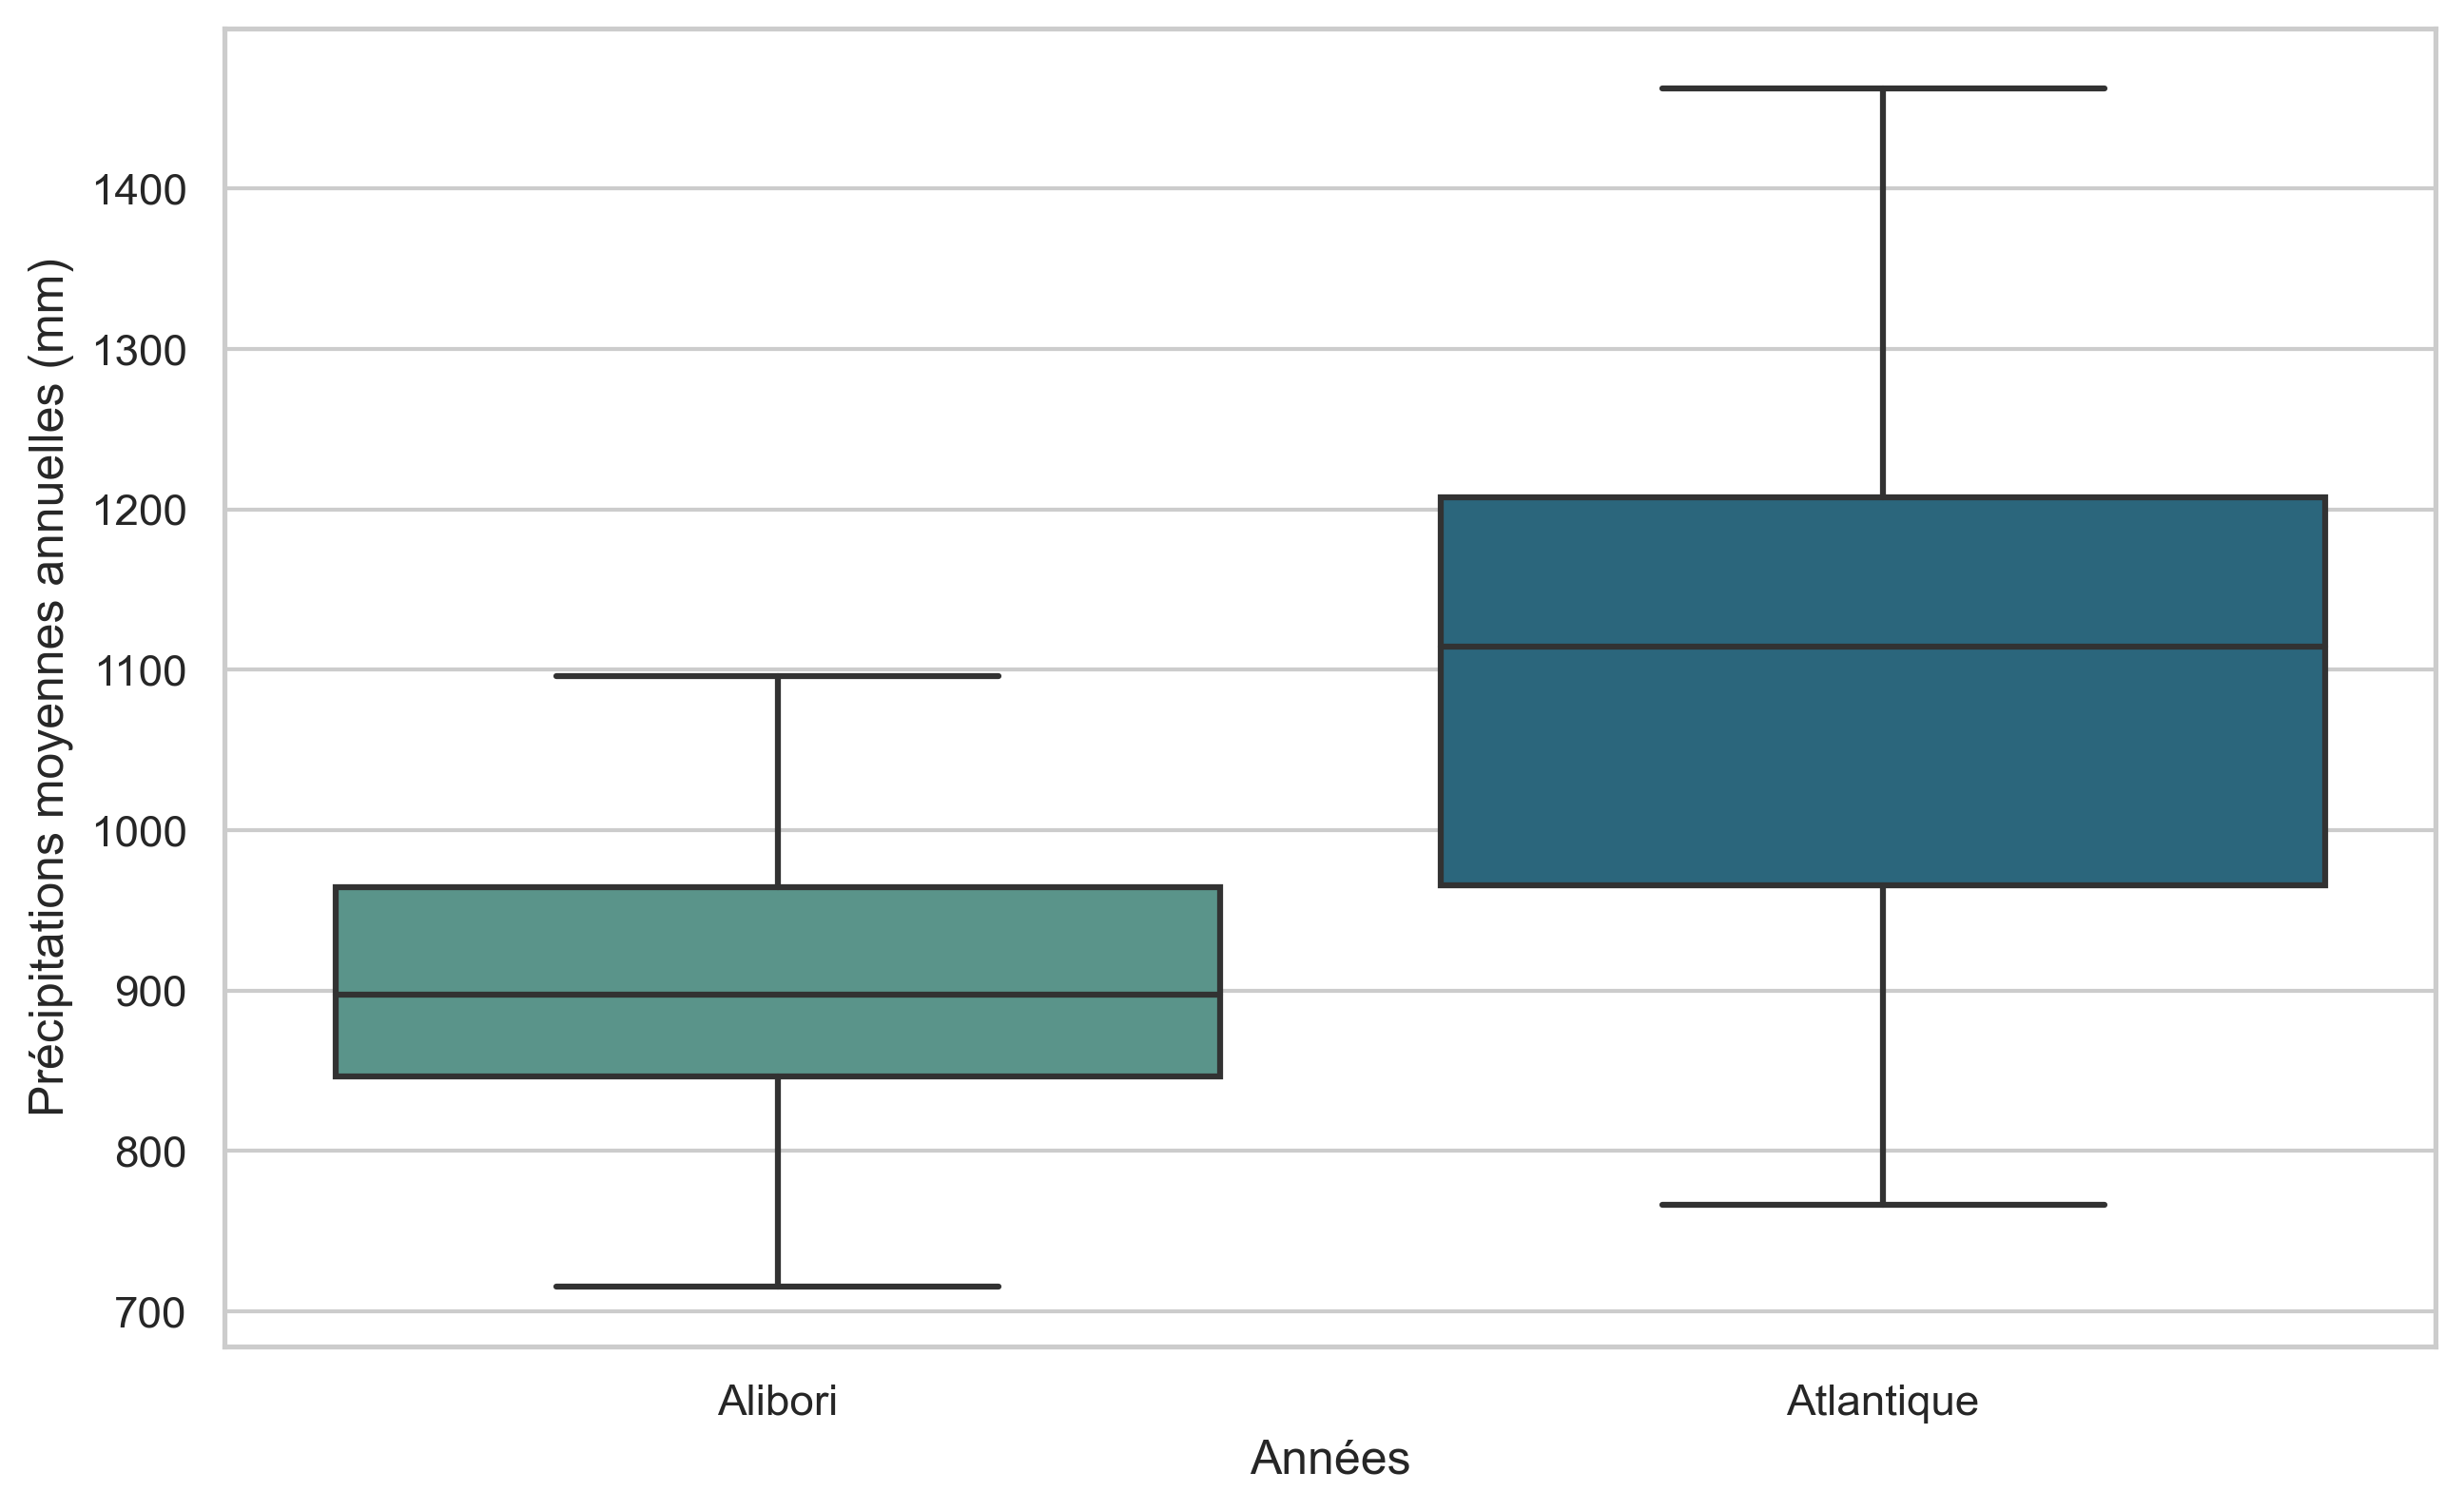

In [74]:
plt.figure(figsize=(10,6), dpi=300)
sns.set_theme(style="whitegrid")
ax2 = sns.boxplot(x="Region", y="Yearly_Annual_Precipitation_mm", data=prec_alib_atl_regions, palette='crest')
plt.xlabel('Années')
plt.ylabel('Précipitations moyennes annuelles (mm)')

plt.savefig("Benin yearly annual precipitation (mm)")

In [75]:
prec_regions = prec_regions.set_index('Year')
prec_regions = prec_regions.reset_index()
prec_regions

Year   Region  Yearly_Annual_Precipitation_mm
0    1980  Alibori                          893.11
1    1981  Alibori                          942.62
2    1982  Alibori                          817.22
3    1983  Alibori                          715.67
4    1984  Alibori                          735.05
..    ...      ...                             ...
115  2015  Country                          922.35
116  2016  Country                          954.21
117  2017  Country                         1031.61
118  2018  Country                         1106.88
119  2019  Country                         1179.57

[120 rows x 3 columns]

<Figure size 3000x1800 with 0 Axes>

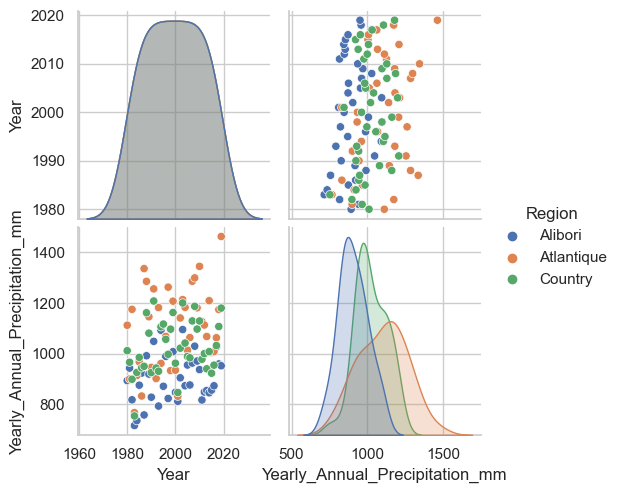

In [76]:
plt.figure(figsize=(10,6), dpi=300)
sns.pairplot(prec_regions, hue='Region')
plt.xlabel('Pairplot', fontsize = 14)
plt.savefig('pairplot per variables')

### Variation des températures entre les réions d'Alibori et Atlantique :

In [77]:
temp_regions = temp_regions.set_index('Year')
temp_regions = temp_regions.reset_index()
temp_regions

Year  Temperature      Region
0   1980        28.19     Alibori
1   1981        28.48     Alibori
2   1982        28.39     Alibori
3   1983        28.72     Alibori
4   1984        28.66     Alibori
..   ...          ...         ...
75  2015        28.03  Atlantique
76  2016        28.24  Atlantique
77  2017        28.09  Atlantique
78  2018        28.01  Atlantique
79  2019        27.91  Atlantique

[80 rows x 3 columns]

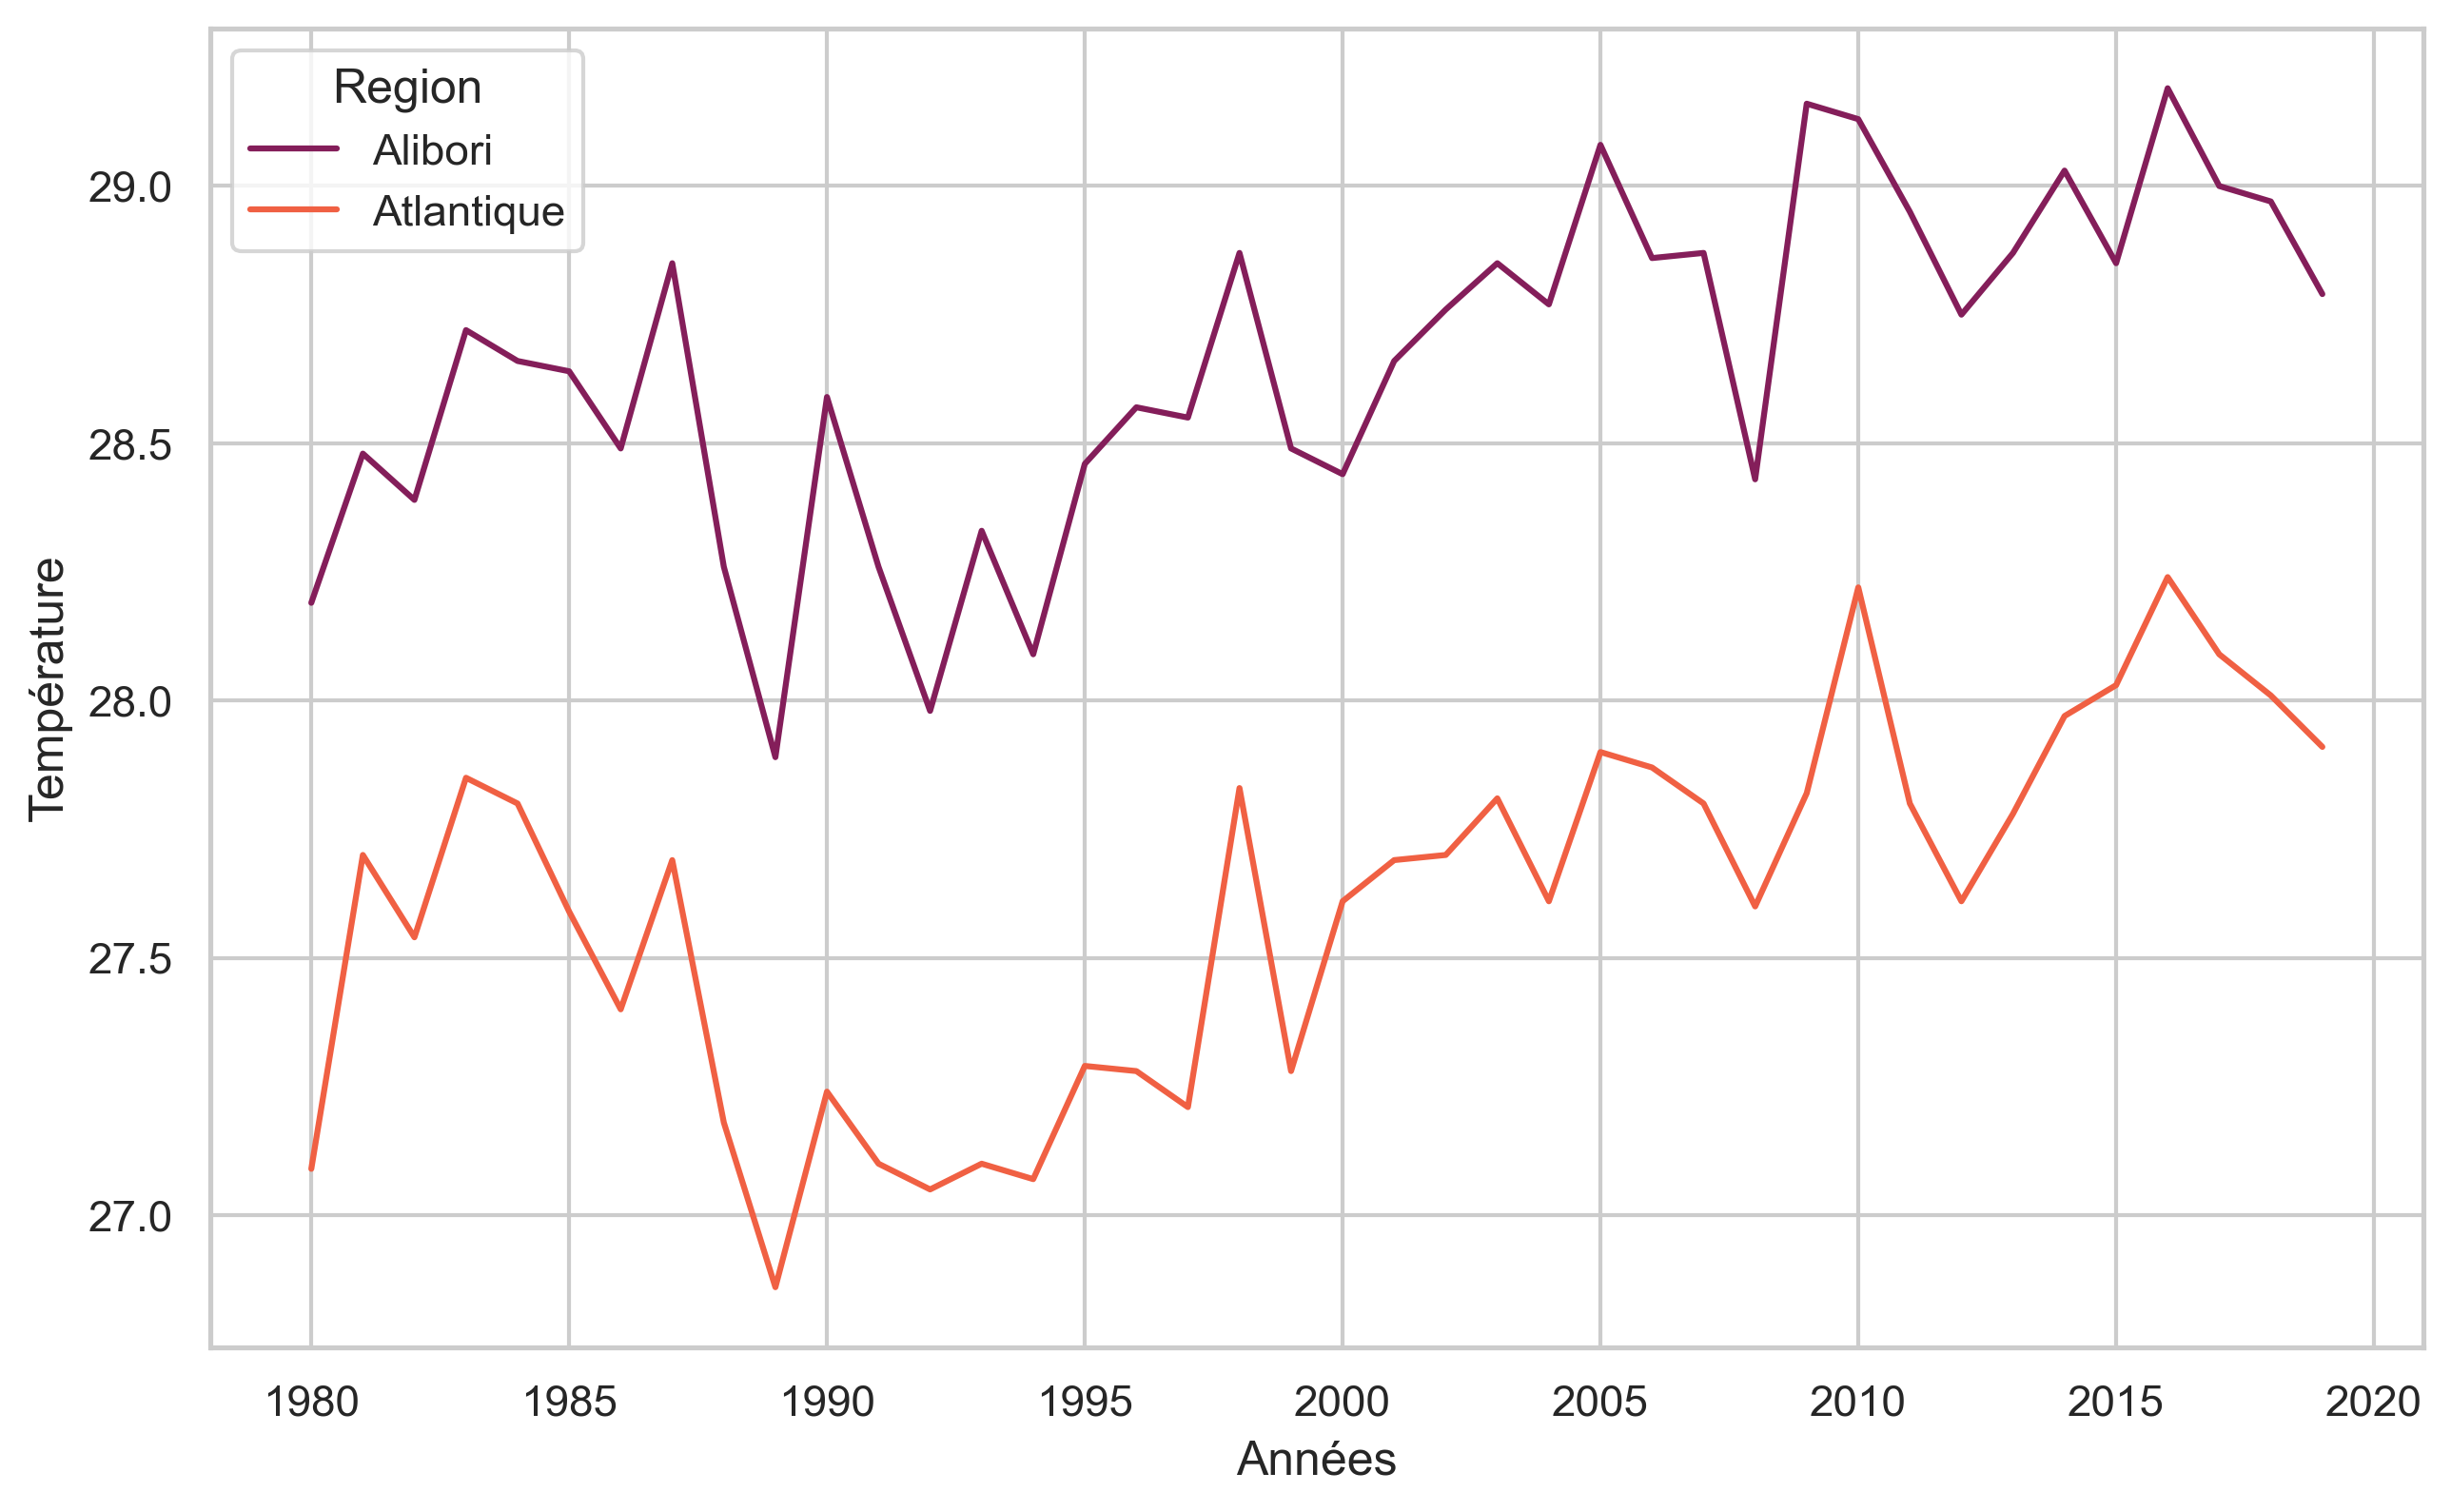

In [78]:
plt.figure(figsize=(10,6), dpi=300)
sns.lineplot(
    data=temp_regions,
    x="Year", y="Temperature", hue="Region", palette='rocket',
    markers=True, dashes=False
)

plt.xlabel("Années")
plt.ylabel("Température")

plt.show()

In [79]:
benin_temp

Year  mean_annual_temp
99   2000             27.84
100  2001             28.01
101  2002             28.06
102  2003             28.15
103  2004             28.00
104  2005             28.32
105  2006             28.19
106  2007             28.17
107  2008             27.85
108  2009             28.31
109  2010             28.46
110  2011             28.19
111  2012             28.01
112  2013             28.16
113  2014             28.33
114  2015             28.27
115  2016             28.53
116  2017             28.35
117  2018             28.33
118  2019             28.17

In [80]:
# annees = np.resize(np.arange(1980,2020,1), 40*3) # répéter 2 fois les dates
mean_annual_country = benin_temp_all[['mean_annual_temp']].squeeze()
df1 = pd.concat([alibori, atlantique])
df2 = pd.DataFrame(pd.concat([df1, mean_annual_country])) # concatenation 
df2['Region'] = all_names # ajout de la localisation
df2['Year'] = annees
df2 = df2.rename(columns={0 : 'Temperature', 'noms' : 'Region'})
df2 = df2[["Year", "Region", "Temperature"]]
df2

Year   Region  Temperature
79   1980  Alibori        28.19
80   1981  Alibori        28.48
81   1982  Alibori        28.39
82   1983  Alibori        28.72
83   1984  Alibori        28.66
..    ...      ...          ...
114  2015  Country        28.27
115  2016  Country        28.53
116  2017  Country        28.35
117  2018  Country        28.33
118  2019  Country        28.17

[120 rows x 3 columns]

In [81]:
df2 = df2.set_index('Year')
df2 = df2.reset_index()
df2

Year   Region  Temperature
0    1980  Alibori        28.19
1    1981  Alibori        28.48
2    1982  Alibori        28.39
3    1983  Alibori        28.72
4    1984  Alibori        28.66
..    ...      ...          ...
115  2015  Country        28.27
116  2016  Country        28.53
117  2017  Country        28.35
118  2018  Country        28.33
119  2019  Country        28.17

[120 rows x 3 columns]

<AxesSubplot:xlabel='Year', ylabel='Temperature'>

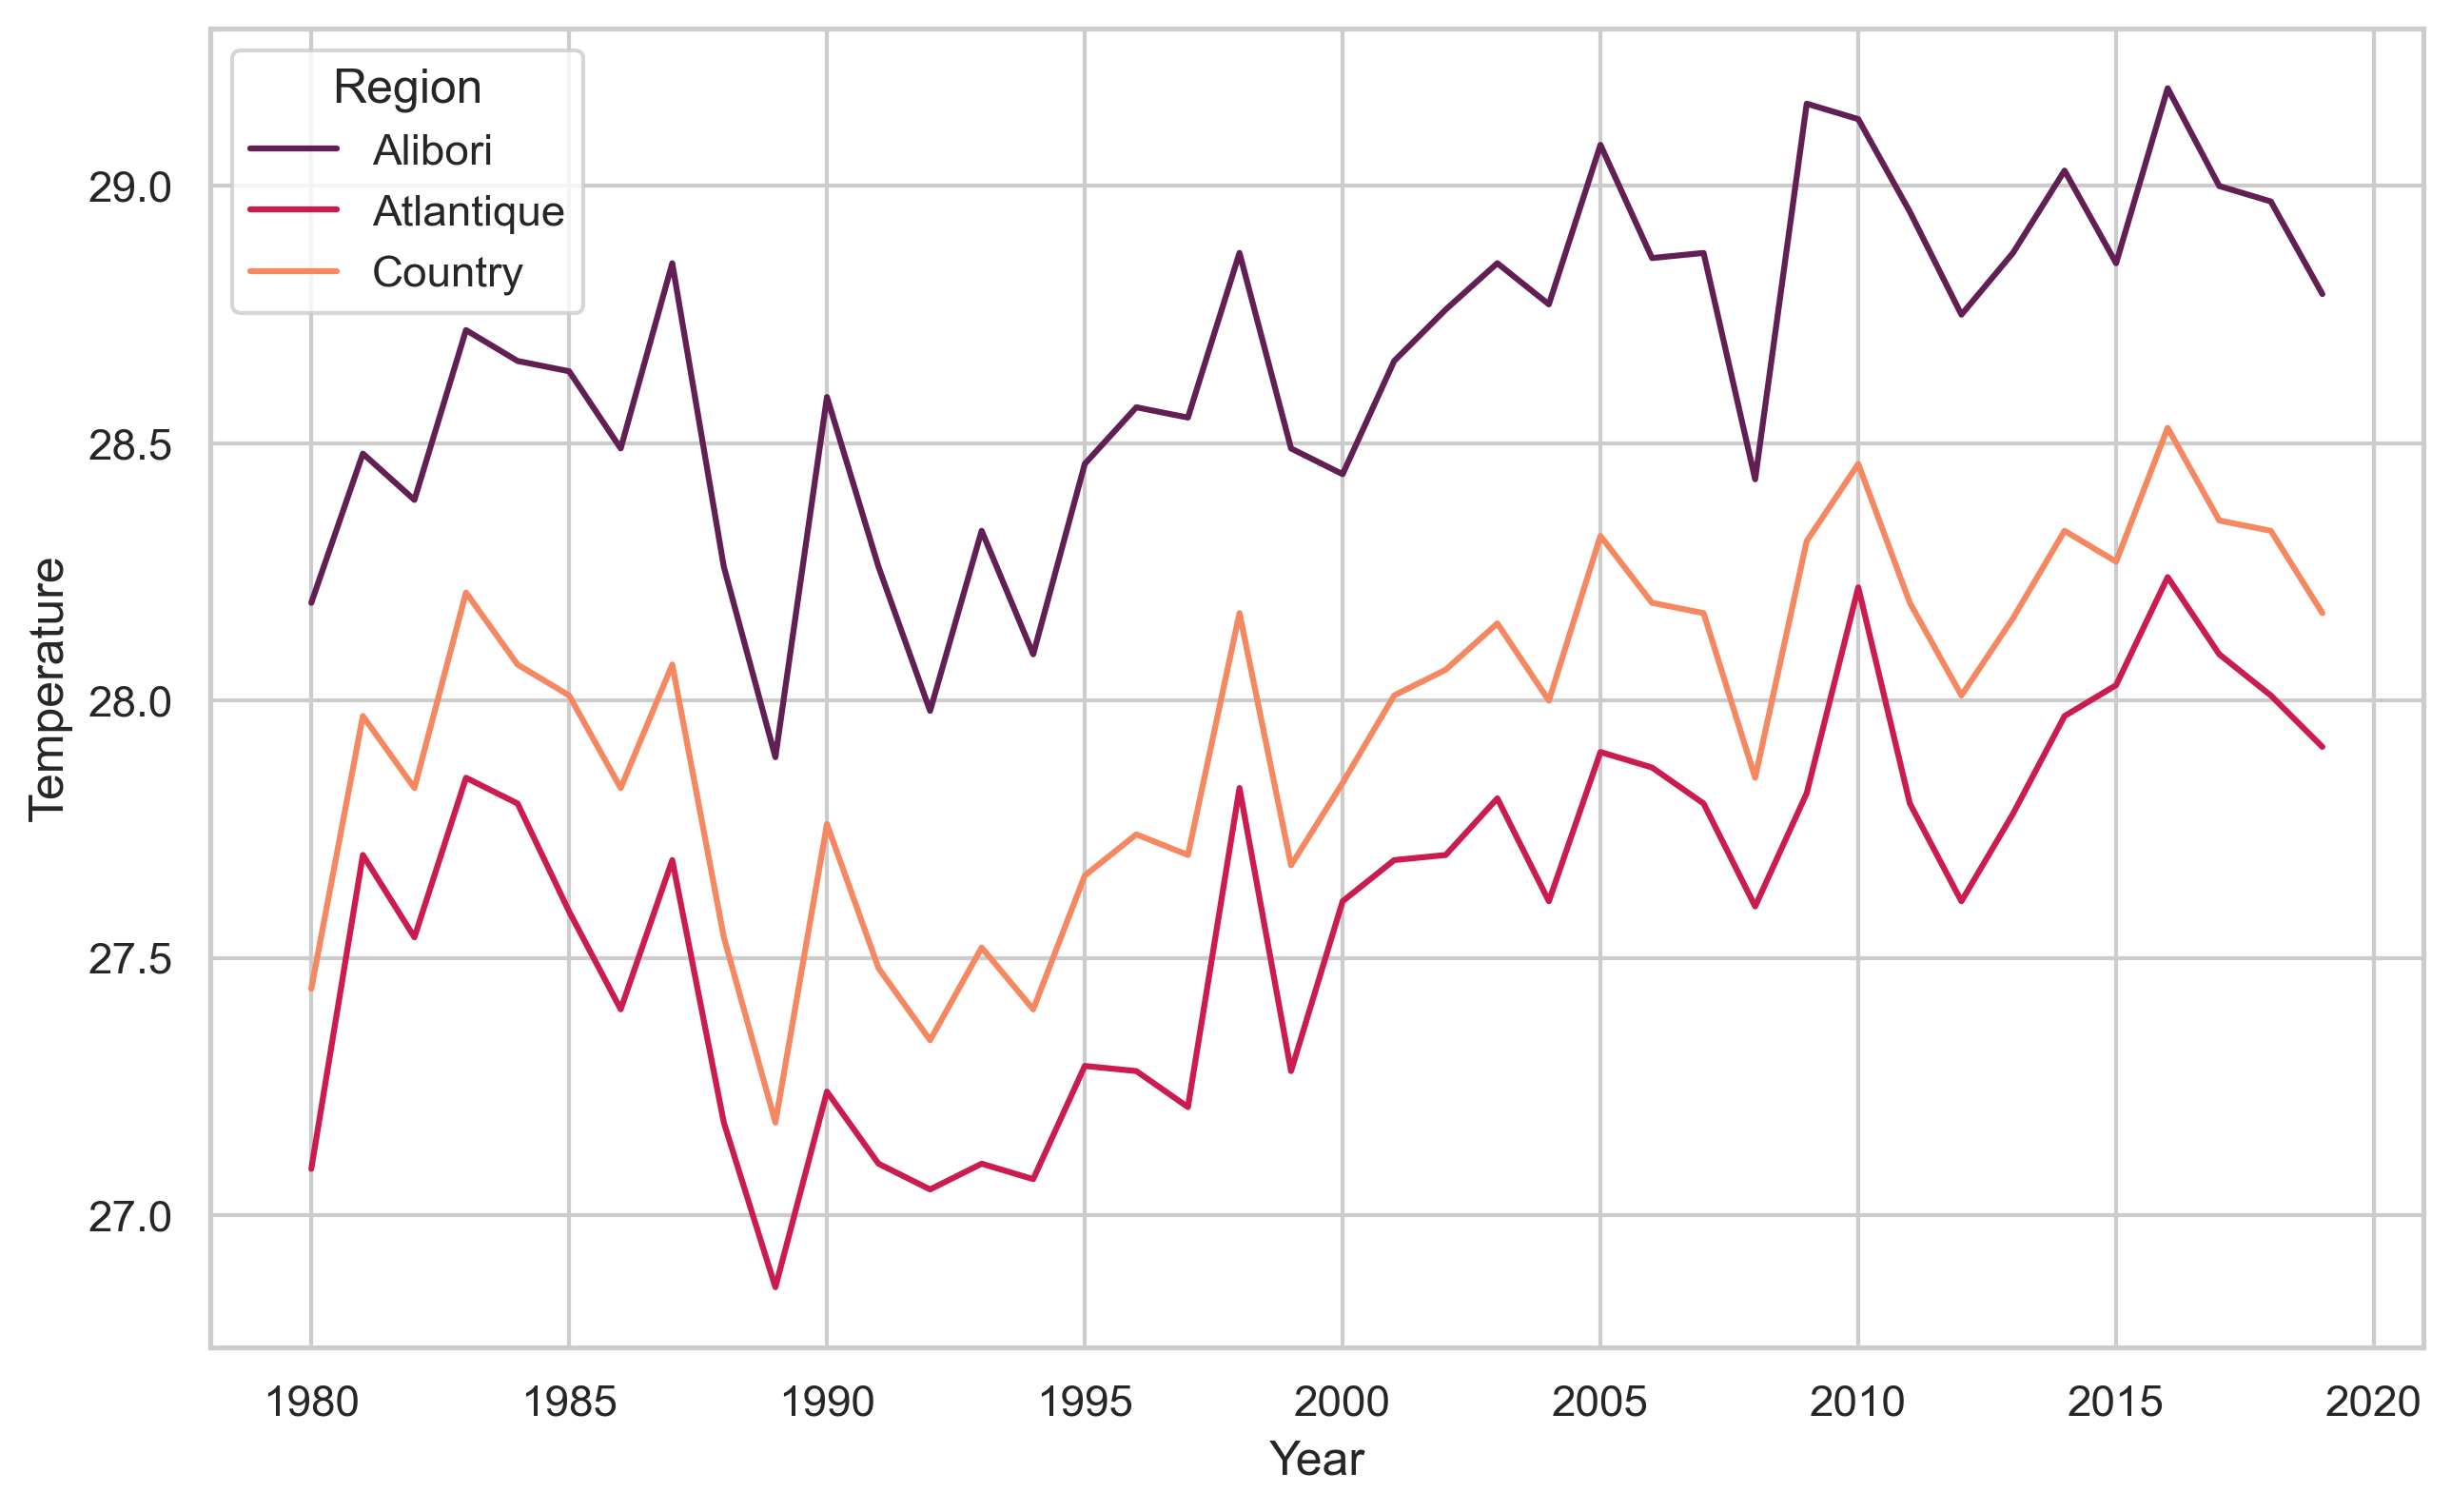

In [82]:
plt.figure(figsize=(10,6), dpi=300)
sns.lineplot(
    data=df2,
    x="Year", y="Temperature", hue="Region", palette='rocket',
    markers=True, dashes=False
)

## Lien entre températures, précipitations et rendements agricoles

In [83]:
# Données sur les rendements agricoles (production annuelle brute en dollars)

agri = pd.read_csv("DATA/FAO_BEN_prod_agricole.csv")
agri

ignames = agri[agri['Produit']=='Ignames'][['Zone', 'Année', 'Produit', 'Valeur']]
#ignames

manioc = agri[agri['Produit']=='Manioc'][['Zone', 'Année', 'Produit', 'Valeur']]
#manioc

mais = agri[agri['Produit']=='Maïs'][['Zone', 'Année', 'Produit', 'Valeur']]
mais

Zone  Année Produit  Valeur
40  Bénin   1980    Maïs   77435
41  Bénin   1981    Maïs   82057
42  Bénin   1982    Maïs   77896
43  Bénin   1983    Maïs   80459
44  Bénin   1984    Maïs  108232
45  Bénin   1985    Maïs  124066
46  Bénin   1986    Maïs  107989
47  Bénin   1987    Maïs   79130
48  Bénin   1988    Maïs  120874
49  Bénin   1989    Maïs  121032
50  Bénin   1990    Maïs  117022
51  Bénin   1991    Maïs  123019
52  Bénin   1992    Maïs  131165
53  Bénin   1993    Maïs  137974
54  Bénin   1994    Maïs  140299
55  Bénin   1995    Maïs  164525
56  Bénin   1996    Maïs  158626
57  Bénin   1997    Maïs  200095
58  Bénin   1998    Maïs  189015
59  Bénin   1999    Maïs  223479
60  Bénin   2000    Maïs  214194
61  Bénin   2001    Maïs  195773
62  Bénin   2002    Maïs  227624
63  Bénin   2003    Maïs  225005
64  Bénin   2004    Maïs  240331
65  Bénin   2005    Maïs  246805
66  Bénin   2006    Maïs  246826
67  Bénin   2007    Maïs  265900
68  Bénin   2008    Maïs  279162
69  Bénin   2009    Maïs  343992
70  Bénin   2010    Maïs  289028
71  Bénin   2011    Maïs  332791
72  Bénin   2012    Maïs  338233
73  Bénin   2013    Maïs  375788
74  Bénin   2014    Maïs  386562
75  Bénin   2015    Maïs  367072
76  Bénin   2016    Maïs  392938
77  Bénin   2017    Maïs  415087
78  Bénin   2018    Maïs  430920
79  Bénin   2019    Maïs  451183

In [84]:
for t in range(40):
    print("'Bénin',")

'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',


In [85]:
benin = ['Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',
'Bénin',]

In [86]:
# df precipitation
data_country_prec = prec_regions[prec_regions['Region']=='Country'].copy()
data_country_prec['Zone'] = benin
data_country_prec = data_country_prec[['Zone', 'Year', 'Yearly_Annual_Precipitation_mm']]
data_country_prec = data_country_prec.rename(columns={'Year' : 'Année'})
data_country_prec

Zone  Année  Yearly_Annual_Precipitation_mm
80   Bénin   1980                         1011.27
81   Bénin   1981                          965.63
82   Bénin   1982                          898.38
83   Bénin   1983                          753.38
84   Bénin   1984                          925.31
85   Bénin   1985                          984.91
86   Bénin   1986                          943.80
87   Bénin   1987                          949.67
88   Bénin   1988                         1161.14
89   Bénin   1989                         1080.61
90   Bénin   1990                          924.90
91   Bénin   1991                         1207.55
92   Bénin   1992                          942.84
93   Bénin   1993                          930.19
94   Bénin   1994                         1105.74
95   Bénin   1995                         1116.41
96   Bénin   1996                         1056.29
97   Bénin   1997                          997.04
98   Bénin   1998                         1096.38
99   Bénin   1999                         1162.08
100  Bénin   2000                          961.84
101  Bénin   2001                          846.08
102  Bénin   2002                         1021.21
103  Bénin   2003                         1199.85
104  Bénin   2004                         1041.47
105  Bénin   2005                          988.65
106  Bénin   2006                          983.28
107  Bénin   2007                         1128.83
108  Bénin   2008                         1186.52
109  Bénin   2009                         1096.71
110  Bénin   2010                         1128.68
111  Bénin   2011                          977.35
112  Bénin   2012                          999.65
113  Bénin   2013                          939.67
114  Bénin   2014                         1007.58
115  Bénin   2015                          922.35
116  Bénin   2016                          954.21
117  Bénin   2017                         1031.61
118  Bénin   2018                         1106.88
119  Bénin   2019                         1179.57

In [87]:
manioc

Zone  Année Produit   Valeur
80   Bénin   1980  Manioc   214353
81   Bénin   1981  Manioc   211607
82   Bénin   1982  Manioc   224362
83   Bénin   1983  Manioc   213421
84   Bénin   1984  Manioc   251877
85   Bénin   1985  Manioc   257199
86   Bénin   1986  Manioc   266428
87   Bénin   1987  Manioc   210247
88   Bénin   1988  Manioc   323600
89   Bénin   1989  Manioc   359328
90   Bénin   1990  Manioc   344801
91   Bénin   1991  Manioc   384948
92   Bénin   1992  Manioc   382885
93   Bénin   1993  Manioc   421790
94   Bénin   1994  Manioc   421495
95   Bénin   1995  Manioc   455356
96   Bénin   1996  Manioc   535830
97   Bénin   1997  Manioc   705720
98   Bénin   1998  Manioc   731683
99   Bénin   1999  Manioc   777276
100  Bénin   2000  Manioc   864551
101  Bénin   2001  Manioc   994498
102  Bénin   2002  Manioc  1160569
103  Bénin   2003  Manioc  1123736
104  Bénin   2004  Manioc  1087036
105  Bénin   2005  Manioc  1052587
106  Bénin   2006  Manioc  1033283
107  Bénin   2007  Manioc   840216
108  Bénin   2008  Manioc  1156759
109  Bénin   2009  Manioc  1393428
110  Bénin   2010  Manioc  1267264
111  Bénin   2011  Manioc  1341194
112  Bénin   2012  Manioc  1341214
113  Bénin   2013  Manioc  1438351
114  Bénin   2014  Manioc  1495985
115  Bénin   2015  Manioc  1258330
116  Bénin   2016  Manioc  1431822
117  Bénin   2017  Manioc  1456528
118  Bénin   2018  Manioc  1405158
119  Bénin   2019  Manioc  1664738

In [88]:
# Jointure entre les datasets sur les précipitations et la production de manioc

manioc_et_prec = pd.merge(data_country_prec, manioc, how='left', left_on=['Zone', 'Année'], right_on=['Zone', 'Année'])
manioc_et_prec['ln_valeur'] = np.log(manioc_et_prec['Valeur'])
manioc_et_prec

Zone  Année  Yearly_Annual_Precipitation_mm Produit   Valeur  ln_valeur
0   Bénin   1980                         1011.27  Manioc   214353  12.275379
1   Bénin   1981                          965.63  Manioc   211607  12.262486
2   Bénin   1982                          898.38  Manioc   224362  12.321016
3   Bénin   1983                          753.38  Manioc   213421  12.271022
4   Bénin   1984                          925.31  Manioc   251877  12.436696
5   Bénin   1985                          984.91  Manioc   257199  12.457605
6   Bénin   1986                          943.80  Manioc   266428  12.492859
7   Bénin   1987                          949.67  Manioc   210247  12.256038
8   Bénin   1988                         1161.14  Manioc   323600  12.687263
9   Bénin   1989                         1080.61  Manioc   359328  12.791991
10  Bénin   1990                          924.90  Manioc   344801  12.750723
11  Bénin   1991                         1207.55  Manioc   384948  12.860864
12  Bénin   1992                          942.84  Manioc   382885  12.855490
13  Bénin   1993                          930.19  Manioc   421790  12.952263
14  Bénin   1994                         1105.74  Manioc   421495  12.951563
15  Bénin   1995                         1116.41  Manioc   455356  13.028835
16  Bénin   1996                         1056.29  Manioc   535830  13.191572
17  Bénin   1997                          997.04  Manioc   705720  13.466974
18  Bénin   1998                         1096.38  Manioc   731683  13.503103
19  Bénin   1999                         1162.08  Manioc   777276  13.563551
20  Bénin   2000                          961.84  Manioc   864551  13.669966
21  Bénin   2001                          846.08  Manioc   994498  13.809993
22  Bénin   2002                         1021.21  Manioc  1160569  13.964421
23  Bénin   2003                         1199.85  Manioc  1123736  13.932169
24  Bénin   2004                         1041.47  Manioc  1087036  13.898965
25  Bénin   2005                          988.65  Manioc  1052587  13.866762
26  Bénin   2006                          983.28  Manioc  1033283  13.848252
27  Bénin   2007                         1128.83  Manioc   840216  13.641414
28  Bénin   2008                         1186.52  Manioc  1156759  13.961133
29  Bénin   2009                         1096.71  Manioc  1393428  14.147277
30  Bénin   2010                         1128.68  Manioc  1267264  14.052371
31  Bénin   2011                          977.35  Manioc  1341194  14.109071
32  Bénin   2012                          999.65  Manioc  1341214  14.109086
33  Bénin   2013                          939.67  Manioc  1438351  14.179008
34  Bénin   2014                         1007.58  Manioc  1495985  14.218295
35  Bénin   2015                          922.35  Manioc  1258330  14.045296
36  Bénin   2016                          954.21  Manioc  1431822  14.174458
37  Bénin   2017                         1031.61  Manioc  1456528  14.191566
38  Bénin   2018                         1106.88  Manioc  1405158  14.155660
39  Bénin   2019                         1179.57  Manioc  1664738  14.325178

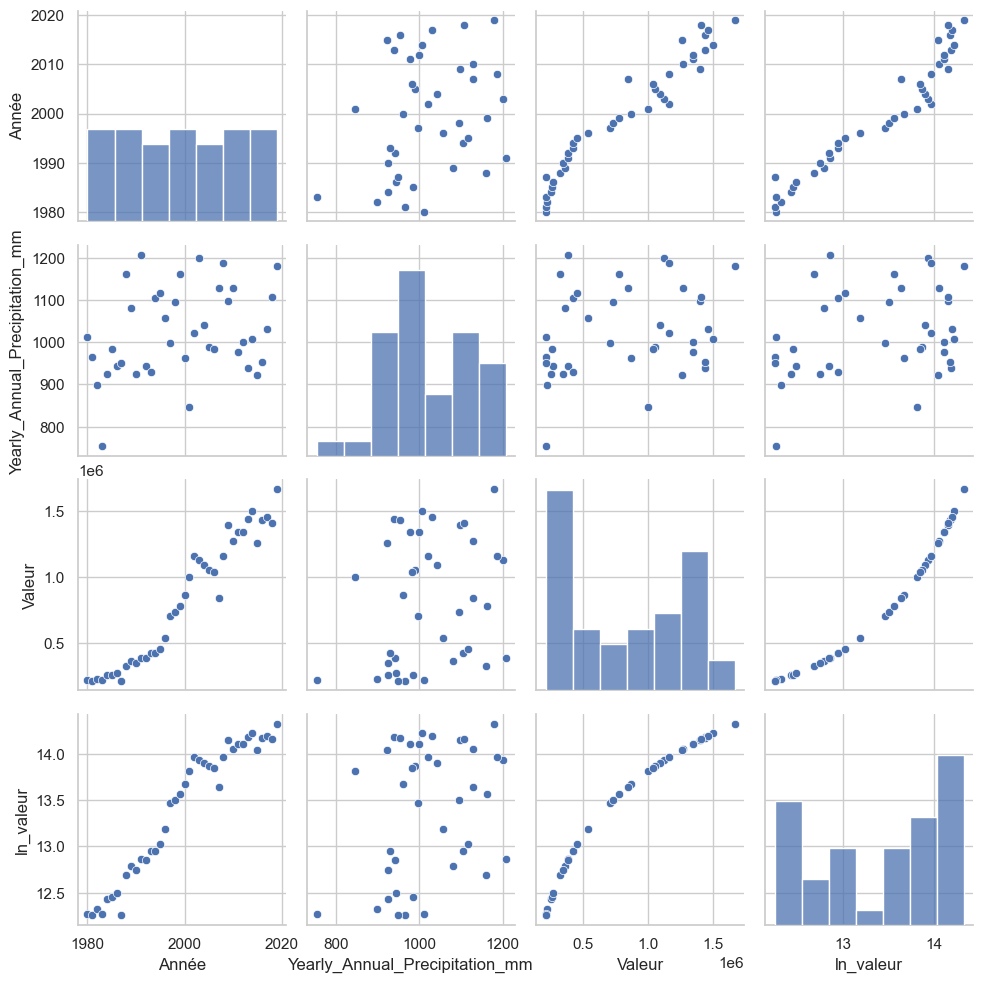

In [89]:
sns.pairplot(manioc_et_prec)

In [90]:
ignames.head()

Zone  Année  Produit  Valeur
0  Bénin   1980  Ignames  312882
1  Bénin   1981  Ignames  300056
2  Bénin   1982  Ignames  302759
3  Bénin   1983  Ignames  279461
4  Bénin   1984  Ignames  369234

In [91]:
# Ignames et pluviométrie

igname_et_prec = pd.merge(data_country_prec, ignames, how='left', left_on=['Zone', 'Année'], right_on=['Zone', 'Année'])
igname_et_prec['ln_valeur'] = np.log(igname_et_prec['Valeur'])
igname_et_prec

Zone  Année  Yearly_Annual_Precipitation_mm  Produit   Valeur  ln_valeur
0   Bénin   1980                         1011.27  Ignames   312882  12.653581
1   Bénin   1981                          965.63  Ignames   300056  12.611724
2   Bénin   1982                          898.38  Ignames   302759  12.620692
3   Bénin   1983                          753.38  Ignames   279461  12.540618
4   Bénin   1984                          925.31  Ignames   369234  12.819186
5   Bénin   1985                          984.91  Ignames   338360  12.731866
6   Bénin   1986                          943.80  Ignames   398276  12.894901
7   Bénin   1987                          949.67  Ignames   376026  12.837414
8   Bénin   1988                         1161.14  Ignames   415478  12.937185
9   Bénin   1989                         1080.61  Ignames   455039  13.028138
10  Bénin   1990                          924.90  Ignames   471352  13.063360
11  Bénin   1991                         1207.55  Ignames   530569  13.181705
12  Bénin   1992                          942.84  Ignames   506832  13.135935
13  Bénin   1993                          930.19  Ignames   533975  13.188104
14  Bénin   1994                         1105.74  Ignames   563427  13.241793
15  Bénin   1995                         1116.41  Ignames   579374  13.269703
16  Bénin   1996                         1056.29  Ignames   606504  13.315467
17  Bénin   1997                          997.04  Ignames   634264  13.360221
18  Bénin   1998                         1096.38  Ignames   713579  13.478048
19  Bénin   1999                         1162.08  Ignames   742100  13.517239
20  Bénin   2000                          961.84  Ignames   784900  13.573312
21  Bénin   2001                          846.08  Ignames   766418  13.549483
22  Bénin   2002                         1021.21  Ignames   969388  13.784420
23  Bénin   2003                         1199.85  Ignames   905969  13.716760
24  Bénin   2004                         1041.47  Ignames  1017060  13.832427
25  Bénin   2005                          988.65  Ignames   938899  13.752463
26  Bénin   2006                          983.28  Ignames   710559  13.473807
27  Bénin   2007                         1128.83  Ignames   757951  13.538374
28  Bénin   2008                         1186.52  Ignames  1139825  13.946385
29  Bénin   2009                         1096.71  Ignames  1069572  13.882769
30  Bénin   2010                         1128.68  Ignames  1182311  13.982982
31  Bénin   2011                          977.35  Ignames  1232257  14.024358
32  Bénin   2012                          999.65  Ignames  1266449  14.051727
33  Bénin   2013                          939.67  Ignames  1333137  14.103045
34  Bénin   2014                         1007.58  Ignames  1451143  14.187862
35  Bénin   2015                          922.35  Ignames  1194246  13.993026
36  Bénin   2016                          954.21  Ignames  1370306  14.130545
37  Bénin   2017                         1031.61  Ignames  1461878  14.195232
38  Bénin   2018                         1106.88  Ignames  1326915  14.098367
39  Bénin   2019                         1179.57  Ignames  1516407  14.231854

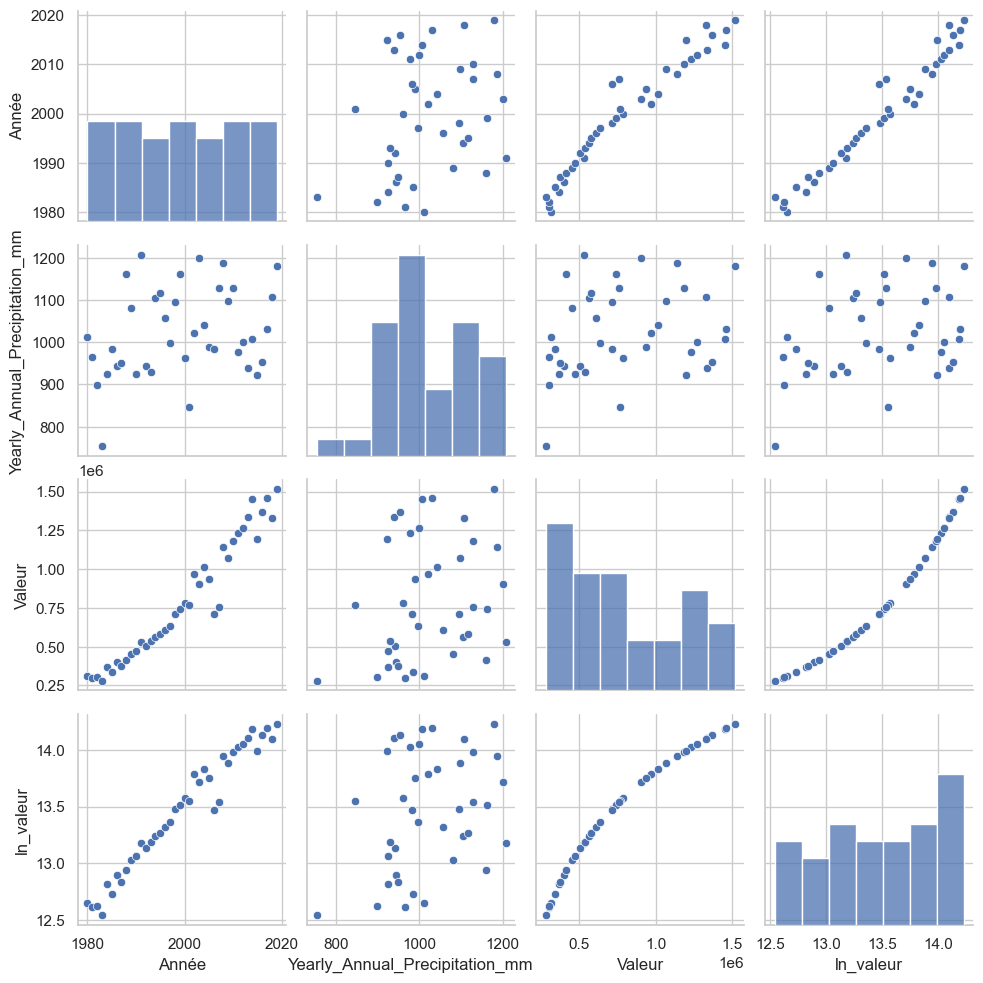

In [92]:
sns.pairplot(igname_et_prec)

In [93]:
benin

['Bénin',
 'Bénin',
 'Bénin',
 'Bénin',
 'Bénin',
 'Bénin',
 'Bénin',
 'Bénin',
 'Bénin',
 'Bénin',
 'Bénin',
 'Bénin',
 'Bénin',
 'Bénin',
 'Bénin',
 'Bénin',
 'Bénin',
 'Bénin',
 'Bénin',
 'Bénin',
 'Bénin',
 'Bénin',
 'Bénin',
 'Bénin',
 'Bénin',
 'Bénin',
 'Bénin',
 'Bénin',
 'Bénin',
 'Bénin',
 'Bénin',
 'Bénin',
 'Bénin',
 'Bénin',
 'Bénin',
 'Bénin',
 'Bénin',
 'Bénin',
 'Bénin',
 'Bénin']

## Lien entre empératures et production

In [94]:
temp_regions

Year  Temperature      Region
0   1980        28.19     Alibori
1   1981        28.48     Alibori
2   1982        28.39     Alibori
3   1983        28.72     Alibori
4   1984        28.66     Alibori
..   ...          ...         ...
75  2015        28.03  Atlantique
76  2016        28.24  Atlantique
77  2017        28.09  Atlantique
78  2018        28.01  Atlantique
79  2019        27.91  Atlantique

[80 rows x 3 columns]

In [95]:
manioc

Zone  Année Produit   Valeur
80   Bénin   1980  Manioc   214353
81   Bénin   1981  Manioc   211607
82   Bénin   1982  Manioc   224362
83   Bénin   1983  Manioc   213421
84   Bénin   1984  Manioc   251877
85   Bénin   1985  Manioc   257199
86   Bénin   1986  Manioc   266428
87   Bénin   1987  Manioc   210247
88   Bénin   1988  Manioc   323600
89   Bénin   1989  Manioc   359328
90   Bénin   1990  Manioc   344801
91   Bénin   1991  Manioc   384948
92   Bénin   1992  Manioc   382885
93   Bénin   1993  Manioc   421790
94   Bénin   1994  Manioc   421495
95   Bénin   1995  Manioc   455356
96   Bénin   1996  Manioc   535830
97   Bénin   1997  Manioc   705720
98   Bénin   1998  Manioc   731683
99   Bénin   1999  Manioc   777276
100  Bénin   2000  Manioc   864551
101  Bénin   2001  Manioc   994498
102  Bénin   2002  Manioc  1160569
103  Bénin   2003  Manioc  1123736
104  Bénin   2004  Manioc  1087036
105  Bénin   2005  Manioc  1052587
106  Bénin   2006  Manioc  1033283
107  Bénin   2007  Manioc   840216
108  Bénin   2008  Manioc  1156759
109  Bénin   2009  Manioc  1393428
110  Bénin   2010  Manioc  1267264
111  Bénin   2011  Manioc  1341194
112  Bénin   2012  Manioc  1341214
113  Bénin   2013  Manioc  1438351
114  Bénin   2014  Manioc  1495985
115  Bénin   2015  Manioc  1258330
116  Bénin   2016  Manioc  1431822
117  Bénin   2017  Manioc  1456528
118  Bénin   2018  Manioc  1405158
119  Bénin   2019  Manioc  1664738

In [96]:
# Relation température et manioc

# df température
data_country_temp = df2[df2['Region']=='Country'].copy()
data_country_temp['Zone'] = benin
data_country_temp = data_country_temp[['Zone', 'Year', 'Temperature']]
data_country_temp = data_country_temp.rename(columns={"Year" : "Année"})

data_country_temp

Zone  Année  Temperature
80   Bénin   1980        27.44
81   Bénin   1981        27.97
82   Bénin   1982        27.83
83   Bénin   1983        28.21
84   Bénin   1984        28.07
85   Bénin   1985        28.01
86   Bénin   1986        27.83
87   Bénin   1987        28.07
88   Bénin   1988        27.54
89   Bénin   1989        27.18
90   Bénin   1990        27.76
91   Bénin   1991        27.48
92   Bénin   1992        27.34
93   Bénin   1993        27.52
94   Bénin   1994        27.40
95   Bénin   1995        27.66
96   Bénin   1996        27.74
97   Bénin   1997        27.70
98   Bénin   1998        28.17
99   Bénin   1999        27.68
100  Bénin   2000        27.84
101  Bénin   2001        28.01
102  Bénin   2002        28.06
103  Bénin   2003        28.15
104  Bénin   2004        28.00
105  Bénin   2005        28.32
106  Bénin   2006        28.19
107  Bénin   2007        28.17
108  Bénin   2008        27.85
109  Bénin   2009        28.31
110  Bénin   2010        28.46
111  Bénin   2011        28.19
112  Bénin   2012        28.01
113  Bénin   2013        28.16
114  Bénin   2014        28.33
115  Bénin   2015        28.27
116  Bénin   2016        28.53
117  Bénin   2017        28.35
118  Bénin   2018        28.33
119  Bénin   2019        28.17

In [97]:
# df température et production annuelle
manioc_et_temp = pd.merge(data_country_temp, manioc, how='left', left_on=['Zone', 'Année'], right_on=['Zone', 'Année'])
manioc_et_temp = manioc_et_temp[["Zone", "Année", "Temperature", "Valeur"]]
manioc_et_temp['ln_valeur'] = np.log(manioc_et_temp['Valeur'])

x_manioc = manioc_et_temp['Temperature']
y_manioc = manioc_et_temp['ln_valeur']
manioc_et_temp

Zone  Année  Temperature   Valeur  ln_valeur
0   Bénin   1980        27.44   214353  12.275379
1   Bénin   1981        27.97   211607  12.262486
2   Bénin   1982        27.83   224362  12.321016
3   Bénin   1983        28.21   213421  12.271022
4   Bénin   1984        28.07   251877  12.436696
5   Bénin   1985        28.01   257199  12.457605
6   Bénin   1986        27.83   266428  12.492859
7   Bénin   1987        28.07   210247  12.256038
8   Bénin   1988        27.54   323600  12.687263
9   Bénin   1989        27.18   359328  12.791991
10  Bénin   1990        27.76   344801  12.750723
11  Bénin   1991        27.48   384948  12.860864
12  Bénin   1992        27.34   382885  12.855490
13  Bénin   1993        27.52   421790  12.952263
14  Bénin   1994        27.40   421495  12.951563
15  Bénin   1995        27.66   455356  13.028835
16  Bénin   1996        27.74   535830  13.191572
17  Bénin   1997        27.70   705720  13.466974
18  Bénin   1998        28.17   731683  13.503103
19  Bénin   1999        27.68   777276  13.563551
20  Bénin   2000        27.84   864551  13.669966
21  Bénin   2001        28.01   994498  13.809993
22  Bénin   2002        28.06  1160569  13.964421
23  Bénin   2003        28.15  1123736  13.932169
24  Bénin   2004        28.00  1087036  13.898965
25  Bénin   2005        28.32  1052587  13.866762
26  Bénin   2006        28.19  1033283  13.848252
27  Bénin   2007        28.17   840216  13.641414
28  Bénin   2008        27.85  1156759  13.961133
29  Bénin   2009        28.31  1393428  14.147277
30  Bénin   2010        28.46  1267264  14.052371
31  Bénin   2011        28.19  1341194  14.109071
32  Bénin   2012        28.01  1341214  14.109086
33  Bénin   2013        28.16  1438351  14.179008
34  Bénin   2014        28.33  1495985  14.218295
35  Bénin   2015        28.27  1258330  14.045296
36  Bénin   2016        28.53  1431822  14.174458
37  Bénin   2017        28.35  1456528  14.191566
38  Bénin   2018        28.33  1405158  14.155660
39  Bénin   2019        28.17  1664738  14.325178

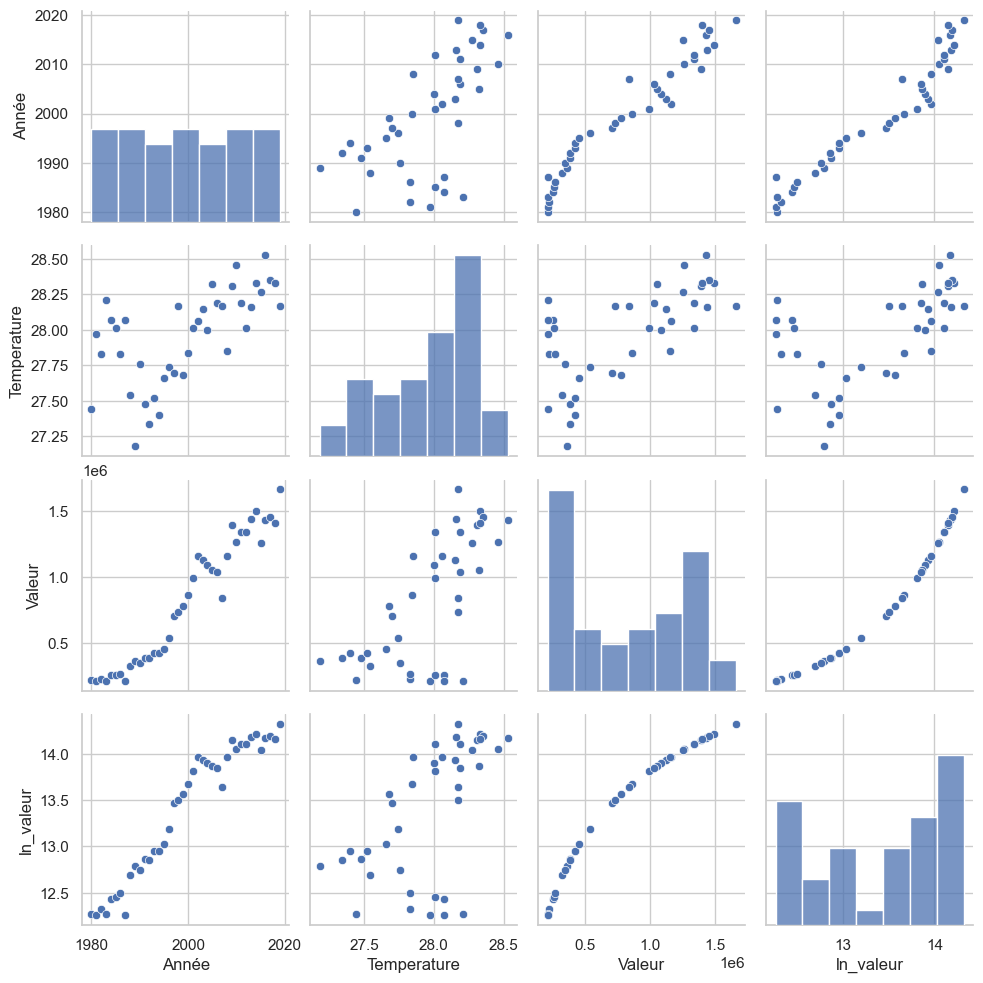

In [98]:
sns.pairplot(manioc_et_temp)

Text(0, 0.5, 'Production annuelle brute (en Milliers de dollars)')

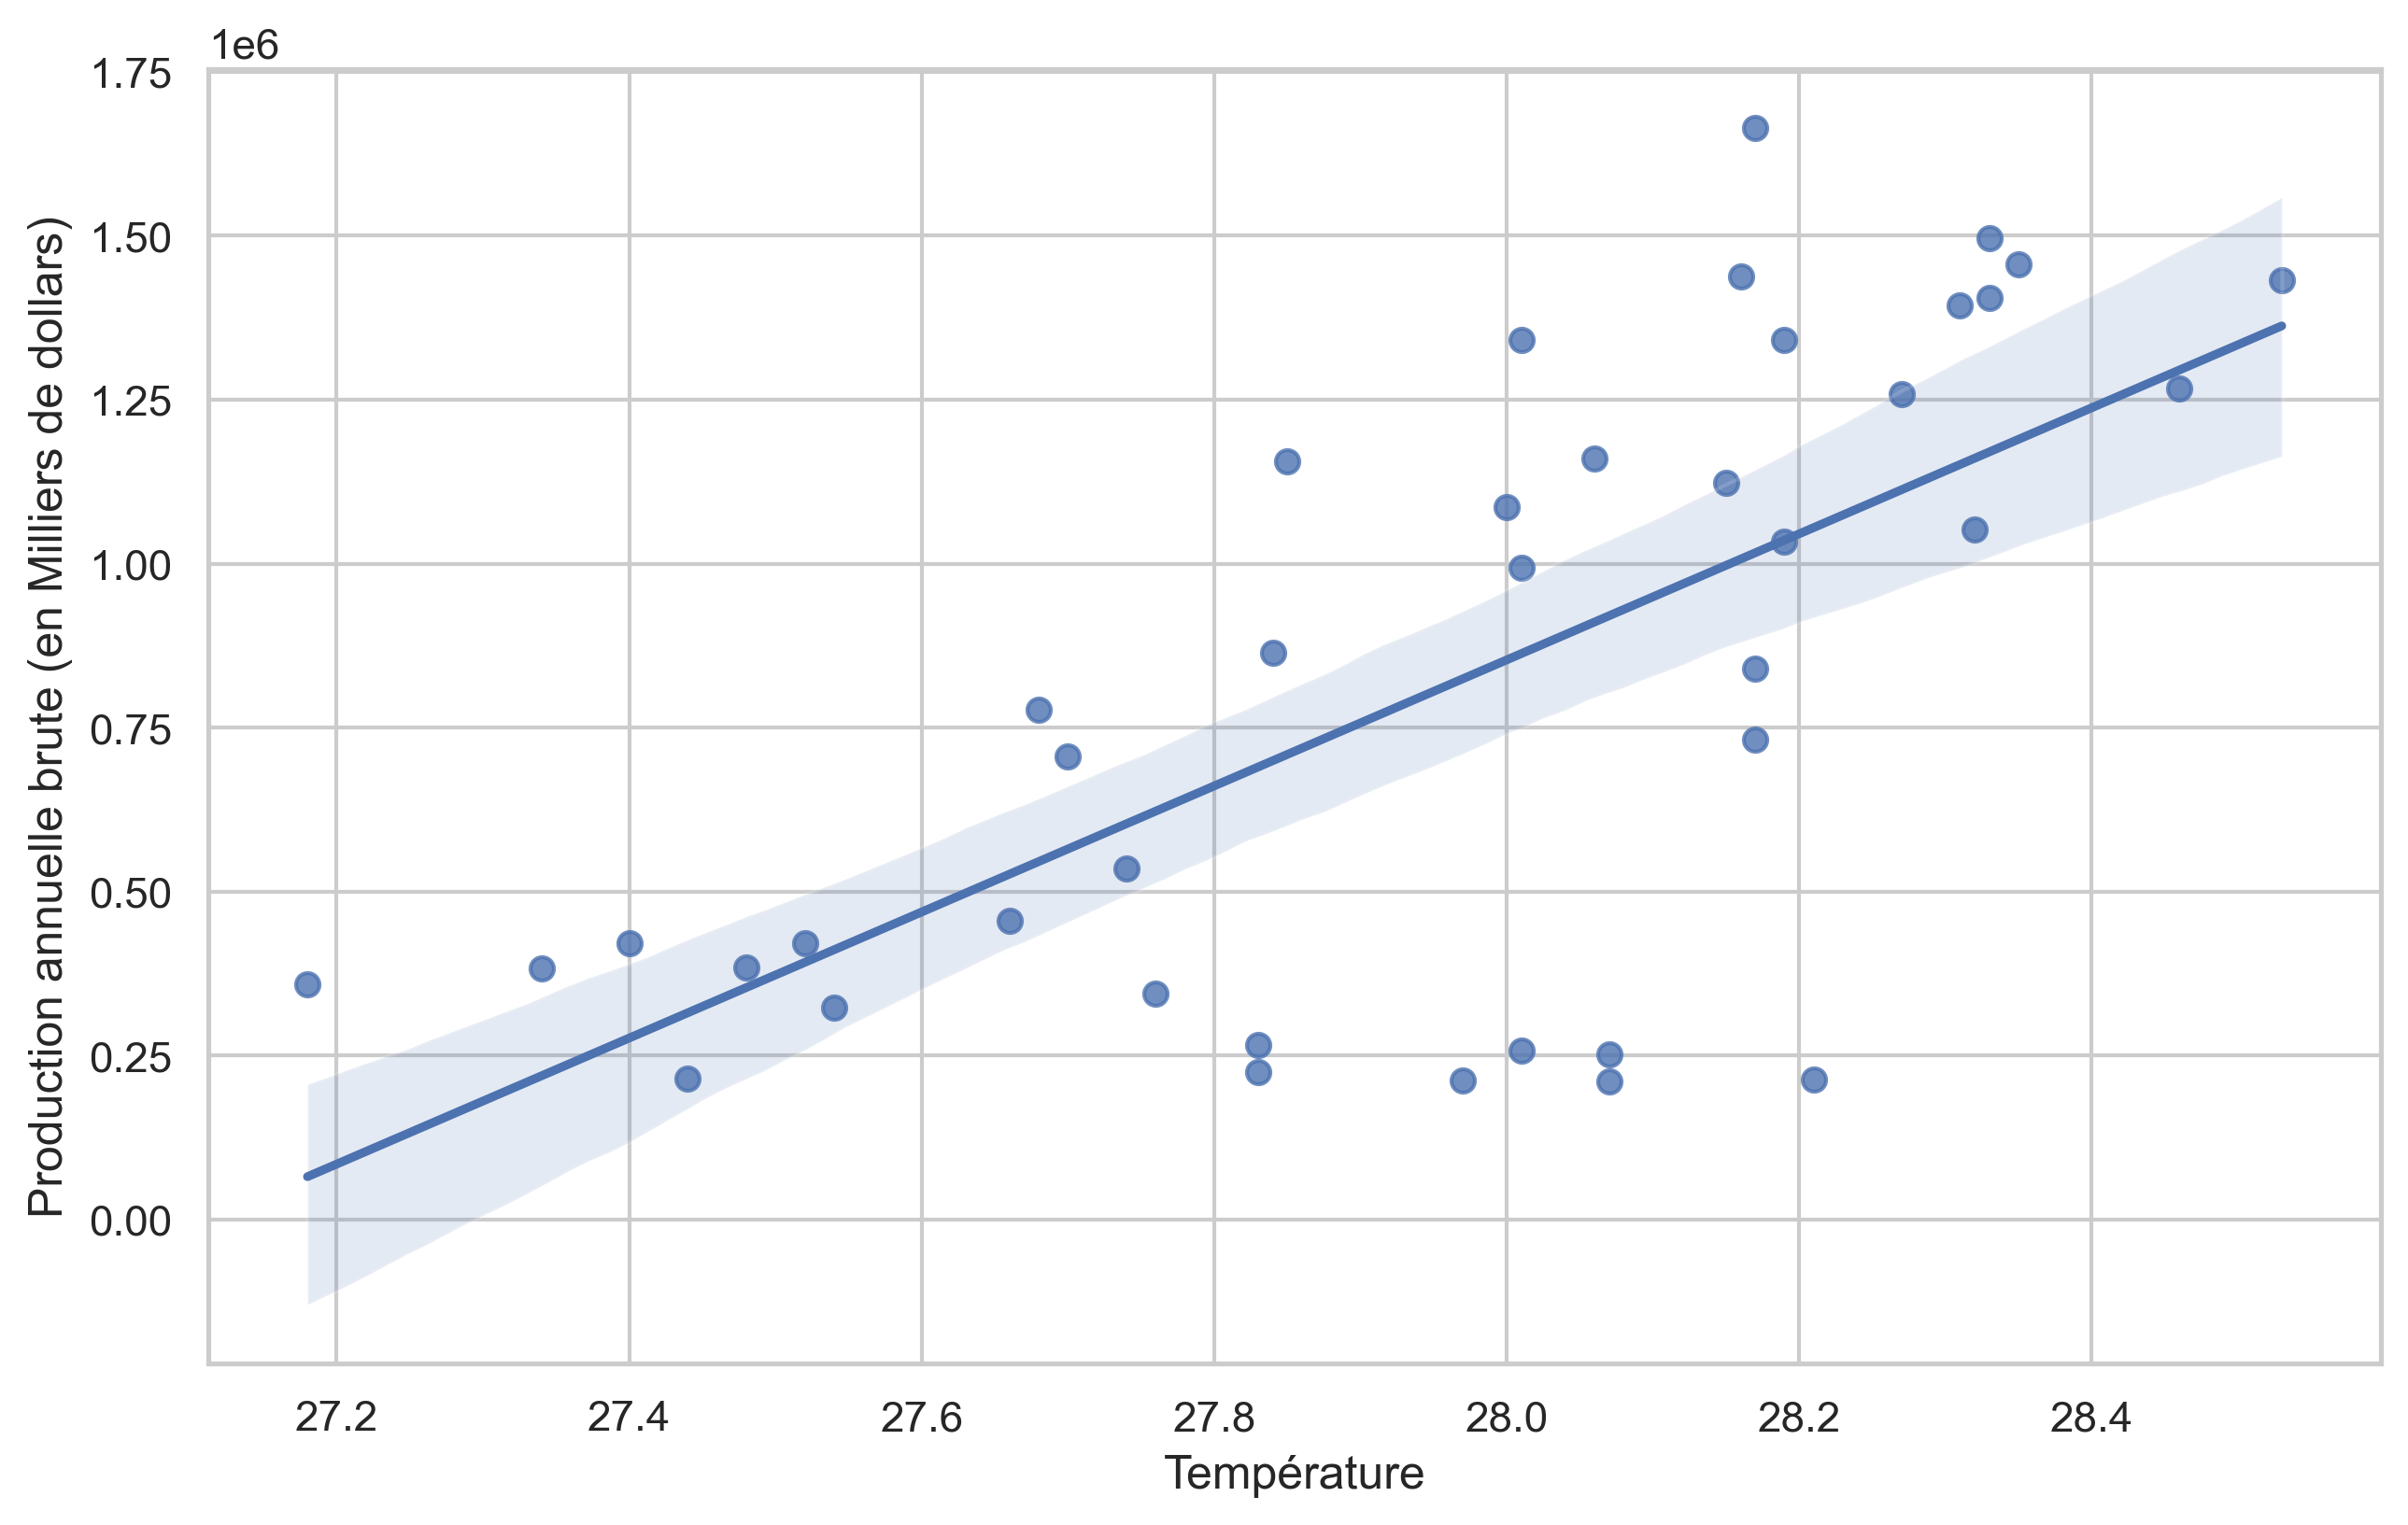

In [99]:
plt.figure(figsize=(10,6), dpi=300)
ax = sns.regplot(x="Temperature", y="Valeur", data=manioc_et_temp)
plt.xlabel("Température")
plt.ylabel("Production annuelle brute (en Milliers de dollars)")



In [100]:
# df avec différentes productions ? puis pairplot

In [101]:
manioc_et_prec.head()

Zone  Année  Yearly_Annual_Precipitation_mm Produit  Valeur  ln_valeur
0  Bénin   1980                         1011.27  Manioc  214353  12.275379
1  Bénin   1981                          965.63  Manioc  211607  12.262486
2  Bénin   1982                          898.38  Manioc  224362  12.321016
3  Bénin   1983                          753.38  Manioc  213421  12.271022
4  Bénin   1984                          925.31  Manioc  251877  12.436696

In [102]:
manioc_et_temp.head()

Zone  Année  Temperature  Valeur  ln_valeur
0  Bénin   1980        27.44  214353  12.275379
1  Bénin   1981        27.97  211607  12.262486
2  Bénin   1982        27.83  224362  12.321016
3  Bénin   1983        28.21  213421  12.271022
4  Bénin   1984        28.07  251877  12.436696

In [103]:
# jointure entre les infos température et pluviométrie

manioc_changement_climatique = pd.merge(manioc_et_temp, manioc_et_prec[['Zone', 'Année', 'Yearly_Annual_Precipitation_mm']], how='left', left_on=['Zone', 'Année'], right_on=['Zone', 'Année'])
manioc_changement_climatique = manioc_changement_climatique[['Zone', 'Année', 'Temperature', 'Yearly_Annual_Precipitation_mm', 'Valeur', 'ln_valeur']]
manioc_changement_climatique.head()

Zone  Année  Temperature  Yearly_Annual_Precipitation_mm  Valeur  \
0  Bénin   1980        27.44                         1011.27  214353   
1  Bénin   1981        27.97                          965.63  211607   
2  Bénin   1982        27.83                          898.38  224362   
3  Bénin   1983        28.21                          753.38  213421   
4  Bénin   1984        28.07                          925.31  251877   

   ln_valeur  
0  12.275379  
1  12.262486  
2  12.321016  
3  12.271022  
4  12.436696

## Étude de l'impact de la variation des températeurs sur la production par régression linéaire: 

In [104]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [105]:
reg = smf.ols('Valeur~Temperature', data=manioc_changement_climatique).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                 Valeur   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     31.25
Date:                Sun, 30 Jul 2023   Prob (F-statistic):           2.07e-06
Time:                        20:53:50   Log-Likelihood:                -567.22
No. Observations:                  40   AIC:                             1138.
Df Residuals:                      38   BIC:                             1142.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.605e+07   4.81e+06     -5.421      

In [106]:
reg_multi = smf.ols('Valeur~Temperature+Yearly_Annual_Precipitation_mm', data=manioc_changement_climatique).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                 Valeur   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     23.66
Date:                Sun, 30 Jul 2023   Prob (F-statistic):           2.41e-07
Time:                        20:53:50   Log-Likelihood:                -562.75
No. Observations:                  40   AIC:                             1132.
Df Residuals:                      37   BIC:                             1137.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

## Part de chaque industrie dans le total des émissions de GES

In [107]:
# Part de chaque industrie dans le total des émissions de GES

sector_ghg = pd.read_csv('DATA/ghg-emissions-by-sector.csv')
sector_ghg.head()

Entity Code  Year   Agriculture  Land-use change and forestry  \
0  Afghanistan  AFG  1990  8.070000e+06                 -2.390000e+06   
1  Afghanistan  AFG  1991  8.400000e+06                 -2.390000e+06   
2  Afghanistan  AFG  1992  8.410000e+06                 -2.390000e+06   
3  Afghanistan  AFG  1993  8.490000e+06                 -2.390000e+06   
4  Afghanistan  AFG  1994  8.520000e+06                 -2.390000e+06   

          Waste      Industry  Manufacturing and construction     Transport  \
0  1.230000e+06  50000.000745                   409999.996424  1.670000e+06   
1  1.320000e+06  59999.998659                   400000.005960  1.550000e+06   
2  1.400000e+06  59999.998659                   370000.004768  7.700000e+05   
3  1.490000e+06  59999.998659                   360000.014305  7.400000e+05   
4  1.580000e+06  59999.998659                   340000.003576  7.100000e+05   

   Electricity and heat     Buildings  Fugitive emissions  \
0         170000.001788  79999.998212       280000.001192   
1         170000.001788  70000.000298       239999.994636   
2         159999.996424  29999.999329       200000.002980   
3         159999.996424  29999.999329       159999.996424   
4         159999.996424  19999.999553       119999.997318   

   Other fuel combustion  Aviation and shipping  
0                    0.0           19999.999553  
1                    0.0           19999.999553  
2                    0.0           19999.999553  
3                    0.0           19999.999553  
4                    0.0           19999.999553

In [108]:
sector_ghg['Entity'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Asia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Europe', 'European Union (27)', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Gr

In [109]:
df_sector_ghg = sector_ghg[sector_ghg['Entity']=='Benin'][['Year','Agriculture', 'Land-use change and forestry',
       'Waste', 'Industry', 'Manufacturing and construction', 'Transport',
       'Electricity and heat', 'Buildings', 'Fugitive emissions',
       'Other fuel combustion', 'Aviation and shipping']]
df_sector_ghg.head()

Year   Agriculture  Land-use change and forestry          Waste  \
600  1990  3.250000e+06                  1.555000e+07  259999.990463   
601  1991  3.380000e+06                  1.555000e+07  270000.010729   
602  1992  3.430000e+06                  1.555000e+07  280000.001192   
603  1993  3.450000e+06                  1.555000e+07  289999.991655   
604  1994  3.710000e+06                  1.555000e+07  300000.011921   

          Industry  Manufacturing and construction      Transport  \
600   70000.000298                    29999.999329  170000.001788   
601   79999.998212                    19999.999553  129999.995232   
602   90000.003576                    29999.999329  119999.997318   
603  100000.001490                    29999.999329  119999.997318   
604   90000.003576                    19999.999553  119999.997318   

     Electricity and heat      Buildings  Fugitive emissions  \
600          29999.999329  250000.000000        19999.999553   
601          29999.999329  239999.994636        19999.999553   
602          29999.999329  259999.990463        19999.999553   
603          29999.999329  259999.990463        19999.999553   
604          29999.999329  270000.010729         9999.999776   

     Other fuel combustion  Aviation and shipping  
600          109999.999404           50000.000745  
601          109999.999404           50000.000745  
602          109999.999404           50000.000745  
603          109999.999404           59999.998659  
604          119999.997318           59999.998659

<AxesSubplot:xlabel='Year'>

<Figure size 3000x1800 with 0 Axes>

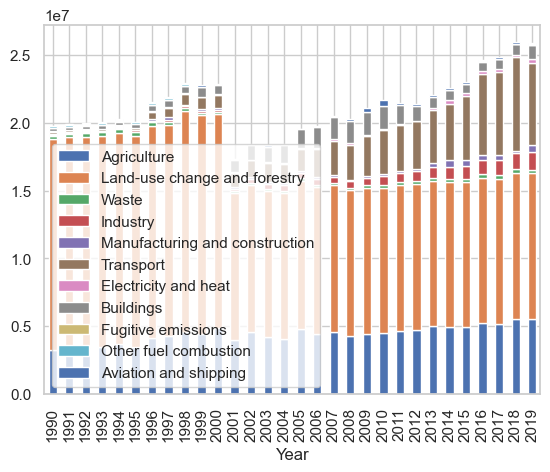

In [110]:
plt.figure(figsize=(10,6), dpi=300)
df_sector_ghg.set_index('Year').plot(kind='bar', stacked=True)

In [111]:
stack = df_sector_ghg
stack.head()

Year   Agriculture  Land-use change and forestry          Waste  \
600  1990  3.250000e+06                  1.555000e+07  259999.990463   
601  1991  3.380000e+06                  1.555000e+07  270000.010729   
602  1992  3.430000e+06                  1.555000e+07  280000.001192   
603  1993  3.450000e+06                  1.555000e+07  289999.991655   
604  1994  3.710000e+06                  1.555000e+07  300000.011921   

          Industry  Manufacturing and construction      Transport  \
600   70000.000298                    29999.999329  170000.001788   
601   79999.998212                    19999.999553  129999.995232   
602   90000.003576                    29999.999329  119999.997318   
603  100000.001490                    29999.999329  119999.997318   
604   90000.003576                    19999.999553  119999.997318   

     Electricity and heat      Buildings  Fugitive emissions  \
600          29999.999329  250000.000000        19999.999553   
601          29999.999329  239999.994636        19999.999553   
602          29999.999329  259999.990463        19999.999553   
603          29999.999329  259999.990463        19999.999553   
604          29999.999329  270000.010729         9999.999776   

     Other fuel combustion  Aviation and shipping  
600          109999.999404           50000.000745  
601          109999.999404           50000.000745  
602          109999.999404           50000.000745  
603          109999.999404           59999.998659  
604          119999.997318           59999.998659

In [112]:
stack.columns

Index(['Year', 'Agriculture', 'Land-use change and forestry', 'Waste',
       'Industry', 'Manufacturing and construction', 'Transport',
       'Electricity and heat', 'Buildings', 'Fugitive emissions',
       'Other fuel combustion', 'Aviation and shipping'],
      dtype='object')

In [113]:
stacked = stack.set_index('Year').stack() # autre méthode : group by
stacked = pd.DataFrame(stacked)
stacked.columns = ['Ghg_em']
stacked

Ghg_em
Year                                             
1990 Agriculture                     3.250000e+06
     Land-use change and forestry    1.555000e+07
     Waste                           2.600000e+05
     Industry                        7.000000e+04
     Manufacturing and construction  3.000000e+04
...                                           ...
2019 Electricity and heat            2.700000e+05
     Buildings                       1.030000e+06
     Fugitive emissions              1.000000e+04
     Other fuel combustion           6.000000e+04
     Aviation and shipping           7.000000e+04

[330 rows x 1 columns]

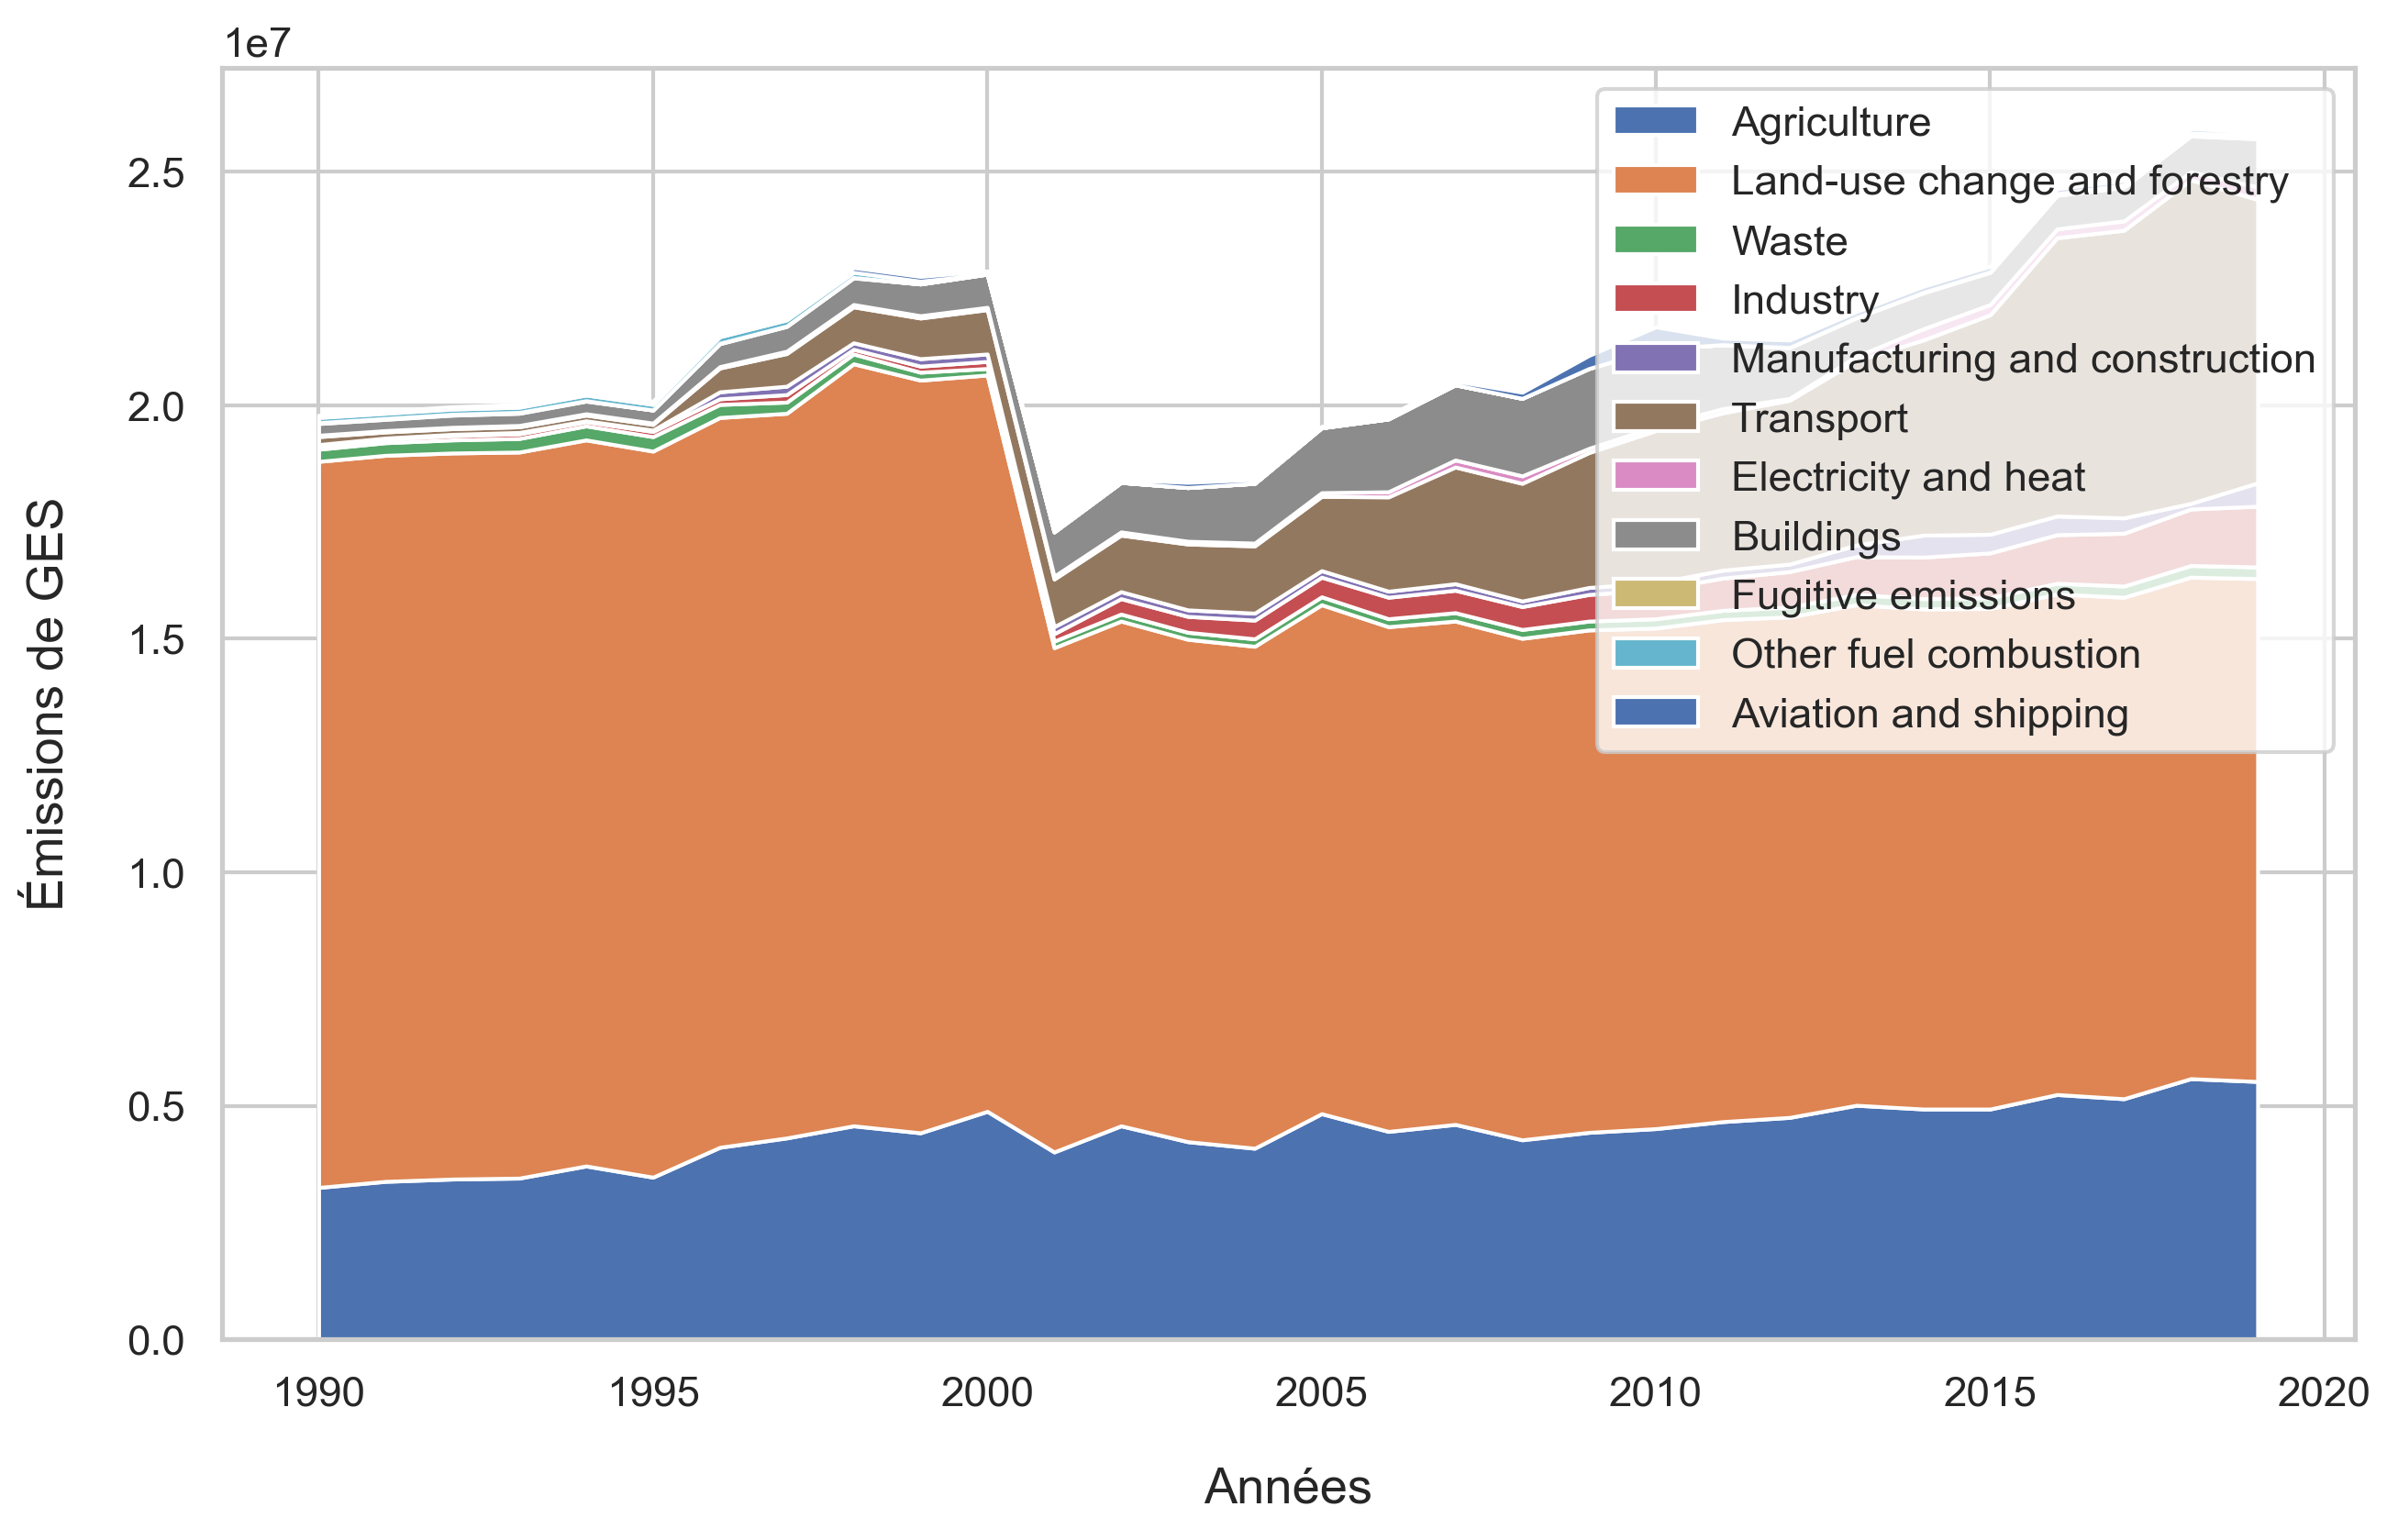

In [114]:
plt.figure(figsize=(10,6), dpi=300)
plt.stackplot(stack['Year'], stack['Agriculture'], stack['Land-use change and forestry'], stack['Waste'], stack['Industry'], stack['Manufacturing and construction'], stack['Transport'], stack['Electricity and heat'], stack['Buildings'], stack['Fugitive emissions'], stack['Other fuel combustion'], stack['Aviation and shipping'])
plt.legend(['Agriculture', 'Land-use change and forestry', 'Waste', 'Industry','Manufacturing and construction', 'Transport', 'Electricity and heat', 'Buildings', 'Fugitive emissions', 'Other fuel combustion', 'Aviation and shipping'])
plt.xlabel('Années', labelpad=14.0, fontsize=13)
plt.ylabel('Émissions de GES', labelpad=14.0, fontsize=13)
plt.savefig("graph.svg")

In [115]:
# filtre Bénin

ben_ghg = sector_ghg[sector_ghg['Entity']=='Benin']
ben_ghg = ben_ghg[ben_ghg['Year']==2019]
ben_ghg

Entity Code  Year   Agriculture  Land-use change and forestry     Waste  \
629  Benin  BEN  2019  5.520000e+06                  1.077000e+07  250000.0   

         Industry  Manufacturing and construction     Transport  \
629  1.300000e+06                        500000.0  6.070000e+06   

     Electricity and heat     Buildings  Fugitive emissions  \
629         270000.010729  1.030000e+06         9999.999776   

     Other fuel combustion  Aviation and shipping  
629           59999.998659           70000.000298

In [116]:
ben_ghg.columns
col = ben_ghg[['Agriculture', 'Land-use change and forestry',
       'Waste', 'Industry', 'Manufacturing and construction', 'Transport',
       'Electricity and heat', 'Buildings', 'Fugitive emissions',
       'Other fuel combustion', 'Aviation and shipping']]
labels = col.columns
labels

Index(['Agriculture', 'Land-use change and forestry', 'Waste', 'Industry',
       'Manufacturing and construction', 'Transport', 'Electricity and heat',
       'Buildings', 'Fugitive emissions', 'Other fuel combustion',
       'Aviation and shipping'],
      dtype='object')

In [117]:
col_t = col.transpose()
col_t.columns = ['CO2']
col_t

CO2
Agriculture                     5.520000e+06
Land-use change and forestry    1.077000e+07
Waste                           2.500000e+05
Industry                        1.300000e+06
Manufacturing and construction  5.000000e+05
Transport                       6.070000e+06
Electricity and heat            2.700000e+05
Buildings                       1.030000e+06
Fugitive emissions              1.000000e+04
Other fuel combustion           6.000000e+04
Aviation and shipping           7.000000e+04

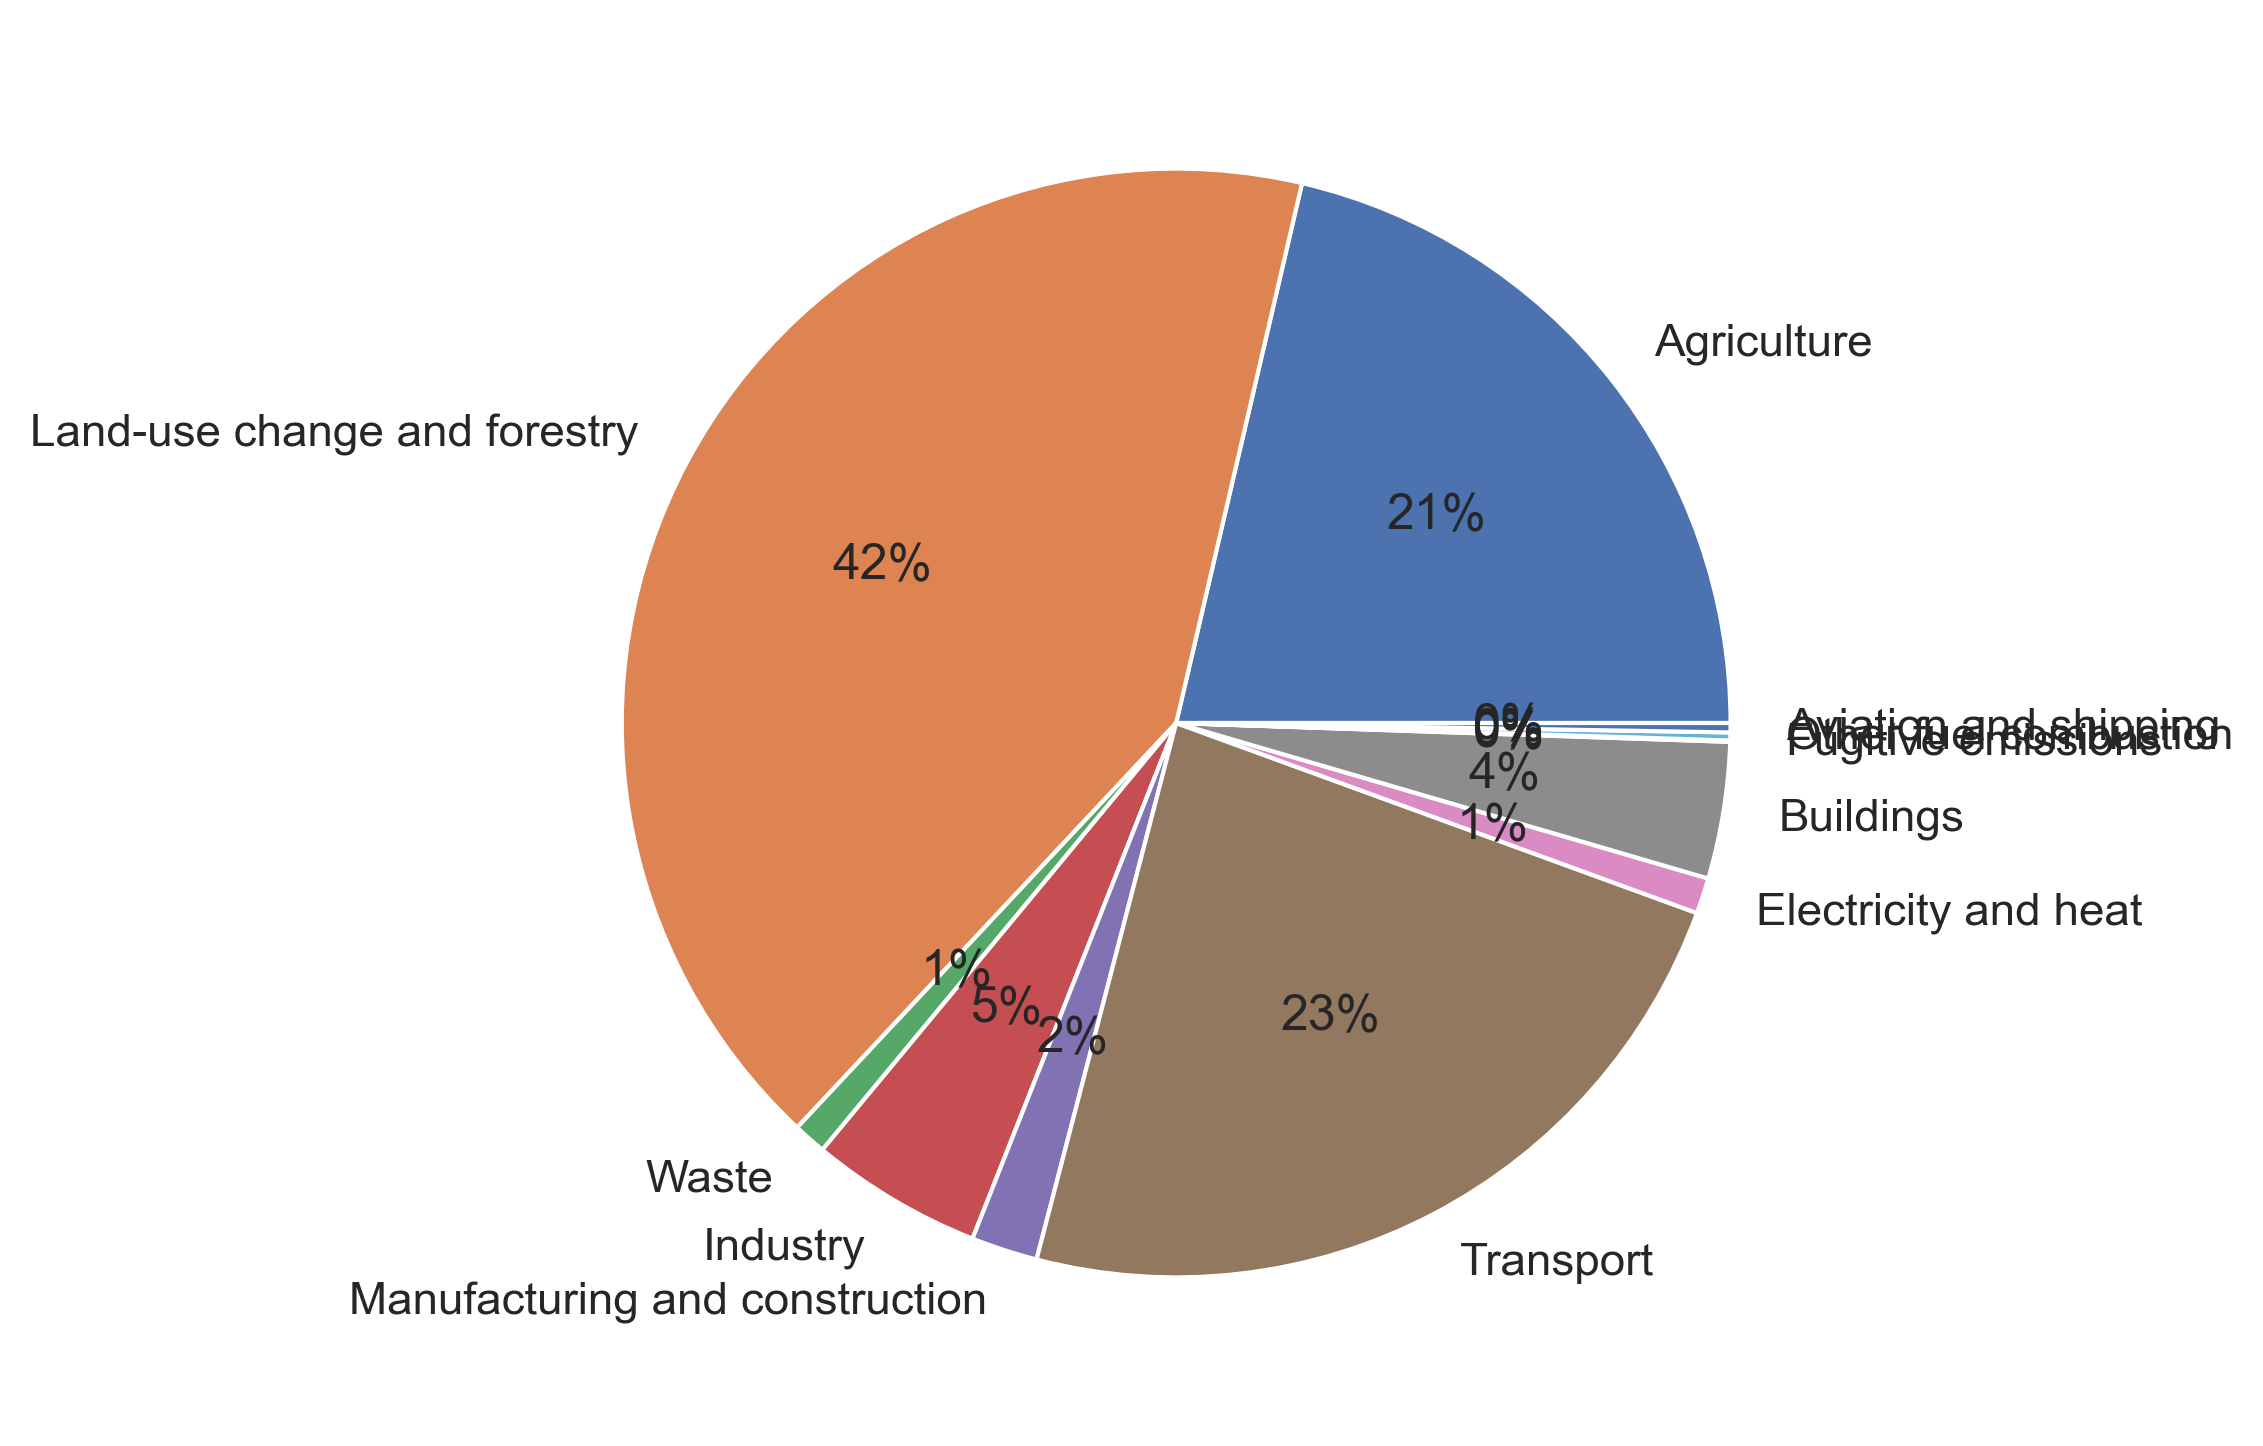

In [118]:
# Changement format

plt.figure(figsize=(10,6), dpi=300)
data_CO2 = col_t['CO2'].unique()
labels = col.columns
plt.pie(data_CO2, labels=labels, autopct='%.0f%%')
plt.show()

In [119]:
data_CO2

array([5.51999998e+06, 1.07700005e+07, 2.50000000e+05, 1.29999995e+06,
       5.00000000e+05, 6.07000017e+06, 2.70000011e+05, 1.02999997e+06,
       9.99999978e+03, 5.99999987e+04, 7.00000003e+04])

In [120]:
secteurs_PIB = pd.DataFrame({'Secteur primaire': [30], 'Secteur secondaire': [17], 'Secteur tertiaire': [53]}, columns = ['Secteur primaire', 'Secteur secondaire', 'Secteur tertiaire']).transpose()
secteurs_PIB.columns = ['%_PIB']
secteurs_PIB.index

Index(['Secteur primaire', 'Secteur secondaire', 'Secteur tertiaire'], dtype='object')

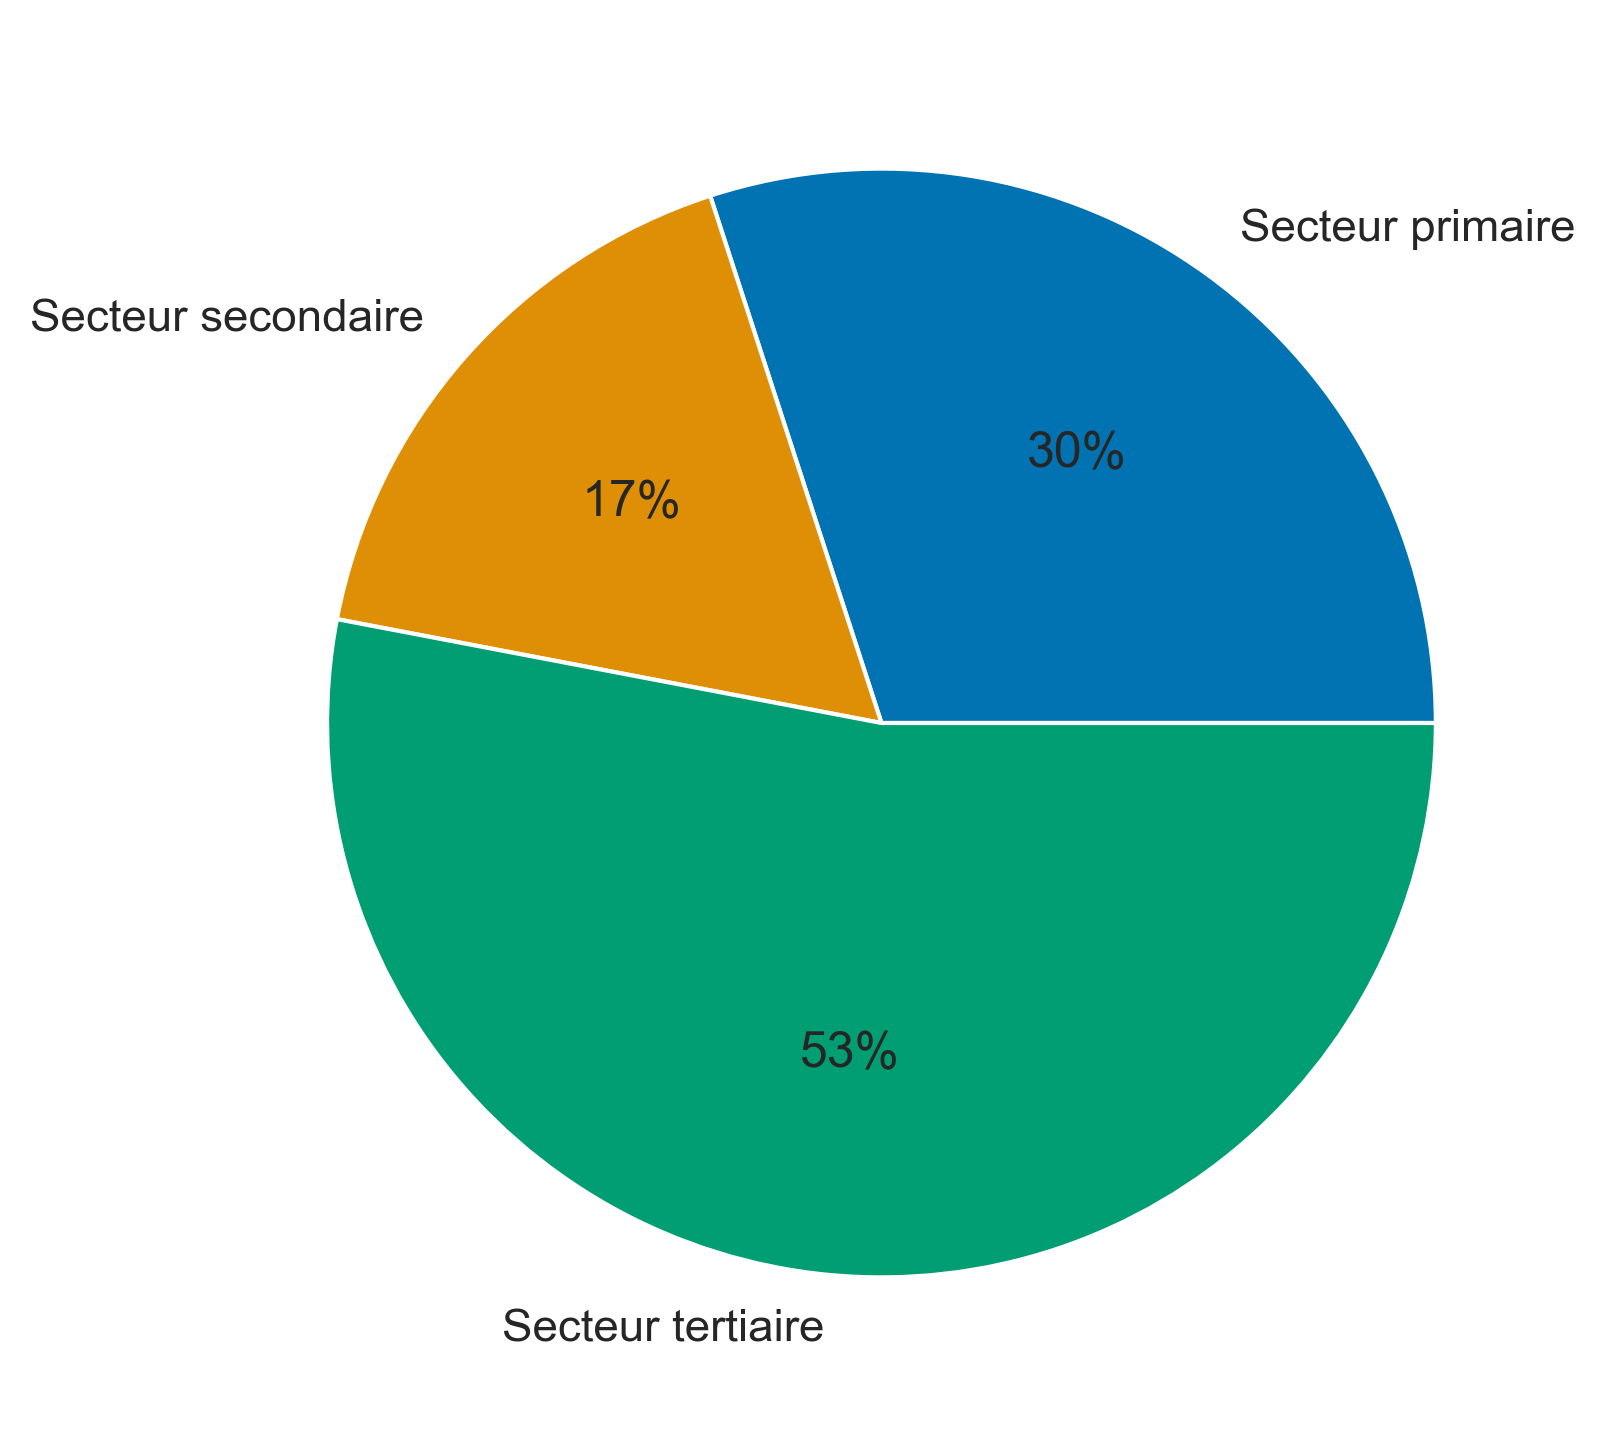

In [121]:
plt.figure(figsize=(10,6), dpi=300)
part_PIB = secteurs_PIB['%_PIB'].unique()
# part_PIB

colors = sns.color_palette('colorblind')[0:7]

lb = secteurs_PIB.index
plt.pie(part_PIB, labels=lb, colors = colors, autopct='%.0f%%')
# plt.title('Part des secteurs en pourcentage du PIB', fontsize='13', loc='center')
#plt.ylabel(lb.any(), fontsize='6')
plt.show()

In [122]:
data = [15, 25, 25, 30, 5]
labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5']

In [123]:
data

[15, 25, 25, 30, 5]

In [124]:
export = pd.read_csv("DATA/FAOSTAT_data_fr_9-1-2022.csv")
export.head()

Code Domaine                                      Domaine  Code zone (FAO)  \
0          SCL  Compte Disponibilités et Utilisations (CDU)               53   
1          SCL  Compte Disponibilités et Utilisations (CDU)               53   
2          SCL  Compte Disponibilités et Utilisations (CDU)               53   
3          SCL  Compte Disponibilités et Utilisations (CDU)               53   
4          SCL  Compte Disponibilités et Utilisations (CDU)               53   

    Zone  Code Élément                  Élément Code Produit (CPC)  \
0  Bénin          5910  Exportations - Quantité              24110   
1  Bénin          5910  Exportations - Quantité              F1232   
2  Bénin          5910  Exportations - Quantité              01371   
3  Bénin          5910  Exportations - Quantité              21422   
4  Bénin          5910  Exportations - Quantité              01318   

                      Produit  Code année  Année   Unité  Valeur  Symbole  \
0      Alcool non alimentaire        2019   2019  tonnes       3      NaN   
1  Aliments, préparations nda        2019   2019  tonnes     796      NaN   
2    Amandes non décortiquées        2019   2019  tonnes     213      NaN   
3            Amandes, écalées        2019   2019  tonnes     159      NaN   
4                      Ananas        2019   2019  tonnes     904      NaN   

  Description du Symbole  
0      Donnée officielle  
1      Donnée officielle  
2      Donnée officielle  
3      Donnée officielle  
4      Donnée officielle

In [125]:
export.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            94 non-null     object 
 1   Domaine                 94 non-null     object 
 2   Code zone (FAO)         94 non-null     int64  
 3   Zone                    94 non-null     object 
 4   Code Élément            94 non-null     int64  
 5   Élément                 94 non-null     object 
 6   Code Produit (CPC)      94 non-null     object 
 7   Produit                 94 non-null     object 
 8   Code année              94 non-null     int64  
 9   Année                   94 non-null     int64  
 10  Unité                   94 non-null     object 
 11  Valeur                  94 non-null     int64  
 12  Symbole                 0 non-null      float64
 13  Description du Symbole  94 non-null     object 
dtypes: float64(1), int64(5), object(8)
memory us

In [126]:
export.columns

Index(['Code Domaine', 'Domaine', 'Code zone (FAO)', 'Zone', 'Code Élément',
       'Élément', 'Code Produit (CPC)', 'Produit', 'Code année', 'Année',
       'Unité', 'Valeur', 'Symbole', 'Description du Symbole'],
      dtype='object')

In [127]:
export_product = export[['Élément', 'Produit', 'Valeur']]
export_product

Élément                     Produit  Valeur
0   Exportations - Quantité      Alcool non alimentaire       3
1   Exportations - Quantité  Aliments, préparations nda     796
2   Exportations - Quantité    Amandes non décortiquées     213
3   Exportations - Quantité            Amandes, écalées     159
4   Exportations - Quantité                      Ananas     904
..                      ...                         ...     ...
89  Exportations - Quantité                Viande, ovin       6
90  Exportations - Quantité     Viande, poulet en boîte      15
91  Exportations - Quantité            Viande, volaille   10147
92  Exportations - Quantité                         Vin      15
93  Exportations - Quantité    Yaourt, concentré ou non    1284

[94 rows x 3 columns]

In [128]:
top_export_products = export_product.sort_values(by='Valeur', ascending=False).head(10)['Produit'].unique()
top_export_products

array(['Graines de coton', "Noix d'acajou non décortiquées",
       'Noix de karite', 'Huile de coton', 'Viande, volaille',
       'Huile de palme', 'Arachides non décortiquées', 'Sésame',
       'Huile végétale nda', "Jus d'ananas"], dtype=object)

In [129]:
export_product.sort_values(by='Valeur', ascending=False)

Élément                          Produit  Valeur
28  Exportations - Quantité                 Graines de coton  130889
58  Exportations - Quantité   Noix d'acajou non décortiquées   92393
60  Exportations - Quantité                   Noix de karite   79079
32  Exportations - Quantité                   Huile de coton   20260
91  Exportations - Quantité                 Viande, volaille   10147
..                      ...                              ...     ...
49  Exportations - Quantité     Légumes conservés (surgelés)       0
52  Exportations - Quantité                Légumes frais nda       0
73  Exportations - Quantité                   Prunes séchées       0
61  Exportations - Quantité                     Noix de kola       0
47  Exportations - Quantité  Lait, entier en poudre de vache       0

[94 rows x 3 columns]

In [130]:
sum_export = export_product.sort_values(by='Valeur', ascending=False)['Valeur'].sum()
sum_export

388868

In [131]:
all_export = export_product.sort_values(by='Valeur', ascending=False).copy()
all_export['pourcentage_export'] = all_export['Valeur']/388868*100 

In [132]:
sup_1 = all_export[all_export['pourcentage_export']> 1]
sup_1

Élément                         Produit  Valeur  \
28  Exportations - Quantité                Graines de coton  130889   
58  Exportations - Quantité  Noix d'acajou non décortiquées   92393   
60  Exportations - Quantité                  Noix de karite   79079   
32  Exportations - Quantité                  Huile de coton   20260   
91  Exportations - Quantité                Viande, volaille   10147   
33  Exportations - Quantité                  Huile de palme    9225   
6   Exportations - Quantité      Arachides non décortiquées    7262   
77  Exportations - Quantité                          Sésame    6492   
38  Exportations - Quantité              Huile végétale nda    5041   
40  Exportations - Quantité                    Jus d'ananas    4533   

    pourcentage_export  
28           33.658979  
58           23.759476  
60           20.335692  
32            5.209994  
91            2.609369  
33            2.372270  
6             1.867472  
77            1.669461  
38            1.296327  
40            1.165691

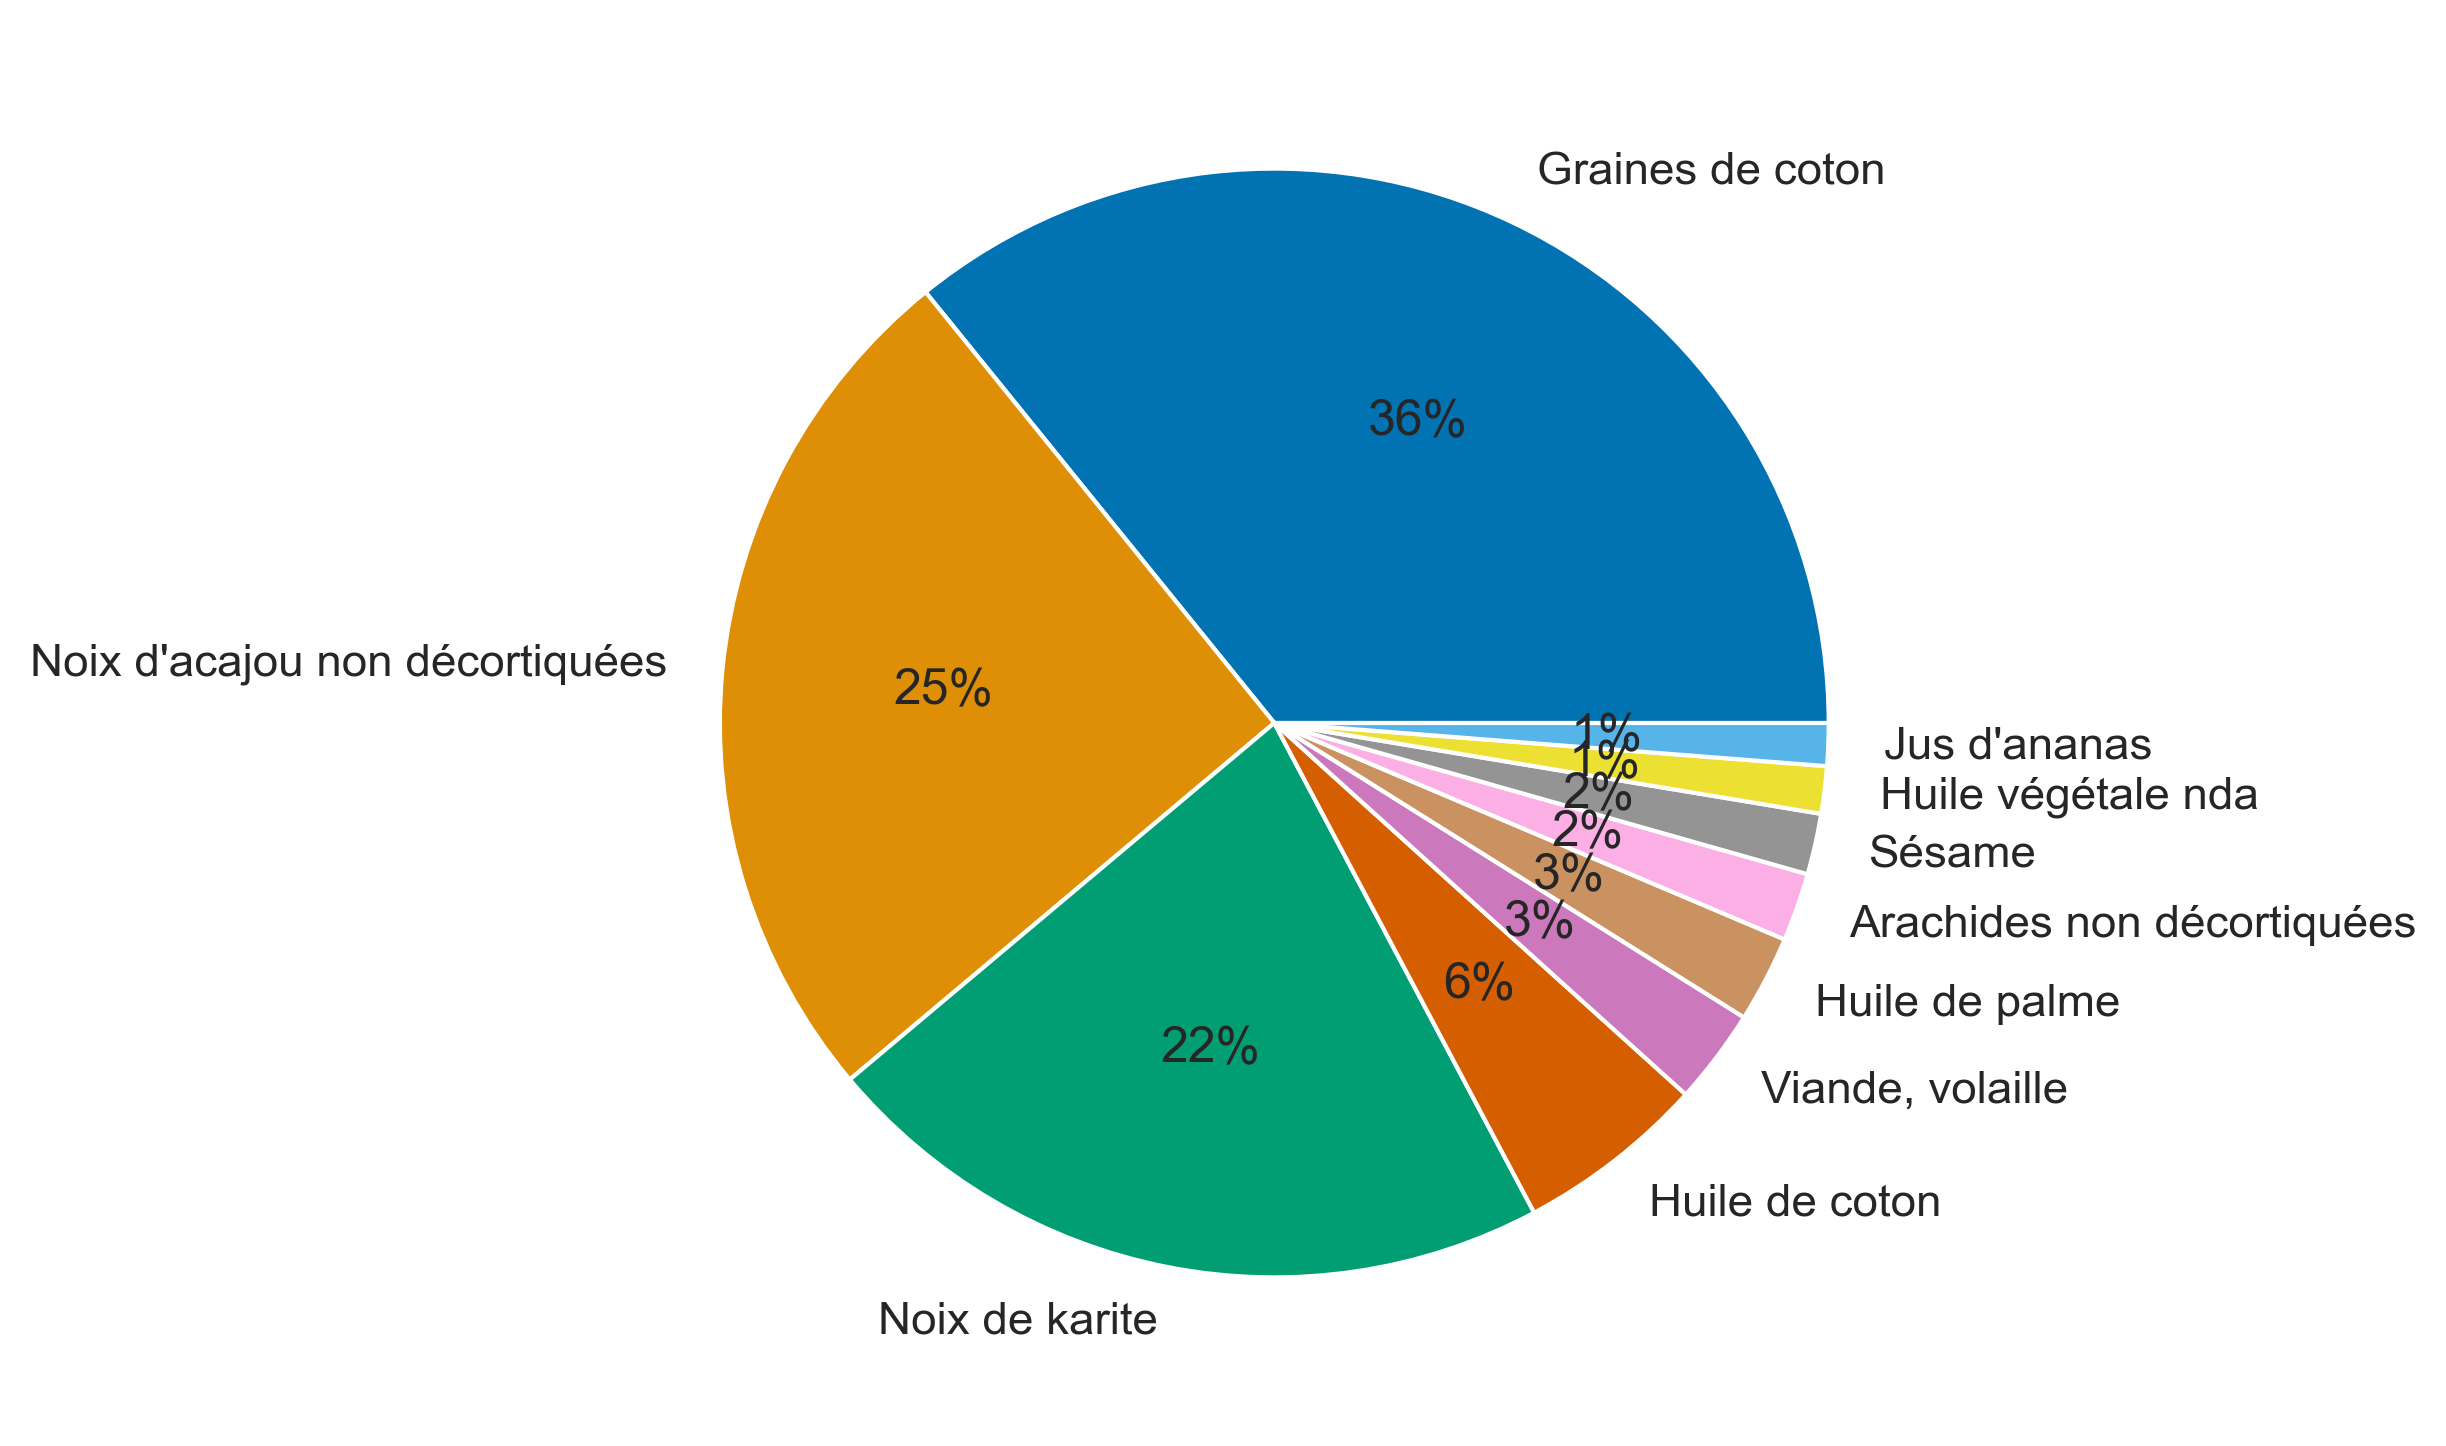

In [133]:
# représentation graphique du poids des produits exportés

plt.figure(figsize=(10,6), dpi=300)
val_sup_1 = sup_1['Valeur'].unique()
# part_PIB

colors = sns.color_palette('colorblind')[0:10]

label_export = sup_1['Produit'].unique()
plt.pie(val_sup_1, labels=label_export, colors = colors, autopct='%.0f%%')
# plt.title('Part des secteurs en pourcentage du PIB', fontsize='13', loc='center')
#plt.ylabel(lb.any(), fontsize='6')

plt.savefig("Bénin_exportations.svg")
plt.show()

In [134]:
hist = sup_1[['Produit', 'Valeur']]
hist

Produit  Valeur
28                Graines de coton  130889
58  Noix d'acajou non décortiquées   92393
60                  Noix de karite   79079
32                  Huile de coton   20260
91                Viande, volaille   10147
33                  Huile de palme    9225
6       Arachides non décortiquées    7262
77                          Sésame    6492
38              Huile végétale nda    5041
40                    Jus d'ananas    4533

<AxesSubplot:xlabel='Count', ylabel='Valeur'>

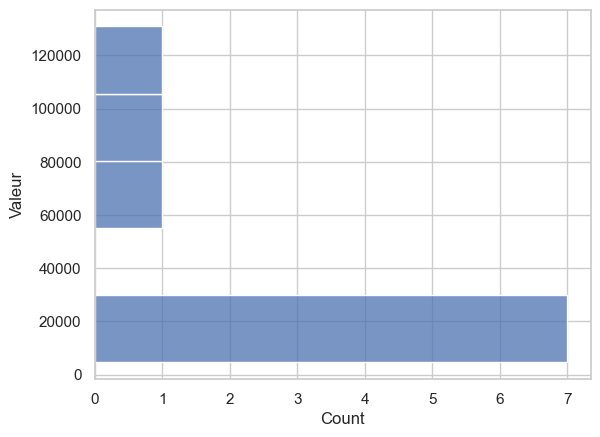

In [135]:
sns.histplot(hist, y=hist.Valeur, multiple='stack')

## Poids des pays dans le total des émissions

In [136]:
annual_em_country = pd.read_csv("DATA/annual-co2-emissions-per-country.csv")
annual_em_country

Entity Code  Year  Annual CO2 emissions
0      Afghanistan  AFG  1949                 14656
1      Afghanistan  AFG  1950                 84272
2      Afghanistan  AFG  1951                 91600
3      Afghanistan  AFG  1952                 91600
4      Afghanistan  AFG  1953                106256
...            ...  ...   ...                   ...
24665     Zimbabwe  ZWE  2016              10737567
24666     Zimbabwe  ZWE  2017               9581633
24667     Zimbabwe  ZWE  2018              11854367
24668     Zimbabwe  ZWE  2019              10949084
24669     Zimbabwe  ZWE  2020              10531342

[24670 rows x 4 columns]

In [137]:
annual_em_2019 = annual_em_country[annual_em_country['Year']==2019]
annual_em_2019

Entity      Code  Year  Annual CO2 emissions
70           Afghanistan       AFG  2019              12146674
207               Africa       NaN  2019            1408478929
295              Albania       ALB  2019               4863450
400              Algeria       DZA  2019             166641950
431              Andorra       AND  2019                501848
...                  ...       ...   ...                   ...
24137  Wallis and Futuna       WLF  2019                 26437
24408              World  OWID_WRL  2019           36702502903
24479              Yemen       YEM  2019              10020408
24550             Zambia       ZMB  2019               7047207
24668           Zimbabwe       ZWE  2019              10949084

[237 rows x 4 columns]

In [138]:
annual_em_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24670 entries, 0 to 24669
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Entity                24670 non-null  object
 1   Code                  21299 non-null  object
 2   Year                  24670 non-null  int64 
 3   Annual CO2 emissions  24670 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 771.1+ KB


In [139]:
annual_em_2019 = annual_em_2019.copy()

In [140]:
annual_em_2019['Entity'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Asia (excl. China & India)', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswa

In [141]:
annual_em_2019 = annual_em_2019.set_index("Entity")
annual_em_2019

Code  Year  Annual CO2 emissions
Entity                                                 
Afghanistan             AFG  2019              12146674
Africa                  NaN  2019            1408478929
Albania                 ALB  2019               4863450
Algeria                 DZA  2019             166641950
Andorra                 AND  2019                501848
...                     ...   ...                   ...
Wallis and Futuna       WLF  2019                 26437
World              OWID_WRL  2019           36702502903
Yemen                   YEM  2019              10020408
Zambia                  ZMB  2019               7047207
Zimbabwe                ZWE  2019              10949084

[237 rows x 3 columns]

In [142]:
annual_em_2019 = annual_em_2019.drop(index=["Asia (excl. China & India)"])
annual_em_2019 = annual_em_2019.drop(index=["Africa"])
annual_em_2019 = annual_em_2019.drop(index=['North America'])
annual_em_2019 = annual_em_2019.drop(index=['North America (excl. USA)'])
annual_em_2019 = annual_em_2019.drop(index=['Europe (excl. EU-27)'])
annual_em_2019 = annual_em_2019.drop(index=['Europe (excl. EU-28)'])
annual_em_2019 = annual_em_2019.drop(index=['European Union (27)'])
annual_em_2019 = annual_em_2019.drop(index=['European Union (28)'])
annual_em_2019 = annual_em_2019.drop(index=['High-income countries'])
annual_em_2019 = annual_em_2019.drop(index=['Low-income countries'])
annual_em_2019 = annual_em_2019.drop(index=['Lower-middle-income countries'])
annual_em_2019 = annual_em_2019.drop(index=['Upper-middle-income countries'])
annual_em_2019 = annual_em_2019.drop(index=['International transport'])

In [143]:
annual_em_2019 = annual_em_2019.drop(index=['World'])

In [144]:
annual_em_2019 = annual_em_2019.drop(index=['Asia'])

In [145]:
annual_em_2019 = annual_em_2019.drop(index=['Europe'])

In [146]:
annual_em_2019 = annual_em_2019.drop(index=['South America'])

In [147]:
annual_em_2019.sort_values(by='Annual CO2 emissions', ascending=False)

Code  Year  Annual CO2 emissions
Entity                                            
China              CHN  2019           10489988555
United States      USA  2019            5255816207
India              IND  2019            2625968148
Russia             RUS  2019            1679449327
Japan              JPN  2019            1105929335
...                ...   ...                   ...
Montserrat         MSR  2019                 28610
Wallis and Futuna  WLF  2019                 26437
Niue               NIU  2019                 11330
Saint Helena       SHN  2019                 10729
Tuvalu             TUV  2019                  7553

[220 rows x 3 columns]

In [148]:
annual_em_2019 = annual_em_2019.reset_index()

In [149]:
tt_annual_em_2019 = annual_em_2019[['Entity', 'Year', 'Annual CO2 emissions']]['Annual CO2 emissions'].sum()
tt_annual_em_2019

35915925164

In [150]:
annual_em_2019['per_em'] = (annual_em_2019['Annual CO2 emissions']/tt_annual_em_2019)*100
annual_em_2019

Entity Code  Year  Annual CO2 emissions    per_em
0          Afghanistan  AFG  2019              12146674  0.033820
1              Albania  ALB  2019               4863450  0.013541
2              Algeria  DZA  2019             166641950  0.463978
3              Andorra  AND  2019                501848  0.001397
4               Angola  AGO  2019              23486822  0.065394
..                 ...  ...   ...                   ...       ...
215            Vietnam  VNM  2019             260312093  0.724782
216  Wallis and Futuna  WLF  2019                 26437  0.000074
217              Yemen  YEM  2019              10020408  0.027900
218             Zambia  ZMB  2019               7047207  0.019621
219           Zimbabwe  ZWE  2019              10949084  0.030485

[220 rows x 5 columns]

In [151]:
pays_em_CO2 = annual_em_2019.sort_values(by='per_em', ascending=False)
pie_em_country = pays_em_CO2[pays_em_CO2['per_em'] > 1]
pie_em_country

Entity Code  Year  Annual CO2 emissions     per_em
40            China  CHN  2019           10489988555  29.207068
210   United States  USA  2019            5255816207  14.633665
89            India  IND  2019            2625968148   7.311431
163          Russia  RUS  2019            1679449327   4.676058
97            Japan  JPN  2019            1105929335   3.079217
91             Iran  IRN  2019             733365847   2.041896
74          Germany  DEU  2019             711427809   1.980814
90        Indonesia  IDN  2019             660593985   1.839279
184     South Korea  KOR  2019             648024558   1.804282
172    Saudi Arabia  SAU  2019             622412749   1.732972
35           Canada  CAN  2019             582389608   1.621536
27           Brazil  BRA  2019             485793146   1.352584
183    South Africa  ZAF  2019             475922616   1.325102
148         Oceania  NaN  2019             471189339   1.311923
126          Mexico  MEX  2019             435512388   1.212589
10        Australia  AUS  2019             414516833   1.154131
202          Turkey  TUR  2019             399344914   1.111888
209  United Kingdom  GBR  2019             369009693   1.027426

In [152]:
annual_em_2019['per_em'].sum() # OK

100.0

In [153]:
annual_em_2019[annual_em_2019['Entity']=='Benin']

Entity Code  Year  Annual CO2 emissions    per_em
20  Benin  BEN  2019               7315116  0.020367

In [154]:
all_2019 = annual_em_country[annual_em_country['Year']==2019].copy()
all_2019

Entity      Code  Year  Annual CO2 emissions
70           Afghanistan       AFG  2019              12146674
207               Africa       NaN  2019            1408478929
295              Albania       ALB  2019               4863450
400              Algeria       DZA  2019             166641950
431              Andorra       AND  2019                501848
...                  ...       ...   ...                   ...
24137  Wallis and Futuna       WLF  2019                 26437
24408              World  OWID_WRL  2019           36702502903
24479              Yemen       YEM  2019              10020408
24550             Zambia       ZMB  2019               7047207
24668           Zimbabwe       ZWE  2019              10949084

[237 rows x 4 columns]

In [155]:
annual_em_2019['Entity'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Faeroe Islands', 'Fiji', 'Fi

In [156]:
# Pie chart Bénin dans le total des émissions

# données
annual_em_2019['Entity'].unique() # pas de doublons à priori

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Faeroe Islands', 'Fiji', 'Fi

In [157]:
annual_em_2019.head()

Entity Code  Year  Annual CO2 emissions    per_em
0  Afghanistan  AFG  2019              12146674  0.033820
1      Albania  ALB  2019               4863450  0.013541
2      Algeria  DZA  2019             166641950  0.463978
3      Andorra  AND  2019                501848  0.001397
4       Angola  AGO  2019              23486822  0.065394

In [158]:
# Reste du Monde 

RDM = ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Faeroe Islands', 'Fiji', 'Finland', 'France', 'French Guiana',
       'French Polynesia', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Greenland', 'Grenada', 'Guadeloupe',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati',
       'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon',
       'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania',
       'Luxembourg', 'Macao', 'Madagascar', 'Malawi', 'Malaysia',
       'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Martinique',
       'Mauritania', 'Mauritius', 'Mayotte', 'Mexico',
       'Micronesia (country)', 'Moldova', 'Mongolia', 'Montenegro',
       'Montserrat', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia',
       'Nauru', 'Nepal', 'Netherlands', 'New Caledonia', 'New Zealand',
       'Nicaragua', 'Niger', 'Nigeria', 'Niue', 'North Korea',
       'North Macedonia', 'Norway', 'Oceania', 'Oman', 'Pakistan',
       'Palau', 'Palestine', 'Panama', 'Papua New Guinea', 'Paraguay',
       'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Reunion',
       'Romania', 'Russia', 'Rwanda', 'Saint Helena',
       'Saint Kitts and Nevis', 'Saint Lucia',
       'Saint Pierre and Miquelon', 'Saint Vincent and the Grenadines',
       'Samoa', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal',
       'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore',
       'Sint Maarten (Dutch part)', 'Slovakia', 'Slovenia',
       'Solomon Islands', 'Somalia', 'South Africa', 'South Korea',
       'South Sudan', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'Sweden',
       'Switzerland', 'Syria', 'Taiwan', 'Tajikistan', 'Tanzania',
       'Thailand', 'Timor', 'Togo', 'Tonga', 'Trinidad and Tobago',
       'Tunisia', 'Turkey', 'Turkmenistan', 'Turks and Caicos Islands',
       'Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates',
       'United Kingdom', 'United States', 'Uruguay', 'Uzbekistan',
       'Vanuatu', 'Venezuela', 'Vietnam', 'Wallis and Futuna', 'Yemen',
       'Zambia', 'Zimbabwe']

In [159]:
filter1 = annual_em_2019['Entity'].isin(RDM)
country_filter1 = annual_em_2019[filter1]
country_filter1

Entity Code  Year  Annual CO2 emissions    per_em
0          Afghanistan  AFG  2019              12146674  0.033820
1              Albania  ALB  2019               4863450  0.013541
2              Algeria  DZA  2019             166641950  0.463978
3              Andorra  AND  2019                501848  0.001397
4               Angola  AGO  2019              23486822  0.065394
..                 ...  ...   ...                   ...       ...
215            Vietnam  VNM  2019             260312093  0.724782
216  Wallis and Futuna  WLF  2019                 26437  0.000074
217              Yemen  YEM  2019              10020408  0.027900
218             Zambia  ZMB  2019               7047207  0.019621
219           Zimbabwe  ZWE  2019              10949084  0.030485

[219 rows x 5 columns]

In [160]:
country_filter1["Annual CO2 emissions"].sum()
em_RDM = 35908610048
em_RDM

35908610048

In [161]:
annual_em_2019[annual_em_2019["Entity"]=="Benin"]["Annual CO2 emissions"]
em_Benin = 7315116
em_Benin

7315116

In [162]:
# Création d'un df Bénin vs. RDM

em_Benin_RDM = pd.DataFrame({'Reste du Monde': [35908610048], 'Bénin': [7315116]}, columns = ['Reste du Monde', 'Bénin']).transpose()
em_Benin_RDM.columns = ['Emissions_CO2']
em_Benin_RDM               
                            

Emissions_CO2
Reste du Monde    35908610048
Bénin                 7315116

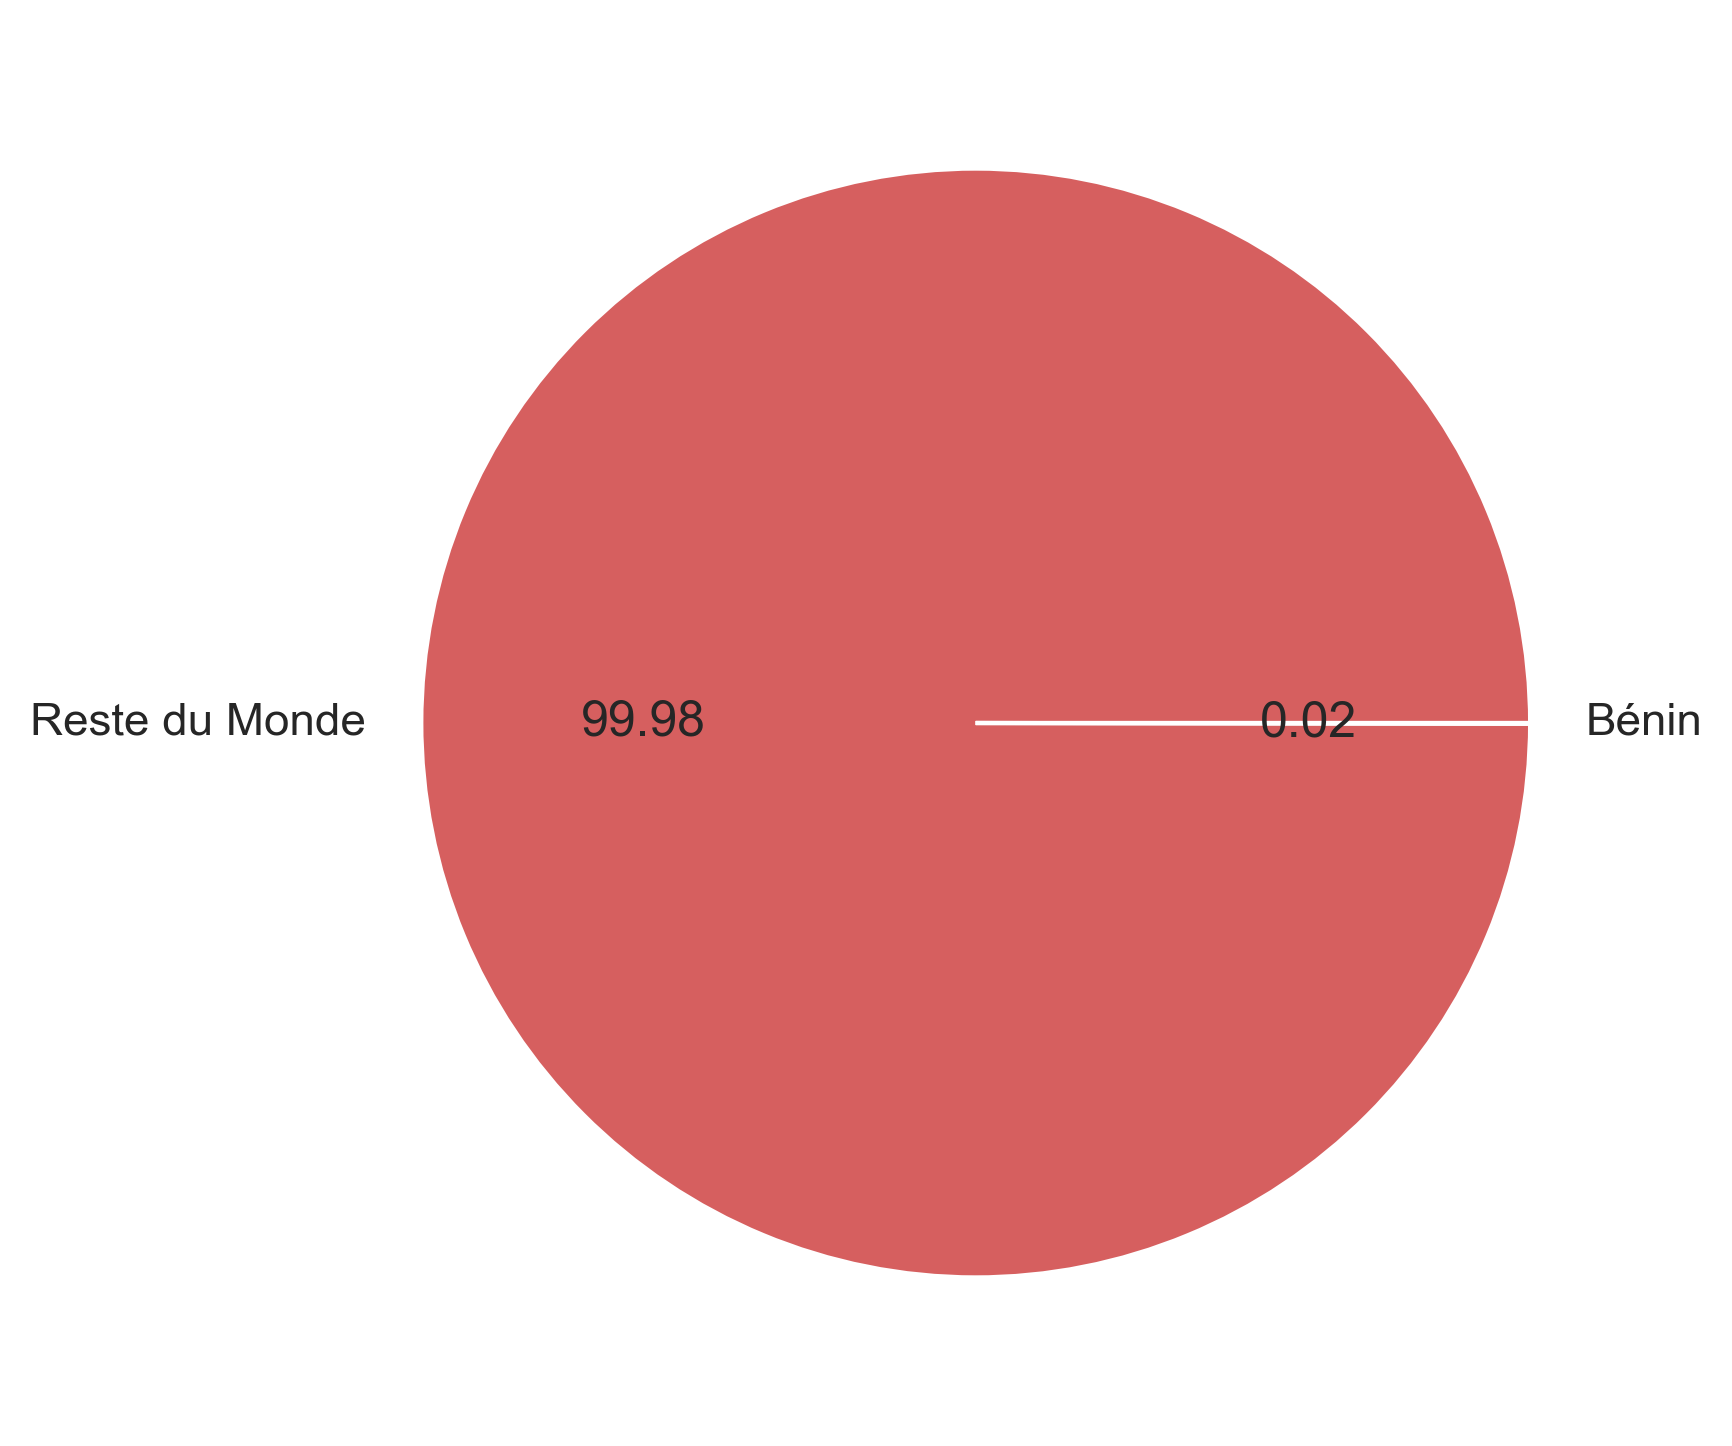

In [163]:
plt.figure(figsize=(10,6), dpi=300)
part_emissions = em_Benin_RDM['Emissions_CO2'].unique()
# part_PIB

colors2 = sns.color_palette('muted')[3:8]

lb_em = em_Benin_RDM.index
plt.pie(part_emissions, labels=lb_em, colors = colors2, autopct='%.2f')
# plt.title('Part des secteurs en pourcentage du PIB', fontsize='13', loc='center')
#plt.ylabel(lb.any(), fontsize='6')

plt.savefig("Part_benin_emissions.svg")
plt.show()

In [164]:
Af_O = ['Benin','Burkina Faso', "Cote d'Ivoire", 'Cape Verde','Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Liberia', 'Mali', 'Niger', 'Nigeria', 'Senegal', 'Sierra Leone', 'Togo']
Af_O

['Benin',
 'Burkina Faso',
 "Cote d'Ivoire",
 'Cape Verde',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Liberia',
 'Mali',
 'Niger',
 'Nigeria',
 'Senegal',
 'Sierra Leone',
 'Togo']

In [165]:
all_2019 = all_2019.set_index('Entity')
all_2019.sort_values(by='Annual CO2 emissions', ascending=False)

Code  Year  Annual CO2 emissions
Entity                                                             
World                          OWID_WRL  2019           36702502903
Asia                                NaN  2019           20608592701
Upper-middle-income countries       NaN  2019           16054374312
High-income countries               NaN  2019           12965505267
China                               CHN  2019           10489988555
...                                 ...   ...                   ...
Montserrat                          MSR  2019                 28610
Wallis and Futuna                   WLF  2019                 26437
Niue                                NIU  2019                 11330
Saint Helena                        SHN  2019                 10729
Tuvalu                              TUV  2019                  7553

[237 rows x 3 columns]

In [166]:
af_ouest_em = all_2019.loc[Af_O]
af_ouest_em

Code  Year  Annual CO2 emissions
Entity                                        
Benin          BEN  2019               7315116
Burkina Faso   BFA  2019               4335868
Cote d'Ivoire  CIV  2019              10479712
Cape Verde     CPV  2019                602249
Gambia         GMB  2019                546960
Ghana          GHA  2019              16918159
Guinea         GIN  2019               3716950
Guinea-Bissau  GNB  2019                314056
Liberia        LBR  2019               1093400
Mali           MLI  2019               3688197
Niger          NER  2019               1853323
Nigeria        NGA  2019             130104061
Senegal        SEN  2019              11265532
Sierra Leone   SLE  2019                960643
Togo           TGO  2019               2305160

In [167]:
all_2019.loc[Af_O]['Annual CO2 emissions'].mean()

13033292.4

In [168]:
af_ouest_em['more_than_mean'] = af_ouest_em['Annual CO2 emissions']>13033292.4

In [169]:
af_ouest_em

Code  Year  Annual CO2 emissions  more_than_mean
Entity                                                        
Benin          BEN  2019               7315116           False
Burkina Faso   BFA  2019               4335868           False
Cote d'Ivoire  CIV  2019              10479712           False
Cape Verde     CPV  2019                602249           False
Gambia         GMB  2019                546960           False
Ghana          GHA  2019              16918159            True
Guinea         GIN  2019               3716950           False
Guinea-Bissau  GNB  2019                314056           False
Liberia        LBR  2019               1093400           False
Mali           MLI  2019               3688197           False
Niger          NER  2019               1853323           False
Nigeria        NGA  2019             130104061            True
Senegal        SEN  2019              11265532           False
Sierra Leone   SLE  2019                960643           False
Togo           TGO  2019               2305160           False

In [170]:
classif = af_ouest_em.sort_values(by='Annual CO2 emissions', ascending=False).reset_index()
classif['Annual_em_Milliers'] = classif['Annual CO2 emissions']/1000
classif

Entity Code  Year  Annual CO2 emissions  more_than_mean  \
0         Nigeria  NGA  2019             130104061            True   
1           Ghana  GHA  2019              16918159            True   
2         Senegal  SEN  2019              11265532           False   
3   Cote d'Ivoire  CIV  2019              10479712           False   
4           Benin  BEN  2019               7315116           False   
5    Burkina Faso  BFA  2019               4335868           False   
6          Guinea  GIN  2019               3716950           False   
7            Mali  MLI  2019               3688197           False   
8            Togo  TGO  2019               2305160           False   
9           Niger  NER  2019               1853323           False   
10        Liberia  LBR  2019               1093400           False   
11   Sierra Leone  SLE  2019                960643           False   
12     Cape Verde  CPV  2019                602249           False   
13         Gambia  GMB  2019                546960           False   
14  Guinea-Bissau  GNB  2019                314056           False   

    Annual_em_Milliers  
0           130104.061  
1            16918.159  
2            11265.532  
3            10479.712  
4             7315.116  
5             4335.868  
6             3716.950  
7             3688.197  
8             2305.160  
9             1853.323  
10            1093.400  
11             960.643  
12             602.249  
13             546.960  
14             314.056

Text(0, 0.5, 'Pays')

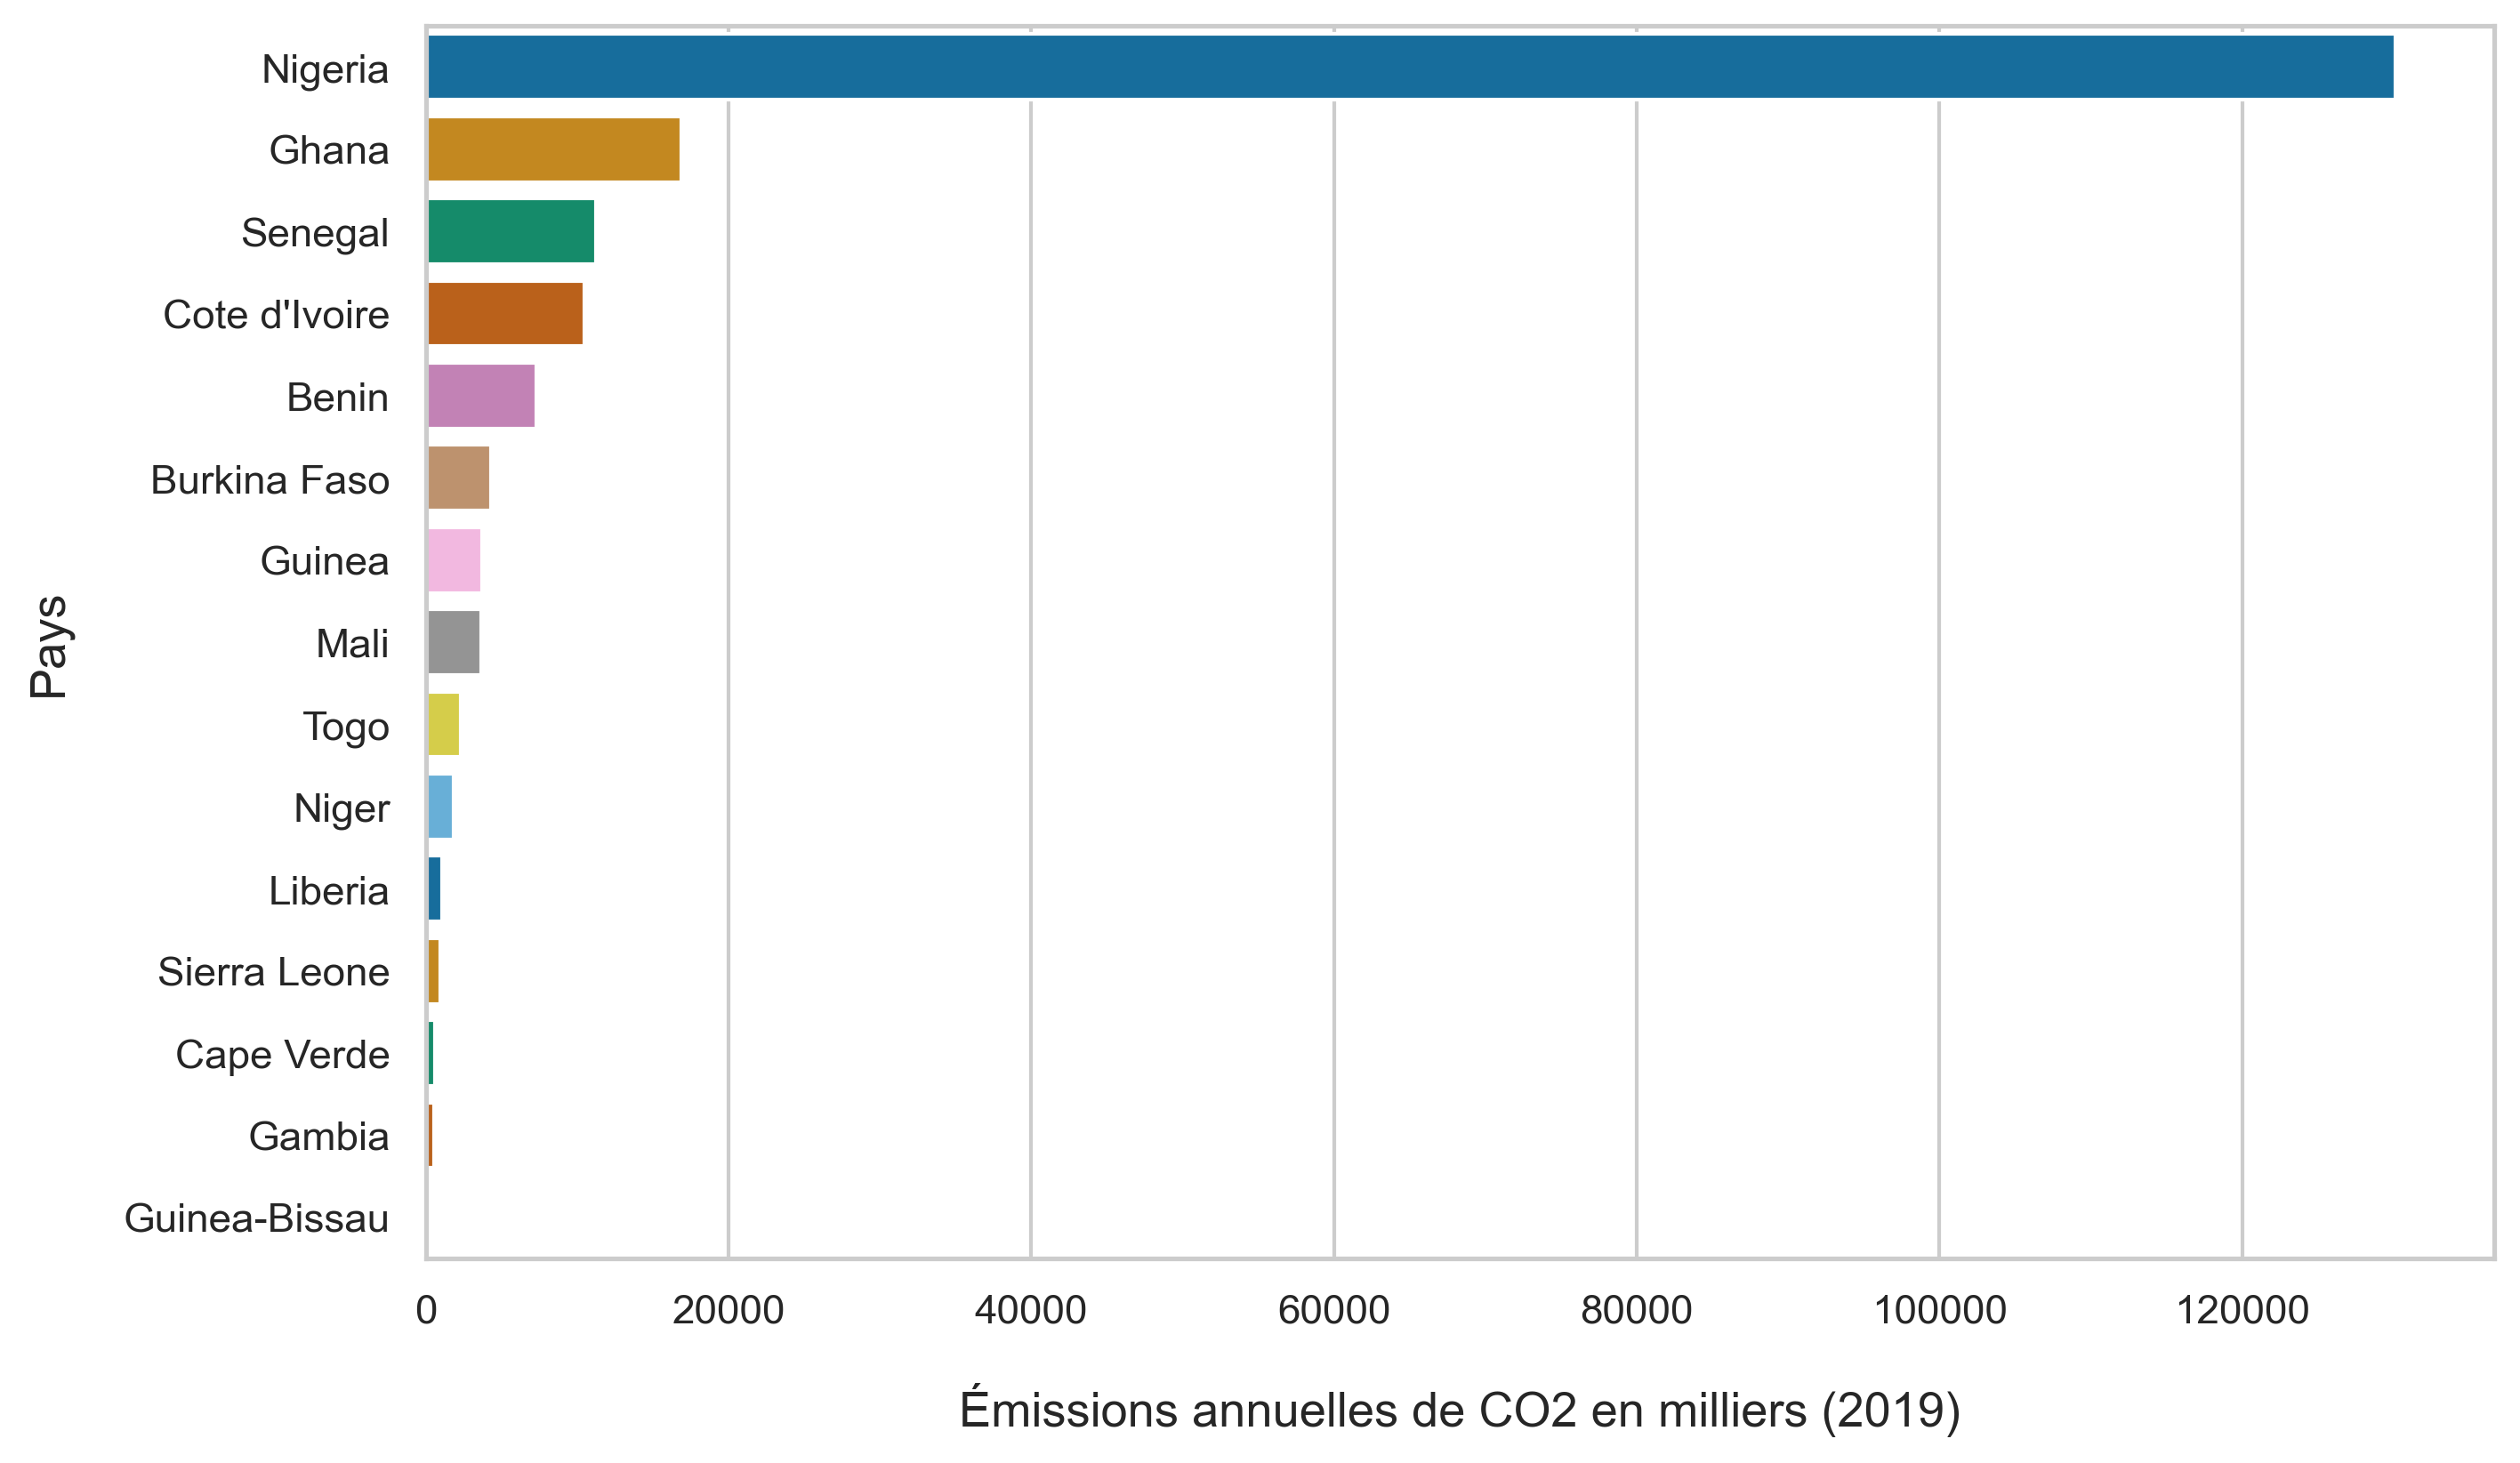

In [171]:
# représentation graphique
plt.figure(figsize=(10,6), dpi=300)
colors3 = sns.color_palette('colorblind')[0:10]
sns.barplot(x='Annual_em_Milliers', y='Entity', data = classif, palette=colors3)
plt.xlabel("Émissions annuelles de CO2 en milliers (2019)", loc='center', labelpad=14.0, fontsize=13)
plt.ylabel('Pays', labelpad=14.0, fontsize=13)

In [172]:
em_per_capita = pd.read_csv("DATA/co-emissions-per-capita.csv")
em_per_capita['Entity'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Asia (excl. China & India)', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswa

In [173]:
em_per_capita = em_per_capita.set_index('Entity')
em_per_capita

Code  Year  Annual CO2 emissions (per capita)
Entity                                                   
Afghanistan  AFG  1949                             0.0019
Afghanistan  AFG  1950                             0.0109
Afghanistan  AFG  1951                             0.0117
Afghanistan  AFG  1952                             0.0115
Afghanistan  AFG  1953                             0.0132
...          ...   ...                                ...
Zimbabwe     ZWE  2016                             0.7653
Zimbabwe     ZWE  2017                             0.6730
Zimbabwe     ZWE  2018                             0.8210
Zimbabwe     ZWE  2019                             0.7476
Zimbabwe     ZWE  2020                             0.7086

[24032 rows x 3 columns]

In [174]:
em_per_capita = em_per_capita.drop(index=["Asia (excl. China & India)"])
em_per_capita = em_per_capita.drop(index=["Africa"])
em_per_capita = em_per_capita.drop(index=['North America'])
em_per_capita = em_per_capita.drop(index=['North America (excl. USA)'])
em_per_capita = em_per_capita.drop(index=['Europe (excl. EU-27)'])
em_per_capita = em_per_capita.drop(index=['Europe (excl. EU-28)'])
em_per_capita = em_per_capita.drop(index=['European Union (27)'])
em_per_capita = em_per_capita.drop(index=['European Union (28)'])
em_per_capita = em_per_capita.drop(index=['High-income countries'])
em_per_capita = em_per_capita.drop(index=['Low-income countries'])
em_per_capita = em_per_capita.drop(index=['Lower-middle-income countries'])
em_per_capita = em_per_capita.drop(index=['Upper-middle-income countries'])
#em_per_capita = em_per_capita.drop(index=['International transport'])

In [175]:
em_per_c_2019 = em_per_capita[em_per_capita['Year']==2019].copy()
#em_per_c_2019 = em_per_c_2019.set_index('Entity')
em_per_c_2019

Code  Year  Annual CO2 emissions (per capita)
Entity                                                              
Afghanistan             AFG  2019                             0.3193
Albania                 ALB  2019                             1.6882
Algeria                 DZA  2019                             3.8706
Andorra                 AND  2019                             6.5052
Angola                  AGO  2019                             0.7380
...                     ...   ...                                ...
Wallis and Futuna       WLF  2019                             2.3117
World              OWID_WRL  2019                             4.7582
Yemen                   YEM  2019                             0.3436
Zambia                  ZMB  2019                             0.3946
Zimbabwe                ZWE  2019                             0.7476

[223 rows x 3 columns]

In [176]:
# suppression doublons
# em_per_c_2019 = em_per_c_2019.drop(index=["Asia (excl. China & India)"])
# em_per_c_2019 = em_per_c_2019.drop(index=["Africa"])
# em_per_c_2019 = em_per_c_2019.drop(index=['North America'])
# em_per_c_2019 = em_per_c_2019.drop(index=['North America (excl. USA)'])
# em_per_c_2019 = em_per_c_2019.drop(index=['Europe (excl. EU-27)'])
# em_per_c_2019 = em_per_c_2019.drop(index=['Europe (excl. EU-28)'])
# em_per_c_2019 = em_per_c_2019.drop(index=['European Union (27)'])
# em_per_c_2019 = em_per_c_2019.drop(index=['European Union (28)'])
# em_per_c_2019 = em_per_c_2019.drop(index=['High-income countries'])
# em_per_c_2019 = em_per_c_2019.drop(index=['Low-income countries'])
# em_per_c_2019 = em_per_c_2019.drop(index=['Lower-middle-income countries'])
# em_per_c_2019 = em_per_c_2019.drop(index=['Upper-middle-income countries'])
# em_per_c_2019 = em_per_c_2019.drop(index=['International transport'])

In [177]:
# em_per_c_2019 = em_per_c_2019.drop(index=['World'])
# em_per_c_2019 = em_per_c_2019.drop(index=['Asia'])
# em_per_c_2019 = em_per_c_2019.drop(index=['South America'])

In [178]:
classement_pays_CO2 = em_per_c_2019.sort_values(by='Annual CO2 emissions (per capita)', ascending=False).reset_index()
classement_pays_CO2[classement_pays_CO2['Entity']=='Benin']

Entity Code  Year  Annual CO2 emissions (per capita)
179  Benin  BEN  2019                             0.6199

In [179]:
classement_pays_CO2.head(10)

Entity Code  Year  Annual CO2 emissions (per capita)
0                      Qatar  QAT  2019                            40.6193
1              New Caledonia  NCL  2019                            30.7907
2        Trinidad and Tobago  TTO  2019                            28.9458
3                   Mongolia  MNG  2019                            27.4998
4                    Curacao  CUW  2019                            23.0140
5                     Brunei  BRN  2019                            22.9822
6                     Kuwait  KWT  2019                            22.9735
7                    Bahrain  BHR  2019                            20.9845
8               Saudi Arabia  SAU  2019                            18.1628
9  Sint Maarten (Dutch part)  SXM  2019                            16.6205

In [180]:
df_em_ao = em_per_c_2019.loc[Af_O].sort_values(by='Annual CO2 emissions (per capita)', ascending=False).reset_index()
df_em_ao

Entity Code  Year  Annual CO2 emissions (per capita)
0      Cape Verde  CPV  2019                             1.0951
1         Senegal  SEN  2019                             0.6913
2         Nigeria  NGA  2019                             0.6474
3           Benin  BEN  2019                             0.6199
4           Ghana  GHA  2019                             0.5562
5   Cote d'Ivoire  CIV  2019                             0.4075
6          Guinea  GIN  2019                             0.2910
7            Togo  TGO  2019                             0.2852
8          Gambia  GMB  2019                             0.2330
9         Liberia  LBR  2019                             0.2215
10   Burkina Faso  BFA  2019                             0.2134
11           Mali  MLI  2019                             0.1876
12  Guinea-Bissau  GNB  2019                             0.1635
13   Sierra Leone  SLE  2019                             0.1230
14          Niger  NER  2019                             0.0795

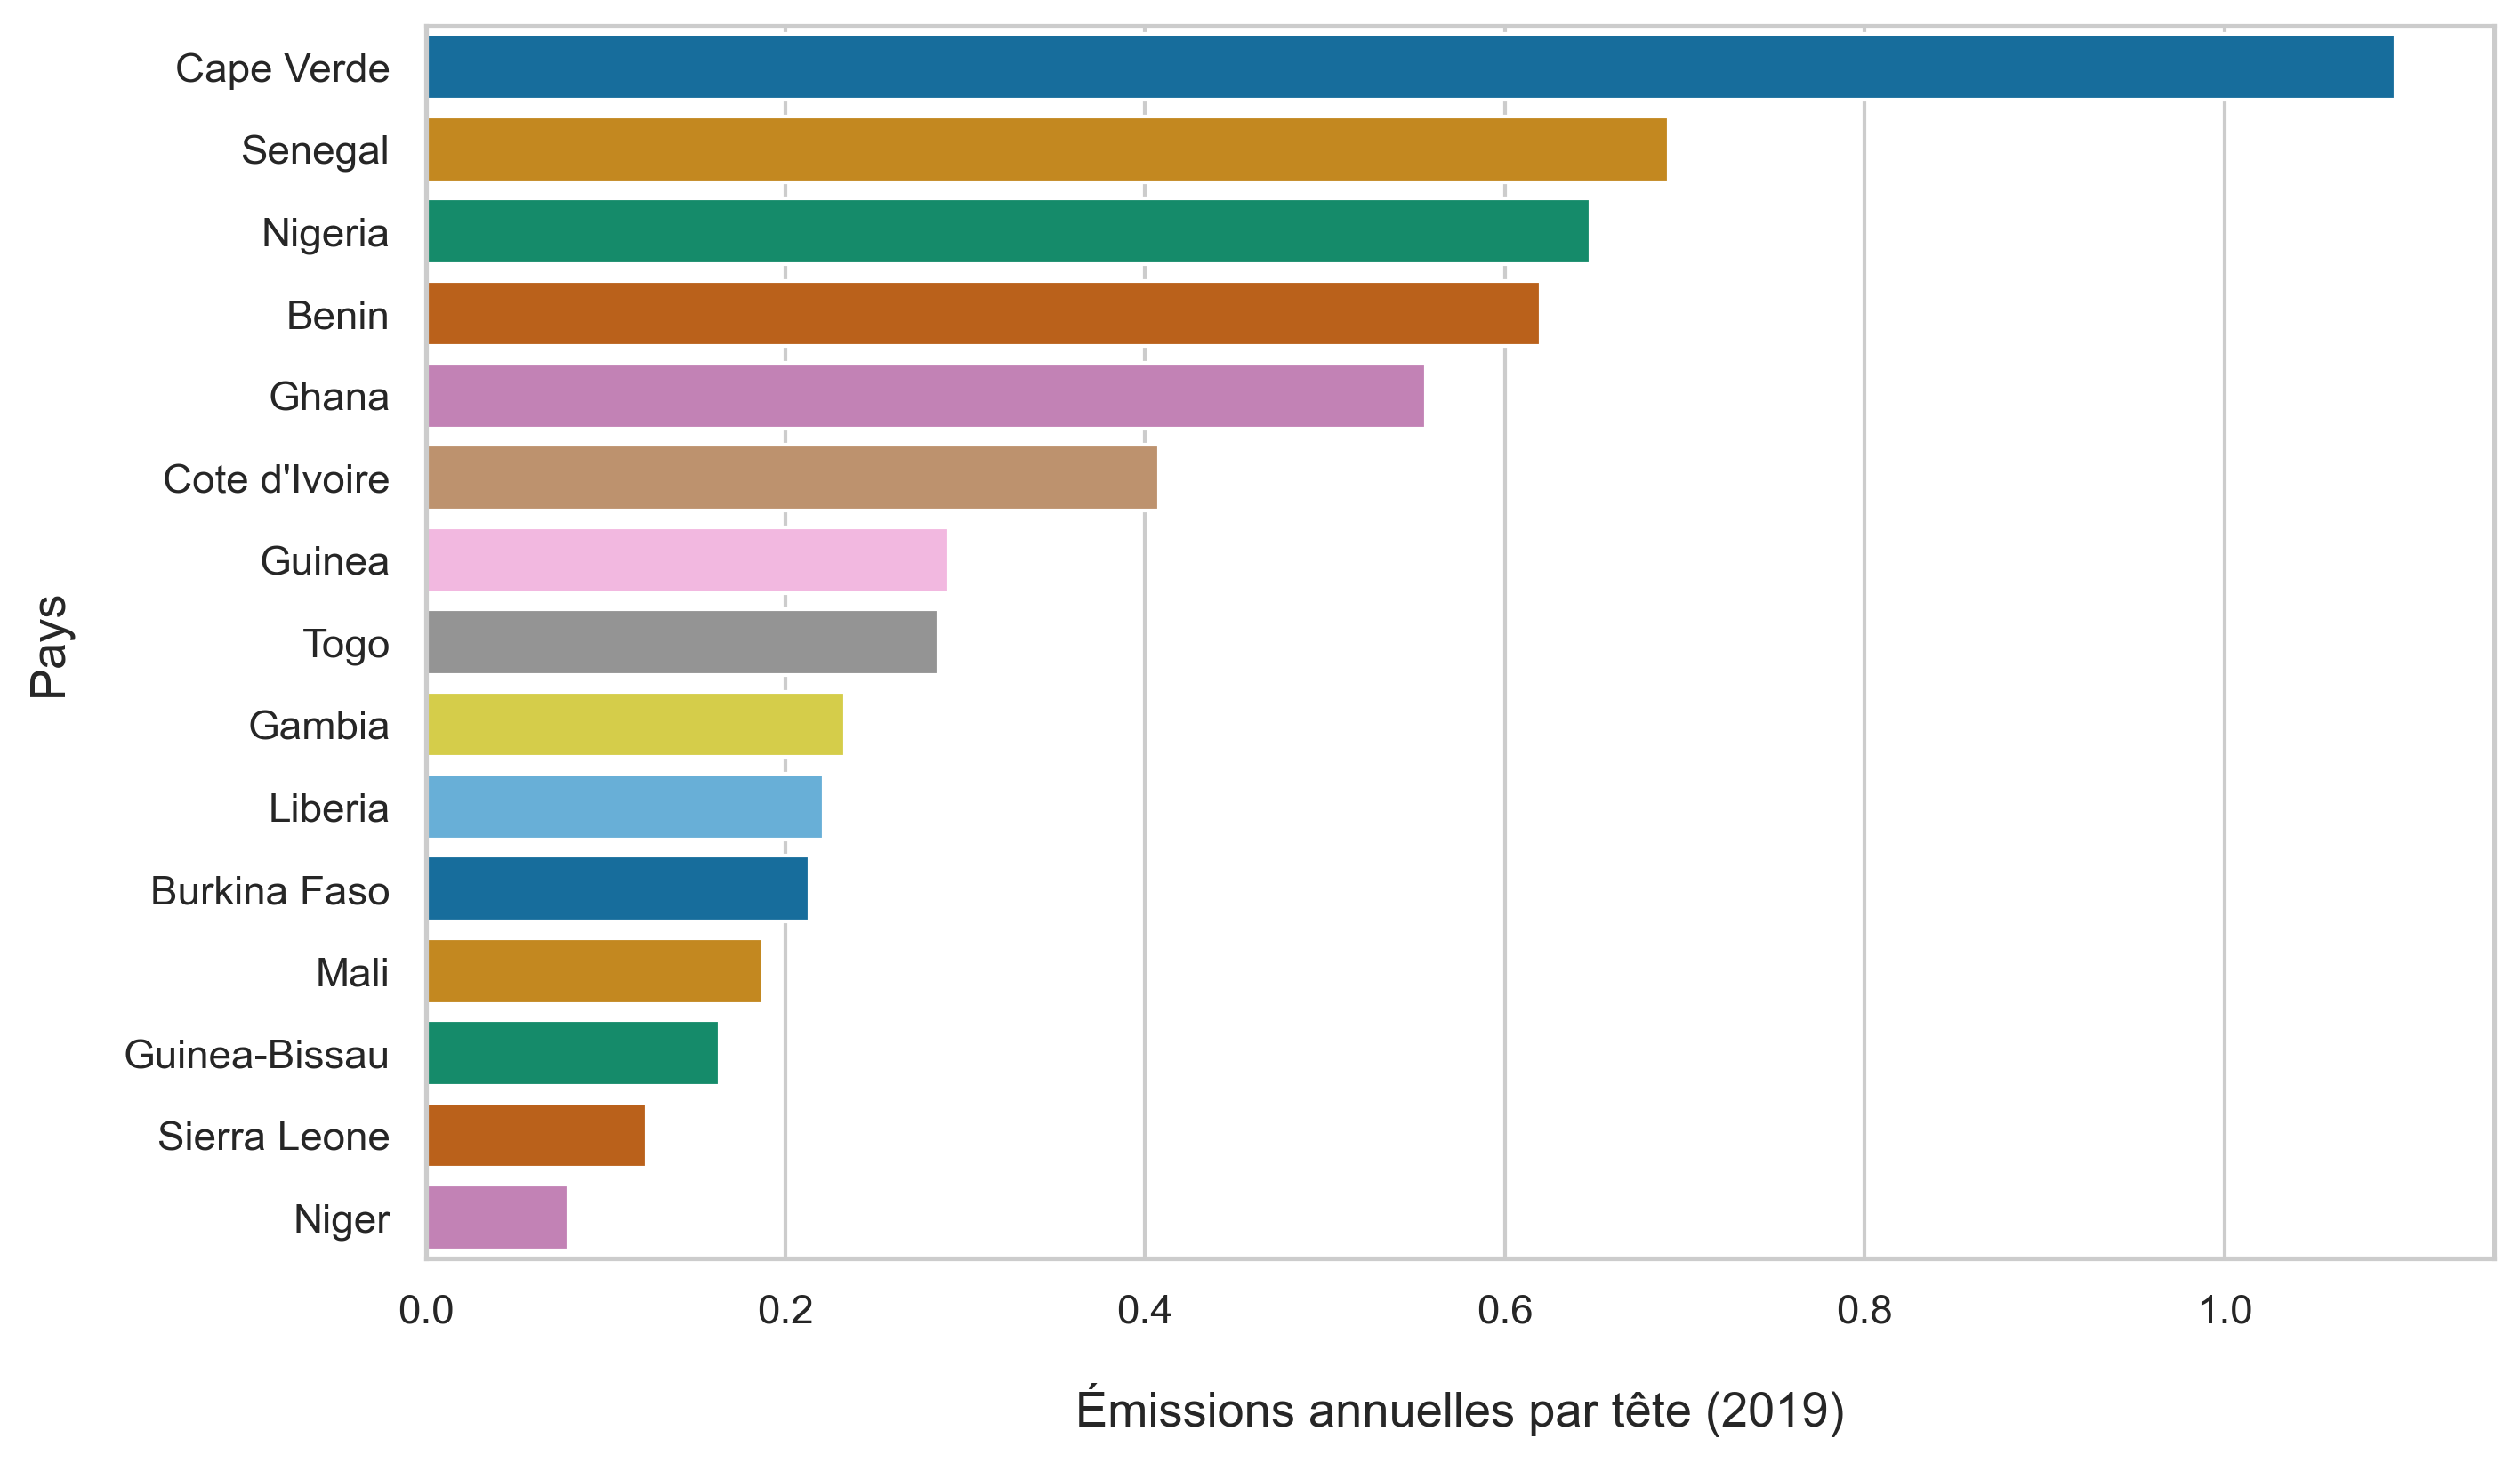

In [181]:
plt.figure(figsize=(10,6), dpi=300)
colors3 = sns.color_palette('colorblind')[0:10]
sns.barplot(x='Annual CO2 emissions (per capita)', y='Entity', data=df_em_ao, palette=colors3)
plt.xlabel("Émissions annuelles par tête (2019)", loc='center', labelpad=14.0, fontsize=13)
plt.ylabel('Pays', labelpad=14.0, fontsize=13)

plt.savefig('Benin_emissions_tete.svg')

plt.show()

In [182]:
df.head()

Population       GDP_PPP  GDP_PPP_per_capita  \
Year                                                 
2000   6865946.0  1.701531e+10         2478.218238   
2001   7076728.0  1.792276e+10         2532.634052   
2002   7295400.0  1.875492e+10         2570.787304   
2003   7520556.0  1.940076e+10         2579.697807   
2004   7750003.0  2.026015e+10         2614.212455   

      Total_greenhouse_gas_em_kt  PM25_%_pop_exposed_exceeding_T1  \
Year                                                                
2000                 7030.000210                         43.10186   
2001                 6500.000000                              NaN   
2002                 7530.000210                              NaN   
2003                 7500.000000                              NaN   
2004                 7590.000153                              NaN   

      PM25_mean_annual_exposure  Forest_area_%_land  Urban_pop_%_total  \
Year                                                                     
2000                  39.776293           36.672136             38.333   
2001                        NaN           36.228716             38.650   
2002                        NaN           35.785296             39.036   
2003                        NaN           35.341877             39.536   
2004                        NaN           34.898457             40.039   

      mean_annual_temp  mean_annual_prec  
Year                                      
2000             27.84            961.84  
2001             28.01            846.08  
2002             28.06           1021.21  
2003             28.15           1199.85  
2004             28.00           1041.47

In [183]:
df[['PM25_mean_annual_exposure']]

PM25_mean_annual_exposure
Year                           
2000                  39.776293
2001                        NaN
2002                        NaN
2003                        NaN
2004                        NaN
2005                  34.328809
2006                        NaN
2007                        NaN
2008                        NaN
2009                        NaN
2010                  32.392969
2011                  32.580846
2012                  31.992000
2013                  31.443299
2014                  29.660456
2015                  40.470683
2016                  38.447704
2017                  38.999959
2018                        NaN
2019                        NaN

In [184]:
df[['PM25_mean_annual_exposure']]

PM25_mean_annual_exposure
Year                           
2000                  39.776293
2001                        NaN
2002                        NaN
2003                        NaN
2004                        NaN
2005                  34.328809
2006                        NaN
2007                        NaN
2008                        NaN
2009                        NaN
2010                  32.392969
2011                  32.580846
2012                  31.992000
2013                  31.443299
2014                  29.660456
2015                  40.470683
2016                  38.447704
2017                  38.999959
2018                        NaN
2019                        NaN

In [185]:
pm25_mean_2000_2005 = df[['PM25_mean_annual_exposure']].loc[2000:2005].mean()
pm25_mean_2005_2009 = df[['PM25_mean_annual_exposure']].loc[2005:2010].mean()
pm25_mean_2005_2009

PM25_mean_annual_exposure    33.360889
dtype: float64

In [186]:
# remplacer les valeurs par la moyenne ; imputation des valeurs manquantes
dfbis = df.copy()
dfbis = dfbis.reset_index()
dfbis.columns
dfbis[dfbis['Year']==2001]
#income_pop_by_country.loc[income_pop_by_country['country']=='LTU','population']=3198231.0

# imputation par la moyenne 
dfbis.loc[dfbis['Year']==2001,'PM25_mean_annual_exposure']=37.05
dfbis.loc[dfbis['Year']==2002,'PM25_mean_annual_exposure']=37.05
dfbis.loc[dfbis['Year']==2003,'PM25_mean_annual_exposure']=37.05
dfbis.loc[dfbis['Year']==2004,'PM25_mean_annual_exposure']=37.05
dfbis.loc[dfbis['Year']==2006,'PM25_mean_annual_exposure']=33.36
dfbis.loc[dfbis['Year']==2007,'PM25_mean_annual_exposure']=33.36
dfbis.loc[dfbis['Year']==2008,'PM25_mean_annual_exposure']=33.36
dfbis.loc[dfbis['Year']==2009,'PM25_mean_annual_exposure']=33.36
dfbis

Year  Population       GDP_PPP  GDP_PPP_per_capita  \
0   2000   6865946.0  1.701531e+10         2478.218238   
1   2001   7076728.0  1.792276e+10         2532.634052   
2   2002   7295400.0  1.875492e+10         2570.787304   
3   2003   7520556.0  1.940076e+10         2579.697807   
4   2004   7750003.0  2.026015e+10         2614.212455   
5   2005   7982223.0  2.060724e+10         2581.642252   
6   2006   8216893.0  2.141994e+10         2606.817449   
7   2007   8454790.0  2.270221e+10         2685.130261   
8   2008   8696915.0  2.381384e+10         2738.194385   
9   2009   8944713.0  2.436616e+10         2724.084767   
10  2010   9199254.0  2.488127e+10         2704.705484   
11  2011   9460829.0  2.561869e+10         2707.869700   
12  2012   9729254.0  2.685126e+10         2759.848256   
13  2013  10004594.0  2.878226e+10         2876.903909   
14  2014  10286839.0  3.061214e+10         2975.854782   
15  2015  10575962.0  3.115647e+10         2945.970221   
16  2016  10872072.0  3.219699e+10         2961.440416   
17  2017  11175192.0  3.402306e+10         3044.517156   
18  2018  11485035.0  3.630168e+10         3160.780670   
19  2019  11801151.0  3.879404e+10         3287.309538   

    Total_greenhouse_gas_em_kt  PM25_%_pop_exposed_exceeding_T1  \
0                  7030.000210                        43.101860   
1                  6500.000000                              NaN   
2                  7530.000210                              NaN   
3                  7500.000000                              NaN   
4                  7590.000153                              NaN   
5                  8619.999886                        35.631567   
6                  8909.999847                              NaN   
7                  9649.999619                              NaN   
8                  9399.999619                              NaN   
9                 10029.999733                              NaN   
10                10479.999542                        34.436903   
11                10550.000191                        35.198308   
12                10529.999733                        37.075004   
13                11159.999847                        33.746960   
14                11699.999809                        33.441739   
15                12119.999886                        48.406880   
16                13819.999695                        45.119154   
17                13970.000267                        45.219999   
18                15090.000153                              NaN   
19                15020.000458                              NaN   

    PM25_mean_annual_exposure  Forest_area_%_land  Urban_pop_%_total  \
0                   39.776293           36.672136             38.333   
1                   37.050000           36.228716             38.650   
2                   37.050000           35.785296             39.036   
3                   37.050000           35.341877             39.536   
4                   37.050000           34.898457             40.039   
5                   34.328809           34.455037             40.543   
6                   33.360000           34.011618             41.049   
7                   33.360000           33.568198             41.558   
8                   33.360000           33.124778             42.069   
9                   33.360000           32.681359             42.580   
10                  32.392969           32.237939             43.093   
11                  32.580846           31.794519             43.608   
12                  31.992000           31.351100             44.125   
13                  31.443299           30.907680             44.642   
14                  29.660456           30.464260             45.166   
15                  40.470683           30.020841             45.695   
16                  38.447704           29.577421             46.229   
17                  38.999959           29.134001             46.768   
18       

In [187]:
# imputation par les données des années 2018 et 2019

dfbis.loc[dfbis['Year']==2018,'PM25_mean_annual_exposure']=39
dfbis.loc[dfbis['Year']==2019,'PM25_mean_annual_exposure']=39
dfbis

Year  Population       GDP_PPP  GDP_PPP_per_capita  \
0   2000   6865946.0  1.701531e+10         2478.218238   
1   2001   7076728.0  1.792276e+10         2532.634052   
2   2002   7295400.0  1.875492e+10         2570.787304   
3   2003   7520556.0  1.940076e+10         2579.697807   
4   2004   7750003.0  2.026015e+10         2614.212455   
5   2005   7982223.0  2.060724e+10         2581.642252   
6   2006   8216893.0  2.141994e+10         2606.817449   
7   2007   8454790.0  2.270221e+10         2685.130261   
8   2008   8696915.0  2.381384e+10         2738.194385   
9   2009   8944713.0  2.436616e+10         2724.084767   
10  2010   9199254.0  2.488127e+10         2704.705484   
11  2011   9460829.0  2.561869e+10         2707.869700   
12  2012   9729254.0  2.685126e+10         2759.848256   
13  2013  10004594.0  2.878226e+10         2876.903909   
14  2014  10286839.0  3.061214e+10         2975.854782   
15  2015  10575962.0  3.115647e+10         2945.970221   
16  2016  10872072.0  3.219699e+10         2961.440416   
17  2017  11175192.0  3.402306e+10         3044.517156   
18  2018  11485035.0  3.630168e+10         3160.780670   
19  2019  11801151.0  3.879404e+10         3287.309538   

    Total_greenhouse_gas_em_kt  PM25_%_pop_exposed_exceeding_T1  \
0                  7030.000210                        43.101860   
1                  6500.000000                              NaN   
2                  7530.000210                              NaN   
3                  7500.000000                              NaN   
4                  7590.000153                              NaN   
5                  8619.999886                        35.631567   
6                  8909.999847                              NaN   
7                  9649.999619                              NaN   
8                  9399.999619                              NaN   
9                 10029.999733                              NaN   
10                10479.999542                        34.436903   
11                10550.000191                        35.198308   
12                10529.999733                        37.075004   
13                11159.999847                        33.746960   
14                11699.999809                        33.441739   
15                12119.999886                        48.406880   
16                13819.999695                        45.119154   
17                13970.000267                        45.219999   
18                15090.000153                              NaN   
19                15020.000458                              NaN   

    PM25_mean_annual_exposure  Forest_area_%_land  Urban_pop_%_total  \
0                   39.776293           36.672136             38.333   
1                   37.050000           36.228716             38.650   
2                   37.050000           35.785296             39.036   
3                   37.050000           35.341877             39.536   
4                   37.050000           34.898457             40.039   
5                   34.328809           34.455037             40.543   
6                   33.360000           34.011618             41.049   
7                   33.360000           33.568198             41.558   
8                   33.360000           33.124778             42.069   
9                   33.360000           32.681359             42.580   
10                  32.392969           32.237939             43.093   
11                  32.580846           31.794519             43.608   
12                  31.992000           31.351100             44.125   
13                  31.443299           30.907680             44.642   
14                  29.660456           30.464260             45.166   
15                  40.470683           30.020841             45.695   
16                  38.447704           29.577421             46.229   
17                  38.999959           29.134001             46.768   
18       

In [188]:
#dfbis.loc[dfbis['Year']]

In [189]:
GDP_gh_pm = df[['GDP_PPP','Total_greenhouse_gas_em_kt', 'PM25_mean_annual_exposure']]
GDP_gh_pm 

GDP_PPP  Total_greenhouse_gas_em_kt  PM25_mean_annual_exposure
Year                                                                     
2000  1.701531e+10                 7030.000210                  39.776293
2001  1.792276e+10                 6500.000000                        NaN
2002  1.875492e+10                 7530.000210                        NaN
2003  1.940076e+10                 7500.000000                        NaN
2004  2.026015e+10                 7590.000153                        NaN
2005  2.060724e+10                 8619.999886                  34.328809
2006  2.141994e+10                 8909.999847                        NaN
2007  2.270221e+10                 9649.999619                        NaN
2008  2.381384e+10                 9399.999619                        NaN
2009  2.436616e+10                10029.999733                        NaN
2010  2.488127e+10                10479.999542                  32.392969
2011  2.561869e+10                10550.000191                  32.580846
2012  2.685126e+10                10529.999733                  31.992000
2013  2.878226e+10                11159.999847                  31.443299
2014  3.061214e+10                11699.999809                  29.660456
2015  3.115647e+10                12119.999886                  40.470683
2016  3.219699e+10                13819.999695                  38.447704
2017  3.402306e+10                13970.000267                  38.999959
2018  3.630168e+10                15090.000153                        NaN
2019  3.879404e+10                15020.000458                        NaN

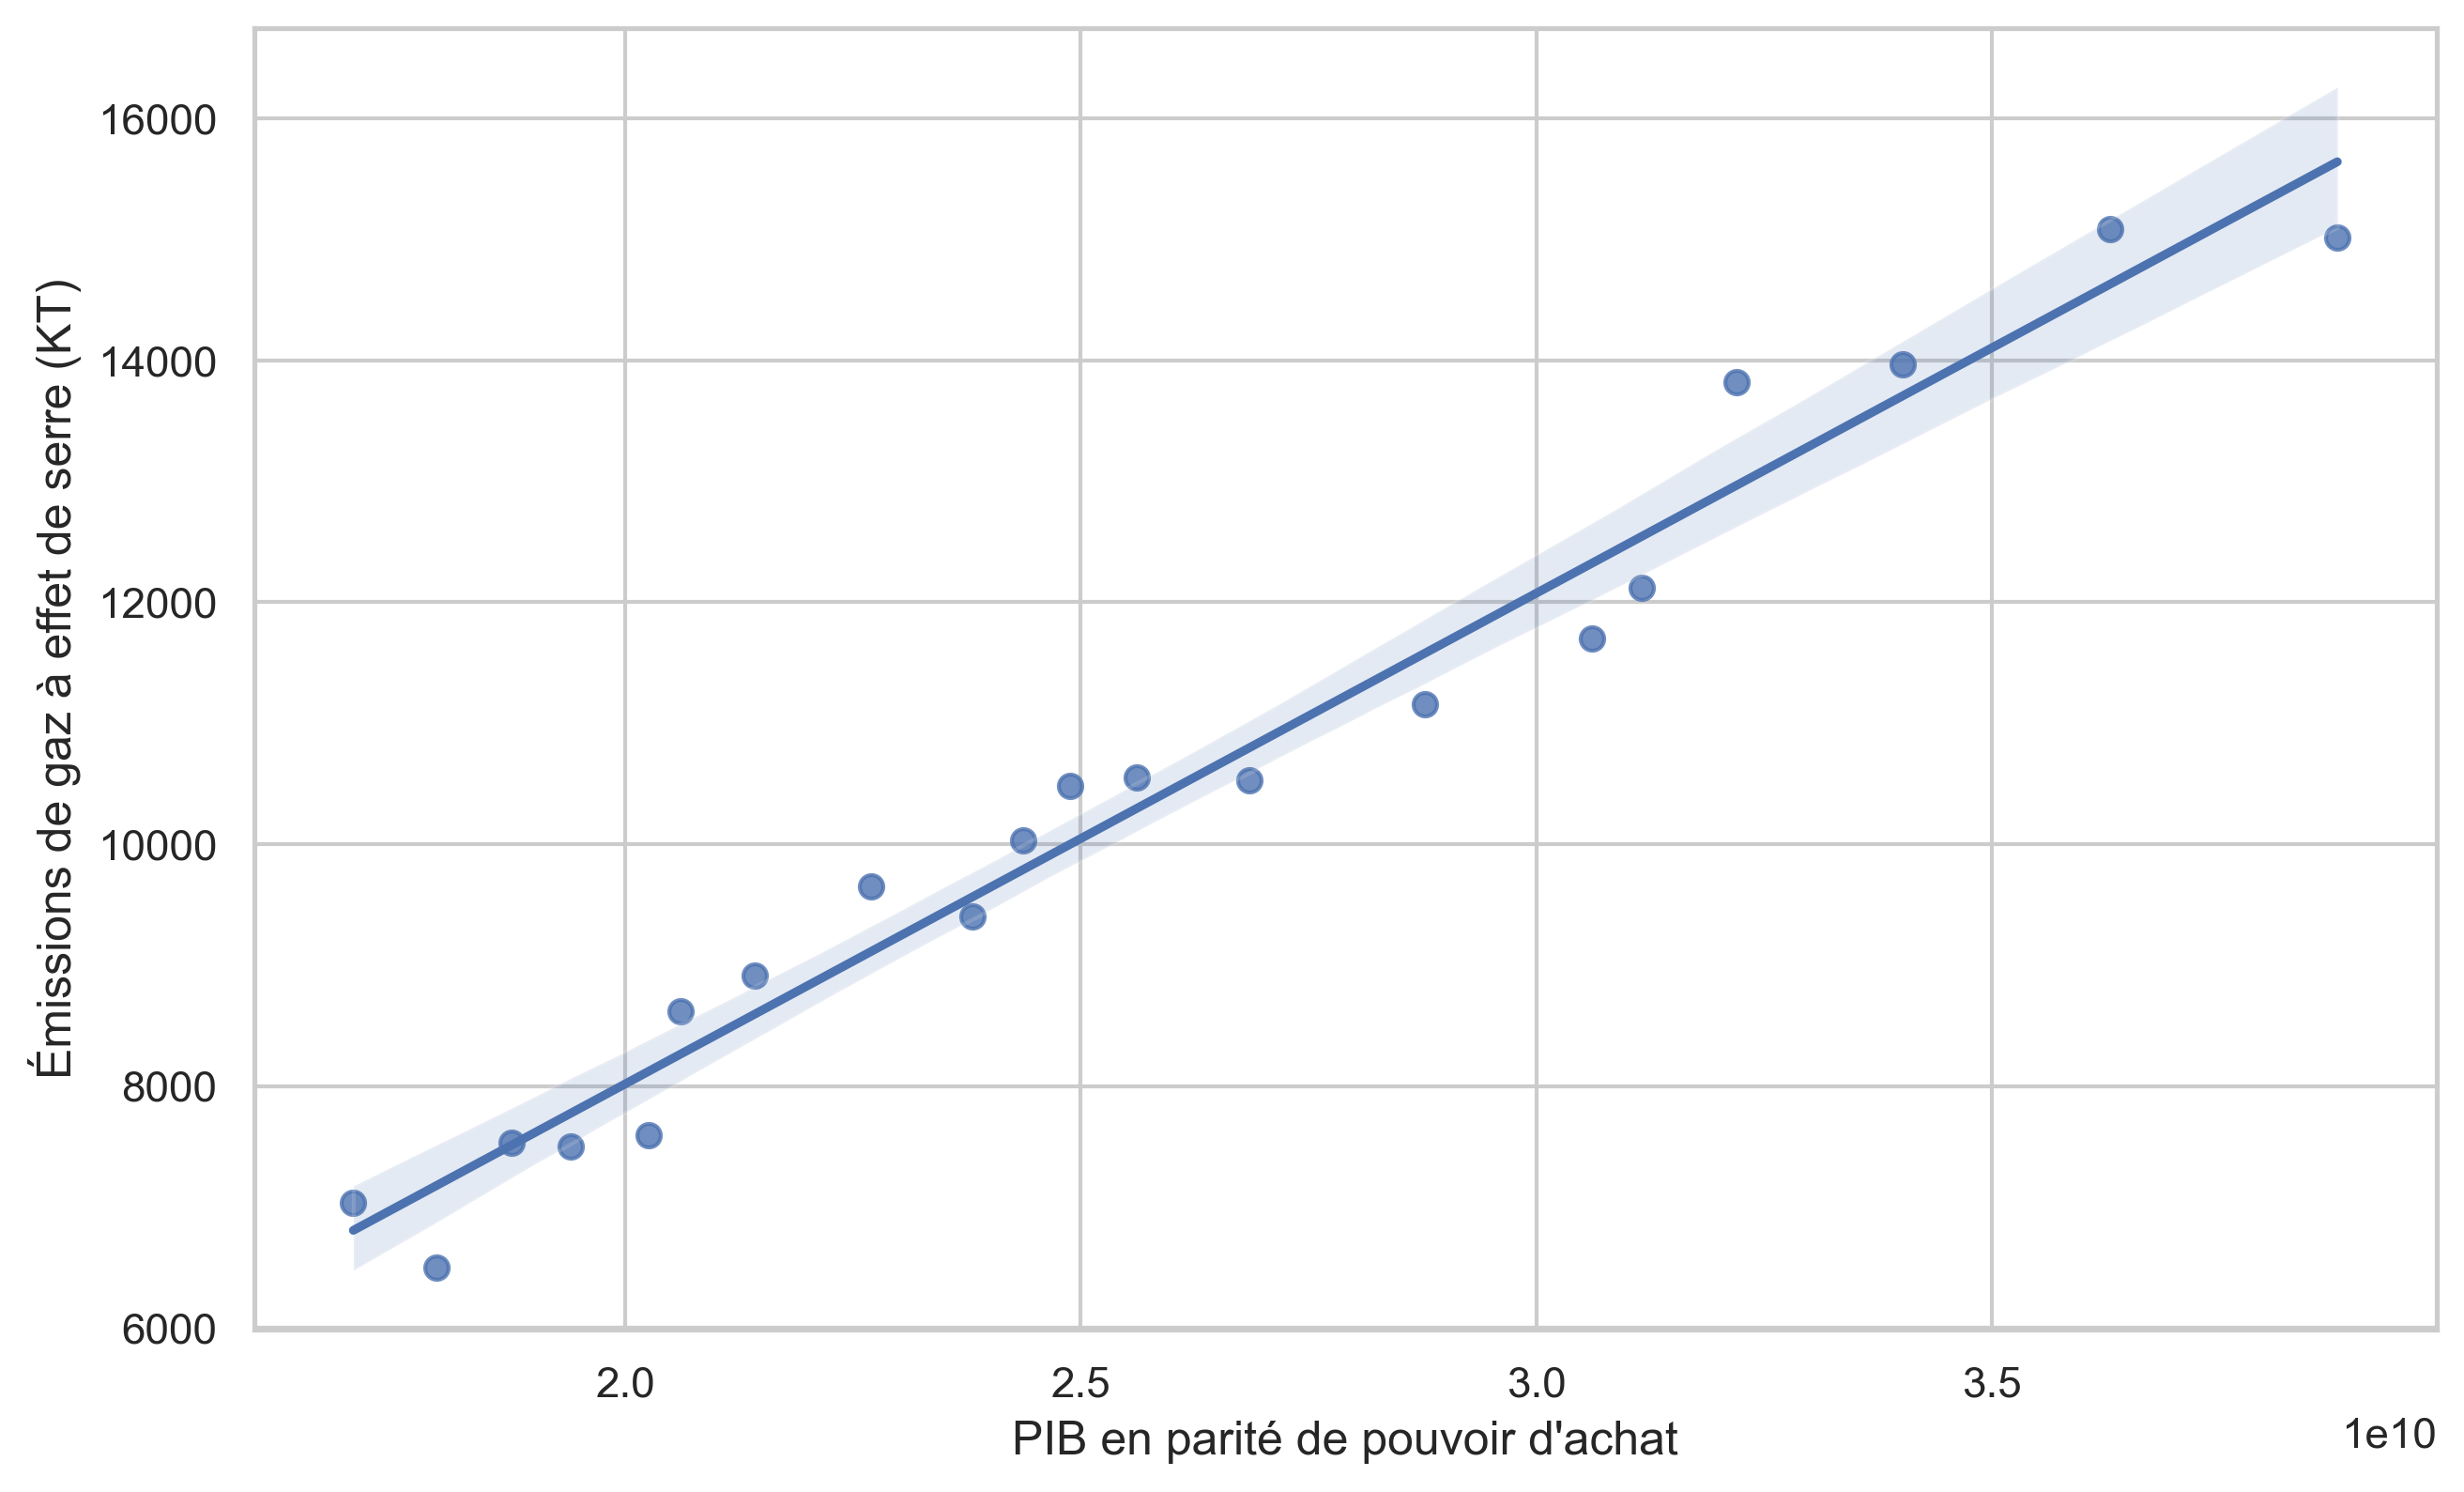

In [190]:
plt.figure(figsize=(10,6), dpi=300)
sns.regplot(x='GDP_PPP',y='Total_greenhouse_gas_em_kt',data=GDP_gh_pm)
plt.xlabel("PIB en parité de pouvoir d'achat")
plt.ylabel("Émissions de gaz à effet de serre (KT)")

plt.savefig('Emissions_GES_PIB.svg')

plt.show()

In [191]:
reg2 = smf.ols('Total_greenhouse_gas_em_kt~GDP_PPP', data=GDP_gh_pm).fit()
print(reg2.summary())

                                OLS Regression Results                                
Dep. Variable:     Total_greenhouse_gas_em_kt   R-squared:                       0.970
Model:                                    OLS   Adj. R-squared:                  0.968
Method:                         Least Squares   F-statistic:                     576.4
Date:                        Sun, 30 Jul 2023   Prob (F-statistic):           4.03e-15
Time:                                20:53:53   Log-Likelihood:                -150.37
No. Observations:                          20   AIC:                             304.7
Df Residuals:                              18   BIC:                             306.7
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

<AxesSubplot:xlabel='GDP_PPP', ylabel='PM25_mean_annual_exposure'>

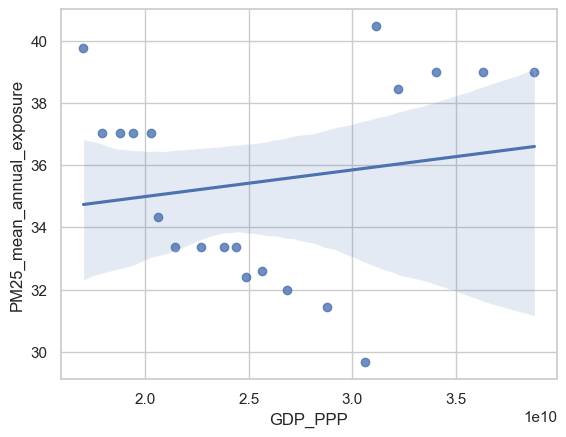

In [192]:
sns.regplot(x='GDP_PPP', y='PM25_mean_annual_exposure', data=dfbis)

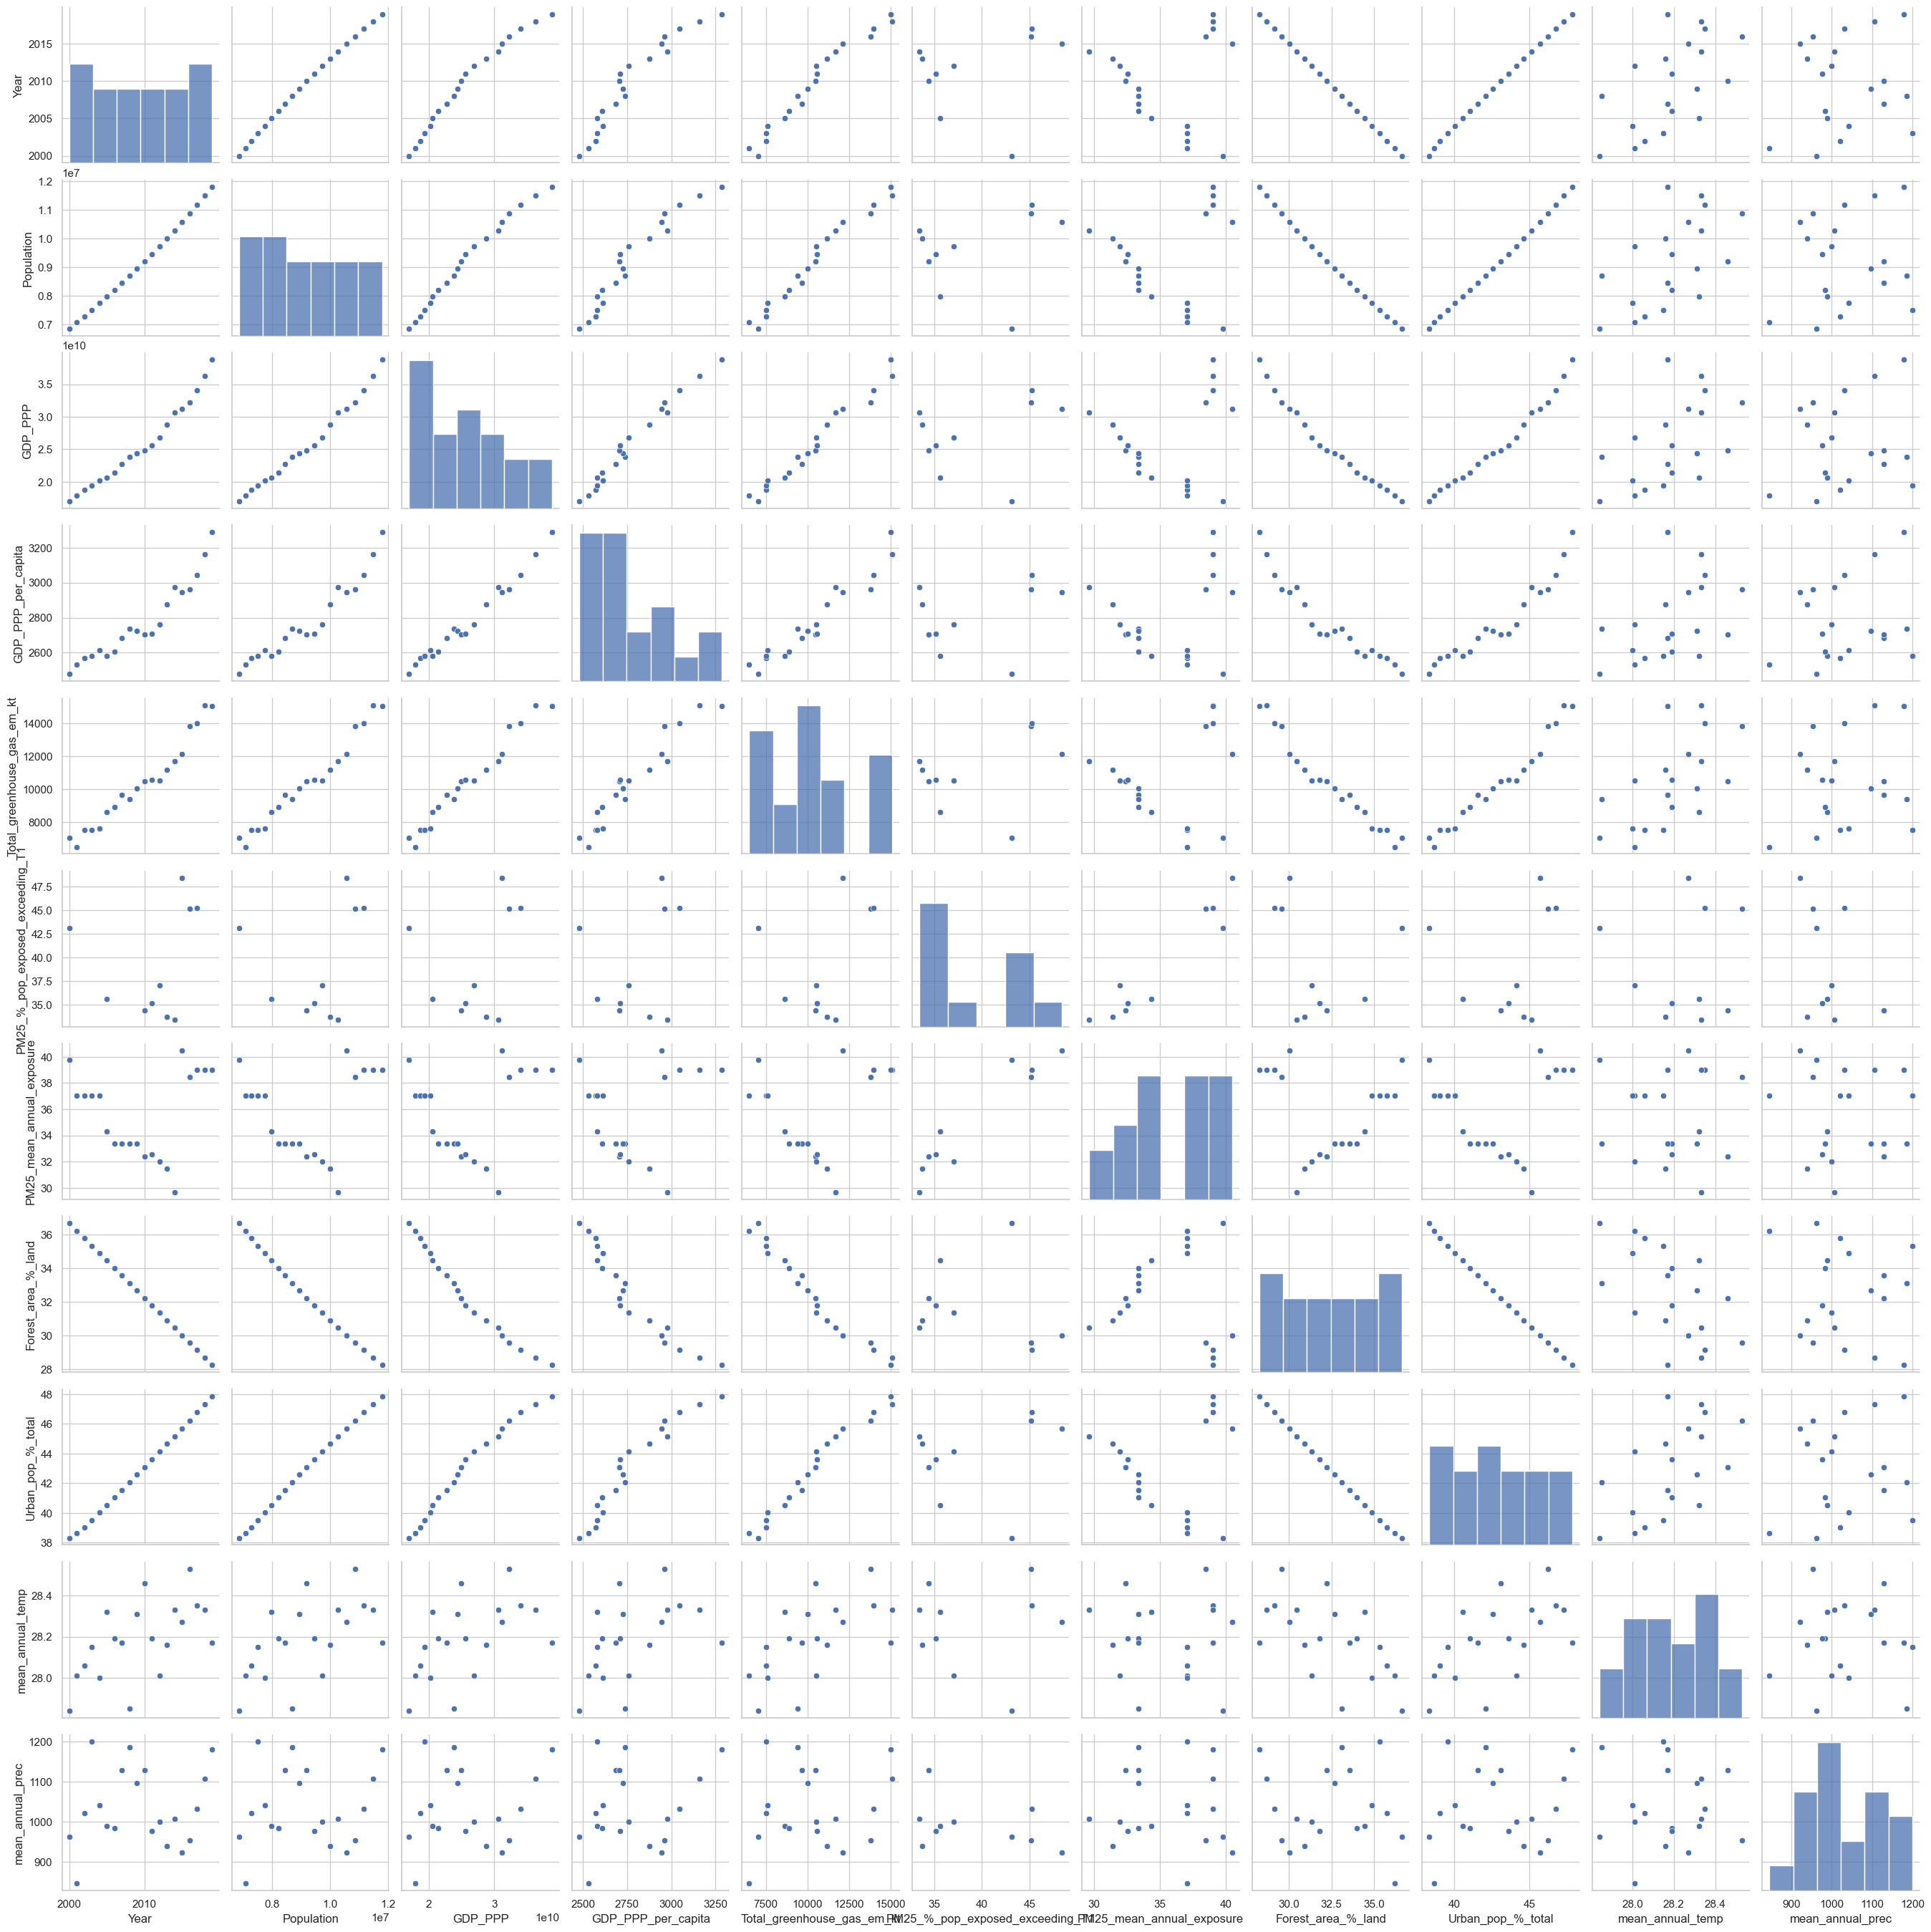

In [193]:
sns.pairplot(dfbis)

In [194]:
df

Population       GDP_PPP  GDP_PPP_per_capita  \
Year                                                 
2000   6865946.0  1.701531e+10         2478.218238   
2001   7076728.0  1.792276e+10         2532.634052   
2002   7295400.0  1.875492e+10         2570.787304   
2003   7520556.0  1.940076e+10         2579.697807   
2004   7750003.0  2.026015e+10         2614.212455   
2005   7982223.0  2.060724e+10         2581.642252   
2006   8216893.0  2.141994e+10         2606.817449   
2007   8454790.0  2.270221e+10         2685.130261   
2008   8696915.0  2.381384e+10         2738.194385   
2009   8944713.0  2.436616e+10         2724.084767   
2010   9199254.0  2.488127e+10         2704.705484   
2011   9460829.0  2.561869e+10         2707.869700   
2012   9729254.0  2.685126e+10         2759.848256   
2013  10004594.0  2.878226e+10         2876.903909   
2014  10286839.0  3.061214e+10         2975.854782   
2015  10575962.0  3.115647e+10         2945.970221   
2016  10872072.0  3.219699e+10         2961.440416   
2017  11175192.0  3.402306e+10         3044.517156   
2018  11485035.0  3.630168e+10         3160.780670   
2019  11801151.0  3.879404e+10         3287.309538   

      Total_greenhouse_gas_em_kt  PM25_%_pop_exposed_exceeding_T1  \
Year                                                                
2000                 7030.000210                        43.101860   
2001                 6500.000000                              NaN   
2002                 7530.000210                              NaN   
2003                 7500.000000                              NaN   
2004                 7590.000153                              NaN   
2005                 8619.999886                        35.631567   
2006                 8909.999847                              NaN   
2007                 9649.999619                              NaN   
2008                 9399.999619                              NaN   
2009                10029.999733                              NaN   
2010                10479.999542                        34.436903   
2011                10550.000191                        35.198308   
2012                10529.999733                        37.075004   
2013                11159.999847                        33.746960   
2014                11699.999809                        33.441739   
2015                12119.999886                        48.406880   
2016                13819.999695                        45.119154   
2017                13970.000267                        45.219999   
2018                15090.000153                              NaN   
2019                15020.000458                              NaN   

      PM25_mean_annual_exposure  Forest_area_%_land  Urban_pop_%_total  \
Year                                                                     
2000                  39.776293           36.672136             38.333   
2001                        NaN           36.228716             38.650   
2002                        NaN           35.785296             39.036   
2003                        NaN           35.341877             39.536   
2004                        NaN           34.898457             40.039   
2005                  34.328809           34.455037             40.543   
2006                        NaN           34.011618             41.049   
2007                        NaN           33.568198             41.558   
2008                        NaN           33.124778             42.069   
2009                        NaN           32.681359             42.580   
2010                  32.392969           32.237939             43.093   
2011                  32.580846           31.794519             43.608   
2012                  31.992000           31.351100             44.125   
2013                  31.443299           30.907680             44.642   
2014                  29.660456           30.464260             45.166   
2015                  40.470683         

<AxesSubplot:xlabel='Count', ylabel='Forest_area_%_land'>

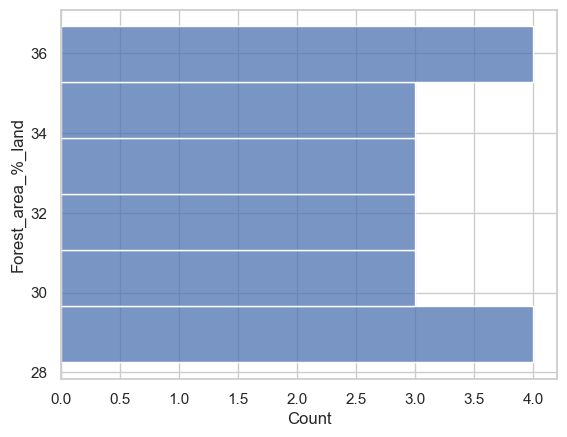

In [195]:
forest = dfbis[['Year','Forest_area_%_land']]
sns.histplot(data=forest, y='Forest_area_%_land')

In [196]:
dfbis

Year  Population       GDP_PPP  GDP_PPP_per_capita  \
0   2000   6865946.0  1.701531e+10         2478.218238   
1   2001   7076728.0  1.792276e+10         2532.634052   
2   2002   7295400.0  1.875492e+10         2570.787304   
3   2003   7520556.0  1.940076e+10         2579.697807   
4   2004   7750003.0  2.026015e+10         2614.212455   
5   2005   7982223.0  2.060724e+10         2581.642252   
6   2006   8216893.0  2.141994e+10         2606.817449   
7   2007   8454790.0  2.270221e+10         2685.130261   
8   2008   8696915.0  2.381384e+10         2738.194385   
9   2009   8944713.0  2.436616e+10         2724.084767   
10  2010   9199254.0  2.488127e+10         2704.705484   
11  2011   9460829.0  2.561869e+10         2707.869700   
12  2012   9729254.0  2.685126e+10         2759.848256   
13  2013  10004594.0  2.878226e+10         2876.903909   
14  2014  10286839.0  3.061214e+10         2975.854782   
15  2015  10575962.0  3.115647e+10         2945.970221   
16  2016  10872072.0  3.219699e+10         2961.440416   
17  2017  11175192.0  3.402306e+10         3044.517156   
18  2018  11485035.0  3.630168e+10         3160.780670   
19  2019  11801151.0  3.879404e+10         3287.309538   

    Total_greenhouse_gas_em_kt  PM25_%_pop_exposed_exceeding_T1  \
0                  7030.000210                        43.101860   
1                  6500.000000                              NaN   
2                  7530.000210                              NaN   
3                  7500.000000                              NaN   
4                  7590.000153                              NaN   
5                  8619.999886                        35.631567   
6                  8909.999847                              NaN   
7                  9649.999619                              NaN   
8                  9399.999619                              NaN   
9                 10029.999733                              NaN   
10                10479.999542                        34.436903   
11                10550.000191                        35.198308   
12                10529.999733                        37.075004   
13                11159.999847                        33.746960   
14                11699.999809                        33.441739   
15                12119.999886                        48.406880   
16                13819.999695                        45.119154   
17                13970.000267                        45.219999   
18                15090.000153                              NaN   
19                15020.000458                              NaN   

    PM25_mean_annual_exposure  Forest_area_%_land  Urban_pop_%_total  \
0                   39.776293           36.672136             38.333   
1                   37.050000           36.228716             38.650   
2                   37.050000           35.785296             39.036   
3                   37.050000           35.341877             39.536   
4                   37.050000           34.898457             40.039   
5                   34.328809           34.455037             40.543   
6                   33.360000           34.011618             41.049   
7                   33.360000           33.568198             41.558   
8                   33.360000           33.124778             42.069   
9                   33.360000           32.681359             42.580   
10                  32.392969           32.237939             43.093   
11                  32.580846           31.794519             43.608   
12                  31.992000           31.351100             44.125   
13                  31.443299           30.907680             44.642   
14                  29.660456           30.464260             45.166   
15                  40.470683           30.020841             45.695   
16                  38.447704           29.577421             46.229   
17                  38.999959           29.134001             46.768   
18       

In [197]:
# pourcentage des secteurs dans le PIB au fil des ans 
# Histogramme pour la réprésentation graphique

# Données 
agri = pd.read_csv('DATA/agri_PIB_VA.csv', header=2, sep=',')
industrie = pd.read_csv('DATA/industrie_PIB_VA.csv', header=2)

In [198]:
agri.head()

Country Name Country Code                          Indicator Name  \
0        Aruba          ABW  Agriculture, valeur ajoutée (% du PIB)   
1          NaN          AFE  Agriculture, valeur ajoutée (% du PIB)   
2  Afghanistan          AFG  Agriculture, valeur ajoutée (% du PIB)   
3          NaN          AFW  Agriculture, valeur ajoutée (% du PIB)   
4       Angola          AGO  Agriculture, valeur ajoutée (% du PIB)   

   Indicator Code  1960  1961  1962  1963  1964  1965  ...       2013  \
0  NV.AGR.TOTL.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...        NaN   
1  NV.AGR.TOTL.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...  11.593275   
2  NV.AGR.TOTL.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...  22.810663   
3  NV.AGR.TOTL.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...  20.126665   
4  NV.AGR.TOTL.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...   6.507492   

        2014       2015       2016       2017       2018       2019  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1  12.522407  13.560281  13.720887  13.441330  12.086055  12.708430   
2  22.137041  20.634323  25.740314  26.420199  22.042897  25.773971   
3  19.652326  20.590014  21.006150  20.805171  20.931421  21.284031   
4   7.547057   9.122534   9.831169  10.016996   8.607742   7.882625   

        2020       2021  Unnamed: 66  
0        NaN        NaN          NaN  
1  14.660148  13.282240          NaN  
2  26.820600        NaN          NaN  
3  22.970724  22.206098          NaN  
4   9.110107   9.016304          NaN  

[5 rows x 67 columns]

In [199]:
industrie.head()

Country Name Country Code                        Indicator Name  \
0        Aruba          ABW  Industrie, valeur ajoutée (% du PIB)   
1          NaN          AFE  Industrie, valeur ajoutée (% du PIB)   
2  Afghanistan          AFG  Industrie, valeur ajoutée (% du PIB)   
3          NaN          AFW  Industrie, valeur ajoutée (% du PIB)   
4       Angola          AGO  Industrie, valeur ajoutée (% du PIB)   

   Indicator Code  1960  1961  1962  1963  1964  1965  ...       2013  \
0  NV.IND.TOTL.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...        NaN   
1  NV.IND.TOTL.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...  27.580204   
2  NV.IND.TOTL.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...  20.444605   
3  NV.IND.TOTL.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...  28.253403   
4  NV.IND.TOTL.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...  53.362852   

        2014       2015       2016       2017       2018       2019  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1  26.977380  24.805267  24.463397  24.531059  26.533601  26.403967   
2  21.229663  22.124042  10.466808  10.051874  13.387247  14.058112   
3  26.904888  22.611531  21.034257  24.128654  26.437118  27.143541   
4  46.203326  41.933092  42.643568  42.167954  47.931542  49.760921   

        2020       2021  Unnamed: 66  
0        NaN        NaN          NaN  
1  25.714514  25.840708          NaN  
2  14.031699        NaN          NaN  
3  27.358551  29.163412          NaN  
4  45.729022  43.385097          NaN  

[5 rows x 67 columns]

In [200]:
industrie['Country Name'].unique()

array(['Aruba', nan, 'Afghanistan', 'Angola', 'Albanie', 'Andorre',
       'Le monde arabe', 'Émirats arabes unis', 'Argentine', 'Arménie',
       'Samoa américaines', 'Antigua-et-Barbuda', 'Australie', 'Autriche',
       'Azerbaïdjan', 'Burundi', 'Belgique', 'Bénin', 'Burkina Faso',
       'Bangladesh', 'Bulgarie', 'Bahreïn', 'Bahamas',
       'Bosnie-Herzégovine', 'Bélarus', 'Belize', 'Bermudes', 'Bolivie',
       'Brésil', 'Barbade', 'Brunéi Darussalam', 'Bhoutan', 'Botswana',
       'République centrafricaine', 'Canada',
       'Europe centrale et les pays baltes', 'Suisse',
       'Îles Anglo-Normandes', 'Chili', 'Chine', "Côte d'Ivoire",
       'Cameroun', 'Congo, République démocratique du',
       'Congo, République du', 'Colombie', 'Comores', 'Cabo Verde',
       'Costa Rica', 'Petits états des Caraïbes', 'Cuba', 'Curacao',
       'Îles Caïmans', 'Chypre', 'République tchèque', 'Allemagne',
       'Djibouti', 'Dominique', 'Danemark', 'République dominicaine',
       'Algérie',

In [201]:
ben_agri = agri[agri['Country Name']=='Bénin']
ben_agri

Country Name Country Code                          Indicator Name  \
18        Bénin          BEN  Agriculture, valeur ajoutée (% du PIB)   

    Indicator Code       1960       1961       1962      1963       1964  \
18  NV.AGR.TOTL.ZS  46.157723  46.193786  44.709273  43.71837  45.528152   

         1965  ...       2013       2014       2015       2016       2017  \
18  44.619425  ...  25.275405  25.618453  26.392085  27.753635  28.489017   

         2018       2019       2020  2021  Unnamed: 66  
18  28.064774  26.875802  27.109175   NaN          NaN  

[1 rows x 67 columns]

In [202]:
ben_agri.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       'Unnamed: 66'],
      dtype='object')

In [203]:
ben_agri_from_2015 = ben_agri[['Country Name', 'Country Code', '2015', '2016', '2017', '2018', '2019']]
ben_agri_from_2015

Country Name Country Code       2015       2016       2017       2018  \
18        Bénin          BEN  26.392085  27.753635  28.489017  28.064774   

         2019  
18  26.875802

In [204]:
ben_industrie_from_2015 = industrie[industrie['Country Name']=='Bénin'][['Country Name', 'Country Code', '2015', '2016', '2017', '2018', '2019']]
ben_industrie_from_2015

Country Name Country Code       2015       2016       2017       2018  \
18        Bénin          BEN  16.385095  15.702068  15.107586  14.641957   

         2019  
18  16.312561

In [205]:
ben_agri_indu = pd.concat([ben_agri_from_2015, ben_industrie_from_2015])
ben_agri_indu 

Country Name Country Code       2015       2016       2017       2018  \
18        Bénin          BEN  26.392085  27.753635  28.489017  28.064774   
18        Bénin          BEN  16.385095  15.702068  15.107586  14.641957   

         2019  
18  26.875802  
18  16.312561

In [206]:
extract = ben_agri_indu.transpose().reset_index().loc[2:6]
extract

index         18         18
2  2015  26.392085  16.385095
3  2016  27.753635  15.702068
4  2017  28.489017  15.107586
5  2018  28.064774  14.641957
6  2019  26.875802  16.312561

In [207]:
extract.columns = ['annees', 'agriculture', 'industrie']
extract

annees agriculture  industrie
2   2015   26.392085  16.385095
3   2016   27.753635  15.702068
4   2017   28.489017  15.107586
5   2018   28.064774  14.641957
6   2019   26.875802  16.312561

In [208]:
extract['services'] = 100-(extract['agriculture']+extract['industrie'])
extract

annees agriculture  industrie   services
2   2015   26.392085  16.385095  57.222819
3   2016   27.753635  15.702068  56.544296
4   2017   28.489017  15.107586  56.403398
5   2018   28.064774  14.641957  57.293269
6   2019   26.875802  16.312561  56.811637

In [209]:
df4 = extract.transpose().reset_index().loc[1:3]
df4.columns = ['secteur','2015', '2016', '2017', '2018', '2019']
df4

secteur       2015       2016       2017       2018       2019
1  agriculture  26.392085  27.753635  28.489017  28.064774  26.875802
2    industrie  16.385095  15.702068  15.107586  14.641957  16.312561
3     services  57.222819  56.544296  56.403398  57.293269  56.811637

In [210]:
dfbis

Year  Population       GDP_PPP  GDP_PPP_per_capita  \
0   2000   6865946.0  1.701531e+10         2478.218238   
1   2001   7076728.0  1.792276e+10         2532.634052   
2   2002   7295400.0  1.875492e+10         2570.787304   
3   2003   7520556.0  1.940076e+10         2579.697807   
4   2004   7750003.0  2.026015e+10         2614.212455   
5   2005   7982223.0  2.060724e+10         2581.642252   
6   2006   8216893.0  2.141994e+10         2606.817449   
7   2007   8454790.0  2.270221e+10         2685.130261   
8   2008   8696915.0  2.381384e+10         2738.194385   
9   2009   8944713.0  2.436616e+10         2724.084767   
10  2010   9199254.0  2.488127e+10         2704.705484   
11  2011   9460829.0  2.561869e+10         2707.869700   
12  2012   9729254.0  2.685126e+10         2759.848256   
13  2013  10004594.0  2.878226e+10         2876.903909   
14  2014  10286839.0  3.061214e+10         2975.854782   
15  2015  10575962.0  3.115647e+10         2945.970221   
16  2016  10872072.0  3.219699e+10         2961.440416   
17  2017  11175192.0  3.402306e+10         3044.517156   
18  2018  11485035.0  3.630168e+10         3160.780670   
19  2019  11801151.0  3.879404e+10         3287.309538   

    Total_greenhouse_gas_em_kt  PM25_%_pop_exposed_exceeding_T1  \
0                  7030.000210                        43.101860   
1                  6500.000000                              NaN   
2                  7530.000210                              NaN   
3                  7500.000000                              NaN   
4                  7590.000153                              NaN   
5                  8619.999886                        35.631567   
6                  8909.999847                              NaN   
7                  9649.999619                              NaN   
8                  9399.999619                              NaN   
9                 10029.999733                              NaN   
10                10479.999542                        34.436903   
11                10550.000191                        35.198308   
12                10529.999733                        37.075004   
13                11159.999847                        33.746960   
14                11699.999809                        33.441739   
15                12119.999886                        48.406880   
16                13819.999695                        45.119154   
17                13970.000267                        45.219999   
18                15090.000153                              NaN   
19                15020.000458                              NaN   

    PM25_mean_annual_exposure  Forest_area_%_land  Urban_pop_%_total  \
0                   39.776293           36.672136             38.333   
1                   37.050000           36.228716             38.650   
2                   37.050000           35.785296             39.036   
3                   37.050000           35.341877             39.536   
4                   37.050000           34.898457             40.039   
5                   34.328809           34.455037             40.543   
6                   33.360000           34.011618             41.049   
7                   33.360000           33.568198             41.558   
8                   33.360000           33.124778             42.069   
9                   33.360000           32.681359             42.580   
10                  32.392969           32.237939             43.093   
11                  32.580846           31.794519             43.608   
12                  31.992000           31.351100             44.125   
13                  31.443299           30.907680             44.642   
14                  29.660456           30.464260             45.166   
15                  40.470683           30.020841             45.695   
16                  38.447704           29.577421             46.229   
17                  38.999959           29.134001             46.768   
18       

In [211]:
# histogramme pour les précipitations ?

benin_prec_all.columns

Index(['Year', 'mean_annual_prec', 'Alibori', 'Atlantique'], dtype='object')

In [212]:
hist_prec = benin_prec_all[['mean_annual_prec', 'Alibori', 'Atlantique']]
hist_prec

mean_annual_prec  Alibori  Atlantique
79            1011.27   893.11     1111.89
80             965.63   942.62      899.55
81             898.38   817.22     1174.63
82             753.38   715.67      766.77
83             925.31   735.05      913.20
84             984.91   875.03      967.16
85             943.80   922.65      832.21
86             949.67   757.40     1335.55
87            1161.14   991.26     1285.21
88            1080.61   918.99     1145.30
89             924.90   827.54      945.45
90            1207.55  1048.11     1255.40
91             942.84   902.37      901.39
92             930.19   792.50     1181.53
93            1105.74  1091.99      961.08
94            1116.41   870.68     1115.75
95            1056.29   988.78     1067.74
96             997.04   822.57     1262.32
97            1096.38  1095.89      932.69
98            1162.08  1007.36     1206.96
99             961.84   846.72      934.39
100            846.08   811.19      831.24
101           1021.21   904.17     1140.59
102           1199.85  1094.76     1213.09
103           1041.47   872.69     1182.50
104            988.65   954.62     1013.32
105            983.28   875.84     1063.29
106           1128.83   962.41     1285.47
107           1186.52  1029.06     1298.97
108           1096.71   970.42     1180.66
109           1128.68   936.59     1344.49
110            977.35   816.53     1126.21
111            999.65   848.05     1112.68
112            939.67   854.10     1067.41
113           1007.58   844.93     1208.93
114            922.35   855.58     1003.95
115            954.21   872.66     1007.60
116           1031.61  1025.89     1062.39
117           1106.88   958.95     1173.74
118           1179.57   951.79     1462.43

In [213]:
an = pd.DataFrame(annees).iloc[0:41]
an.columns = ['Year']
an

Year
0   1980
1   1981
2   1982
3   1983
4   1984
5   1985
6   1986
7   1987
8   1988
9   1989
10  1990
11  1991
12  1992
13  1993
14  1994
15  1995
16  1996
17  1997
18  1998
19  1999
20  2000
21  2001
22  2002
23  2003
24  2004
25  2005
26  2006
27  2007
28  2008
29  2009
30  2010
31  2011
32  2012
33  2013
34  2014
35  2015
36  2016
37  2017
38  2018
39  2019
40  1980

In [219]:
hist_prec['Year'] = np.arange(1980,2020,1)
hist_prec

mean_annual_prec  Alibori  Atlantique  Year
79            1011.27   893.11     1111.89  1980
80             965.63   942.62      899.55  1981
81             898.38   817.22     1174.63  1982
82             753.38   715.67      766.77  1983
83             925.31   735.05      913.20  1984
84             984.91   875.03      967.16  1985
85             943.80   922.65      832.21  1986
86             949.67   757.40     1335.55  1987
87            1161.14   991.26     1285.21  1988
88            1080.61   918.99     1145.30  1989
89             924.90   827.54      945.45  1990
90            1207.55  1048.11     1255.40  1991
91             942.84   902.37      901.39  1992
92             930.19   792.50     1181.53  1993
93            1105.74  1091.99      961.08  1994
94            1116.41   870.68     1115.75  1995
95            1056.29   988.78     1067.74  1996
96             997.04   822.57     1262.32  1997
97            1096.38  1095.89      932.69  1998
98            1162.08  1007.36     1206.96  1999
99             961.84   846.72      934.39  2000
100            846.08   811.19      831.24  2001
101           1021.21   904.17     1140.59  2002
102           1199.85  1094.76     1213.09  2003
103           1041.47   872.69     1182.50  2004
104            988.65   954.62     1013.32  2005
105            983.28   875.84     1063.29  2006
106           1128.83   962.41     1285.47  2007
107           1186.52  1029.06     1298.97  2008
108           1096.71   970.42     1180.66  2009
109           1128.68   936.59     1344.49  2010
110            977.35   816.53     1126.21  2011
111            999.65   848.05     1112.68  2012
112            939.67   854.10     1067.41  2013
113           1007.58   844.93     1208.93  2014
114            922.35   855.58     1003.95  2015
115            954.21   872.66     1007.60  2016
116           1031.61  1025.89     1062.39  2017
117           1106.88   958.95     1173.74  2018
118           1179.57   951.79     1462.43  2019

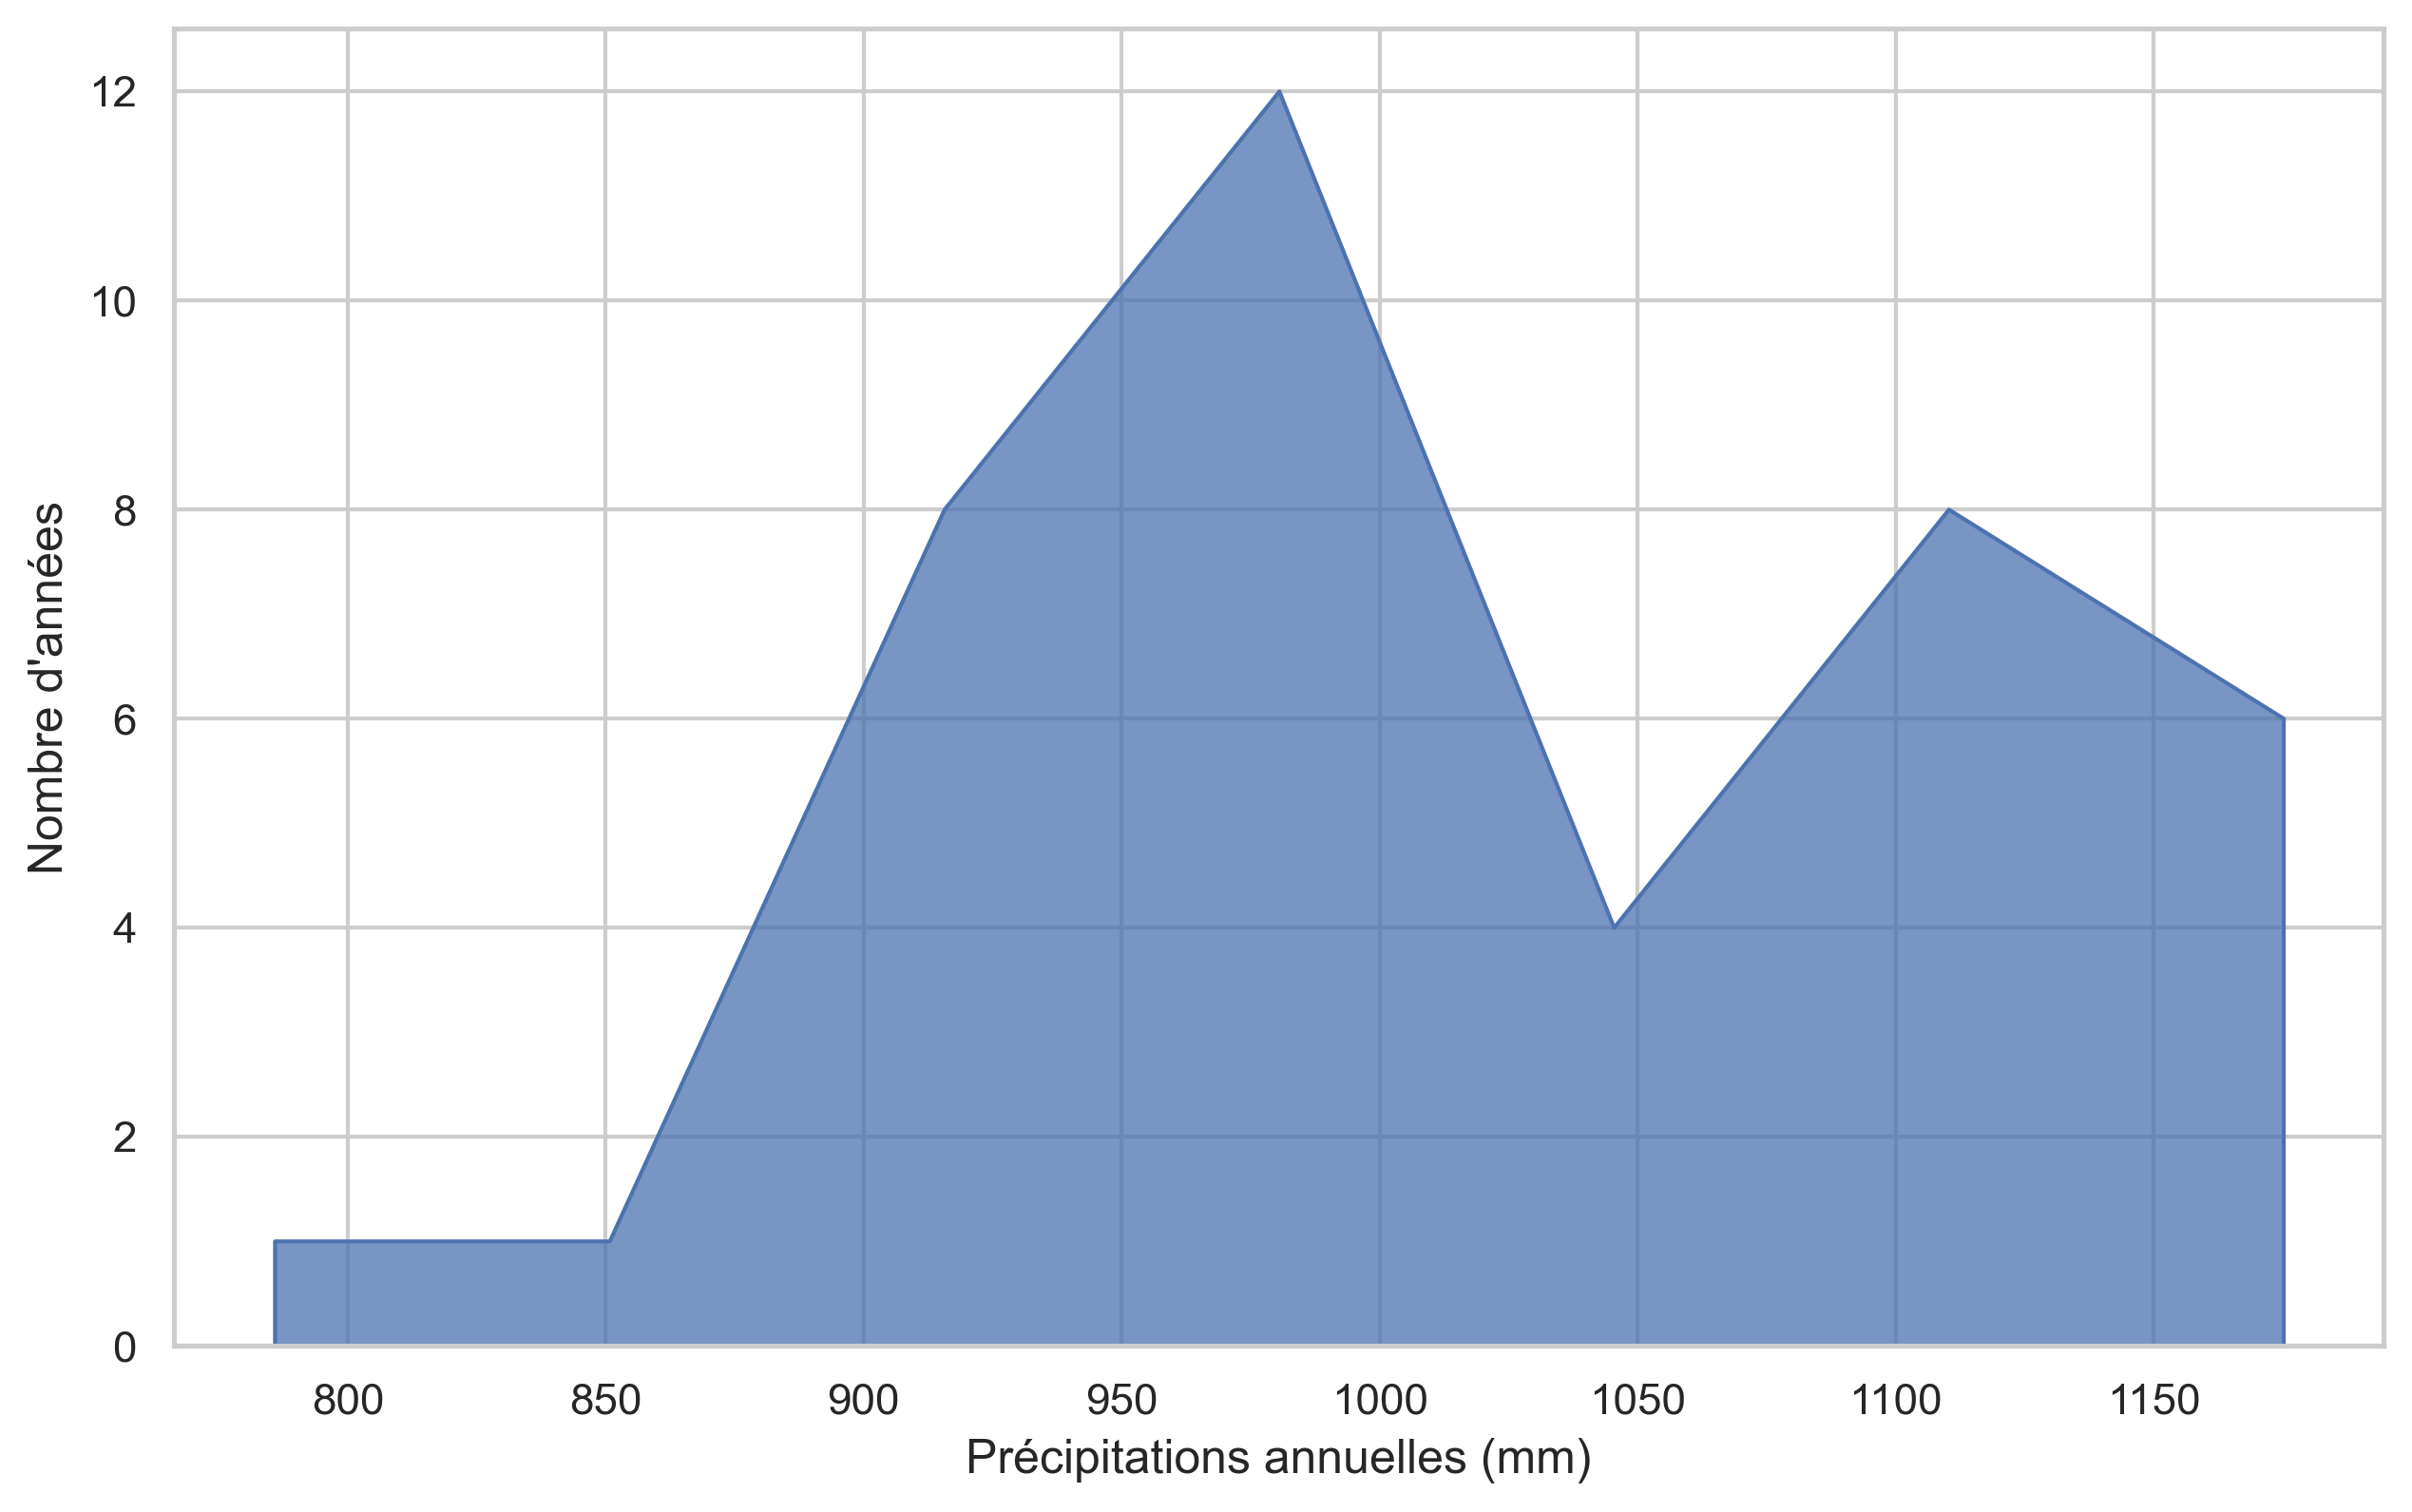

In [220]:
plt.figure(figsize=(10,6), dpi=300)
sns.histplot(hist_prec, x='mean_annual_prec', element='poly')
plt.ylabel("Nombre d'années")
plt.xlabel("Précipitations annuelles (mm)")

plt.savefig('Histplot_precipitations.svg')

plt.show()


In [221]:
# Heatmap pour représenter l'évolution des températures moyennes annuelles

# dataframe

benin_temp_all[['Year', 'mean_annual_temp']].head()

Year  mean_annual_temp
79  1980             27.44
80  1981             27.97
81  1982             27.83
82  1983             28.21
83  1984             28.07

In [222]:
# Importation de données séries temporelles

series_temp = pd.read_csv("DATA/tas_timeseries_monthly_cru_1901-2021_BEN.csv", header=2)
series_temp

Unnamed: 0    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug  \
0          1901  26.11  28.73  29.93  30.18  28.61  27.17  25.89  25.51   
1          1902  26.19  28.67  30.20  30.60  29.11  26.77  25.90  25.61   
2          1903  26.64  28.86  30.35  30.37  29.03  27.21  25.90  25.58   
3          1904  26.64  28.85  30.34  30.37  29.03  27.22  25.90  25.58   
4          1905  25.34  26.06  28.83  30.11  28.93  26.50  25.99  24.93   
..          ...    ...    ...    ...    ...    ...    ...    ...    ...   
116        2017  27.43  29.68  31.66  31.53  29.56  27.59  26.55  25.92   
117        2018  27.25  30.40  31.24  31.18  29.81  27.86  26.59  26.04   
118        2019  28.09  28.86  31.43  30.37  29.03  27.22  26.80  26.28   
119        2020  27.31  29.70  31.83  31.47  30.14  28.32  26.43  25.77   
120        2021  28.57  29.71  31.30  31.57  30.34  28.13  26.77  26.25   

       Sep    Oct    Nov    Dec  
0    25.95  27.30  27.34  26.00  
1    25.96  26.86  27.34  26.44  
2    26.01  27.30  27.34  26.44  
3    26.01  27.30  27.34  26.44  
4    25.97  27.19  28.42  27.36  
..     ...    ...    ...    ...  
116  26.65  28.01  28.33  27.38  
117  26.64  27.76  28.43  26.99  
118  26.99  27.07  28.59  27.41  
119  26.35  27.50  28.24  28.18  
120  26.81  28.35  28.81  27.91  

[121 rows x 13 columns]

In [223]:
series_temp = series_temp.rename(columns={"Unnamed: 0" : "Year"})

In [224]:
#series_temp = series_temp.reset_index()
series_temp.columns

Index(['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'],
      dtype='object')

In [225]:
st = series_temp.set_index('Year')
st

Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct  \
Year                                                                         
1901  26.11  28.73  29.93  30.18  28.61  27.17  25.89  25.51  25.95  27.30   
1902  26.19  28.67  30.20  30.60  29.11  26.77  25.90  25.61  25.96  26.86   
1903  26.64  28.86  30.35  30.37  29.03  27.21  25.90  25.58  26.01  27.30   
1904  26.64  28.85  30.34  30.37  29.03  27.22  25.90  25.58  26.01  27.30   
1905  25.34  26.06  28.83  30.11  28.93  26.50  25.99  24.93  25.97  27.19   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2017  27.43  29.68  31.66  31.53  29.56  27.59  26.55  25.92  26.65  28.01   
2018  27.25  30.40  31.24  31.18  29.81  27.86  26.59  26.04  26.64  27.76   
2019  28.09  28.86  31.43  30.37  29.03  27.22  26.80  26.28  26.99  27.07   
2020  27.31  29.70  31.83  31.47  30.14  28.32  26.43  25.77  26.35  27.50   
2021  28.57  29.71  31.30  31.57  30.34  28.13  26.77  26.25  26.81  28.35   

        Nov    Dec  
Year                
1901  27.34  26.00  
1902  27.34  26.44  
1903  27.34  26.44  
1904  27.34  26.44  
1905  28.42  27.36  
...     ...    ...  
2017  28.33  27.38  
2018  28.43  26.99  
2019  28.59  27.41  
2020  28.24  28.18  
2021  28.81  27.91  

[121 rows x 12 columns]

In [226]:
st.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 1901 to 2021
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Jan     121 non-null    float64
 1   Feb     121 non-null    float64
 2   Mar     121 non-null    float64
 3   Apr     121 non-null    float64
 4   May     121 non-null    float64
 5   Jun     121 non-null    float64
 6   Jul     121 non-null    float64
 7   Aug     121 non-null    float64
 8   Sep     121 non-null    float64
 9   Oct     121 non-null    float64
 10  Nov     121 non-null    float64
 11  Dec     121 non-null    float64
dtypes: float64(12)
memory usage: 12.3 KB


In [227]:
stt = st.transpose()
stt

Year   1901   1902   1903   1904   1905   1906   1907   1908   1909   1910  \
Jan   26.11  26.19  26.64  26.64  25.34  25.65  26.45  26.28  26.46  25.29   
Feb   28.73  28.67  28.86  28.85  26.06  28.27  26.78  27.89  29.83  29.17   
Mar   29.93  30.20  30.35  30.34  28.83  30.47  29.28  29.69  32.49  29.90   
Apr   30.18  30.60  30.37  30.37  30.11  32.46  29.77  30.86  30.28  30.07   
May   28.61  29.11  29.03  29.03  28.93  29.20  29.90  30.21  28.59  29.36   
Jun   27.17  26.77  27.21  27.22  26.50  27.73  27.08  28.12  25.59  28.74   
Jul   25.89  25.90  25.90  25.90  25.99  25.52  26.43  26.60  24.68  26.70   
Aug   25.51  25.61  25.58  25.58  24.93  24.93  25.33  25.02  23.67  25.83   
Sep   25.95  25.96  26.01  26.01  25.97  27.13  26.39  26.25  26.01  26.61   
Oct   27.30  26.86  27.30  27.30  27.19  27.83  29.05  27.00  26.00  27.02   
Nov   27.34  27.34  27.34  27.34  28.42  27.83  27.52  26.56  27.61  27.25   
Dec   26.00  26.44  26.44  26.44  27.36  27.48  25.24  25.66  26.44  26.39   

Year  ...   2012   2013   2014   2015   2016   2017   2018   2019   2020  \
Jan   ...  26.89  27.45  28.39  26.36  27.44  27.43  27.25  28.09  27.31   
Feb   ...  29.39  29.28  29.53  30.08  29.73  29.68  30.40  28.86  29.70   
Mar   ...  30.92  31.96  30.90  30.87  31.44  31.66  31.24  31.43  31.83   
Apr   ...  30.83  30.31  31.00  30.97  31.44  31.53  31.18  30.37  31.47   
May   ...  28.94  29.25  29.16  30.75  29.93  29.56  29.81  29.03  30.14   
Jun   ...  27.42  27.72  28.21  28.58  27.60  27.59  27.86  27.22  28.32   
Jul   ...  25.94  26.35  26.94  26.86  26.60  26.55  26.59  26.80  26.43   
Aug   ...  25.63  25.60  25.85  26.03  26.20  25.92  26.04  26.28  25.77   
Sep   ...  26.37  26.74  26.33  26.62  26.60  26.65  26.64  26.99  26.35   
Oct   ...  27.76  27.72  27.96  28.02  28.32  28.01  27.76  27.07  27.50   
Nov   ...  28.63  28.52  28.60  28.33  28.86  28.33  28.43  28.59  28.24   
Dec   ...  27.51  27.10  27.19  25.99  28.33  27.38  26.99  27.41  28.18   

Year   2021  
Jan   28.57  
Feb   29.71  
Mar   31.30  
Apr   31.57  
May   30.34  
Jun   28.13  
Jul   26.77  
Aug   26.25  
Sep   26.81  
Oct   28.35  
Nov   28.81  
Dec   27.91  

[12 rows x 121 columns]

In [228]:
st_filtre = st.reset_index().loc[99:120].set_index('Year')
st_filtre

Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct  \
Year                                                                         
2000  28.33  27.62  30.38  31.06  29.86  27.29  25.98  25.37  26.29  27.30   
2001  26.84  28.50  31.08  30.86  29.77  27.34  26.23  25.58  26.14  27.82   
2002  26.38  28.76  31.26  30.90  29.95  27.80  26.81  26.08  26.47  27.01   
2003  27.63  30.29  31.05  30.31  29.81  27.12  26.18  25.81  26.32  28.32   
2004  27.37  29.23  30.66  30.49  28.75  27.16  25.97  25.93  26.71  27.90   
2005  26.58  30.92  32.00  31.47  29.38  27.30  26.21  25.70  26.77  27.65   
2006  27.72  29.96  31.07  31.45  29.06  28.26  27.02  25.85  26.18  27.92   
2007  26.24  29.53  31.41  30.95  29.52  27.79  26.48  25.74  26.63  27.93   
2008  25.18  28.67  30.95  30.82  29.20  27.59  26.11  25.80  26.46  27.87   
2009  27.17  30.33  31.42  30.48  29.65  27.90  26.65  26.09  26.73  27.85   
2010  28.08  30.55  31.85  31.53  30.03  28.07  26.49  26.03  26.31  27.42   
2011  26.88  29.76  31.52  31.09  29.90  28.10  26.74  26.05  26.59  27.70   
2012  26.89  29.39  30.92  30.83  28.94  27.42  25.94  25.63  26.37  27.76   
2013  27.45  29.28  31.96  30.31  29.25  27.72  26.35  25.60  26.74  27.72   
2014  28.39  29.53  30.90  31.00  29.16  28.21  26.94  25.85  26.33  27.96   
2015  26.36  30.08  30.87  30.97  30.75  28.58  26.86  26.03  26.62  28.02   
2016  27.44  29.73  31.44  31.44  29.93  27.60  26.60  26.20  26.60  28.32   
2017  27.43  29.68  31.66  31.53  29.56  27.59  26.55  25.92  26.65  28.01   
2018  27.25  30.40  31.24  31.18  29.81  27.86  26.59  26.04  26.64  27.76   
2019  28.09  28.86  31.43  30.37  29.03  27.22  26.80  26.28  26.99  27.07   
2020  27.31  29.70  31.83  31.47  30.14  28.32  26.43  25.77  26.35  27.50   
2021  28.57  29.71  31.30  31.57  30.34  28.13  26.77  26.25  26.81  28.35   

        Nov    Dec  
Year                
2000  27.83  26.79  
2001  28.08  27.89  
2002  28.07  27.30  
2003  28.16  26.99  
2004  28.14  27.80  
2005  28.36  27.82  
2006  27.38  26.63  
2007  28.56  27.41  
2008  27.96  27.67  
2009  27.67  27.95  
2010  28.39  26.97  
2011  27.86  26.28  
2012  28.63  27.51  
2013  28.52  27.10  
2014  28.60  27.19  
2015  28.33  25.99  
2016  28.86  28.33  
2017  28.33  27.38  
2018  28.43  26.99  
2019  28.59  27.41  
2020  28.24  28.18  
2021  28.81  27.91

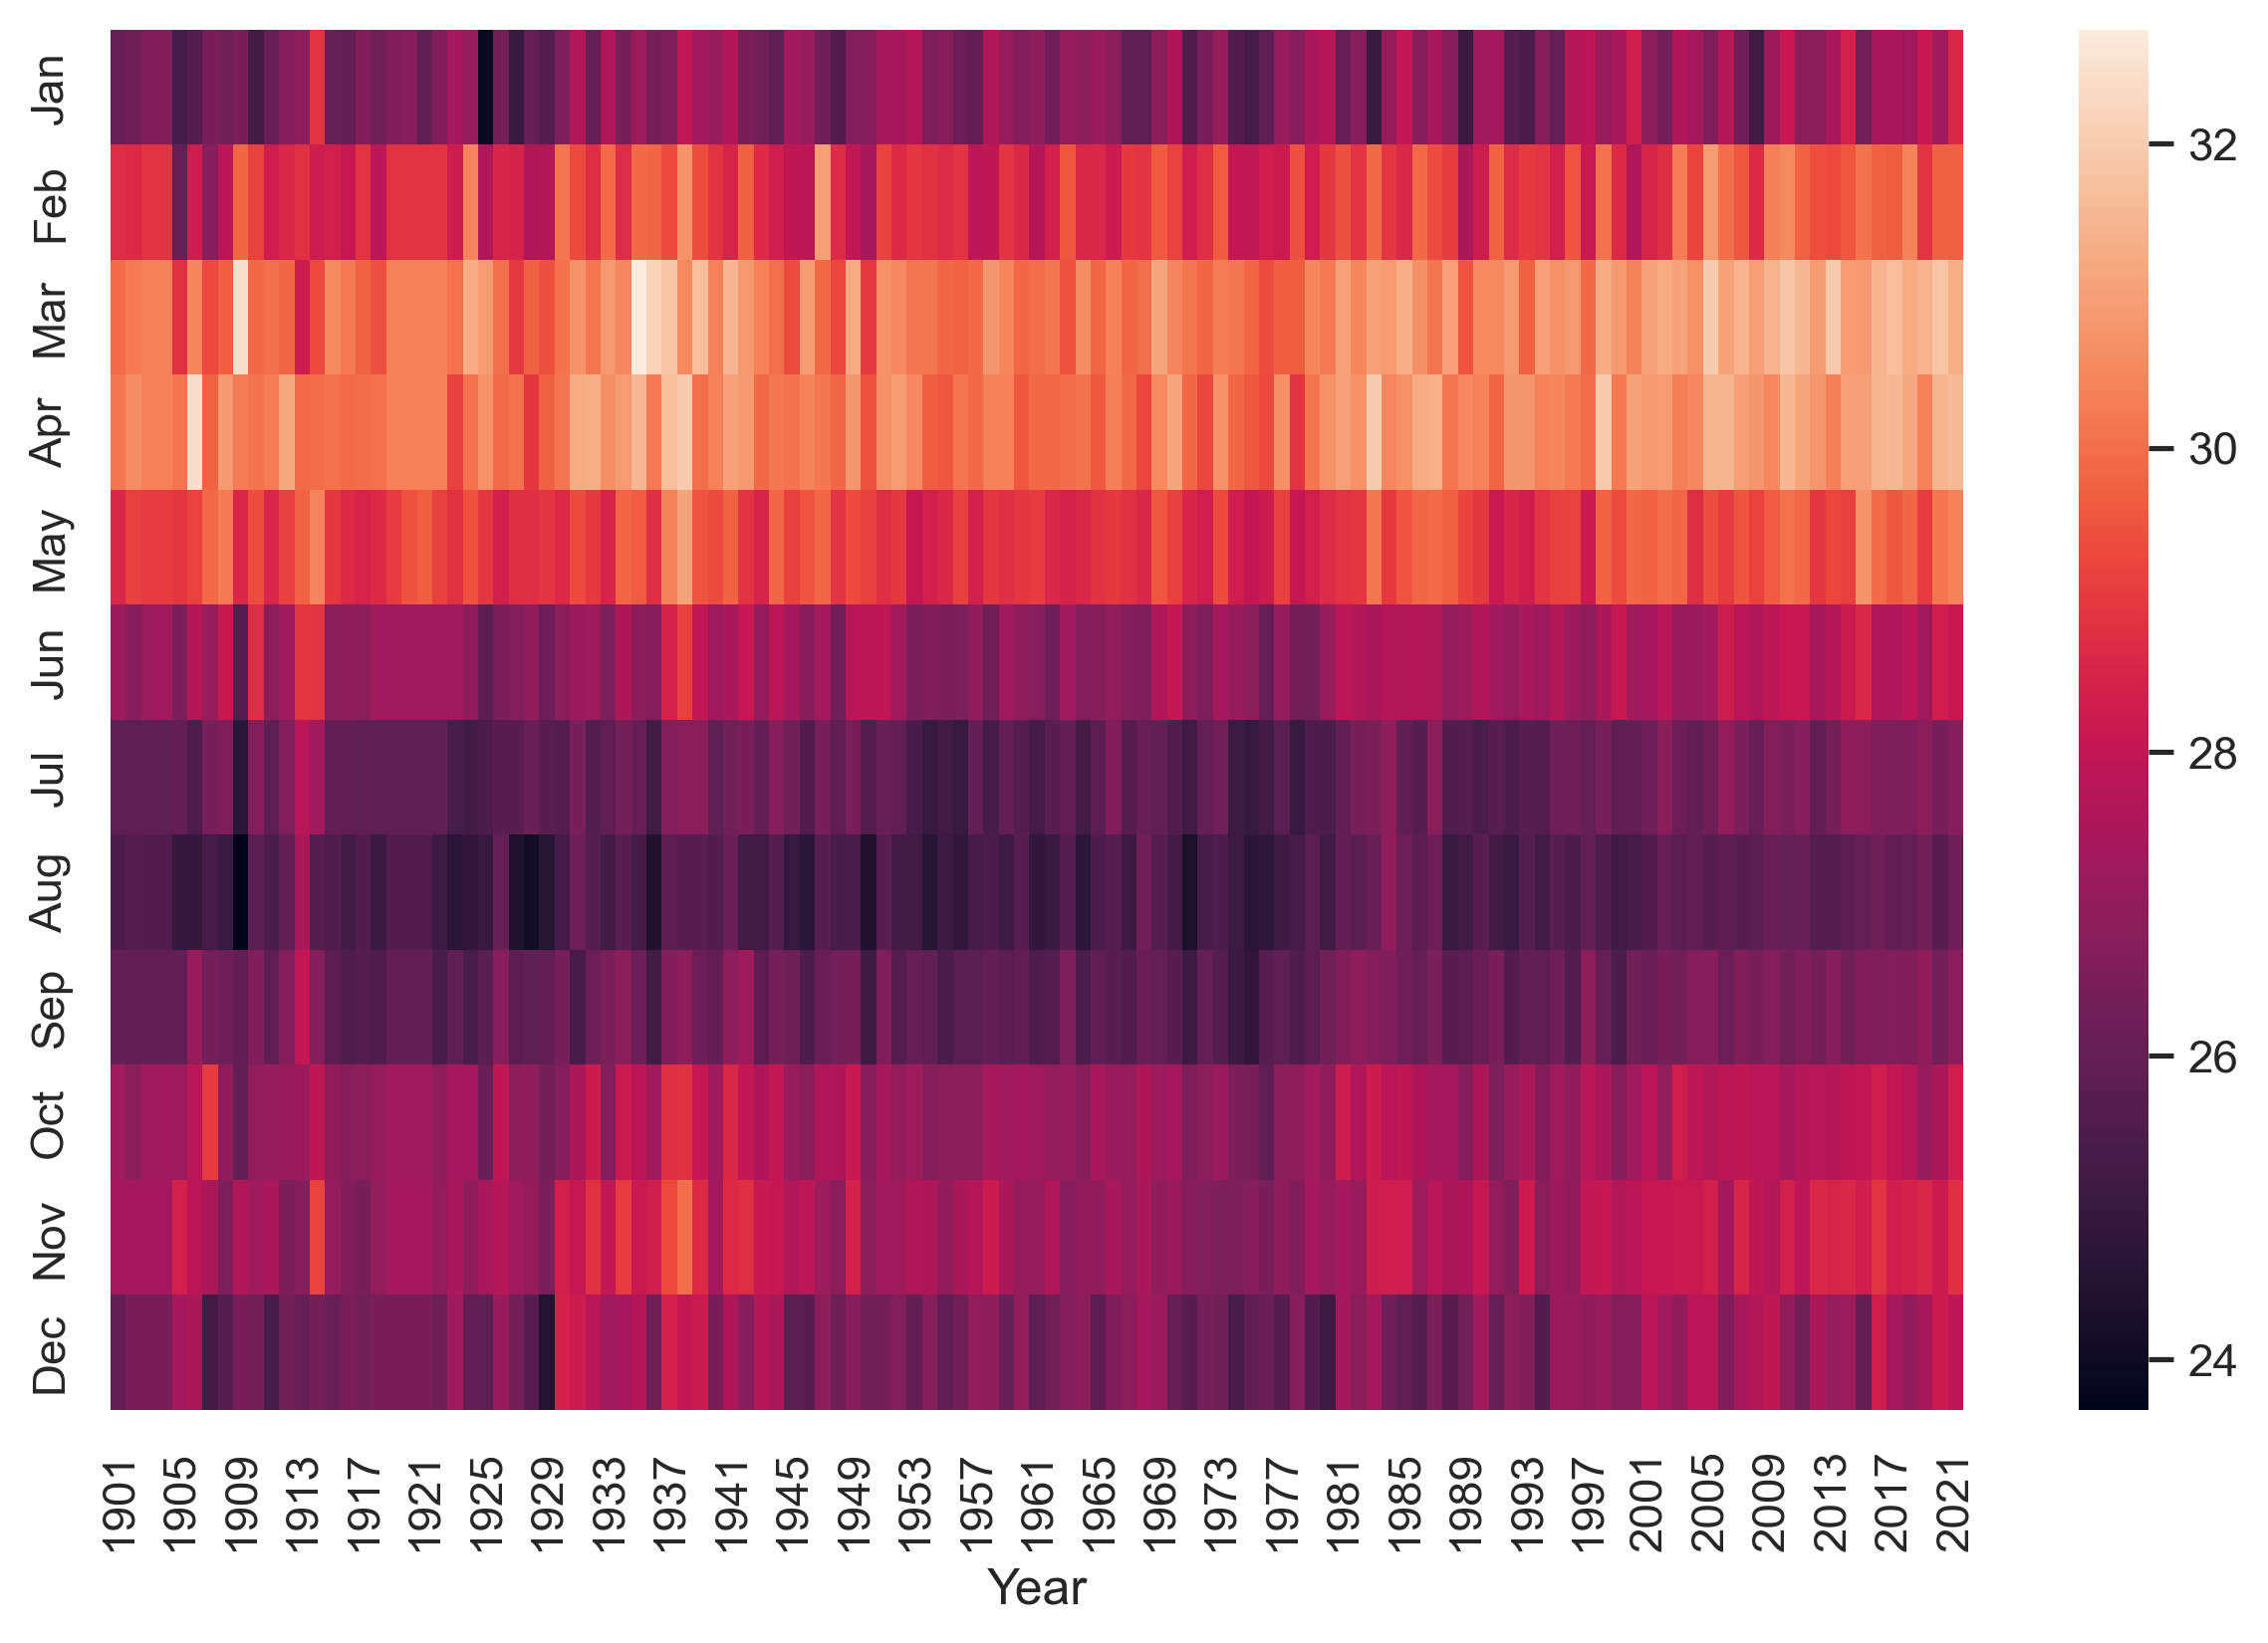

In [229]:
plt.figure(figsize=(10,6), dpi=300)
display_st = sns.heatmap(stt)

<AxesSubplot:xlabel='Year'>

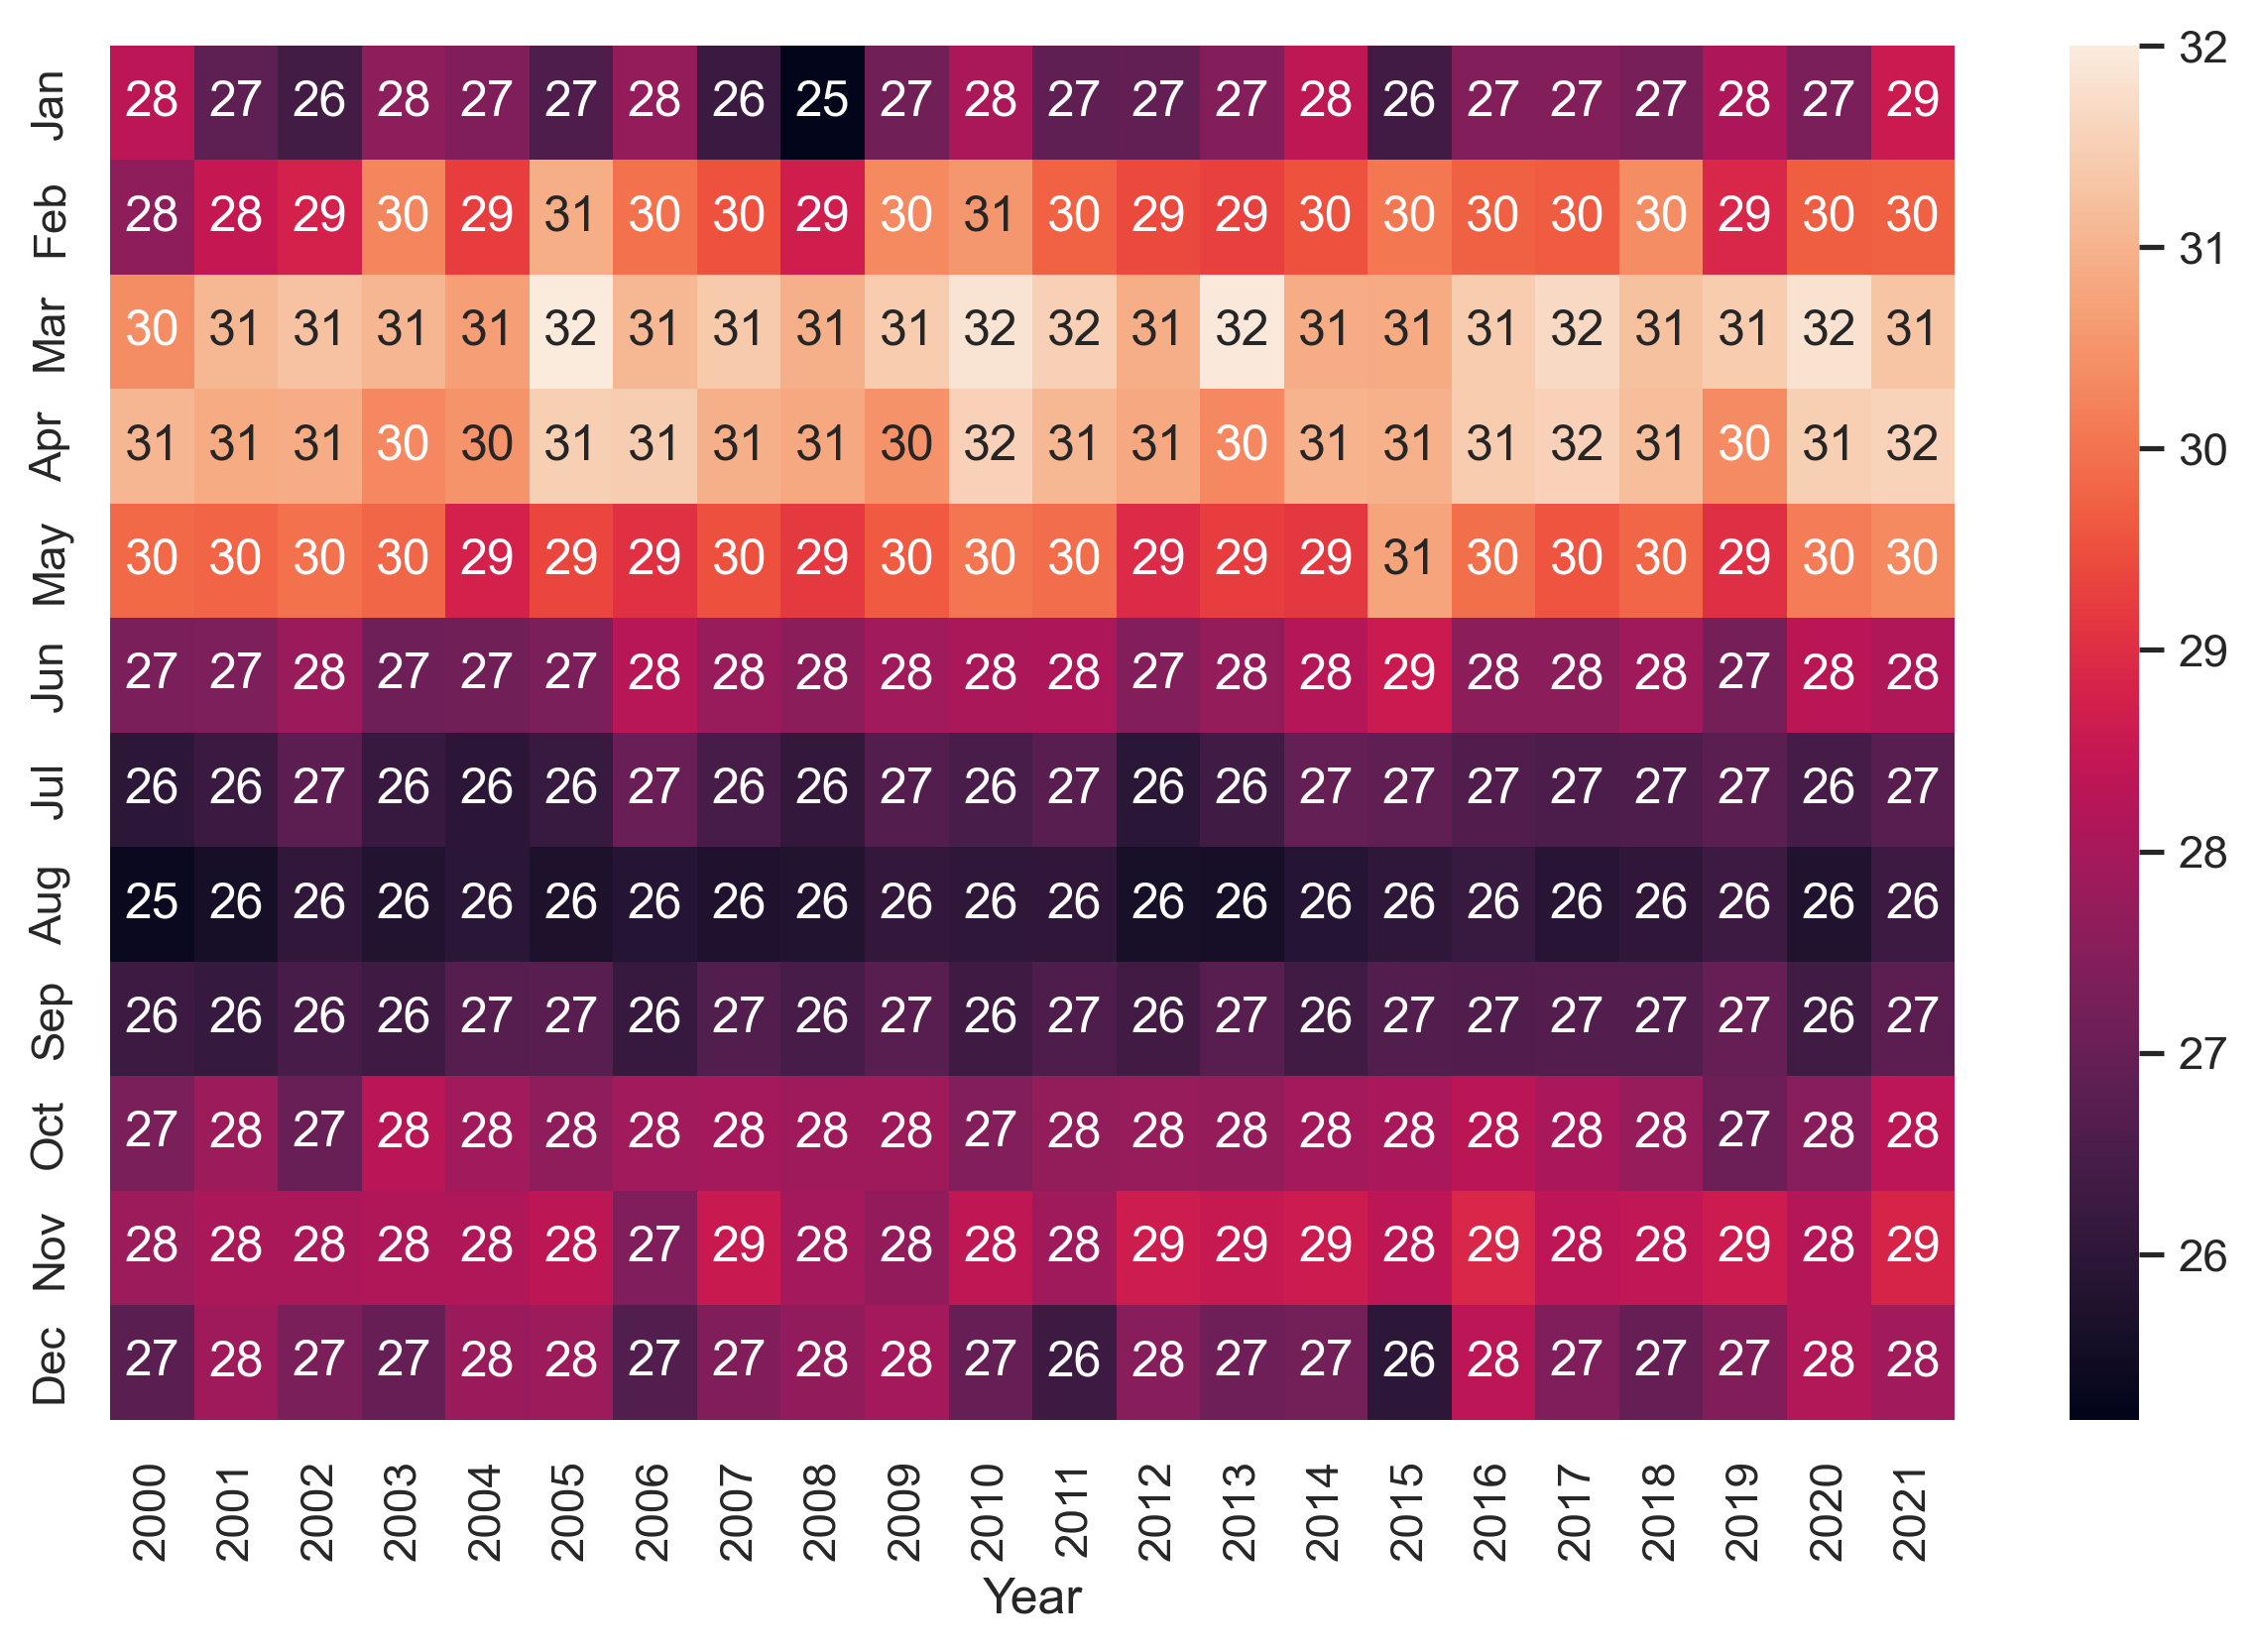

In [230]:
plt.figure(figsize=(10,6), dpi=300)
sns.heatmap(st_filtre.transpose(),annot=True)

In [231]:
# donnees series temporelles pour ALibori

st_alibori = pd.read_csv("DATA/tas_timeseries_monthly_cru_1901-2021_BEN_609_ALIBORI.csv", header=3)
st_alibori

Unnamed: 0    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug  \
0          1901  24.69  28.20  30.79  32.20  30.37  28.65  26.83  26.37   
1          1902  24.81  28.05  31.08  32.84  31.11  27.93  26.83  26.47   
2          1903  25.53  28.37  31.33  32.46  30.98  28.65  26.83  26.38   
3          1904  25.53  28.37  31.33  32.46  30.98  28.65  26.83  26.38   
4          1905  24.11  25.12  29.63  32.31  30.81  27.85  26.93  25.59   
..          ...    ...    ...    ...    ...    ...    ...    ...    ...   
116        2017  26.25  29.16  32.80  33.70  31.57  28.87  27.35  26.84   
117        2018  26.08  30.27  32.59  33.46  31.72  29.26  27.46  26.74   
118        2019  26.60  28.37  32.55  32.46  30.98  28.65  27.73  26.87   
119        2020  26.10  28.96  33.04  33.76  32.13  29.75  27.25  26.48   
120        2021  27.53  29.01  32.53  33.71  32.31  29.67  27.64  26.62   

       Sep    Oct    Nov    Dec  
0    26.79  28.38  27.35  24.82  
1    26.70  27.66  27.35  25.54  
2    26.80  28.38  27.35  25.54  
3    26.80  28.38  27.35  25.54  
4    26.70  28.33  28.48  26.45  
..     ...    ...    ...    ...  
116  27.68  29.00  28.32  26.52  
117  27.39  28.54  28.56  25.76  
118  27.96  28.28  28.72  26.43  
119  26.90  28.40  28.10  27.44  
120  27.67  29.51  29.08  27.01  

[121 rows x 13 columns]

In [232]:
st_alibori = st_alibori.rename(columns={"Unnamed: 0" : "Year"})
st_alibori

Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep  \
0    1901  24.69  28.20  30.79  32.20  30.37  28.65  26.83  26.37  26.79   
1    1902  24.81  28.05  31.08  32.84  31.11  27.93  26.83  26.47  26.70   
2    1903  25.53  28.37  31.33  32.46  30.98  28.65  26.83  26.38  26.80   
3    1904  25.53  28.37  31.33  32.46  30.98  28.65  26.83  26.38  26.80   
4    1905  24.11  25.12  29.63  32.31  30.81  27.85  26.93  25.59  26.70   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
116  2017  26.25  29.16  32.80  33.70  31.57  28.87  27.35  26.84  27.68   
117  2018  26.08  30.27  32.59  33.46  31.72  29.26  27.46  26.74  27.39   
118  2019  26.60  28.37  32.55  32.46  30.98  28.65  27.73  26.87  27.96   
119  2020  26.10  28.96  33.04  33.76  32.13  29.75  27.25  26.48  26.90   
120  2021  27.53  29.01  32.53  33.71  32.31  29.67  27.64  26.62  27.67   

       Oct    Nov    Dec  
0    28.38  27.35  24.82  
1    27.66  27.35  25.54  
2    28.38  27.35  25.54  
3    28.38  27.35  25.54  
4    28.33  28.48  26.45  
..     ...    ...    ...  
116  29.00  28.32  26.52  
117  28.54  28.56  25.76  
118  28.28  28.72  26.43  
119  28.40  28.10  27.44  
120  29.51  29.08  27.01  

[121 rows x 13 columns]

In [233]:
sta = st_alibori.set_index("Year")
sta

Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct  \
Year                                                                         
1901  24.69  28.20  30.79  32.20  30.37  28.65  26.83  26.37  26.79  28.38   
1902  24.81  28.05  31.08  32.84  31.11  27.93  26.83  26.47  26.70  27.66   
1903  25.53  28.37  31.33  32.46  30.98  28.65  26.83  26.38  26.80  28.38   
1904  25.53  28.37  31.33  32.46  30.98  28.65  26.83  26.38  26.80  28.38   
1905  24.11  25.12  29.63  32.31  30.81  27.85  26.93  25.59  26.70  28.33   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2017  26.25  29.16  32.80  33.70  31.57  28.87  27.35  26.84  27.68  29.00   
2018  26.08  30.27  32.59  33.46  31.72  29.26  27.46  26.74  27.39  28.54   
2019  26.60  28.37  32.55  32.46  30.98  28.65  27.73  26.87  27.96  28.28   
2020  26.10  28.96  33.04  33.76  32.13  29.75  27.25  26.48  26.90  28.40   
2021  27.53  29.01  32.53  33.71  32.31  29.67  27.64  26.62  27.67  29.51   

        Nov    Dec  
Year                
1901  27.35  24.82  
1902  27.35  25.54  
1903  27.35  25.54  
1904  27.35  25.54  
1905  28.48  26.45  
...     ...    ...  
2017  28.32  26.52  
2018  28.56  25.76  
2019  28.72  26.43  
2020  28.10  27.44  
2021  29.08  27.01  

[121 rows x 12 columns]

<AxesSubplot:xlabel='Year'>

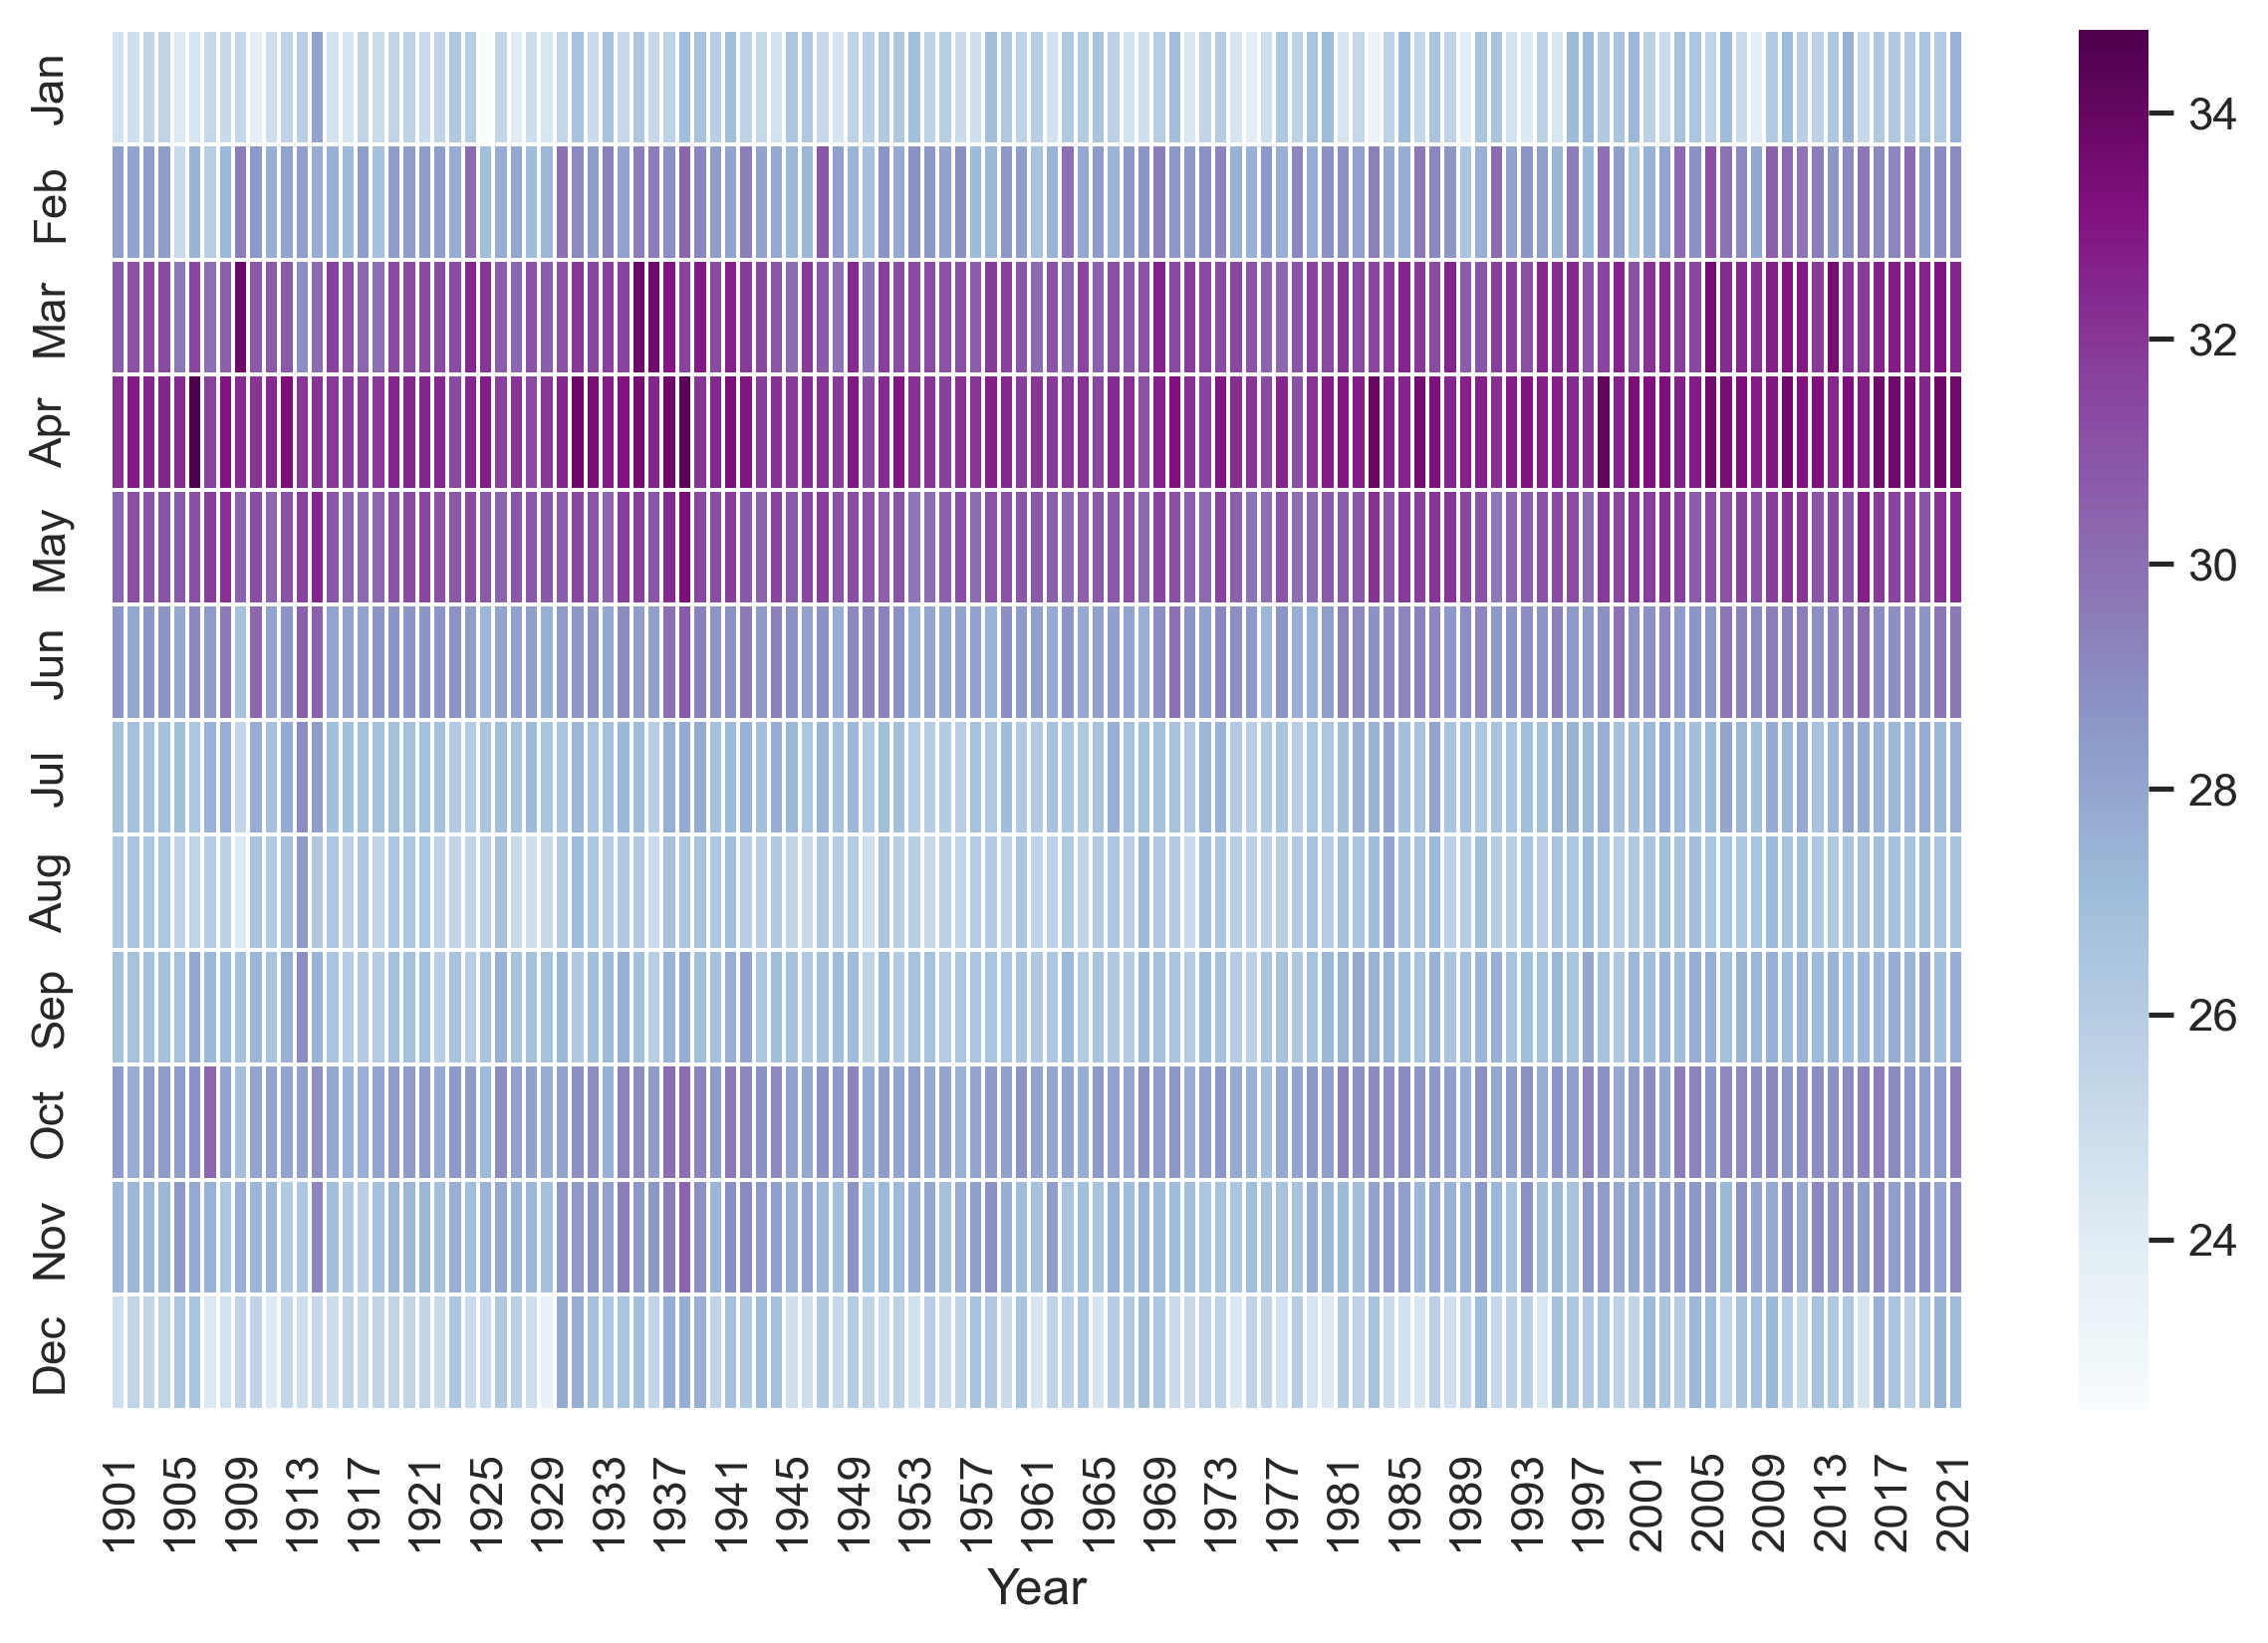

In [234]:
plt.figure(figsize=(10,6), dpi=300)
sns.heatmap(sta.transpose(), cmap='BuPu', linewidths=.5)

In [235]:
prev_jour_chaud = pd.read_csv('DATA/nbe_jours_sup_35_prev.csv', header=1)
prev_jour_chaud

Unnamed: 0   Benin  Alibori  Atakora  Atlantique  Borgou  Collines  \
0         2015  139.62   164.77   156.56        0.00  125.26     93.30   
1         2016  136.14   163.53   158.17        0.00  119.61     86.19   
2         2017  139.93   166.78   158.50        0.00  125.70     86.07   
3         2018  134.68   159.64   157.15        0.00  119.97     85.91   
4         2019  142.36   171.99   163.48        0.04  126.10     91.34   
..         ...     ...      ...      ...         ...     ...       ...   
81        2096  206.22   232.10   229.49       26.99  191.73    160.94   
82        2097  202.19   229.44   226.53       19.86  190.16    152.05   
83        2098  205.03   229.92   228.95       13.36  195.19    153.75   
84        2099  212.66   244.96   233.58       20.31  199.26    156.80   
85        2100  207.73   233.92   227.85       12.23  193.60    162.61   

    Couffo   Donga  Littoral   Mono  Oueme  Plateau     Zou  
0    21.07  110.13       0.0   0.00    0.0    55.21   62.76  
1    21.07  105.63       0.0   0.00    0.0    53.79   61.58  
2    18.54  101.96       0.0   0.00    0.0    54.50   60.14  
3    21.49  103.37       0.0   0.00    0.0    52.38   60.75  
4    24.54  111.08       0.0   0.99    0.0    55.92   65.72  
..     ...     ...       ...    ...    ...      ...     ...  
81   75.99  173.82      26.0  49.71   26.0   115.89  130.84  
82   69.11  167.74      19.0  39.75   19.0   106.06  122.84  
83   67.51  173.92      12.0  44.61   12.0   107.55  122.26  
84   74.41  177.88      19.0  50.62   19.0   110.30  126.07  
85   67.06  179.03      11.0  40.64   11.0   113.63  128.81  

[86 rows x 14 columns]

In [236]:
prev_jour_chaud = prev_jour_chaud.rename(columns={'Unnamed: 0' : 'Year'})
prev_jour_chaud

Year   Benin  Alibori  Atakora  Atlantique  Borgou  Collines  Couffo  \
0   2015  139.62   164.77   156.56        0.00  125.26     93.30   21.07   
1   2016  136.14   163.53   158.17        0.00  119.61     86.19   21.07   
2   2017  139.93   166.78   158.50        0.00  125.70     86.07   18.54   
3   2018  134.68   159.64   157.15        0.00  119.97     85.91   21.49   
4   2019  142.36   171.99   163.48        0.04  126.10     91.34   24.54   
..   ...     ...      ...      ...         ...     ...       ...     ...   
81  2096  206.22   232.10   229.49       26.99  191.73    160.94   75.99   
82  2097  202.19   229.44   226.53       19.86  190.16    152.05   69.11   
83  2098  205.03   229.92   228.95       13.36  195.19    153.75   67.51   
84  2099  212.66   244.96   233.58       20.31  199.26    156.80   74.41   
85  2100  207.73   233.92   227.85       12.23  193.60    162.61   67.06   

     Donga  Littoral   Mono  Oueme  Plateau     Zou  
0   110.13       0.0   0.00    0.0    55.21   62.76  
1   105.63       0.0   0.00    0.0    53.79   61.58  
2   101.96       0.0   0.00    0.0    54.50   60.14  
3   103.37       0.0   0.00    0.0    52.38   60.75  
4   111.08       0.0   0.99    0.0    55.92   65.72  
..     ...       ...    ...    ...      ...     ...  
81  173.82      26.0  49.71   26.0   115.89  130.84  
82  167.74      19.0  39.75   19.0   106.06  122.84  
83  173.92      12.0  44.61   12.0   107.55  122.26  
84  177.88      19.0  50.62   19.0   110.30  126.07  
85  179.03      11.0  40.64   11.0   113.63  128.81  

[86 rows x 14 columns]

In [237]:
pjc = prev_jour_chaud.loc[7:85].set_index('Year')
pjc.columns

Index(['Benin', 'Alibori', 'Atakora', 'Atlantique', 'Borgou', 'Collines',
       'Couffo', 'Donga', 'Littoral', 'Mono', 'Oueme', 'Plateau', 'Zou'],
      dtype='object')

In [238]:
pjc

Benin  Alibori  Atakora  Atlantique  Borgou  Collines  Couffo   Donga  \
Year                                                                           
2022  146.70   175.60   164.95        0.04  126.24    100.04   25.80  114.60   
2023  144.15   170.80   167.14        0.04  129.39     96.30   22.85  113.76   
2024  147.15   174.53   163.90        0.04  129.22     96.60   24.12  113.33   
2025  144.54   171.60   163.95        0.04  128.58     94.63   24.54  112.62   
2026  149.34   177.84   169.50        0.04  133.42     95.73   23.28  111.95   
...      ...      ...      ...         ...     ...       ...     ...     ...   
2096  206.22   232.10   229.49       26.99  191.73    160.94   75.99  173.82   
2097  202.19   229.44   226.53       19.86  190.16    152.05   69.11  167.74   
2098  205.03   229.92   228.95       13.36  195.19    153.75   67.51  173.92   
2099  212.66   244.96   233.58       20.31  199.26    156.80   74.41  177.88   
2100  207.73   233.92   227.85       12.23  193.60    162.61   67.06  179.03   

      Littoral   Mono  Oueme  Plateau     Zou  
Year                                           
2022       0.0   0.99    0.0    62.99   72.61  
2023       0.0   0.99    0.0    58.75   66.71  
2024       0.0   0.99    0.0    65.12   73.02  
2025       0.0   0.99    0.0    58.75   68.07  
2026       0.0   0.99    0.0    58.75   67.05  
...        ...    ...    ...      ...     ...  
2096      26.0  49.71   26.0   115.89  130.84  
2097      19.0  39.75   19.0   106.06  122.84  
2098      12.0  44.61   12.0   107.55  122.26  
2099      19.0  50.62   19.0   110.30  126.07  
2100      11.0  40.64   11.0   113.63  128.81  

[79 rows x 13 columns]

<AxesSubplot:xlabel='Year'>

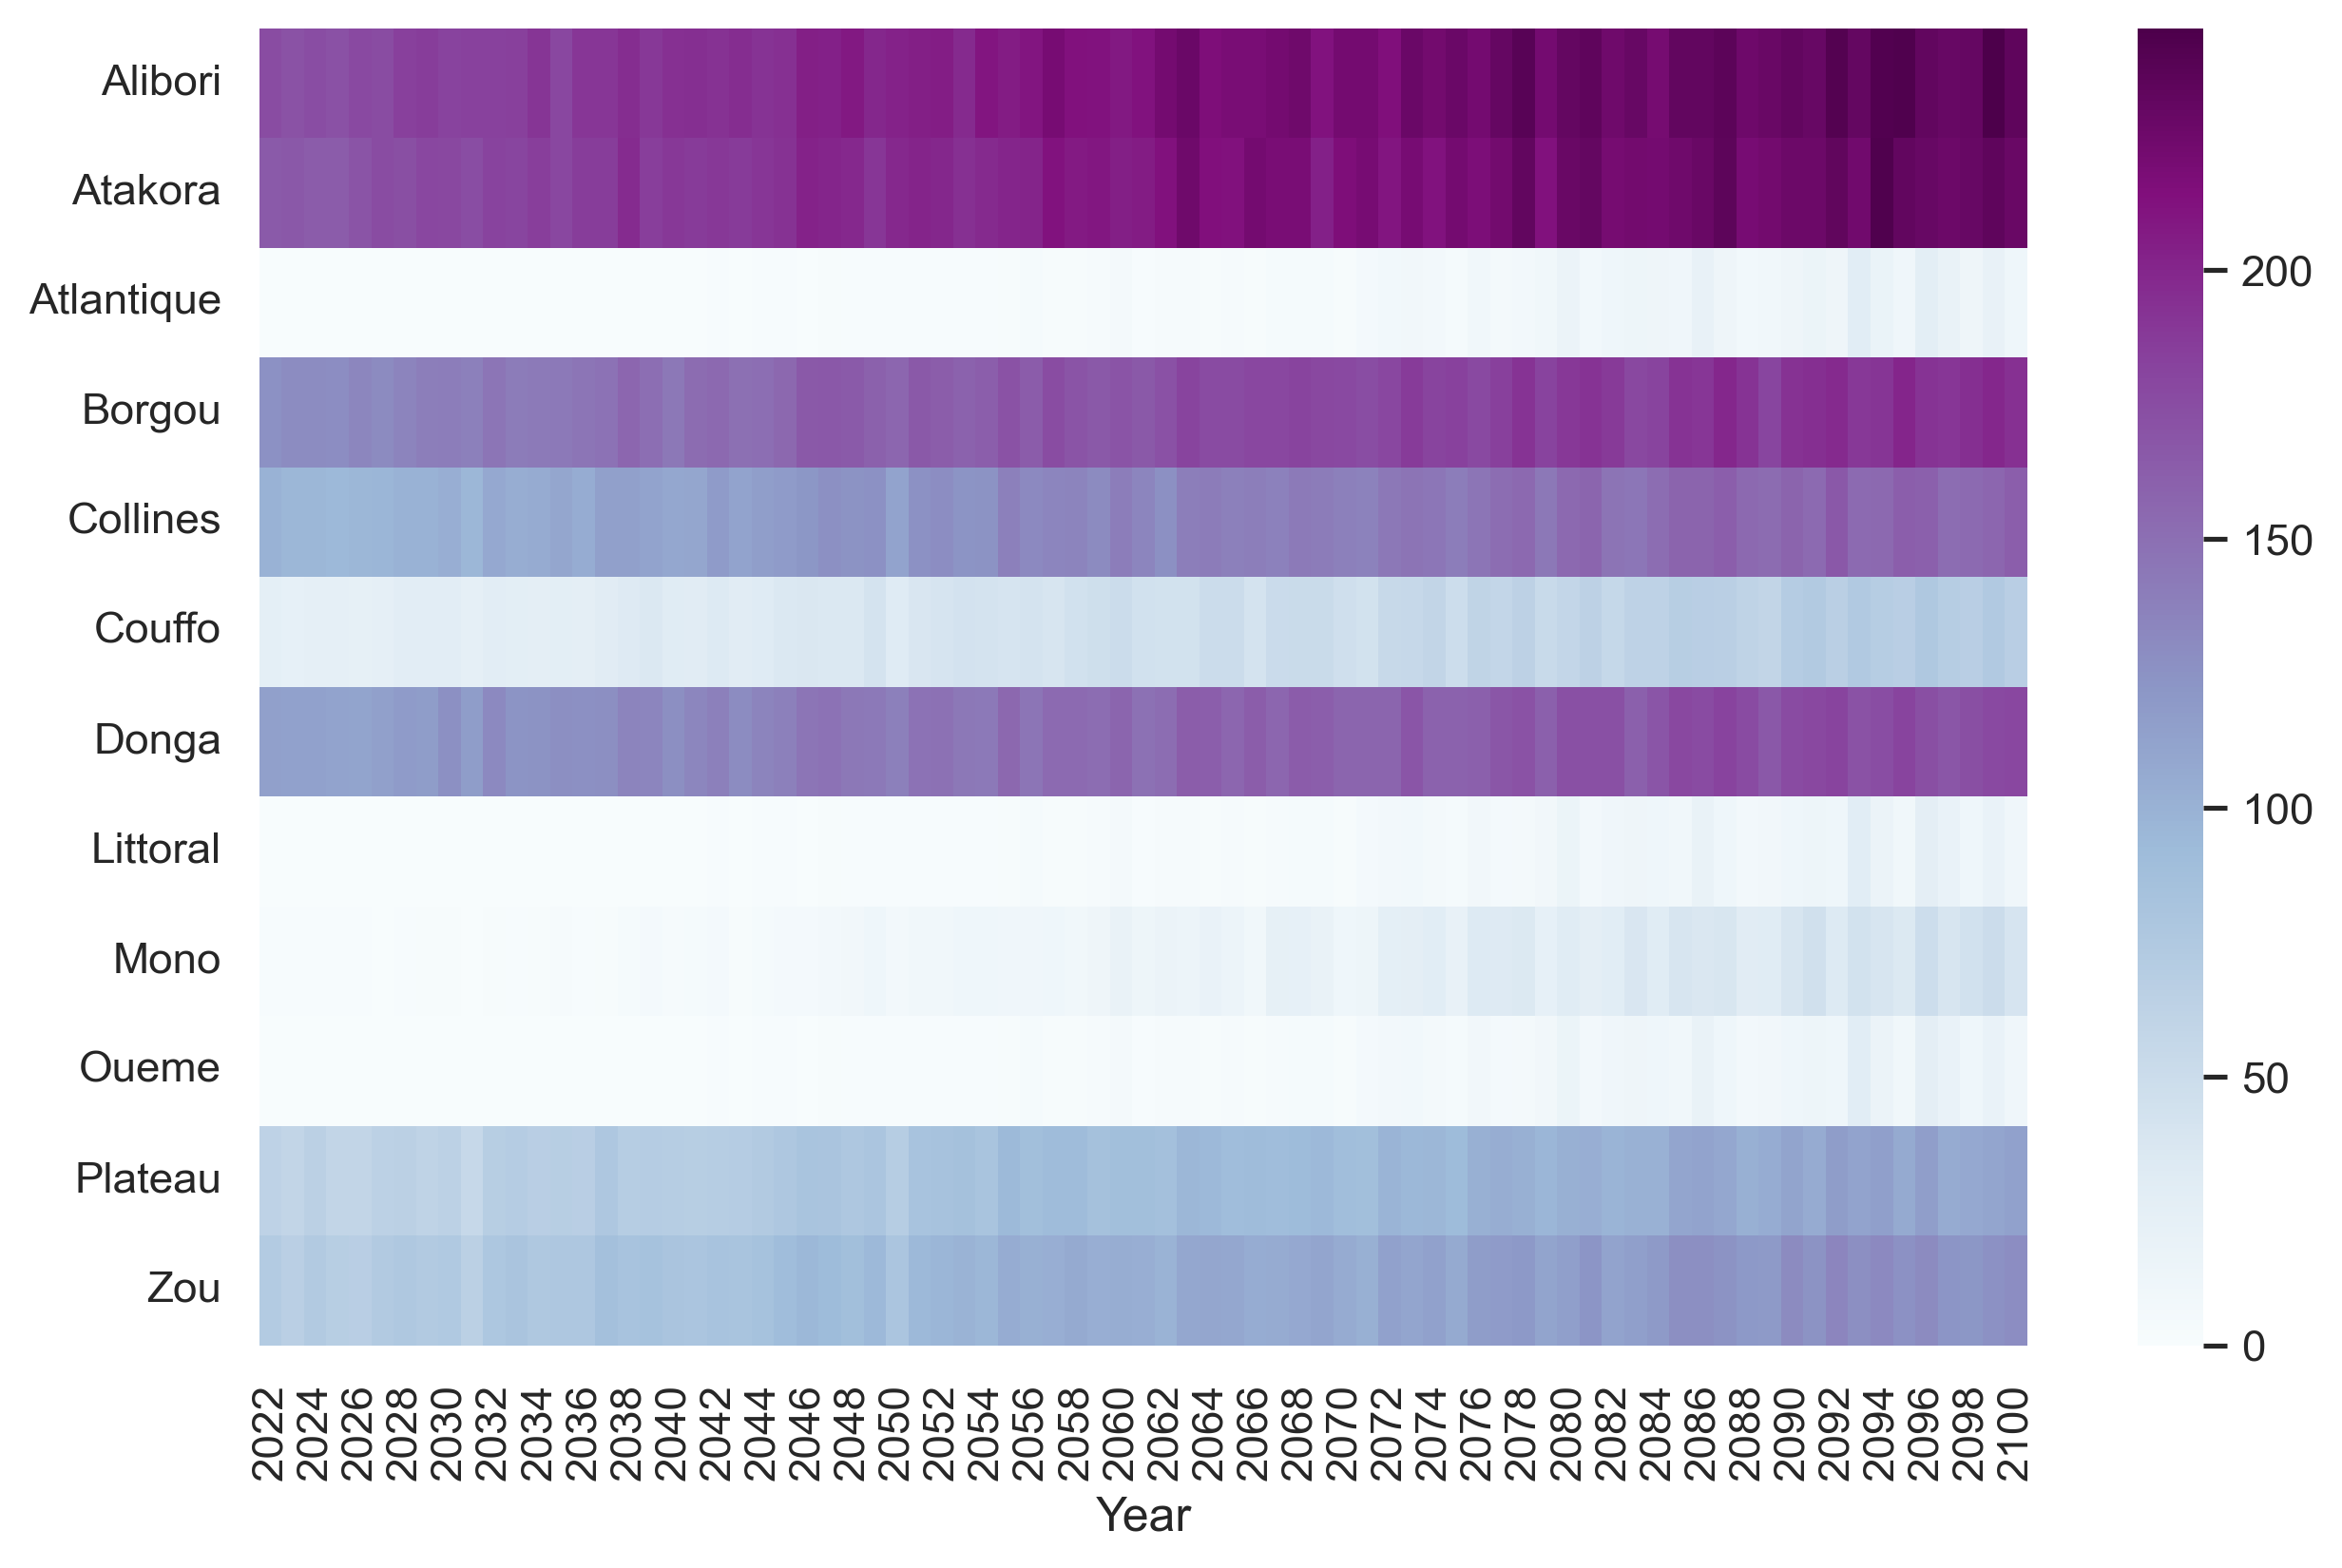

In [239]:
plt.figure(figsize=(10,6), dpi=300)
sns.heatmap(pjc[['Alibori', 'Atakora', 'Atlantique', 'Borgou', 'Collines',
       'Couffo', 'Donga', 'Littoral', 'Mono', 'Oueme', 'Plateau', 'Zou']].transpose(), cmap='BuPu')

# Scenario 4.5 'medium_low emissions'

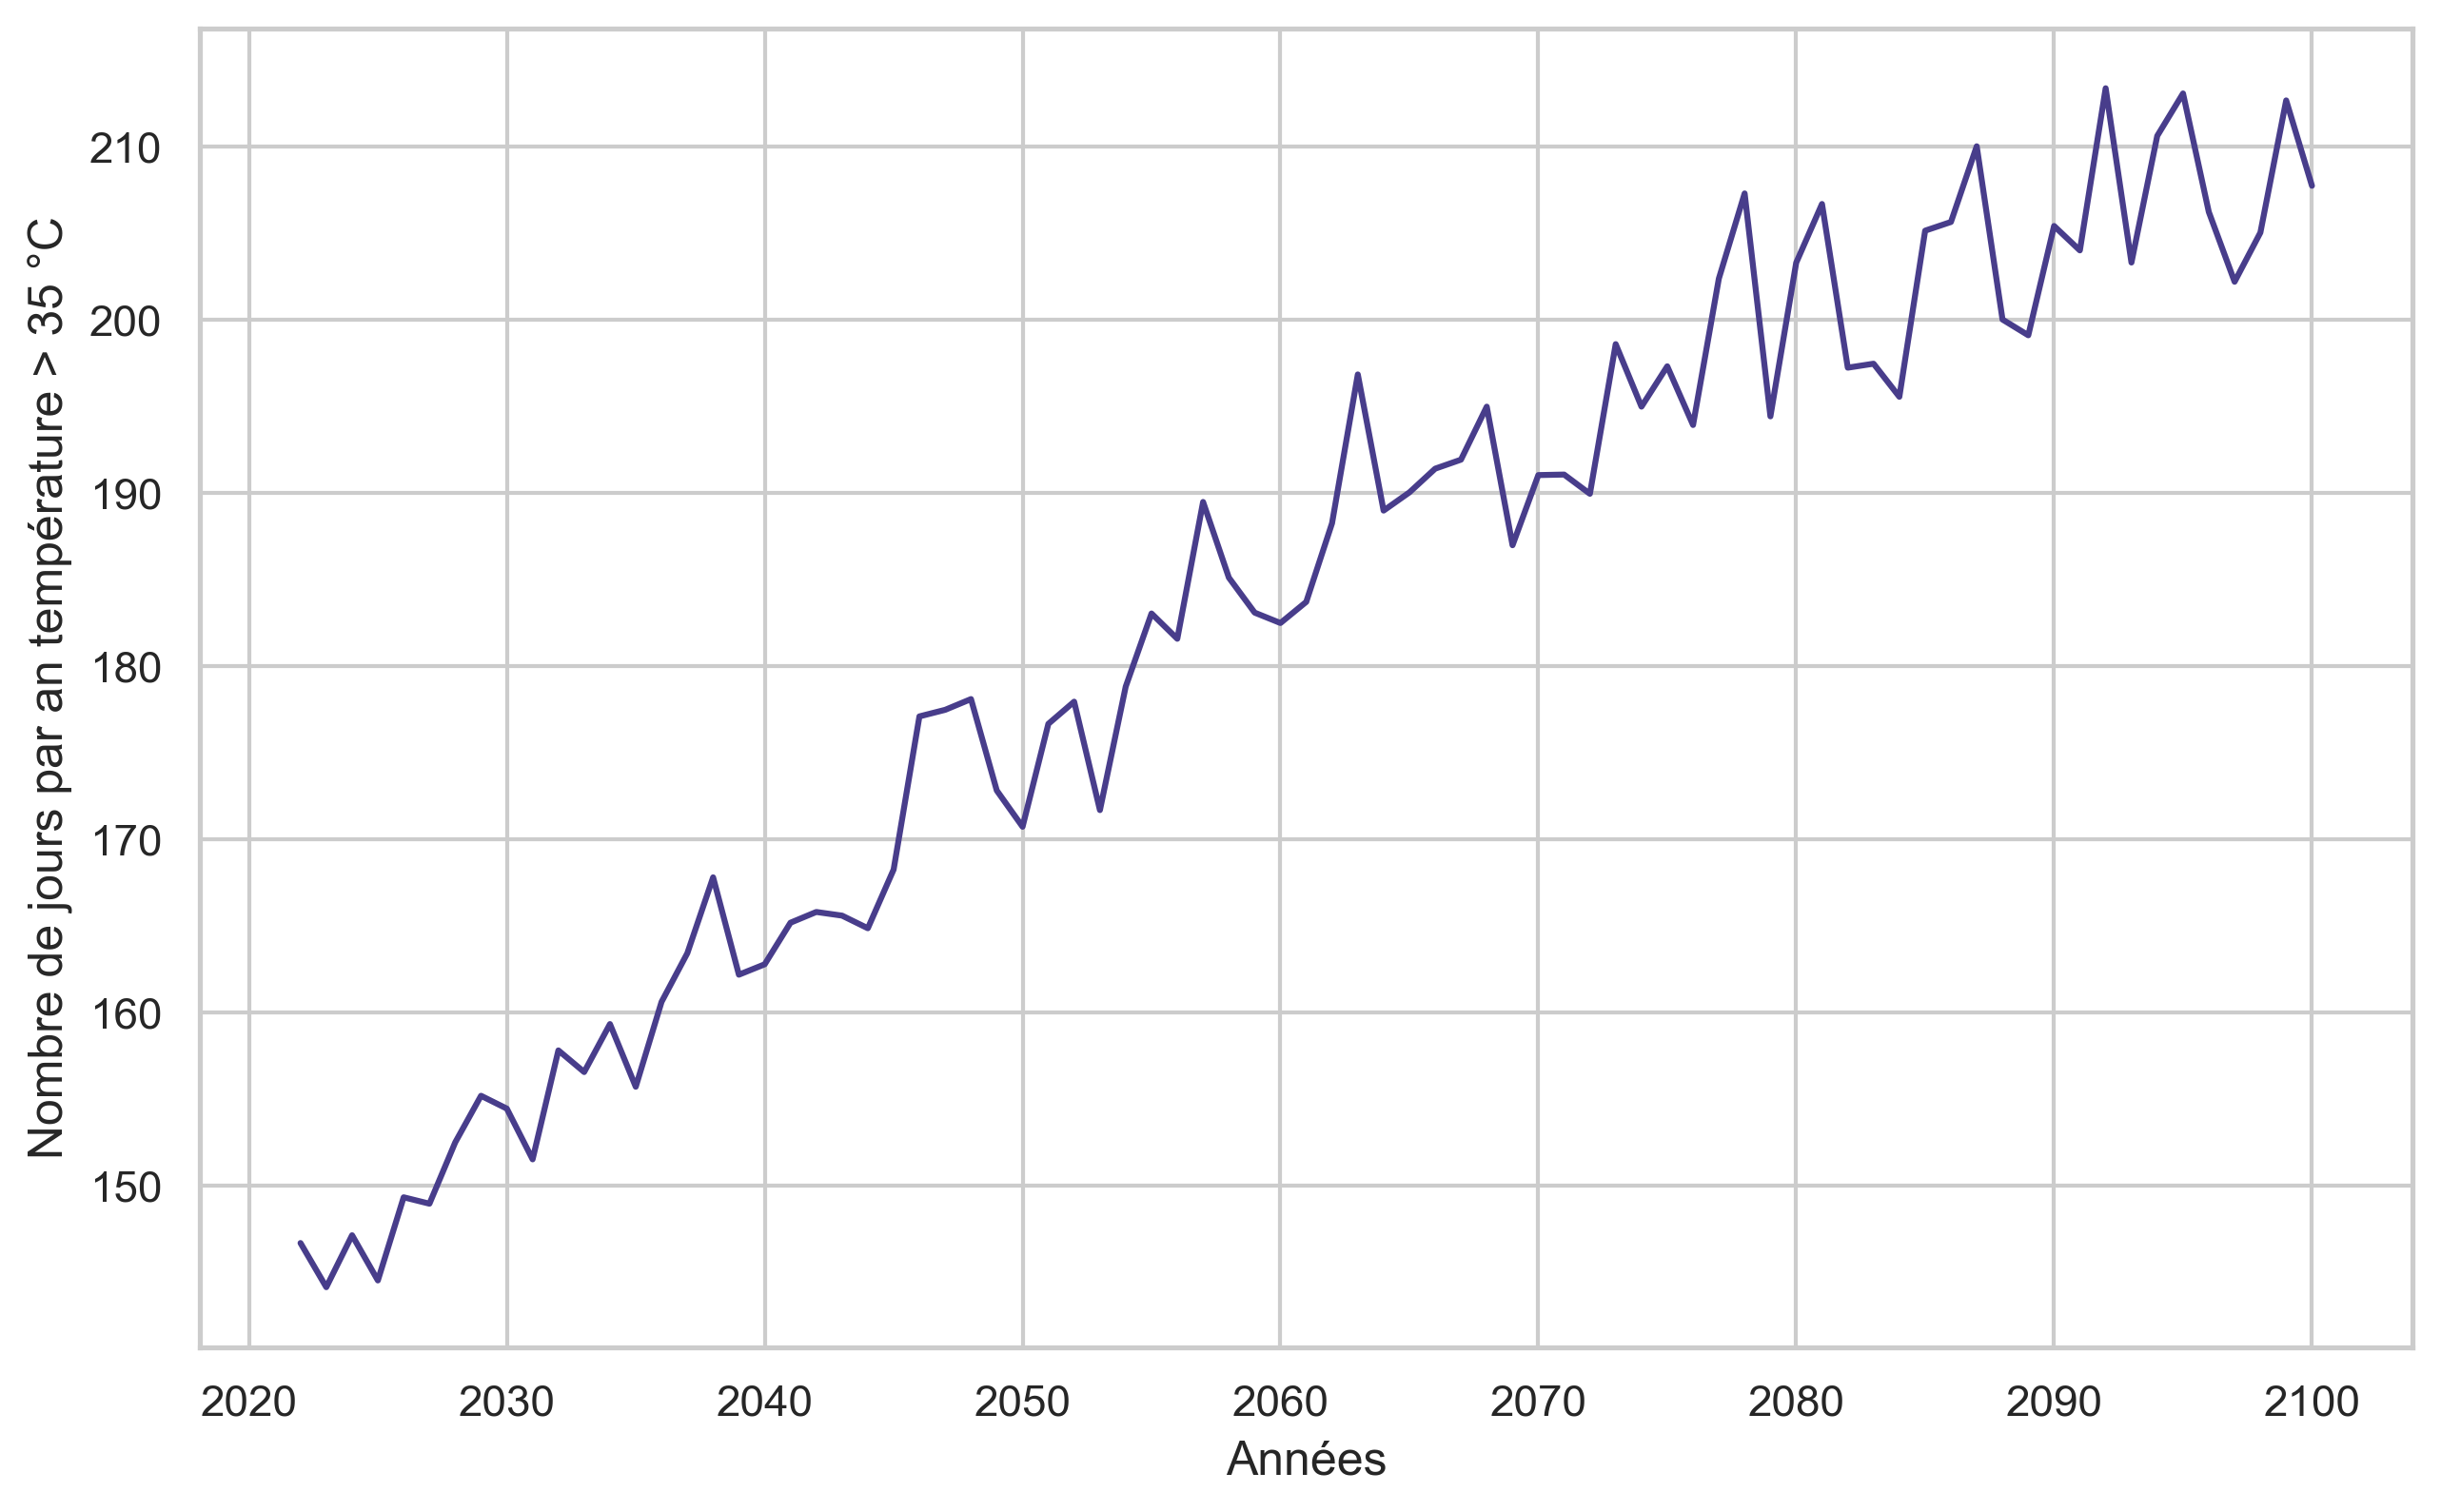

In [240]:
pjc_benin = pjc.reset_index().copy()
pjc_benin = pjc_benin[['Year', 'Benin']]
#sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,6), dpi=300)
sns.lineplot(data=pjc_benin, x='Year', y="Benin", color='darkslateblue')

plt.xlabel('Années')
plt.ylabel('Nombre de jours par an température > 35 °C')

plt.savefig('Nombre_j_an_temperature.svg')

plt.show()

In [241]:
prev_4_5 = pd.read_csv('DATA/prev_temp_moyen-scenario4.5.csv', header=1)
prev_4_5

Unnamed: 0  Benin  Alibori  Atakora  Atlantique  Borgou  Collines  Couffo  \
0         2015  28.16    28.30    28.38       27.41   27.75     27.72   27.12   
1         2016  28.07    28.25    28.21       27.31   27.65     27.57   27.05   
2         2017  28.28    28.52    28.53       27.40   27.84     27.62   27.07   
3         2018  28.22    28.41    28.44       27.43   27.75     27.71   27.14   
4         2019  28.27    28.43    28.43       27.46   27.85     27.81   27.17   
..         ...    ...      ...      ...         ...     ...       ...     ...   
81        2096  30.01    30.24    30.25       29.13   29.57     29.46   28.79   
82        2097  30.13    30.47    30.42       28.96   29.70     29.39   28.74   
83        2098  30.03    30.26    30.22       29.10   29.56     29.45   28.82   
84        2099  30.22    30.55    30.43       29.21   29.77     29.47   28.89   
85        2100  30.33    30.61    30.53       29.14   29.84     29.72   28.97   

    Donga  Littoral   Mono  Oueme  Plateau    Zou  
0   27.49     27.41  27.37  27.41    27.84  27.55  
1   27.33     27.31  27.28  27.31    27.69  27.43  
2   27.41     27.40  27.32  27.40    27.80  27.50  
3   27.45     27.43  27.38  27.43    27.86  27.58  
4   27.55     27.46  27.44  27.46    27.91  27.61  
..    ...       ...    ...    ...      ...    ...  
81  29.31     29.14  28.95  29.14    29.53  29.26  
82  29.24     28.96  28.91  28.96    29.48  29.23  
83  29.24     29.10  29.04  29.10    29.55  29.27  
84  29.36     29.21  29.12  29.21    29.59  29.30  
85  29.47     29.14  29.11  29.14    29.76  29.53  

[86 rows x 14 columns]

In [242]:
prev_4_5 = prev_4_5.rename(columns={"Unnamed: 0" : "Year"})
prev_4_5

Year  Benin  Alibori  Atakora  Atlantique  Borgou  Collines  Couffo  \
0   2015  28.16    28.30    28.38       27.41   27.75     27.72   27.12   
1   2016  28.07    28.25    28.21       27.31   27.65     27.57   27.05   
2   2017  28.28    28.52    28.53       27.40   27.84     27.62   27.07   
3   2018  28.22    28.41    28.44       27.43   27.75     27.71   27.14   
4   2019  28.27    28.43    28.43       27.46   27.85     27.81   27.17   
..   ...    ...      ...      ...         ...     ...       ...     ...   
81  2096  30.01    30.24    30.25       29.13   29.57     29.46   28.79   
82  2097  30.13    30.47    30.42       28.96   29.70     29.39   28.74   
83  2098  30.03    30.26    30.22       29.10   29.56     29.45   28.82   
84  2099  30.22    30.55    30.43       29.21   29.77     29.47   28.89   
85  2100  30.33    30.61    30.53       29.14   29.84     29.72   28.97   

    Donga  Littoral   Mono  Oueme  Plateau    Zou  
0   27.49     27.41  27.37  27.41    27.84  27.55  
1   27.33     27.31  27.28  27.31    27.69  27.43  
2   27.41     27.40  27.32  27.40    27.80  27.50  
3   27.45     27.43  27.38  27.43    27.86  27.58  
4   27.55     27.46  27.44  27.46    27.91  27.61  
..    ...       ...    ...    ...      ...    ...  
81  29.31     29.14  28.95  29.14    29.53  29.26  
82  29.24     28.96  28.91  28.96    29.48  29.23  
83  29.24     29.10  29.04  29.10    29.55  29.27  
84  29.36     29.21  29.12  29.21    29.59  29.30  
85  29.47     29.14  29.11  29.14    29.76  29.53  

[86 rows x 14 columns]

In [243]:
prev_4_5 = prev_4_5.loc[7:85].set_index("Year")
prev_4_5

Benin  Alibori  Atakora  Atlantique  Borgou  Collines  Couffo  Donga  \
Year                                                                         
2022  28.41    28.63    28.65       27.54   27.95     27.85   27.30  27.67   
2023  28.28    28.44    28.45       27.62   27.78     27.87   27.36  27.52   
2024  28.50    28.71    28.70       27.70   28.01     27.97   27.40  27.70   
2025  28.40    28.58    28.58       27.66   27.91     27.90   27.36  27.63   
2026  28.54    28.78    28.74       27.68   28.04     27.96   27.34  27.74   
...     ...      ...      ...         ...     ...       ...     ...    ...   
2096  30.01    30.24    30.25       29.13   29.57     29.46   28.79  29.31   
2097  30.13    30.47    30.42       28.96   29.70     29.39   28.74  29.24   
2098  30.03    30.26    30.22       29.10   29.56     29.45   28.82  29.24   
2099  30.22    30.55    30.43       29.21   29.77     29.47   28.89  29.36   
2100  30.33    30.61    30.53       29.14   29.84     29.72   28.97  29.47   

      Littoral   Mono  Oueme  Plateau    Zou  
Year                                          
2022     27.54  27.54  27.54    27.96  27.69  
2023     27.62  27.61  27.62    28.04  27.76  
2024     27.70  27.62  27.70    28.13  27.85  
2025     27.66  27.58  27.66    28.06  27.79  
2026     27.68  27.57  27.68    28.09  27.79  
...        ...    ...    ...      ...    ...  
2096     29.14  28.95  29.14    29.53  29.26  
2097     28.96  28.91  28.96    29.48  29.23  
2098     29.10  29.04  29.10    29.55  29.27  
2099     29.21  29.12  29.21    29.59  29.30  
2100     29.14  29.11  29.14    29.76  29.53  

[79 rows x 13 columns]

In [244]:
prev_4_5.columns

Index(['Benin', 'Alibori', 'Atakora', 'Atlantique', 'Borgou', 'Collines',
       'Couffo', 'Donga', 'Littoral', 'Mono', 'Oueme', 'Plateau', 'Zou'],
      dtype='object')

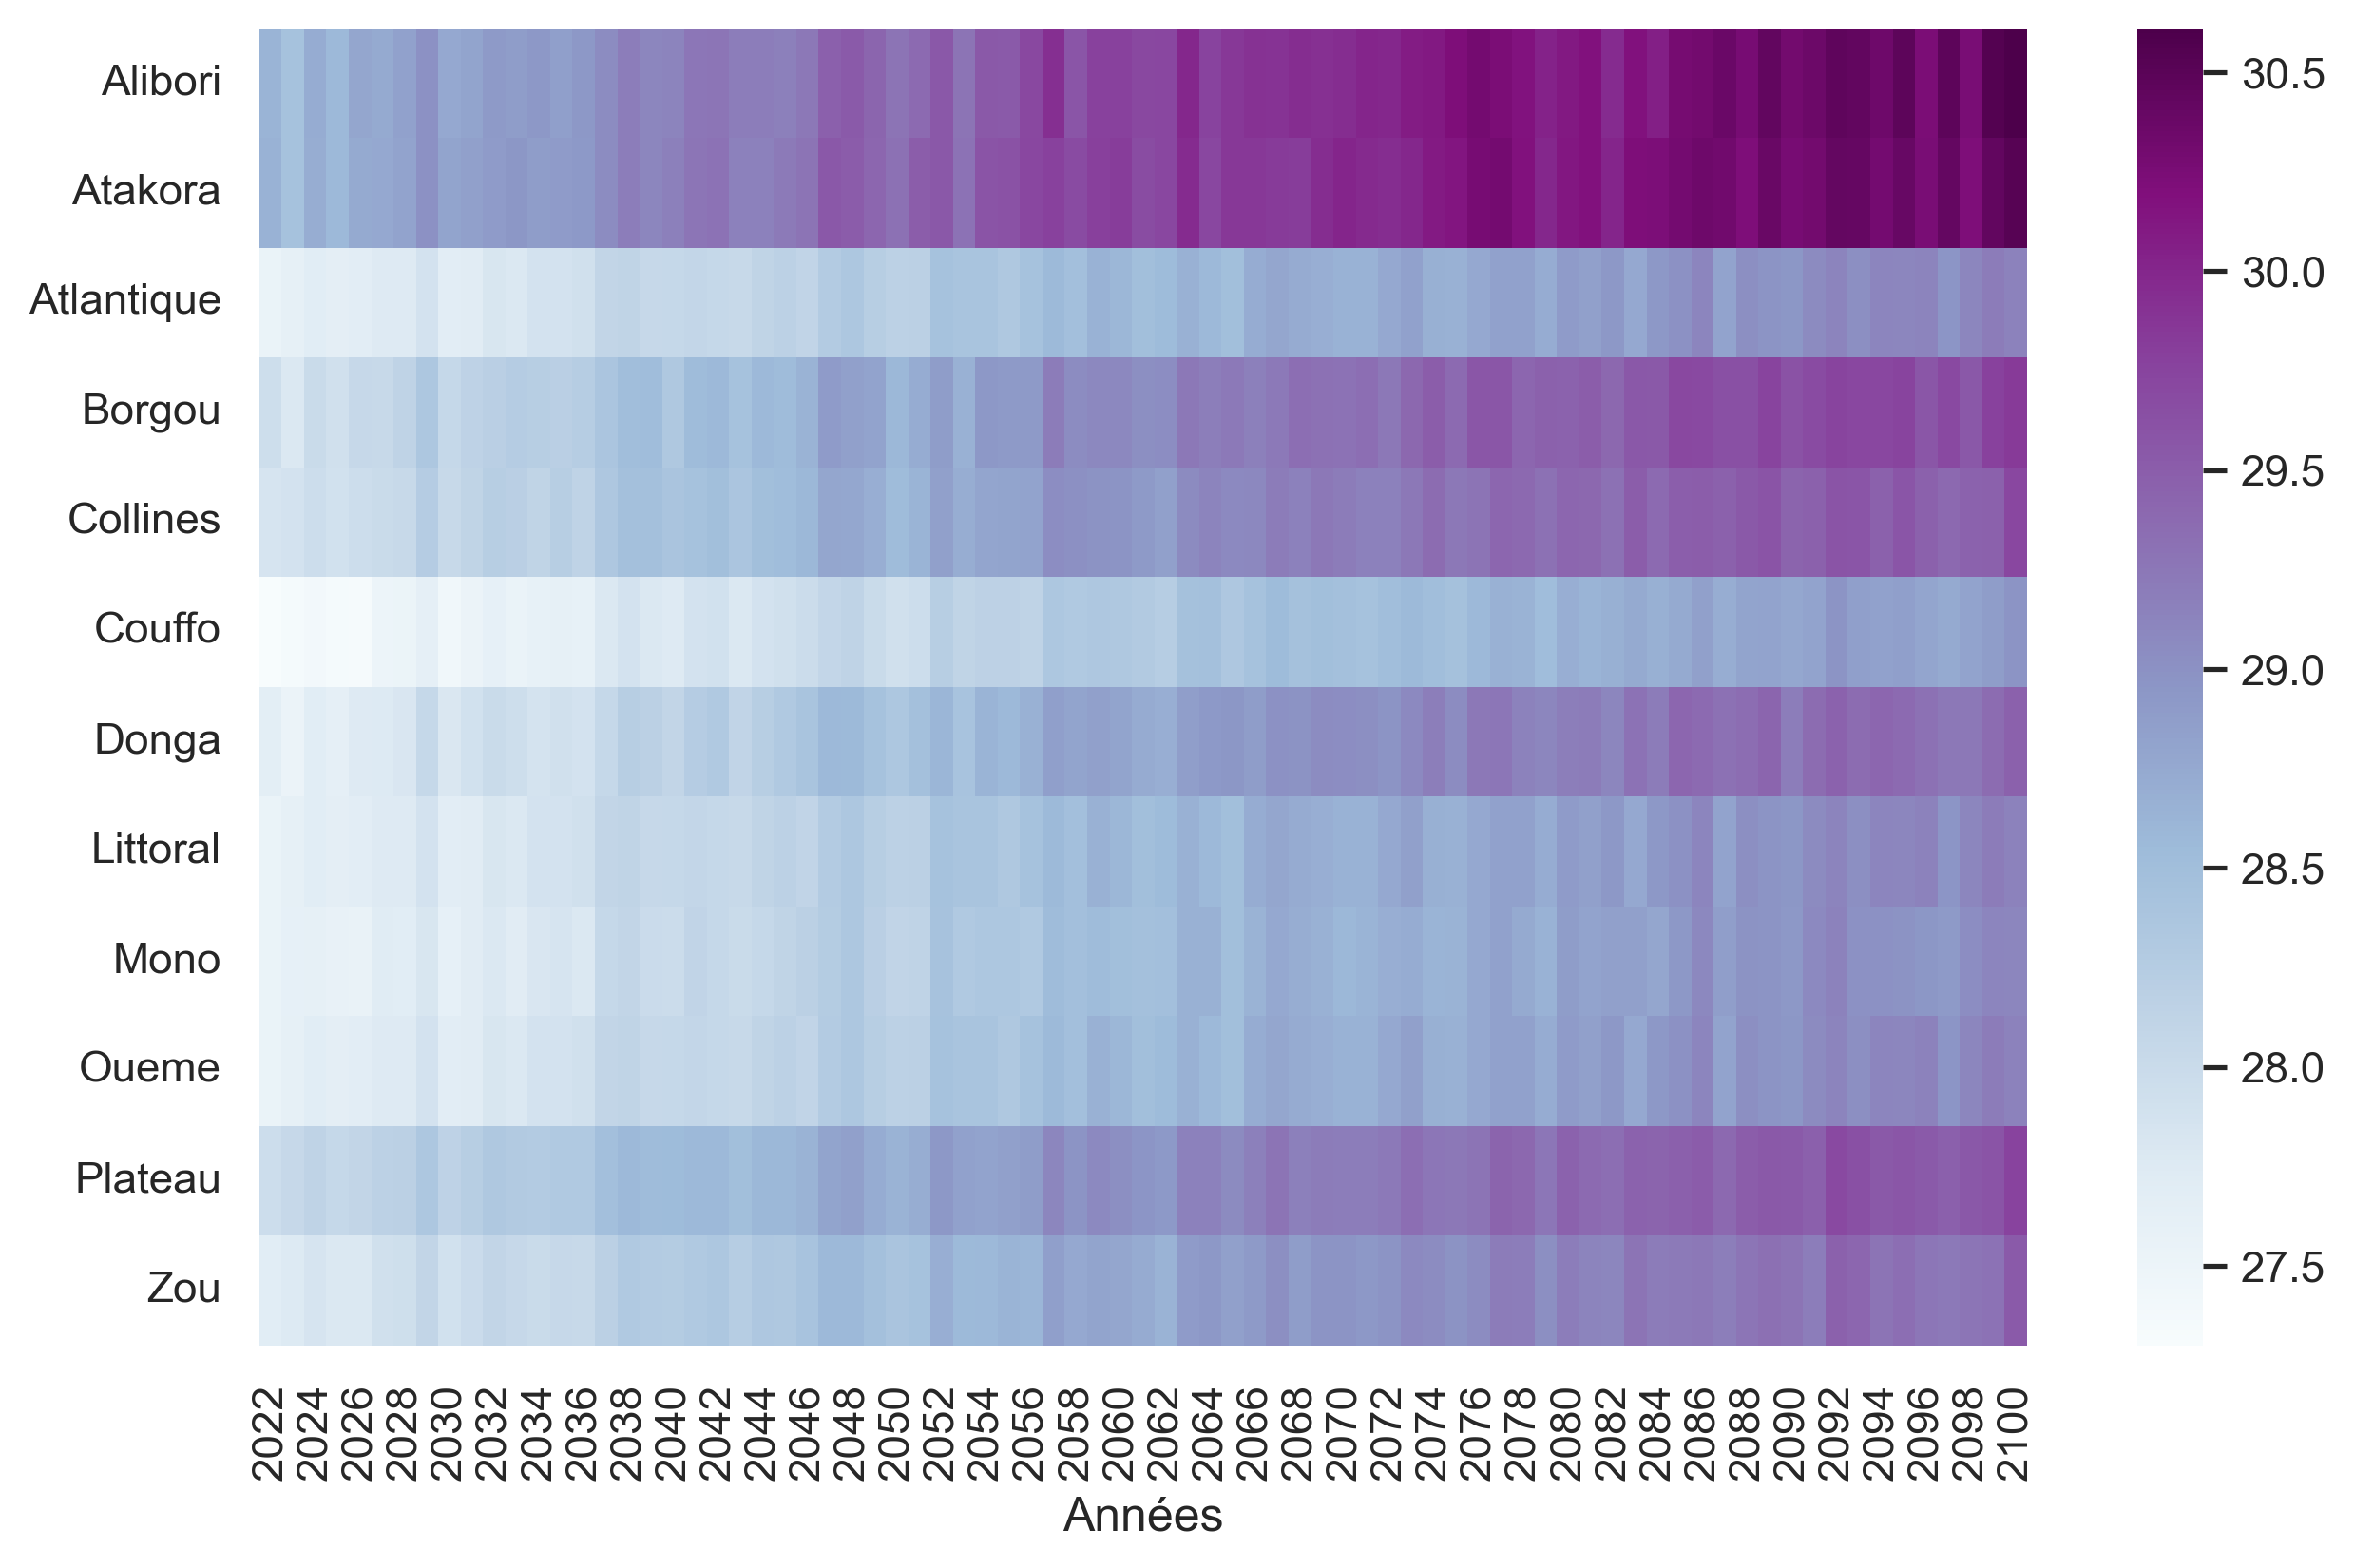

In [245]:
plt.figure(figsize=(10,6), dpi=300)
sns.heatmap(prev_4_5[['Alibori', 'Atakora', 'Atlantique', 'Borgou', 'Collines',
       'Couffo', 'Donga', 'Littoral', 'Mono', 'Oueme', 'Plateau', 'Zou']].transpose(), cmap='BuPu')
plt.xlabel('Années')
plt.savefig('previsions_temperatures.svg')

plt.show()

In [246]:
prev_4_5.head()

Benin  Alibori  Atakora  Atlantique  Borgou  Collines  Couffo  Donga  \
Year                                                                         
2022  28.41    28.63    28.65       27.54   27.95     27.85   27.30  27.67   
2023  28.28    28.44    28.45       27.62   27.78     27.87   27.36  27.52   
2024  28.50    28.71    28.70       27.70   28.01     27.97   27.40  27.70   
2025  28.40    28.58    28.58       27.66   27.91     27.90   27.36  27.63   
2026  28.54    28.78    28.74       27.68   28.04     27.96   27.34  27.74   

      Littoral   Mono  Oueme  Plateau    Zou  
Year                                          
2022     27.54  27.54  27.54    27.96  27.69  
2023     27.62  27.61  27.62    28.04  27.76  
2024     27.70  27.62  27.70    28.13  27.85  
2025     27.66  27.58  27.66    28.06  27.79  
2026     27.68  27.57  27.68    28.09  27.79

In [247]:
copy_prev = prev_4_5.copy()
benin_prev = copy_prev[["Benin"]].reset_index()
benin_prev

Year  Benin
0   2022  28.41
1   2023  28.28
2   2024  28.50
3   2025  28.40
4   2026  28.54
..   ...    ...
74  2096  30.01
75  2097  30.13
76  2098  30.03
77  2099  30.22
78  2100  30.33

[79 rows x 2 columns]

<AxesSubplot:xlabel='Year', ylabel='Benin'>

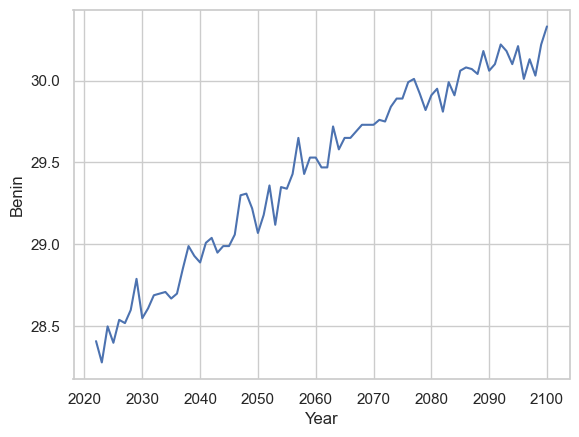

In [248]:
sns.lineplot(data=benin_prev, x='Year', y='Benin')

In [249]:
prev_2_6 = pd.read_csv('DATA/tas_timeseries_annual_cmip6_ssp126_ensemble_2015-2100_medianBEN.csv', header=1)
prev_2_6

Unnamed: 0  Benin  Alibori  Atakora  Atlantique  Borgou  Collines  Couffo  \
0         2015  28.21    28.43    28.43       27.35   27.77     27.67   27.05   
1         2016  28.01    28.16    28.17       27.33   27.56     27.55   26.96   
2         2017  27.99    28.13    28.21       27.31   27.57     27.55   27.00   
3         2018  28.27    28.45    28.47       27.52   27.82     27.80   27.21   
4         2019  28.46    28.69    28.69       27.55   27.99     27.87   27.31   
..         ...    ...      ...      ...         ...     ...       ...     ...   
81        2096  28.70    28.87    28.88       27.93   28.28     28.26   27.71   
82        2097  28.85    29.03    29.02       28.03   28.36     28.41   27.83   
83        2098  29.04    29.31    29.20       28.13   28.57     28.41   27.83   
84        2099  29.12    29.33    29.31       28.22   28.69     28.59   27.92   
85        2100  29.03    29.30    29.19       28.15   28.50     28.44   27.87   

    Donga  Littoral   Mono  Oueme  Plateau    Zou  
0   27.44     27.35  27.27  27.35    27.80  27.51  
1   27.26     27.34  27.21  27.34    27.68  27.37  
2   27.27     27.31  27.24  27.31    27.71  27.42  
3   27.54     27.52  27.40  27.52    27.93  27.66  
4   27.67     27.55  27.54  27.55    27.98  27.72  
..    ...       ...    ...    ...      ...    ...  
81  28.00     27.93  27.82  27.93    28.33  28.13  
82  28.15     28.03  28.11  28.03    28.53  28.25  
83  28.26     28.13  28.09  28.13    28.51  28.21  
84  28.36     28.22  28.12  28.22    28.67  28.39  
85  28.16     28.15  28.08  28.15    28.57  28.31  

[86 rows x 14 columns]

In [250]:
prev_2_6 = prev_2_6.rename(columns={"Unnamed: 0" : 'Year'})
prev_2_6

Year  Benin  Alibori  Atakora  Atlantique  Borgou  Collines  Couffo  \
0   2015  28.21    28.43    28.43       27.35   27.77     27.67   27.05   
1   2016  28.01    28.16    28.17       27.33   27.56     27.55   26.96   
2   2017  27.99    28.13    28.21       27.31   27.57     27.55   27.00   
3   2018  28.27    28.45    28.47       27.52   27.82     27.80   27.21   
4   2019  28.46    28.69    28.69       27.55   27.99     27.87   27.31   
..   ...    ...      ...      ...         ...     ...       ...     ...   
81  2096  28.70    28.87    28.88       27.93   28.28     28.26   27.71   
82  2097  28.85    29.03    29.02       28.03   28.36     28.41   27.83   
83  2098  29.04    29.31    29.20       28.13   28.57     28.41   27.83   
84  2099  29.12    29.33    29.31       28.22   28.69     28.59   27.92   
85  2100  29.03    29.30    29.19       28.15   28.50     28.44   27.87   

    Donga  Littoral   Mono  Oueme  Plateau    Zou  
0   27.44     27.35  27.27  27.35    27.80  27.51  
1   27.26     27.34  27.21  27.34    27.68  27.37  
2   27.27     27.31  27.24  27.31    27.71  27.42  
3   27.54     27.52  27.40  27.52    27.93  27.66  
4   27.67     27.55  27.54  27.55    27.98  27.72  
..    ...       ...    ...    ...      ...    ...  
81  28.00     27.93  27.82  27.93    28.33  28.13  
82  28.15     28.03  28.11  28.03    28.53  28.25  
83  28.26     28.13  28.09  28.13    28.51  28.21  
84  28.36     28.22  28.12  28.22    28.67  28.39  
85  28.16     28.15  28.08  28.15    28.57  28.31  

[86 rows x 14 columns]

In [251]:
prev_2_6.columns

Index(['Year', 'Benin', 'Alibori', 'Atakora', 'Atlantique', 'Borgou',
       'Collines', 'Couffo', 'Donga', 'Littoral', 'Mono', 'Oueme', 'Plateau',
       'Zou'],
      dtype='object')

In [252]:
prev_2_6.loc[7:85]

Year  Benin  Alibori  Atakora  Atlantique  Borgou  Collines  Couffo  \
7   2022  28.33    28.51    28.51       27.59   27.83     27.89   27.32   
8   2023  28.44    28.62    28.65       27.55   27.97     27.98   27.32   
9   2024  28.70    28.94    28.92       27.75   28.25     28.11   27.50   
10  2025  28.62    28.82    28.85       27.76   28.17     28.11   27.50   
11  2026  28.62    28.80    28.84       27.76   28.17     28.13   27.53   
..   ...    ...      ...      ...         ...     ...       ...     ...   
81  2096  28.70    28.87    28.88       27.93   28.28     28.26   27.71   
82  2097  28.85    29.03    29.02       28.03   28.36     28.41   27.83   
83  2098  29.04    29.31    29.20       28.13   28.57     28.41   27.83   
84  2099  29.12    29.33    29.31       28.22   28.69     28.59   27.92   
85  2100  29.03    29.30    29.19       28.15   28.50     28.44   27.87   

    Donga  Littoral   Mono  Oueme  Plateau    Zou  
7   27.59     27.59  27.55  27.59    28.04  27.76  
8   27.69     27.55  27.50  27.55    28.06  27.81  
9   27.92     27.75  27.72  27.75    28.19  27.92  
10  27.85     27.76  27.72  27.76    28.24  27.97  
11  27.90     27.76  27.74  27.76    28.23  27.97  
..    ...       ...    ...    ...      ...    ...  
81  28.00     27.93  27.82  27.93    28.33  28.13  
82  28.15     28.03  28.11  28.03    28.53  28.25  
83  28.26     28.13  28.09  28.13    28.51  28.21  
84  28.36     28.22  28.12  28.22    28.67  28.39  
85  28.16     28.15  28.08  28.15    28.57  28.31  

[79 rows x 14 columns]

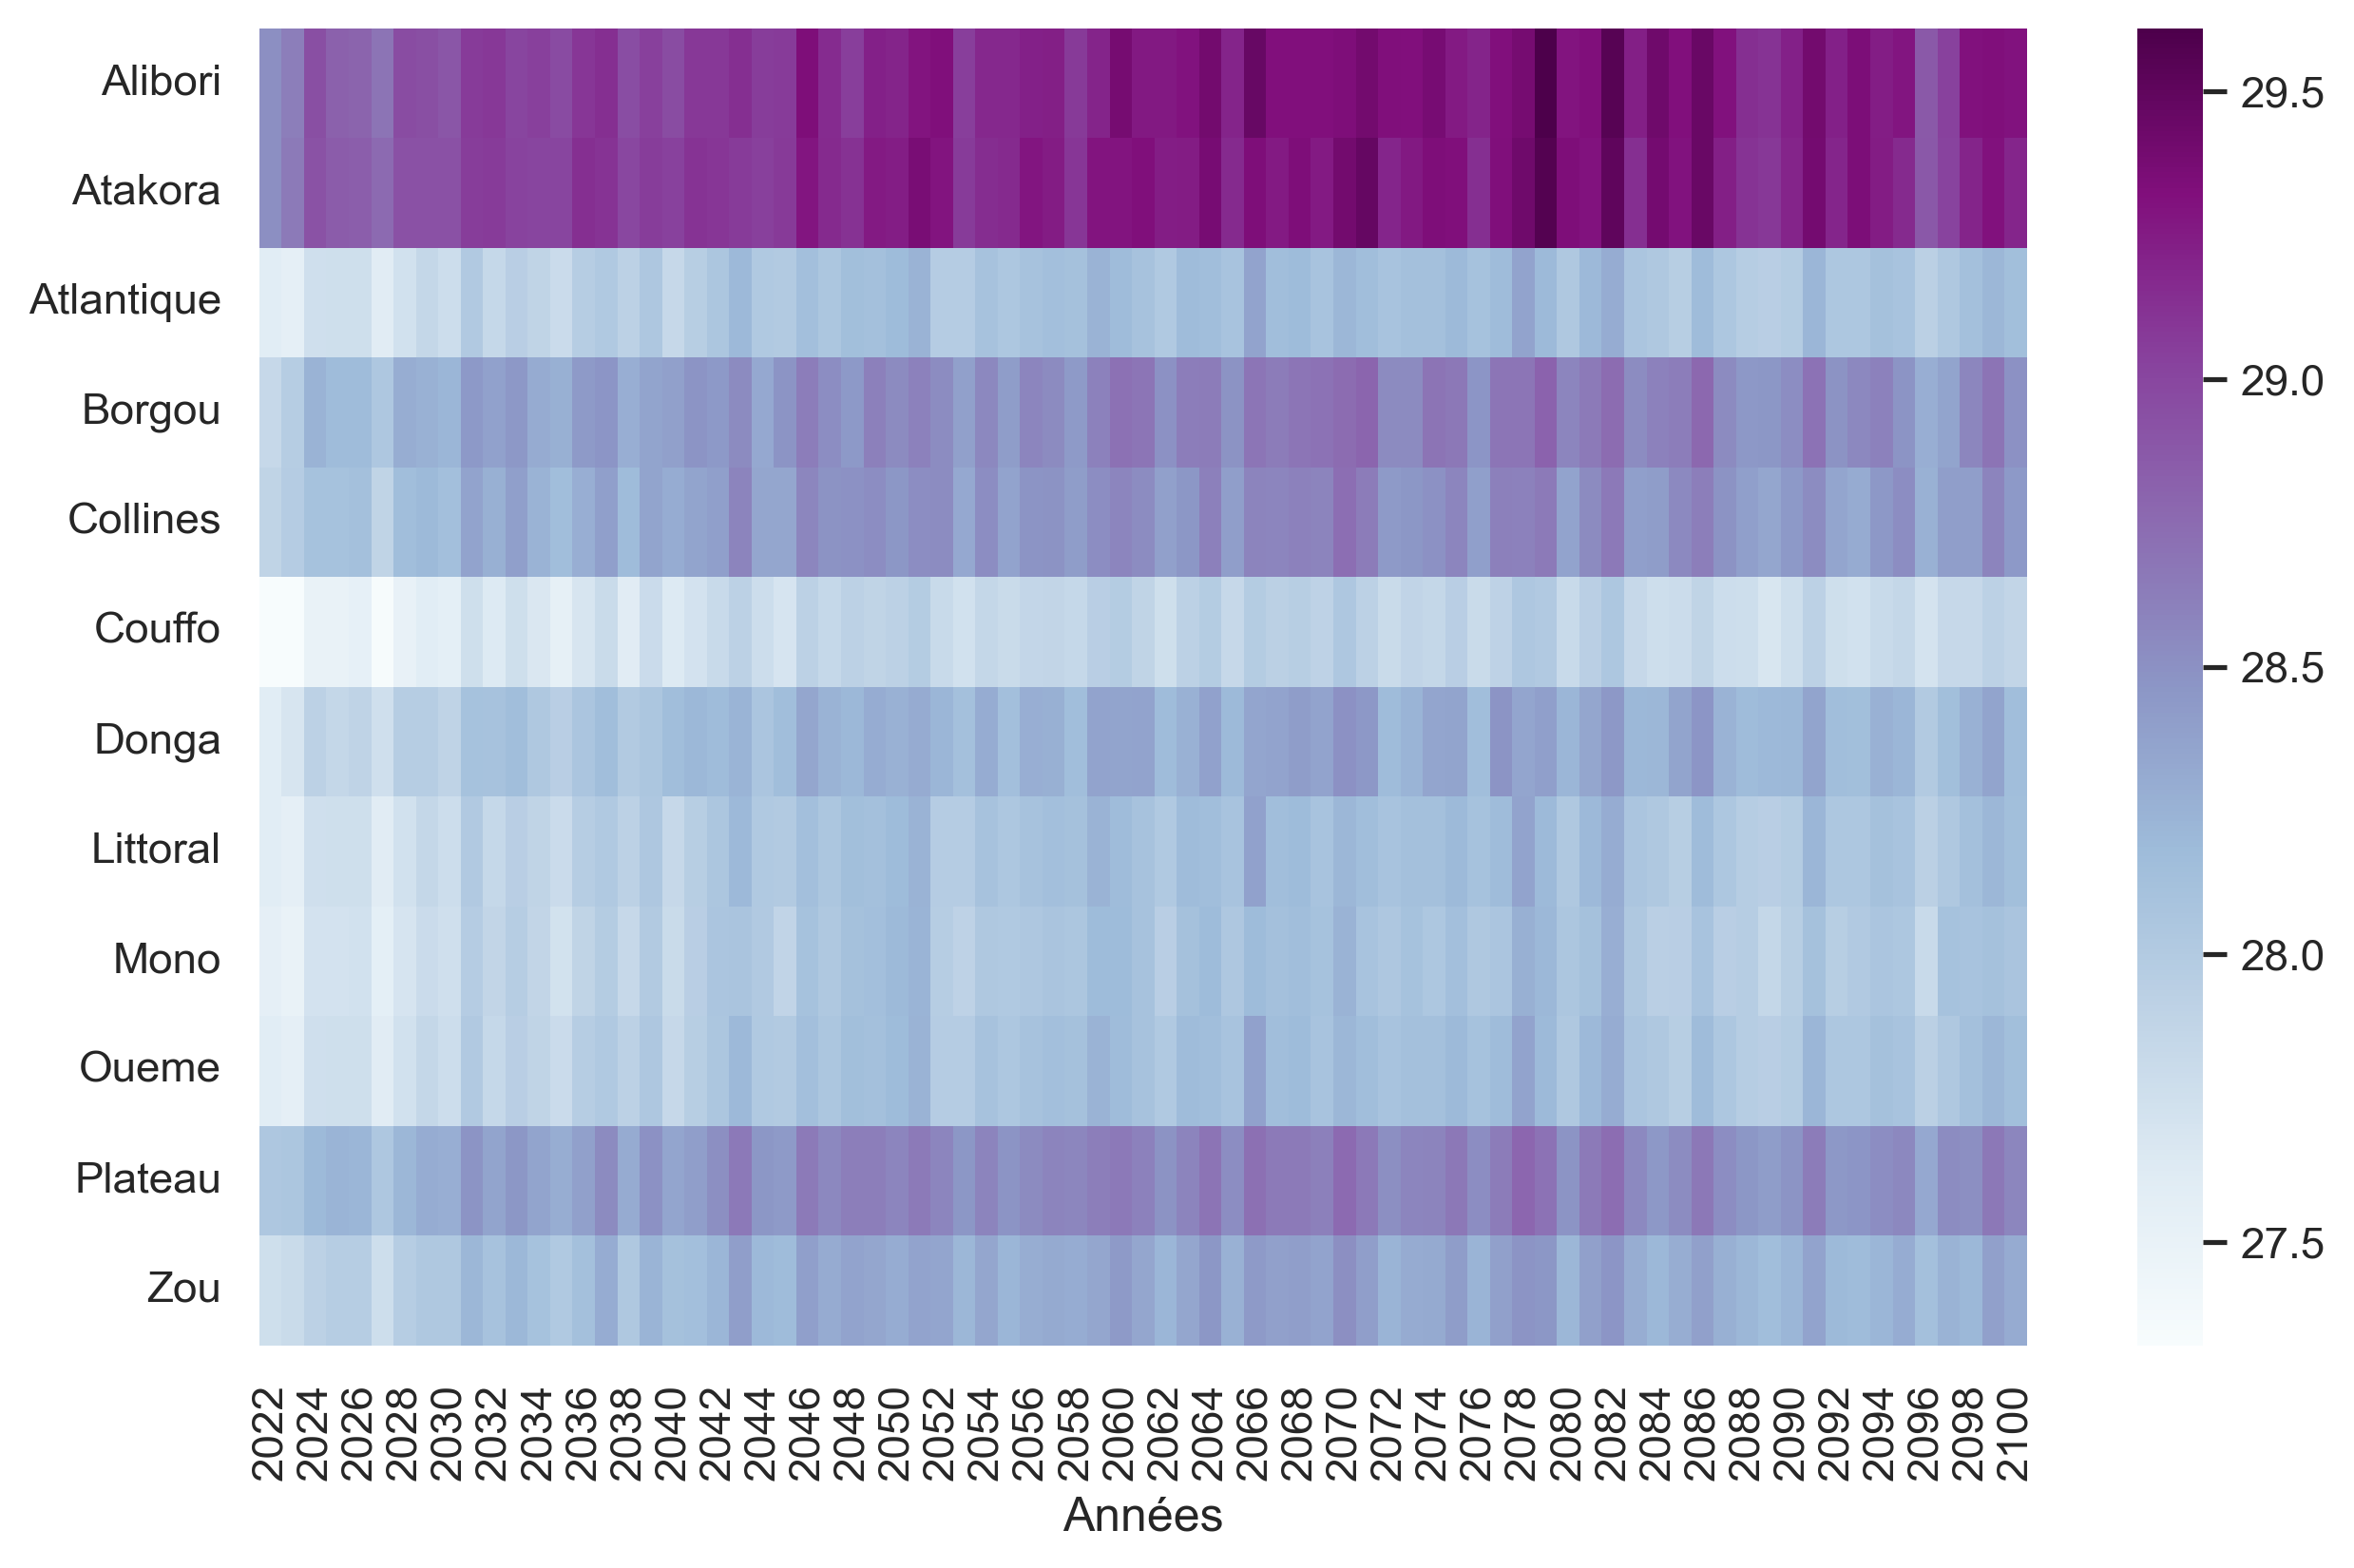

In [253]:
plt.figure(figsize=(10,6), dpi=300)
sns.heatmap(prev_2_6.loc[7:85][['Year','Alibori', 'Atakora', 'Atlantique', 'Borgou',
       'Collines', 'Couffo', 'Donga', 'Littoral', 'Mono', 'Oueme', 'Plateau',
       'Zou']].set_index('Year').transpose(), cmap='BuPu')

plt.xlabel('Années')

plt.show()

In [254]:
prev_j_an_35 = 

SyntaxError: invalid syntax (2507351146.py, line 1)

In [255]:
benin_data

Year  Population             GDP_PPP GDP_PPP_per_capita  \
0   2000   6865946.0  17015312596.612101        2478.218238   
1   2001     7076728    17922762308.1962   2532.63405180985   
2   2002     7295400     18754921695.056   2570.78730365107   
3   2003     7520556    19400761822.8883   2579.69780730152   
4   2004     7750003    20260154372.6862   2614.21245549017   
5   2005   7982223.0  20607244157.932098        2581.642252   
6   2006     8216893    21419940047.2018    2606.8174487853   
7   2007     8454790    22702212482.9423   2685.13026141894   
8   2008     8696915    23813843817.0103   2738.19438467667   
9   2009     8944713    24366156424.6825   2724.08476657468   
10  2010   9199254.0  24881272742.856602        2704.705484   
11  2011   9460829.0  25618692190.067902          2707.8697   
12  2012   9729254.0  26851264681.890701        2759.848256   
13  2013  10004594.0  28782255584.859901        2876.903909   
14  2014  10286839.0    30612139032.0882        2975.854782   
15  2015  10575962.0  31156469106.868698        2945.970221   
16  2016  10872072.0  32196993426.203201        2961.440416   
17  2017  11175192.0    34023063767.8647        3044.517156   
18  2018    11485035    36301676624.9392    3160.7806702321   
19  2019    11801151    38794036239.5523   3287.30953781986   

   Total_greenhouse_gas_em_kt PM25_%_pop_exposed_exceeding_T1  \
0                  7030.00021                        43.10186   
1                        6500                              ..   
2            7530.00020980835                              ..   
3                        7500                              ..   
4            7590.00015258789                              ..   
5                 8619.999886                       35.631567   
6            8909.99984741211                              ..   
7            9649.99961853027                              ..   
8            9399.99961853027                              ..   
9            10029.9997329712                              ..   
10               10479.999542                       34.436903   
11               10550.000191                       35.198308   
12               10529.999733                       37.075004   
13               11159.999847                        33.74696   
14               11699.999809                       33.441739   
15               12119.999886                        48.40688   
16               13819.999695                       45.119154   
17               13970.000267                       45.219999   
18           15090.0001525879                              ..   
19           15020.0004577637                              ..   

   PM25_mean_annual_exposure Forest_area_%_land Urban_pop_%_total  
0                  39.776293          36.672136            38.333  
1                         ..   36.2287158566868             38.65  
2                         ..   35.7852962043278            39.036  
3                         ..   35.3418765519688            39.536  
4                         ..   34.8984568996098            40.039  
5                  34.328809          34.455037            40.543  
6                         ..   34.0116175948918            41.049  
7                         ..   33.5681979425328            41.558  
8                         ..   33.1247782901738            42.069  
9                         ..   32.6813586378148             42.58  
10                 32.392969          32.237939            43.093  
11                 32.580846          31.794519            43.608  
12                    31.992            31.3511            44.125  
13                 31.443299           30.90768            44.642  
14                 29.660456           30.46426            45.166  
15                 40.470683          30.020841            45.695  
16                 38.447704          29.577421            46.229  
17                 38.999959          29.134001            46.768  
18                    

In [256]:
benin_data.columns

Index(['Year', 'Population', 'GDP_PPP', 'GDP_PPP_per_capita',
       'Total_greenhouse_gas_em_kt', 'PM25_%_pop_exposed_exceeding_T1',
       'PM25_mean_annual_exposure', 'Forest_area_%_land', 'Urban_pop_%_total'],
      dtype='object')

In [257]:
benin_pm25 = benin_data[['Year', 'Population', 'GDP_PPP', 'Urban_pop_%_total', 'PM25_%_pop_exposed_exceeding_T1',]].set_index('Year').copy()
benin_pm25

Population             GDP_PPP Urban_pop_%_total  \
Year                                                     
2000   6865946.0  17015312596.612101            38.333   
2001     7076728    17922762308.1962             38.65   
2002     7295400     18754921695.056            39.036   
2003     7520556    19400761822.8883            39.536   
2004     7750003    20260154372.6862            40.039   
2005   7982223.0  20607244157.932098            40.543   
2006     8216893    21419940047.2018            41.049   
2007     8454790    22702212482.9423            41.558   
2008     8696915    23813843817.0103            42.069   
2009     8944713    24366156424.6825             42.58   
2010   9199254.0  24881272742.856602            43.093   
2011   9460829.0  25618692190.067902            43.608   
2012   9729254.0  26851264681.890701            44.125   
2013  10004594.0  28782255584.859901            44.642   
2014  10286839.0    30612139032.0882            45.166   
2015  10575962.0  31156469106.868698            45.695   
2016  10872072.0  32196993426.203201            46.229   
2017  11175192.0    34023063767.8647            46.768   
2018    11485035    36301676624.9392            47.312   
2019    11801151    38794036239.5523            47.861   

     PM25_%_pop_exposed_exceeding_T1  
Year                                  
2000                        43.10186  
2001                              ..  
2002                              ..  
2003                              ..  
2004                              ..  
2005                       35.631567  
2006                              ..  
2007                              ..  
2008                              ..  
2009                              ..  
2010                       34.436903  
2011                       35.198308  
2012                       37.075004  
2013                        33.74696  
2014                       33.441739  
2015                        48.40688  
2016                       45.119154  
2017                       45.219999  
2018                              ..  
2019                              ..

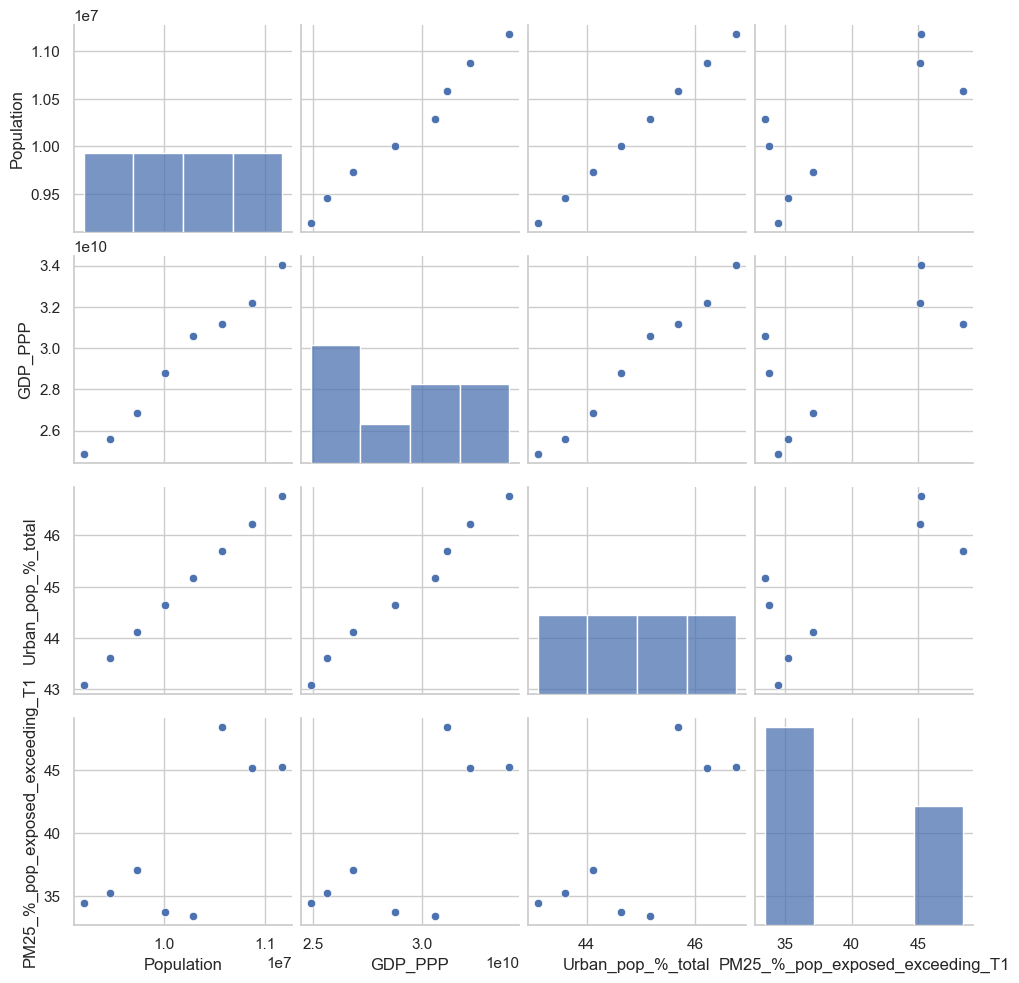

In [258]:
sns.pairplot(benin_pm25.iloc[10:18])

In [259]:
mean_pm25_last_years = benin_pm25['PM25_%_pop_exposed_exceeding_T1'].iloc[15:18].unique().mean()
mean_pm25_last_years

46.2486777513208

In [260]:
dfpm25 = benin_pm25.iloc[10:20]
dfpm25 = dfpm25.reset_index()
dfpm25

Year  Population             GDP_PPP Urban_pop_%_total  \
0  2010   9199254.0  24881272742.856602            43.093   
1  2011   9460829.0  25618692190.067902            43.608   
2  2012   9729254.0  26851264681.890701            44.125   
3  2013  10004594.0  28782255584.859901            44.642   
4  2014  10286839.0    30612139032.0882            45.166   
5  2015  10575962.0  31156469106.868698            45.695   
6  2016  10872072.0  32196993426.203201            46.229   
7  2017  11175192.0    34023063767.8647            46.768   
8  2018    11485035    36301676624.9392            47.312   
9  2019    11801151    38794036239.5523            47.861   

  PM25_%_pop_exposed_exceeding_T1  
0                       34.436903  
1                       35.198308  
2                       37.075004  
3                        33.74696  
4                       33.441739  
5                        48.40688  
6                       45.119154  
7                       45.219999  
8                              ..  
9                              ..

In [261]:
# imputation des valeurs manquantes par la moyenne des dernières année

dfpm25.loc[dfpm25['Year']==2018,'PM25_%_pop_exposed_exceeding_T1']=46.25
dfpm25.loc[dfpm25['Year']==2019,'PM25_%_pop_exposed_exceeding_T1']=46.25

In [262]:
dfpm25 = dfpm25[['Year', 'PM25_%_pop_exposed_exceeding_T1']]
dfpm25

Year PM25_%_pop_exposed_exceeding_T1
0  2010                       34.436903
1  2011                       35.198308
2  2012                       37.075004
3  2013                        33.74696
4  2014                       33.441739
5  2015                        48.40688
6  2016                       45.119154
7  2017                       45.219999
8  2018                           46.25
9  2019                           46.25

In [263]:
dfpm25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Year                             10 non-null     int64 
 1   PM25_%_pop_exposed_exceeding_T1  10 non-null     object
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes


In [264]:
dfpm25['PM25_%_pop_exposed_exceeding_T1'] = dfpm25['PM25_%_pop_exposed_exceeding_T1'].astype(float)

/var/folders/n7/k95c1mwn0yn6l4mkzz82jmxh0000gn/T/ipykernel_17121/806885889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpm25['PM25_%_pop_exposed_exceeding_T1'] = dfpm25['PM25_%_pop_exposed_exceeding_T1'].astype(float)


In [265]:
dfpm25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             10 non-null     int64  
 1   PM25_%_pop_exposed_exceeding_T1  10 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 288.0 bytes


<AxesSubplot:xlabel='Year', ylabel='PM25_%_pop_exposed_exceeding_T1'>

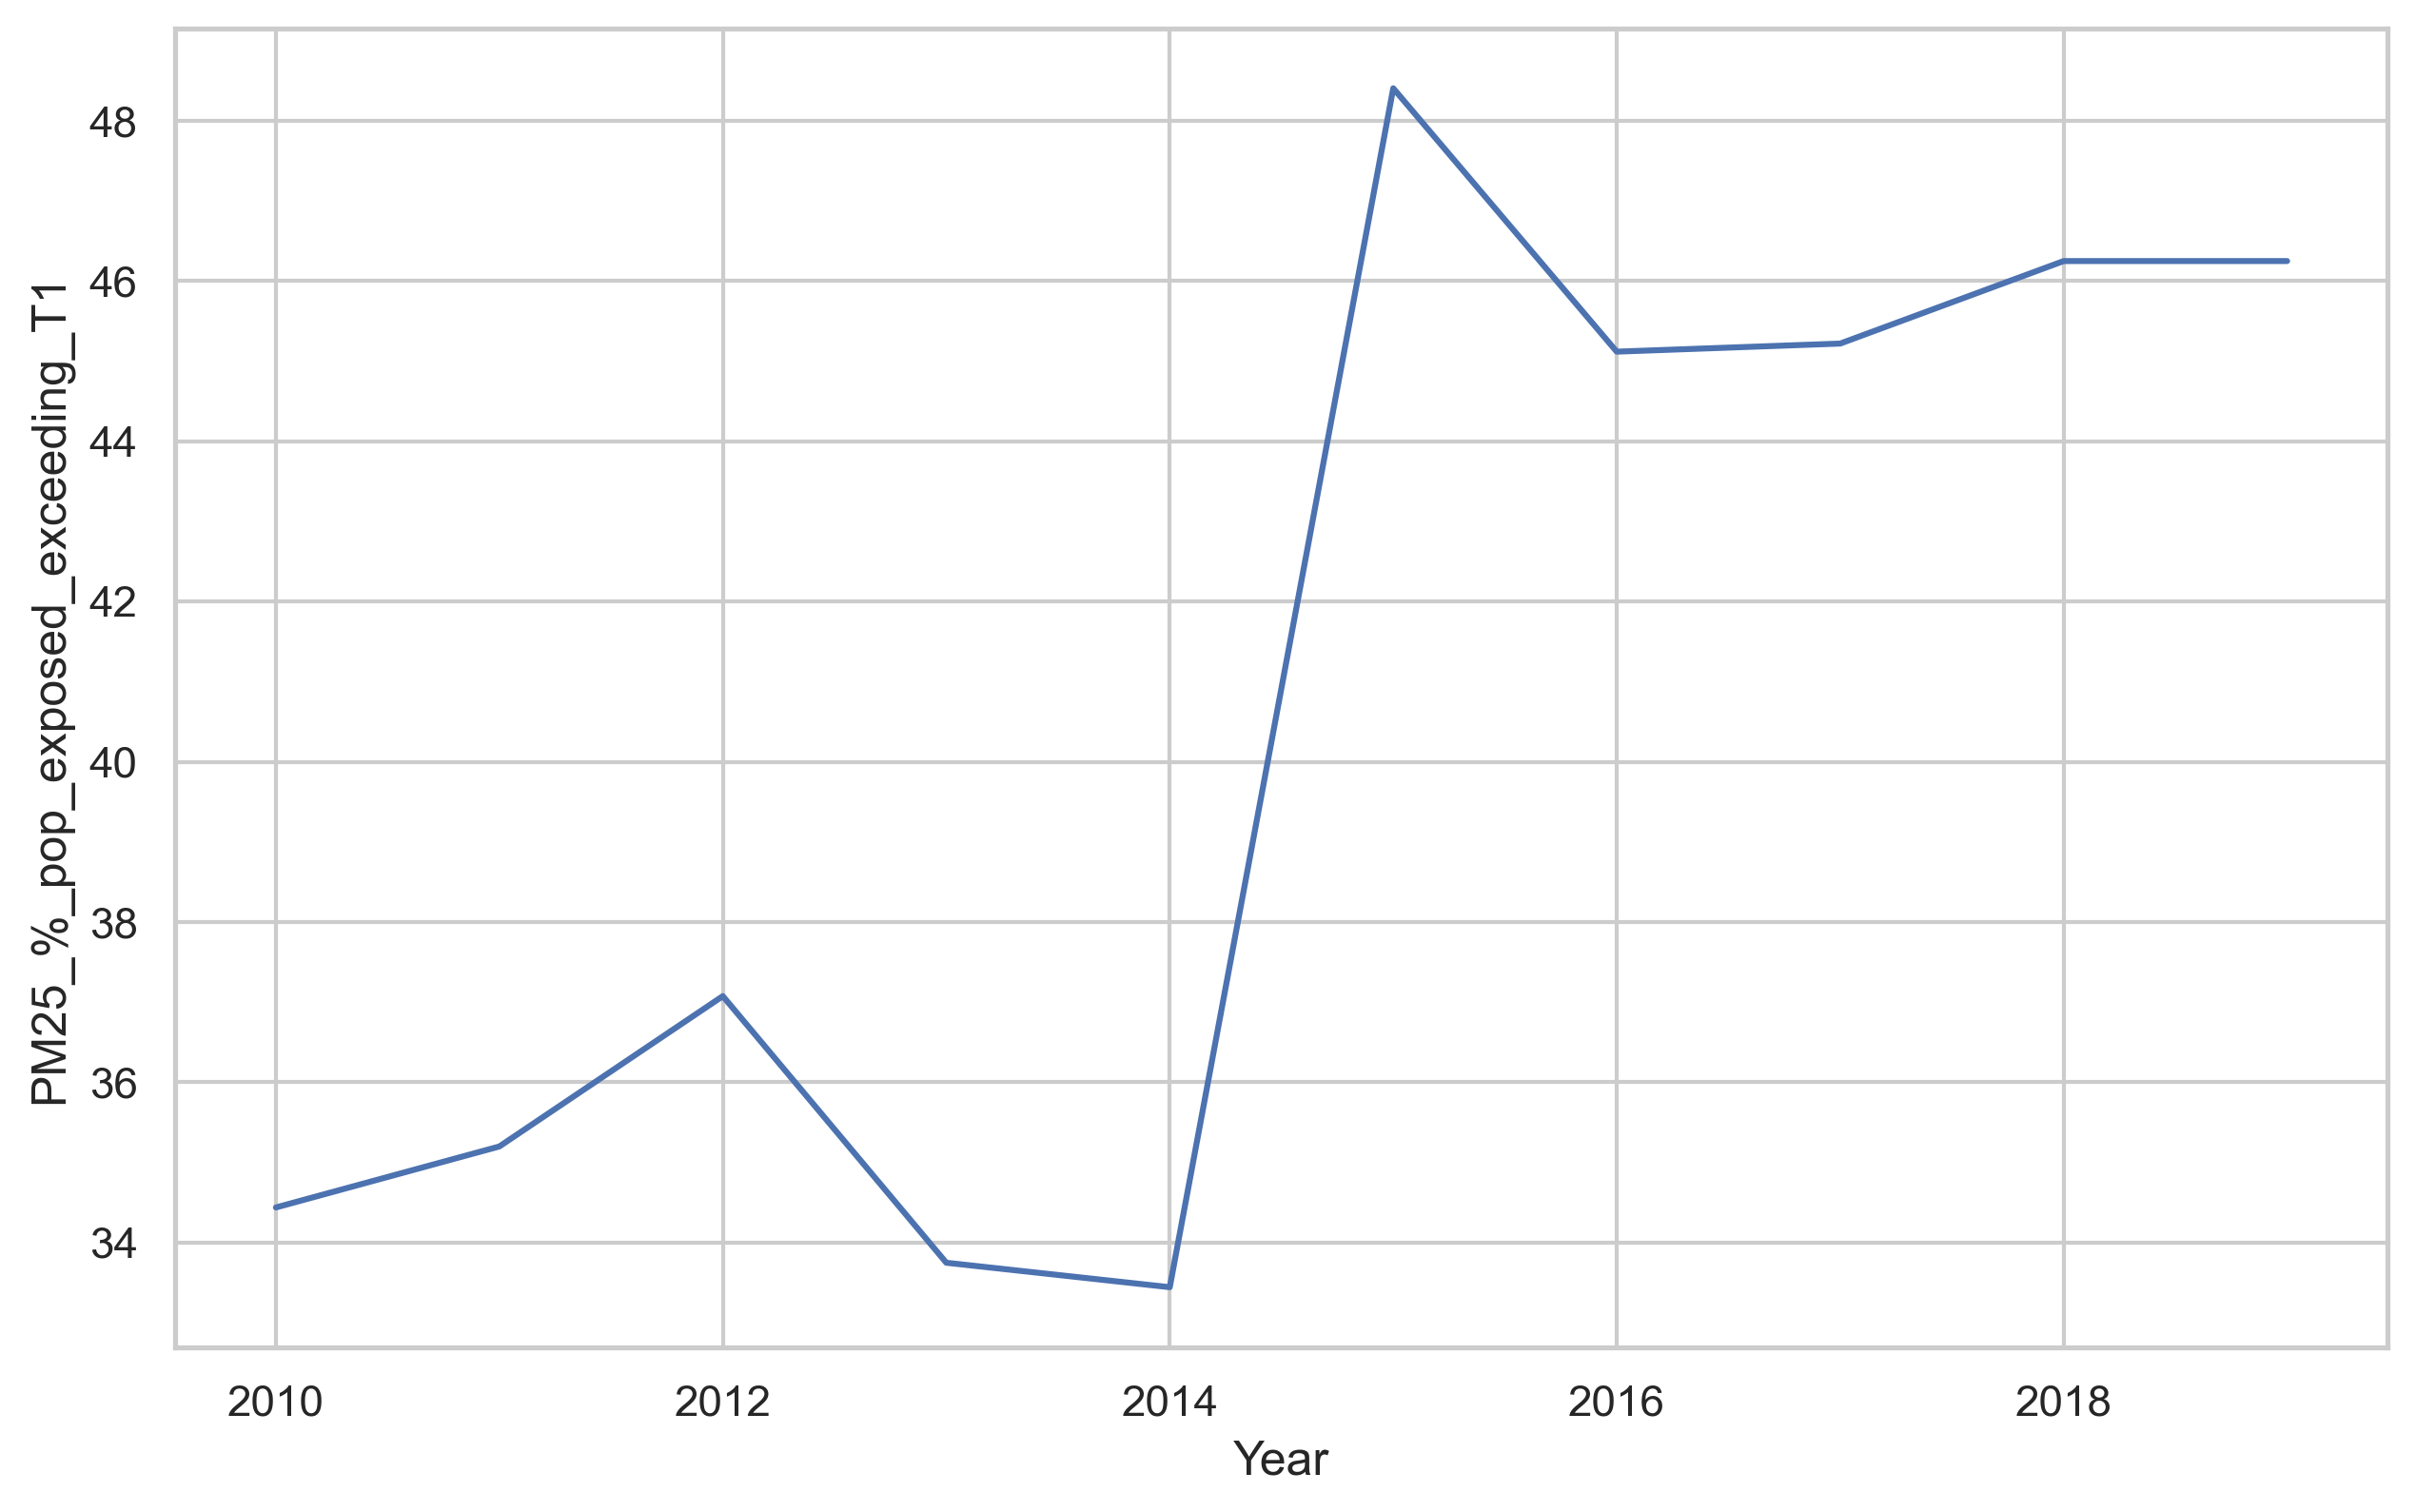

In [266]:
plt.figure(figsize=(10,6), dpi=300)
sns.lineplot(x='Year', y= 'PM25_%_pop_exposed_exceeding_T1', data = dfpm25)

In [267]:
dfbis

Year  Population       GDP_PPP  GDP_PPP_per_capita  \
0   2000   6865946.0  1.701531e+10         2478.218238   
1   2001   7076728.0  1.792276e+10         2532.634052   
2   2002   7295400.0  1.875492e+10         2570.787304   
3   2003   7520556.0  1.940076e+10         2579.697807   
4   2004   7750003.0  2.026015e+10         2614.212455   
5   2005   7982223.0  2.060724e+10         2581.642252   
6   2006   8216893.0  2.141994e+10         2606.817449   
7   2007   8454790.0  2.270221e+10         2685.130261   
8   2008   8696915.0  2.381384e+10         2738.194385   
9   2009   8944713.0  2.436616e+10         2724.084767   
10  2010   9199254.0  2.488127e+10         2704.705484   
11  2011   9460829.0  2.561869e+10         2707.869700   
12  2012   9729254.0  2.685126e+10         2759.848256   
13  2013  10004594.0  2.878226e+10         2876.903909   
14  2014  10286839.0  3.061214e+10         2975.854782   
15  2015  10575962.0  3.115647e+10         2945.970221   
16  2016  10872072.0  3.219699e+10         2961.440416   
17  2017  11175192.0  3.402306e+10         3044.517156   
18  2018  11485035.0  3.630168e+10         3160.780670   
19  2019  11801151.0  3.879404e+10         3287.309538   

    Total_greenhouse_gas_em_kt  PM25_%_pop_exposed_exceeding_T1  \
0                  7030.000210                        43.101860   
1                  6500.000000                              NaN   
2                  7530.000210                              NaN   
3                  7500.000000                              NaN   
4                  7590.000153                              NaN   
5                  8619.999886                        35.631567   
6                  8909.999847                              NaN   
7                  9649.999619                              NaN   
8                  9399.999619                              NaN   
9                 10029.999733                              NaN   
10                10479.999542                        34.436903   
11                10550.000191                        35.198308   
12                10529.999733                        37.075004   
13                11159.999847                        33.746960   
14                11699.999809                        33.441739   
15                12119.999886                        48.406880   
16                13819.999695                        45.119154   
17                13970.000267                        45.219999   
18                15090.000153                              NaN   
19                15020.000458                              NaN   

    PM25_mean_annual_exposure  Forest_area_%_land  Urban_pop_%_total  \
0                   39.776293           36.672136             38.333   
1                   37.050000           36.228716             38.650   
2                   37.050000           35.785296             39.036   
3                   37.050000           35.341877             39.536   
4                   37.050000           34.898457             40.039   
5                   34.328809           34.455037             40.543   
6                   33.360000           34.011618             41.049   
7                   33.360000           33.568198             41.558   
8                   33.360000           33.124778             42.069   
9                   33.360000           32.681359             42.580   
10                  32.392969           32.237939             43.093   
11                  32.580846           31.794519             43.608   
12                  31.992000           31.351100             44.125   
13                  31.443299           30.907680             44.642   
14                  29.660456           30.464260             45.166   
15                  40.470683           30.020841             45.695   
16                  38.447704           29.577421             46.229   
17                  38.999959           29.134001             46.768   
18       

In [268]:
dfbis.columns

Index(['Year', 'Population', 'GDP_PPP', 'GDP_PPP_per_capita',
       'Total_greenhouse_gas_em_kt', 'PM25_%_pop_exposed_exceeding_T1',
       'PM25_mean_annual_exposure', 'Forest_area_%_land', 'Urban_pop_%_total',
       'mean_annual_temp', 'mean_annual_prec'],
      dtype='object')

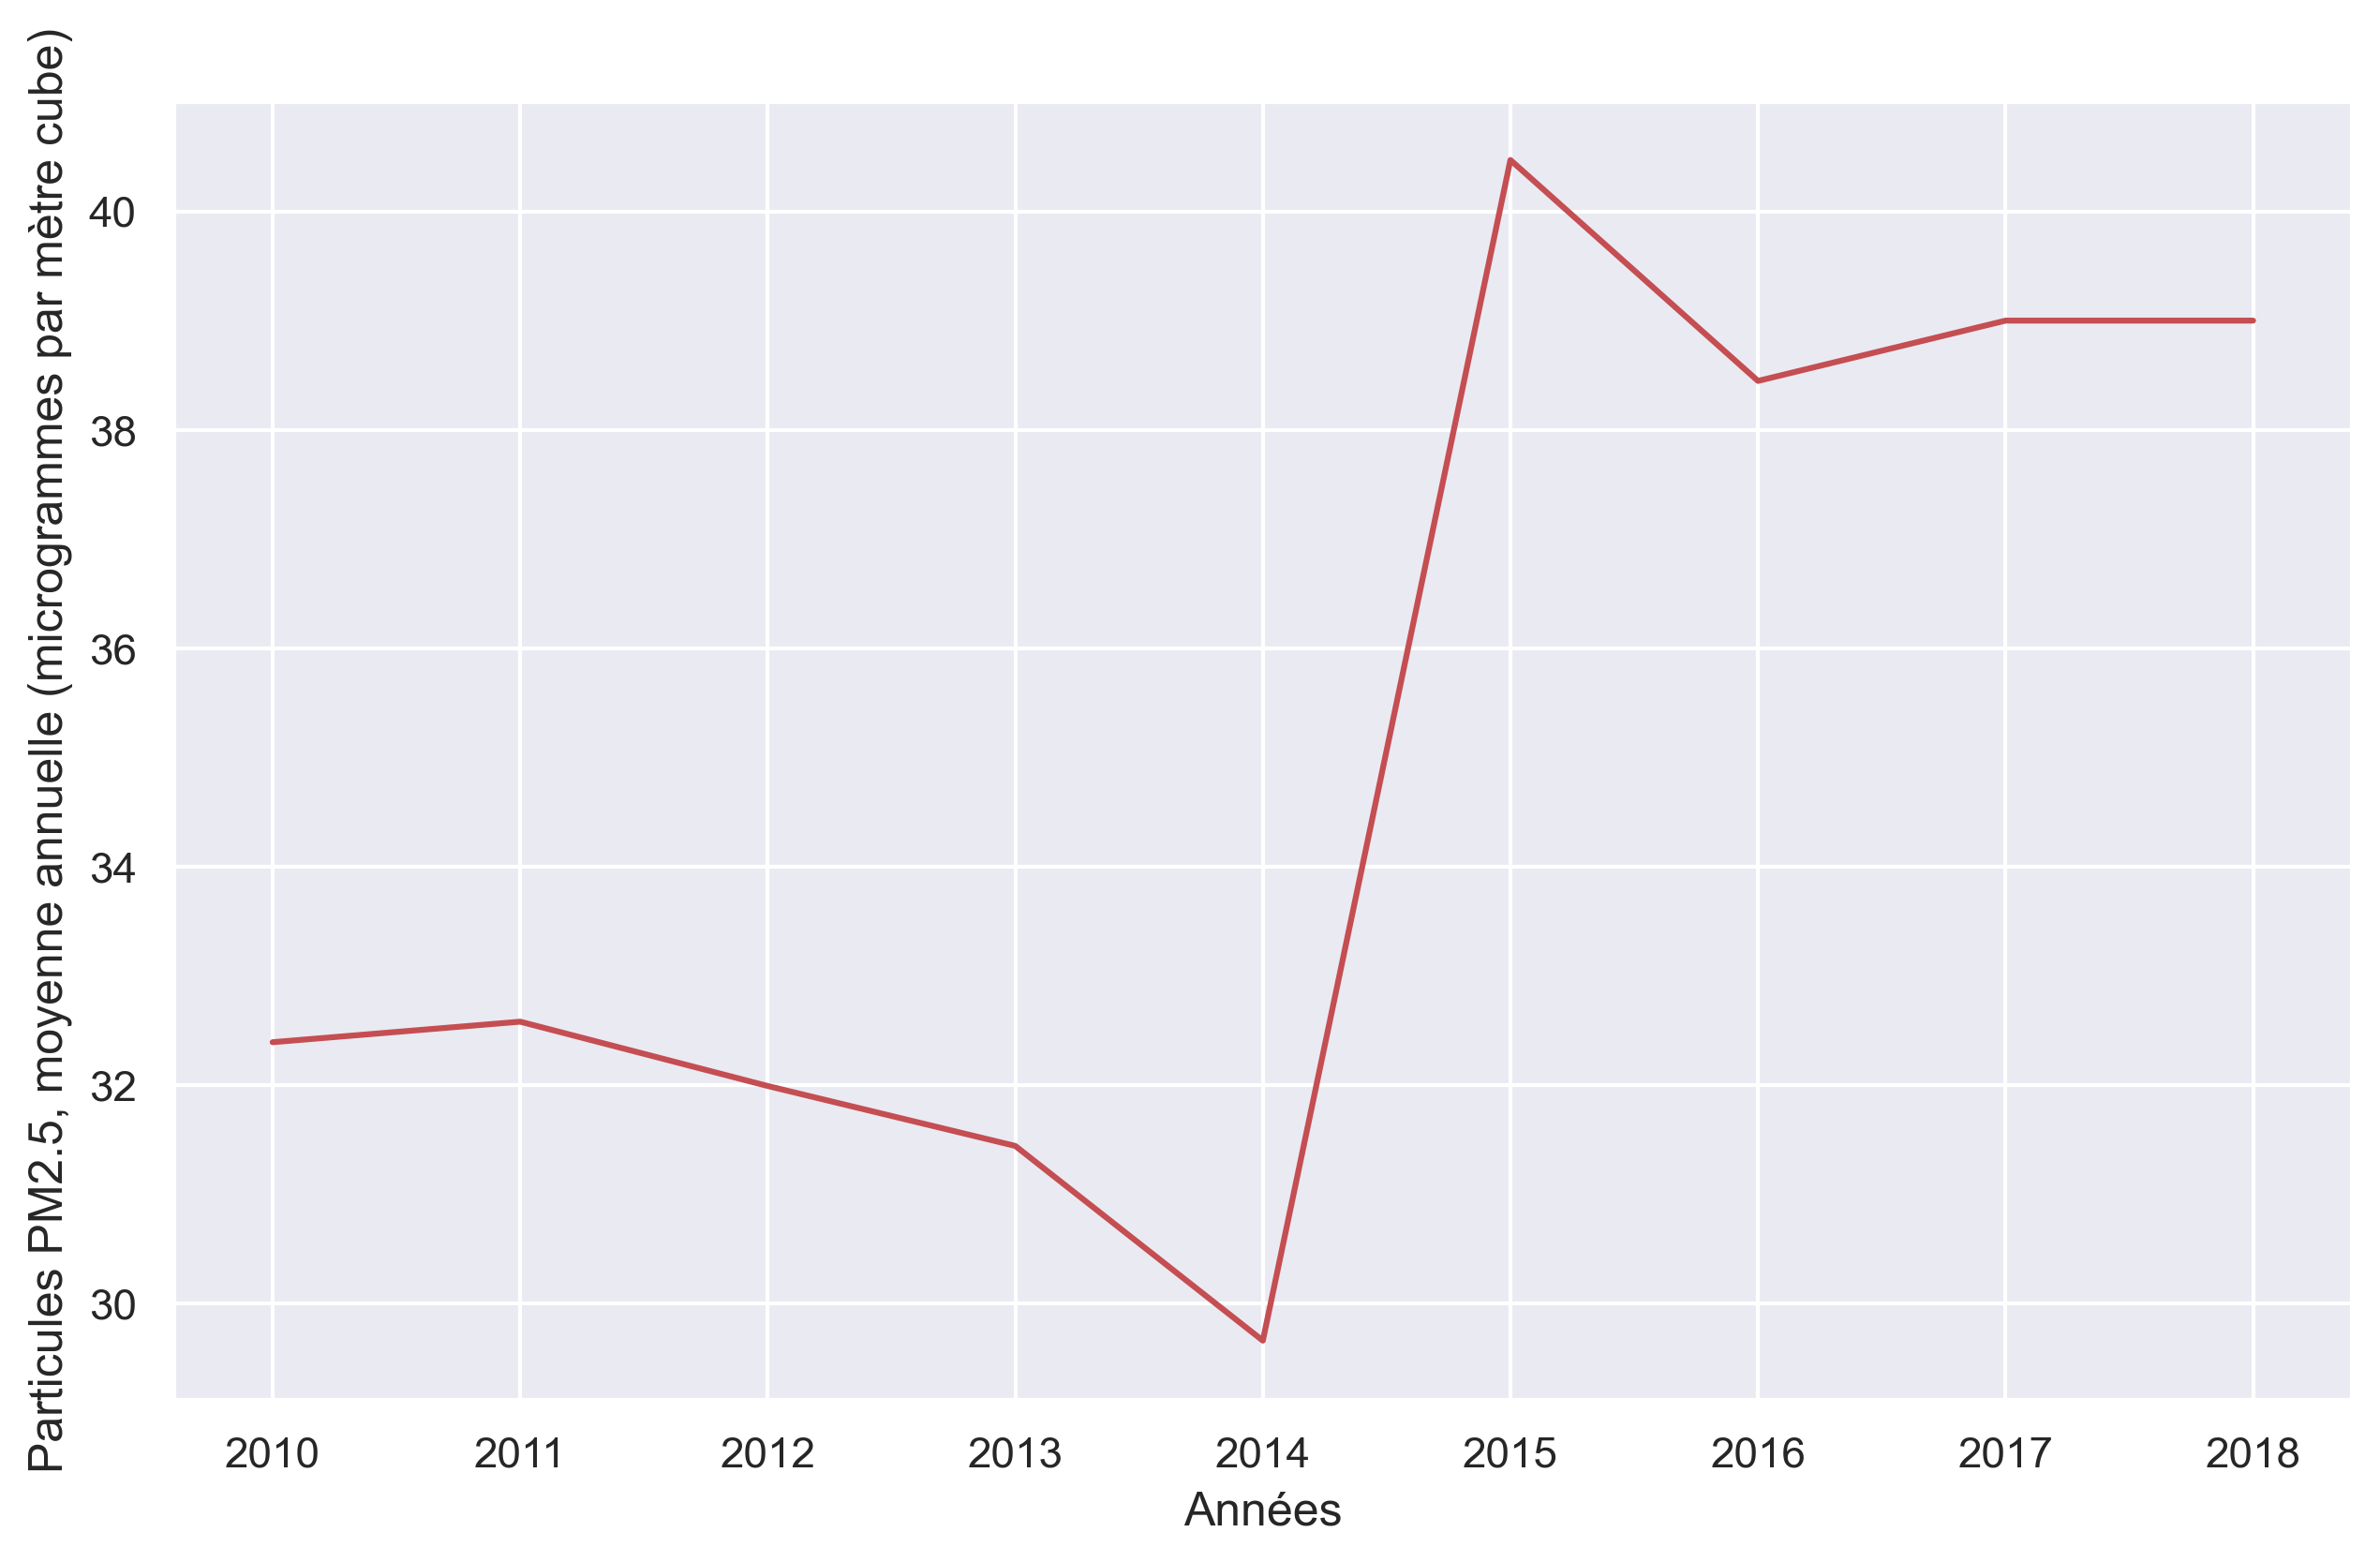

In [269]:
plt.figure(figsize=(10,6), dpi=300)
sns.set_theme(style="darkgrid")
pm25 = dfbis.iloc[10:19]
sns.lineplot(x='Year', y='PM25_mean_annual_exposure', data= pm25, color='r')
plt.xlabel('Années')
plt.ylabel('Particules PM2.5, moyenne annuelle (microgrammes par mètre cube)')
plt.savefig('Benin_PM25.svg')
plt.show()